# <b><i>ST Env Data Science Project</i></b>

# Whole Area Shapefile:

## 1. Uploading the shapefile and installing Geemap and other libraries

In [10]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import geopandas as gpd
import shapely.geometry
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import ee
import geemap
ee.Authenticate()
# Initialize the Earth Engine API
ee.Initialize()


#### Ensuring the shapefile can be read

In [12]:
import geopandas as gpd

shapefile_path = 'D:/Classes/STPythonFinalProject/LakeOandPathShapefile.shp'
gdf = gpd.read_file(shapefile_path)
print(gdf.head())


      Shape_Leng    Shape_Area  \
0  495827.899727  2.525803e+09   

                                            geometry  
0  POLYGON Z ((-9029056.277 3120821.116 0, -90274...  


In [9]:
import geopandas as gpd
import shapely.geometry
import geemap

# Load your shapefile with Geopandas
shapefile_path = 'D:/Classes/STPythonFinalProject/LakeOandPathShapefile.shp'
gdf = gpd.read_file(shapefile_path)

# Define a function to drop the Z coordinate from a geometry
def drop_z(geom):
    if geom.is_empty:
        return geom
    if geom.geom_type == 'Polygon':
        return shapely.geometry.Polygon([(x, y) for x, y, *z in geom.exterior.coords])
    elif geom.geom_type == 'MultiPolygon':
        return shapely.geometry.MultiPolygon([drop_z(poly) for poly in geom])
    else:
        return geom

# Apply the function to each geometry in your GeoDataFrame
gdf['geometry'] = gdf['geometry'].apply(drop_z)

# Now convert the GeoDataFrame to an Earth Engine FeatureCollection
aoi_fc = geemap.geopandas_to_ee(gdf)
aoi = aoi_fc.geometry()

# Verify by printing the AOI geometry
print(aoi.getInfo())



{'type': 'Polygon', 'coordinates': [[[-81.10939255073897, 26.978782204127096], [-81.11727792726869, 26.973292033421643], [-81.12220628703831, 26.959602041366054], [-81.12068157560824, 26.924541308524997], [-81.12106660431881, 26.884597880717457], [-81.09039269469464, 26.843380694451785], [-81.07062791689768, 26.834562846256006], [-81.06228564014648, 26.82345367173237], [-81.02981493376576, 26.8157796878427], [-81.0165956341668, 26.816352391699873], [-81.00222125023281, 26.811427048616995], [-80.9852800112228, 26.810968866176246], [-80.96756871658833, 26.793327440040308], [-80.92149368189808, 26.761245091437118], [-80.85000679004033, 26.725944041815513], [-80.82164304998456, 26.69819981791036], [-80.78352526333497, 26.69854379565759], [-80.77839155497959, 26.697053216581406], [-80.75169626937577, 26.683293104691693], [-80.73372828923368, 26.680082172756197], [-80.73116143505601, 26.681343621001044], [-80.70767471874633, 26.71081166683489], [-80.70202763937577, 26.72720498225148], [-80.6

In [14]:
#Doing the same with the Canal System shapefile
shapefile_path_CS = 'D:/Classes/STPythonFinalProject/CanalSystemShapefile.shp'
gdf = gpd.read_file(shapefile_path_CS)
print(gdf.head())

      Shape_Leng    Shape_Area  \
0  102861.629284  1.750972e+07   

                                            geometry  
0  POLYGON Z ((-8974136.302 3121905.217 0, -89723...  


#### Another testing of the shapefile, converting it so it may be used in Geemap

In [15]:
# Same procedure with Canal system shapefile
shapefile_path_CS = 'D:/Classes/STPythonFinalProject/CanalSystemShapefile.shp'
gdf = gpd.read_file(shapefile_path_CS)

# Define a function to drop the Z coordinate from a geometry
def drop_z(geom):
    if geom.is_empty:
        return geom
    if geom.geom_type == 'Polygon':
        return shapely.geometry.Polygon([(x, y) for x, y, *z in geom.exterior.coords])
    elif geom.geom_type == 'MultiPolygon':
        return shapely.geometry.MultiPolygon([drop_z(poly) for poly in geom])
    else:
        return geom

# Apply the function to each geometry in your GeoDataFrame
gdf['geometry'] = gdf['geometry'].apply(drop_z)

# Now convert the GeoDataFrame to an Earth Engine FeatureCollection
aoi_fc_cs = geemap.geopandas_to_ee(gdf)
aoi_cs = aoi_fc_cs.geometry()

# Verify by printing the AOI geometry
print(aoi_cs.getInfo())

{'type': 'Polygon', 'coordinates': [[[-80.61603801948273, 26.987460702390358], [-80.61759883959394, 26.986943127386613], [-80.61721363930515, 26.984418500637002], [-80.59914298442106, 26.987419530574254], [-80.54608097292687, 27.013547064750504], [-80.52423190873633, 27.017205898025317], [-80.49770090254007, 27.00944902884364], [-80.47346979816851, 27.006668134527747], [-80.46796646271814, 27.006668134527747], [-80.44504958731906, 27.015156966260133], [-80.43741062855327, 27.019401141286608], [-80.40217285328096, 27.031913207925854], [-80.31904784314966, 27.06132204828594], [-80.28725991926694, 27.10783371817975], [-80.27970310065409, 27.1160224521411], [-80.27288553533295, 27.116534228417482], [-80.26902498677188, 27.118581308514567], [-80.26631438867402, 27.122675357937347], [-80.26409662610395, 27.126330631504217], [-80.26253597936758, 27.131740218005444], [-80.26081105322365, 27.13524899861553], [-80.25678622525501, 27.138026705833536], [-80.25530771687497, 27.144897579048944], [-8

## 2. First testing of Geemap with area, a little crude. Returns one image

In [16]:
'''
import ee
import geemap

# Initialize the Earth Engine API
ee.Initialize()

# Now, load Sentinel-2 imagery and filter by your AOI and a date range
sentinel2 = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
             .filterBounds(aoi)
             .filterDate('2022-06-01', '2022-09-01')
             .sort('CLOUDY_PIXEL_PERCENTAGE'))

# Select the first image for demonstration
image = sentinel2.first()

# Compute the NDWI using the green (B3) and NIR (B8) bands
ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')

# Create a water mask by thresholding the NDWI (adjust threshold as needed)
water_mask = ndwi.gt(0.3)

# Apply the mask and clip to your custom study area
water_image = image.updateMask(water_mask).clip(aoi)

# Set up the map with Geemap and add the water-masked layer
Map = geemap.Map(center=[27.75, -80.25], zoom=10)
Map.addLayer(water_image, {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000}, 'Water Masked Image')
Map.addLayer(ndwi, {'min': -1, 'max': 1, 'palette': ['blue', 'white', 'green']}, 'NDWI')
Map

#RESULTS: Returns one image, the one sorted by cloud pixel. Need to modify code to mosaic of several images and extract information excluding the clouds.
# Also, need to clip to the mask, as NDWI is running for the whole image, need to display just water values
# Will need to modify the water value threshold from > 0.3 in the future
'''

'\nimport ee\nimport geemap\n\n# Initialize the Earth Engine API\nee.Initialize()\n\n# Now, load Sentinel-2 imagery and filter by your AOI and a date range\nsentinel2 = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")\n             .filterBounds(aoi)\n             .filterDate(\'2022-06-01\', \'2022-09-01\')\n             .sort(\'CLOUDY_PIXEL_PERCENTAGE\'))\n\n# Select the first image for demonstration\nimage = sentinel2.first()\n\n# Compute the NDWI using the green (B3) and NIR (B8) bands\nndwi = image.normalizedDifference([\'B3\', \'B8\']).rename(\'NDWI\')\n\n# Create a water mask by thresholding the NDWI (adjust threshold as needed)\nwater_mask = ndwi.gt(0.3)\n\n# Apply the mask and clip to your custom study area\nwater_image = image.updateMask(water_mask).clip(aoi)\n\n# Set up the map with Geemap and add the water-masked layer\nMap = geemap.Map(center=[27.75, -80.25], zoom=10)\nMap.addLayer(water_image, {\'bands\': [\'B4\', \'B3\', \'B2\'], \'min\': 0, \'max\': 3000}, \'Water Mask

### Modification on above code, computes a cloud mask that returns no cloud or cloud shadow pixels.

### Mosaic introduced, combining all images with the cloud mask from the time frame, clips it to the area of interest, and computes NDWI. 

### Uses NDWI for the water mask, and returns the Water Masked Mosaic and the NDWI

In [21]:
import pandas as pd
import ee
import geemap

# Initialize Earth Engine (if not already initialized)
ee.Initialize()

# Assume AOI is defined (replace with your actual AOI)

# Define cloud masking function using the QA60 band
def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Define processing function:
#  - Applies cloud mask.
#  - Computes an NDWI for water detection and applies a water mask.
#  - Computes NDCI, FAI, and Turbidity indices.
#  - Clips the image to the AOI.
def process_image(image):
    # Apply cloud mask
    image = maskS2clouds(image)
    
    # Compute NDWI (using green (B3) and NIR (B8)) to isolate water pixels.
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    water_mask = ndwi.gt(0.5)  # Adjust threshold as needed
    image = image.updateMask(water_mask)
    
    # Calculate NDCI (Normalized Difference Chlorophyll Index) using B5 (red edge) and B4 (red)
    ndci = image.normalizedDifference(['B5', 'B4']).rename('NDCI')
    
    # Calculate FAI (Floating Algae Index).
    # For Sentinel-2, one common approach is:
    #   FAI = B8 - (B5 + (B11 - B5) * (137/905))
    
    #fai = image.select('B8') \
     #   .subtract(image.select('B5') \
      #            .add(image.select('B11') \
       #                .subtract(image.select('B5')) \
        #               .multiply(137/905))) \
        #.rename('FAI')

    #Naming each band as a variable
    #FAI = (Rnir - Rred) = (((Rswir - Rred)*(wavelength_nir - wavelength_red)) / (wavelength_swir - wavelength_red)))
    #Equation based on Muzfoffar et al. 2023. DOI: https://doi.org/10.3390/rs15082039
    B8 = image.select('B8') # NIR Band
    B4 = image.select('B4') # Red band
    B11 = image.select('B11') # SWIR band

    #Making a variable for each part of the equation
    diff_NIR_Red = B8.subtract(B4)
    diff_SWIR_Red = B11.subtract(B4)
    diff_WL_NIR_Red = 842 - 665
    diff_WL_SWIR_Red = 1610 - 665

    #Dealing with the fraction order of operations
    top_fraction = diff_SWIR_Red.multiply(diff_WL_NIR_Red)
    whole_fraction = top_fraction.divide(diff_WL_SWIR_Red)

    #Last bit of equation
    fai = diff_NIR_Red.add(whole_fraction).rename('FAI')

    # Calculate Turbidity as an additional index (optional)
    turbidity = (image.select('B3')  # Select band B3
                .divide(image.select('B1'))  # Divide B3 by B1
                .multiply(8.93)          # Multiply the result by 8.93
                .subtract(6.39)        # Subtract 6.39 from the result
                .rename('Turbidity')         # Rename the resulting band to 'Turbidity
                )

    #NDTI calculation
    ndti = image.normalizedDifference(['B4', 'B3']).rename('NDTI')

    #SABI (Surface algal bloom index) calculation
    #SABI = (Red - NIR) / (Blue + Green) OR SABI = (B4 - B8) / (B2 + B3)
    B2 = image.select('B2') #Blue band
    B3 = image.select('B3') #Green band

    sabi_top = B4.subtract(B8)
    sabi_bottom = B2.add(B3)
    sabi = sabi_top.divide(sabi_bottom).rename('SABI')
    
    
    # Add the new bands and clip the image to the AOI
    return image.addBands([ndci, fai, turbidity, ndti, sabi]).clip(aoi)

# Define time frame for your analysis
start_date = '2024-01-01'
end_date   = '2024-06-30'

# Load Sentinel-2 image collection, filter by AOI and date, and sort by cloud percentage
sentinel2 = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
             .filterBounds(aoi)
             .filterDate(start_date, end_date)
             .sort('CLOUDY_PIXEL_PERCENTAGE'))

# Process the image collection: apply cloud and water masks, calculate indices, and clip each image to AOI
processed_images = sentinel2.map(process_image)

# --- Time Series Calculation ---
# Function to calculate mean index values over the AOI for each image
def calculate_time_series(image_collection, index_name):
    def reduce_region(image):
        stats = image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=aoi,
            scale=10,         # 10 m resolution
            maxPixels=1e9
        )
        return ee.Feature(None, stats).set('date', image.date().format('YYYY-MM-dd'))
    time_series = image_collection.map(reduce_region)
    time_series_list = time_series.reduceColumns(
        ee.Reducer.toList(2),
        ['date', index_name]
    ).get('list').getInfo()
    return time_series_list

# Calculate time series for each index
ndci_time_series_whole      = calculate_time_series(processed_images, 'NDCI')
fai_time_series_whole       = calculate_time_series(processed_images, 'FAI')
turbidity_time_series_whole = calculate_time_series(processed_images, 'Turbidity')
ndti_time_series_whole      = calculate_time_series(processed_images, 'NDTI')
sabi_time_series_whole      = calculate_time_series(processed_images, 'SABI')

# Convert the time series lists to pandas DataFrames
def time_series_to_df(time_series, index_name):
    df = pd.DataFrame(time_series, columns=['date', index_name])
    df['date'] = pd.to_datetime(df['date'])
    return df

ndci_df_whole      = time_series_to_df(ndci_time_series_whole, 'NDCI')
fai_df_whole       = time_series_to_df(fai_time_series_whole, 'FAI')
turbidity_df_whole = time_series_to_df(turbidity_time_series_whole, 'Turbidity')
ndti_df_whole      = time_series_to_df(ndti_time_series_whole, 'NDTI')
sabi_df_whole      = time_series_to_df(ndti_time_series_whole, 'SABI')

# Merge the DataFrames for further analysis
merged_df_whole = ndci_df_whole.merge(fai_df_whole, on='date').merge(turbidity_df_whole, on='date').merge(ndti_df_whole, on='date').merge(sabi_df_whole, on='date')

# Save the time series data to CSV files
ndci_df_whole.to_csv('HABProject/NDCI_TimeSeries_Whole_01012024_06302024.csv', index=False)
fai_df_whole.to_csv('HABProject/FAI_TimeSeries_Whole_01012024_06302024.csv', index=False)
turbidity_df_whole.to_csv('HABProject/Turbidity_TimeSeries_Whole_01012024_06302024.csv', index=False)
ndti_df_whole.to_csv('HABProject/NDTI_TimeSeries_Whole_01012024_06302024.csv', index=False)
sabi_df_whole.to_csv('HABProject/SABI_TimeSeries_Whole_01012024_06302024.csv', index=False)
merged_df_whole.to_csv('HABProject/Merged_TimeSeries_Whole_01012024_06302024.csv', index=False)

# --- Map Visualization ---
Map = geemap.Map(center=[27.75, -80.25], zoom=10)

# Display the FAI band (suitable for highlighting floating algae)
Map.addLayer(processed_images.first(), 
             {'bands': ['FAI'], 'min': -0.5, 'max': 0.5, 'palette': ['blue', 'white', 'green']}, 
             'FAI')

# Display the NDCI band (using a palette to highlight chlorophyll levels)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDCI'], 'min': -0.5, 'max': 0.5, 'palette': ['yellow', 'orange', 'red']}, 
             'NDCI')

# Display the Turbidity band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['Turbidity'], 'min': -2, 'max': 20, 'palette': ['white', 'blue', 'darkblue']}, 
             'Turbidity')

# Display the NDTI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDTI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'NDTI')

# Display the SABI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['SABI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'SABI')

# Add the AOI boundary for reference
Map.addLayer(aoi, {}, 'AOI', True)

Map


Map(center=[27.75, -80.25], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

#Tried this, did not work
#FAI = (Rnir - Rred) = (((Rswir - Rred)*(wavelength_nir - wavelength_red)) / (wavelength_swir - wavelength_red)))
    B8 = image.select('B8') # NIR Band
    B4 = image.select('B4') # Red band
    B11 = image.select('B11') # SWIR band

    diff_B8_B4 = B8 - B4 #First part, Rnir - Rred
    diff_B11_B4 = B11 - B4 #Second part, Rswir - Rred
    wavelengths_nir_red = 842 - 665 # Third part, wavelengths of NIR - Red
    wavelenghts_swir_red = 1610 - 665 #Fourth part, wavelengths of SWIR - Red

## 3. Plotting Time Series of the Indices

#### Results are messy, aggregation by date below the bad plots:

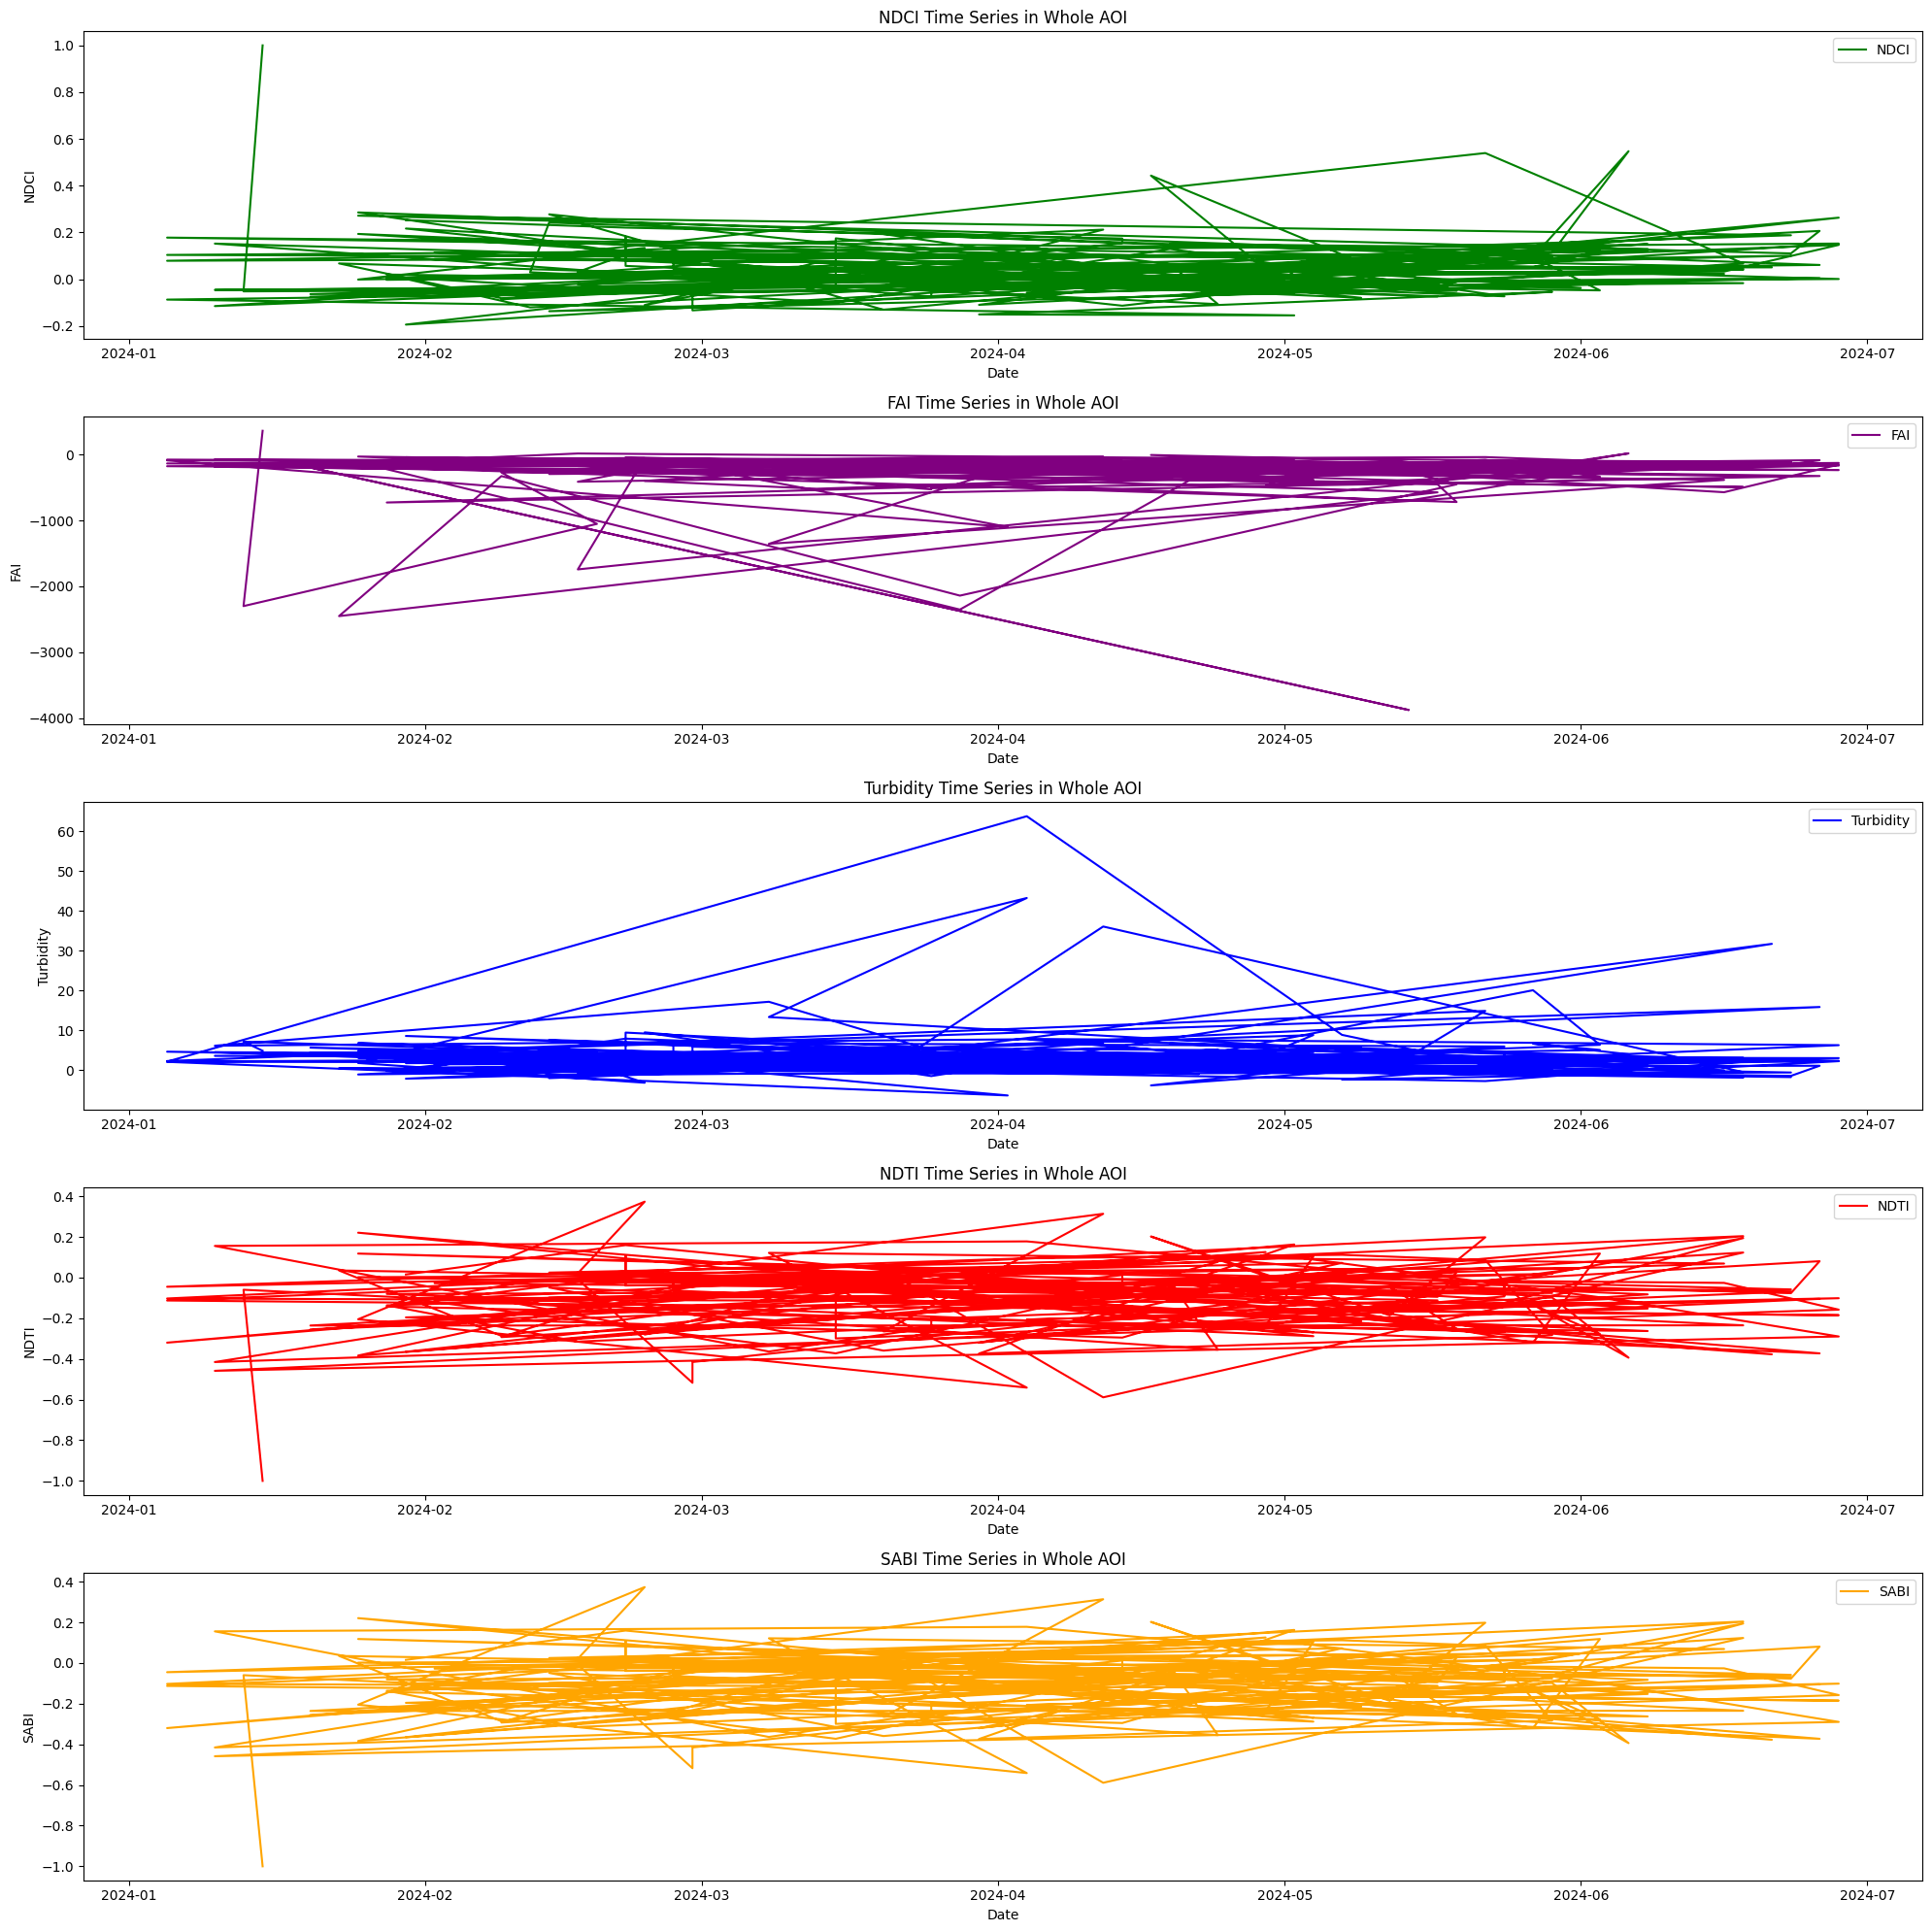

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 1, figsize=(20, 20))

# Plot NDCI time series
axs[0].plot(ndci_df_whole['date'], ndci_df_whole['NDCI'], label='NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('NDCI Time Series in Whole AOI')
axs[0].legend()

# Plot FAI time series (replacing WVI)
axs[1].plot(fai_df_whole['date'], fai_df_whole['FAI'], label='FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('FAI Time Series in Whole AOI')
axs[1].legend()

# Plot Turbidity time series
axs[2].plot(turbidity_df_whole['date'], turbidity_df_whole['Turbidity'], label='Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Turbidity Time Series in Whole AOI')
axs[2].legend()

# Plot NDTI time series
axs[3].plot(ndti_df_whole['date'], ndti_df_whole['NDTI'], label='NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('NDTI Time Series in Whole AOI')
axs[3].legend()

# Plot SABI time series
axs[4].plot(sabi_df_whole['date'], sabi_df_whole['SABI'], label='SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('SABI Time Series in Whole AOI')
axs[4].legend()


plt.tight_layout()
plt.show()


#### Plots aggregated by date here, so one value per sampling day

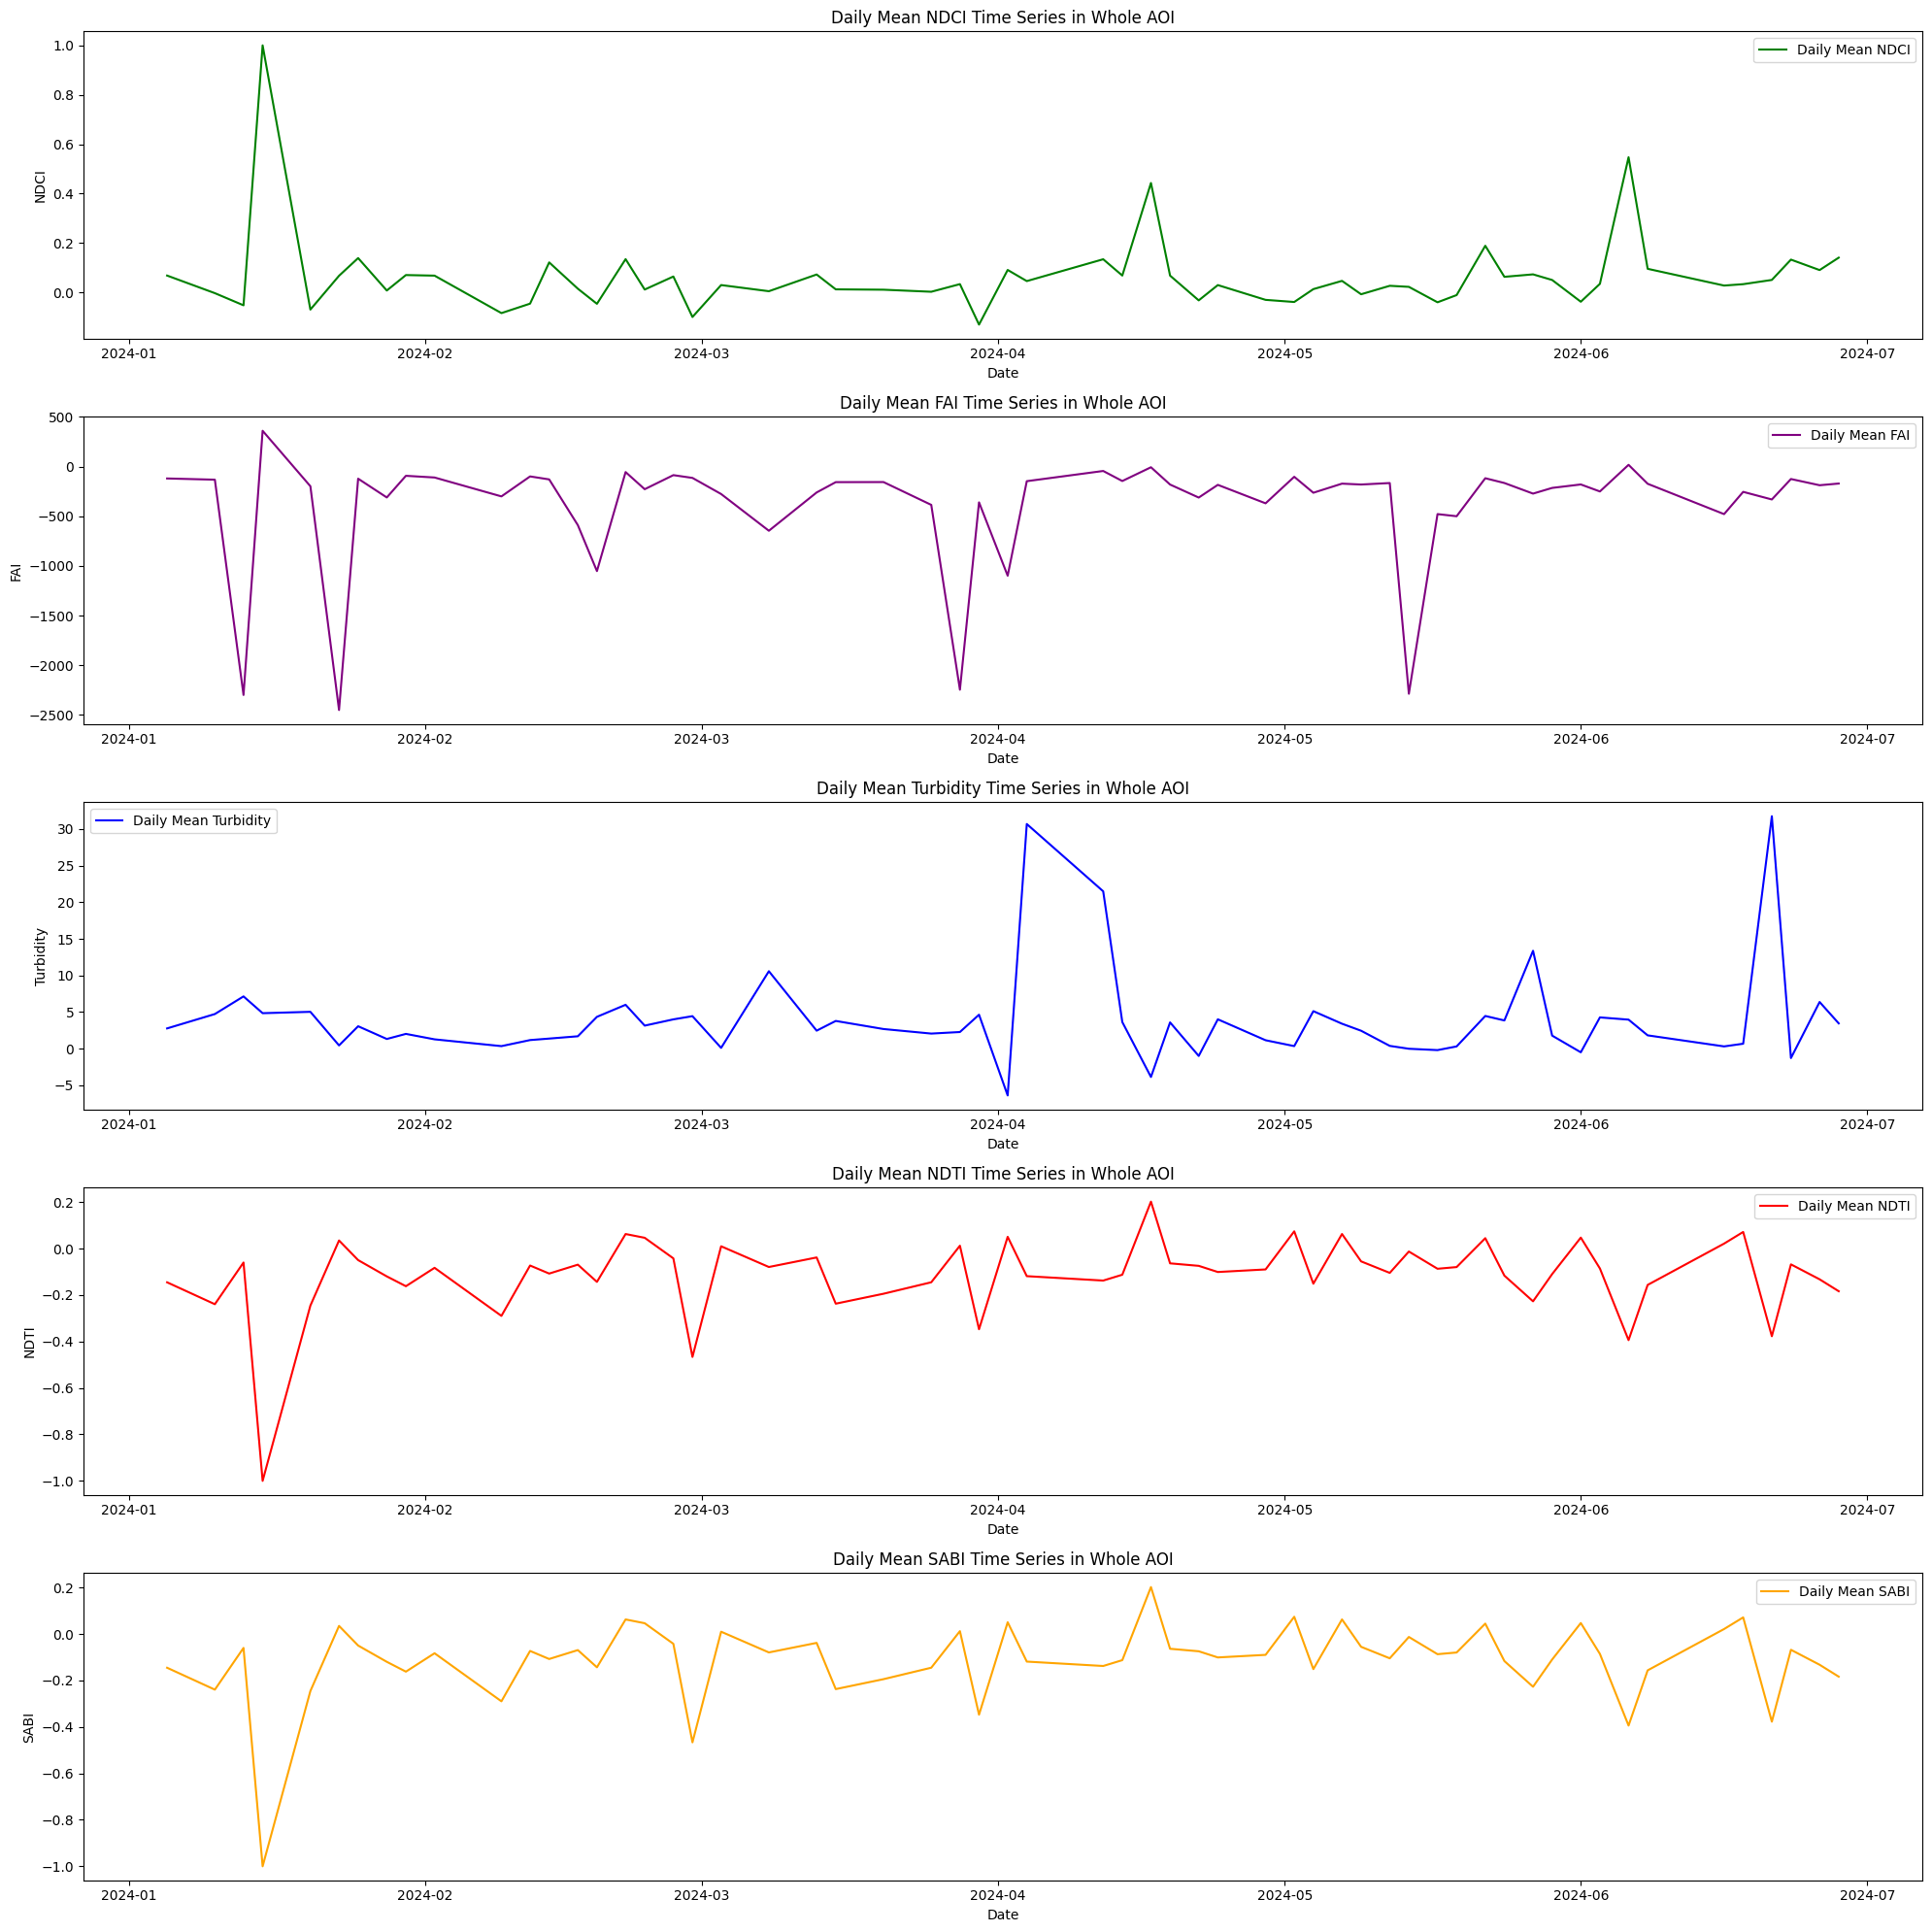

In [25]:
import matplotlib.pyplot as plt

# Compute the daily mean for each index without modifying the original data frames
ndci_daily_whole = ndci_df_whole.groupby('date', as_index=False)['NDCI'].mean()
fai_daily_whole = fai_df_whole.groupby('date', as_index=False)['FAI'].mean()
turbidity_daily_whole = turbidity_df_whole.groupby('date', as_index=False)['Turbidity'].mean()
ndti_daily_whole = ndti_df_whole.groupby('date', as_index=False)['NDTI'].mean()
sabi_daily_whole = sabi_df_whole.groupby('date', as_index=False)['SABI'].mean()

fig, axs = plt.subplots(5, 1, figsize=(20, 20))

# Plot daily mean NDCI time series
axs[0].plot(ndci_daily_whole['date'], ndci_daily_whole['NDCI'], label='Daily Mean NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('Daily Mean NDCI Time Series in Whole AOI')
axs[0].legend()

# Plot daily mean FAI time series
axs[1].plot(fai_daily_whole['date'], fai_daily_whole['FAI'], label='Daily Mean FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('Daily Mean FAI Time Series in Whole AOI')
axs[1].legend()

# Plot daily mean Turbidity time series
axs[2].plot(turbidity_daily_whole['date'], turbidity_daily_whole['Turbidity'], label='Daily Mean Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Daily Mean Turbidity Time Series in Whole AOI')
axs[2].legend()

# Plot daily mean NDTI time series
axs[3].plot(ndti_daily_whole['date'], ndti_daily_whole['NDTI'], label='Daily Mean NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('Daily Mean NDTI Time Series in Whole AOI')
axs[3].legend()

# Plot daily mean SABI time series
axs[4].plot(sabi_daily_whole['date'], sabi_daily_whole['SABI'], label='Daily Mean SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('Daily Mean SABI Time Series in Whole AOI')
axs[4].legend()

plt.tight_layout()
plt.show()

# Merge the daily aggregated data into one DataFrame
daily_aggregated_whole = ndci_daily_whole.merge(fai_daily_whole, on='date').merge(turbidity_daily_whole, on='date').merge(ndti_daily_whole, on='date').merge(sabi_daily_whole, on='date')

# Save the merged daily aggregated data to a CSV file
daily_aggregated_whole.to_csv('HABProject/Daily_Aggregated_Data_Whole_01012022_06302024.csv', index=False)

## 4. Statistical Analysis

### Okeechobee to Ocean AOI

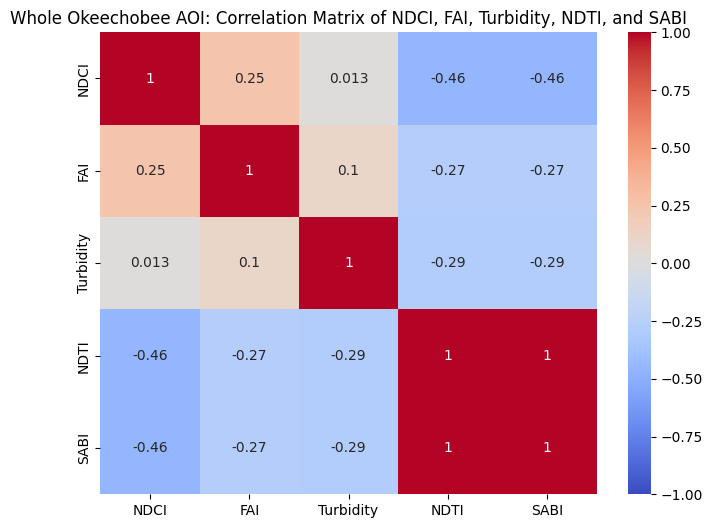

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000  0.253311   0.012597 -0.456558 -0.456558
FAI        0.253311  1.000000   0.104085 -0.271918 -0.271918
Turbidity  0.012597  0.104085   1.000000 -0.288919 -0.288919
NDTI      -0.456558 -0.271918  -0.288919  1.000000  1.000000
SABI      -0.456558 -0.271918  -0.288919  1.000000  1.000000


<Figure size 640x480 with 0 Axes>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import the daily as a df
daily_df = pd.read_csv('HABProject/Daily_Aggregated_Data_Whole_01012022_06302024.csv')

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plotting Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Whole Okeechobee AOI: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')
plt.show()

# Print Correlation Matrix
plt.savefig('HABProject/Whole_Shapefile/Heat_Map_Whole_01012022_06302024.png')  # Save the figure
print("Correlation Matrix:\n", corr_matrix)

## Scatter Plots

### Okeechobee AOI

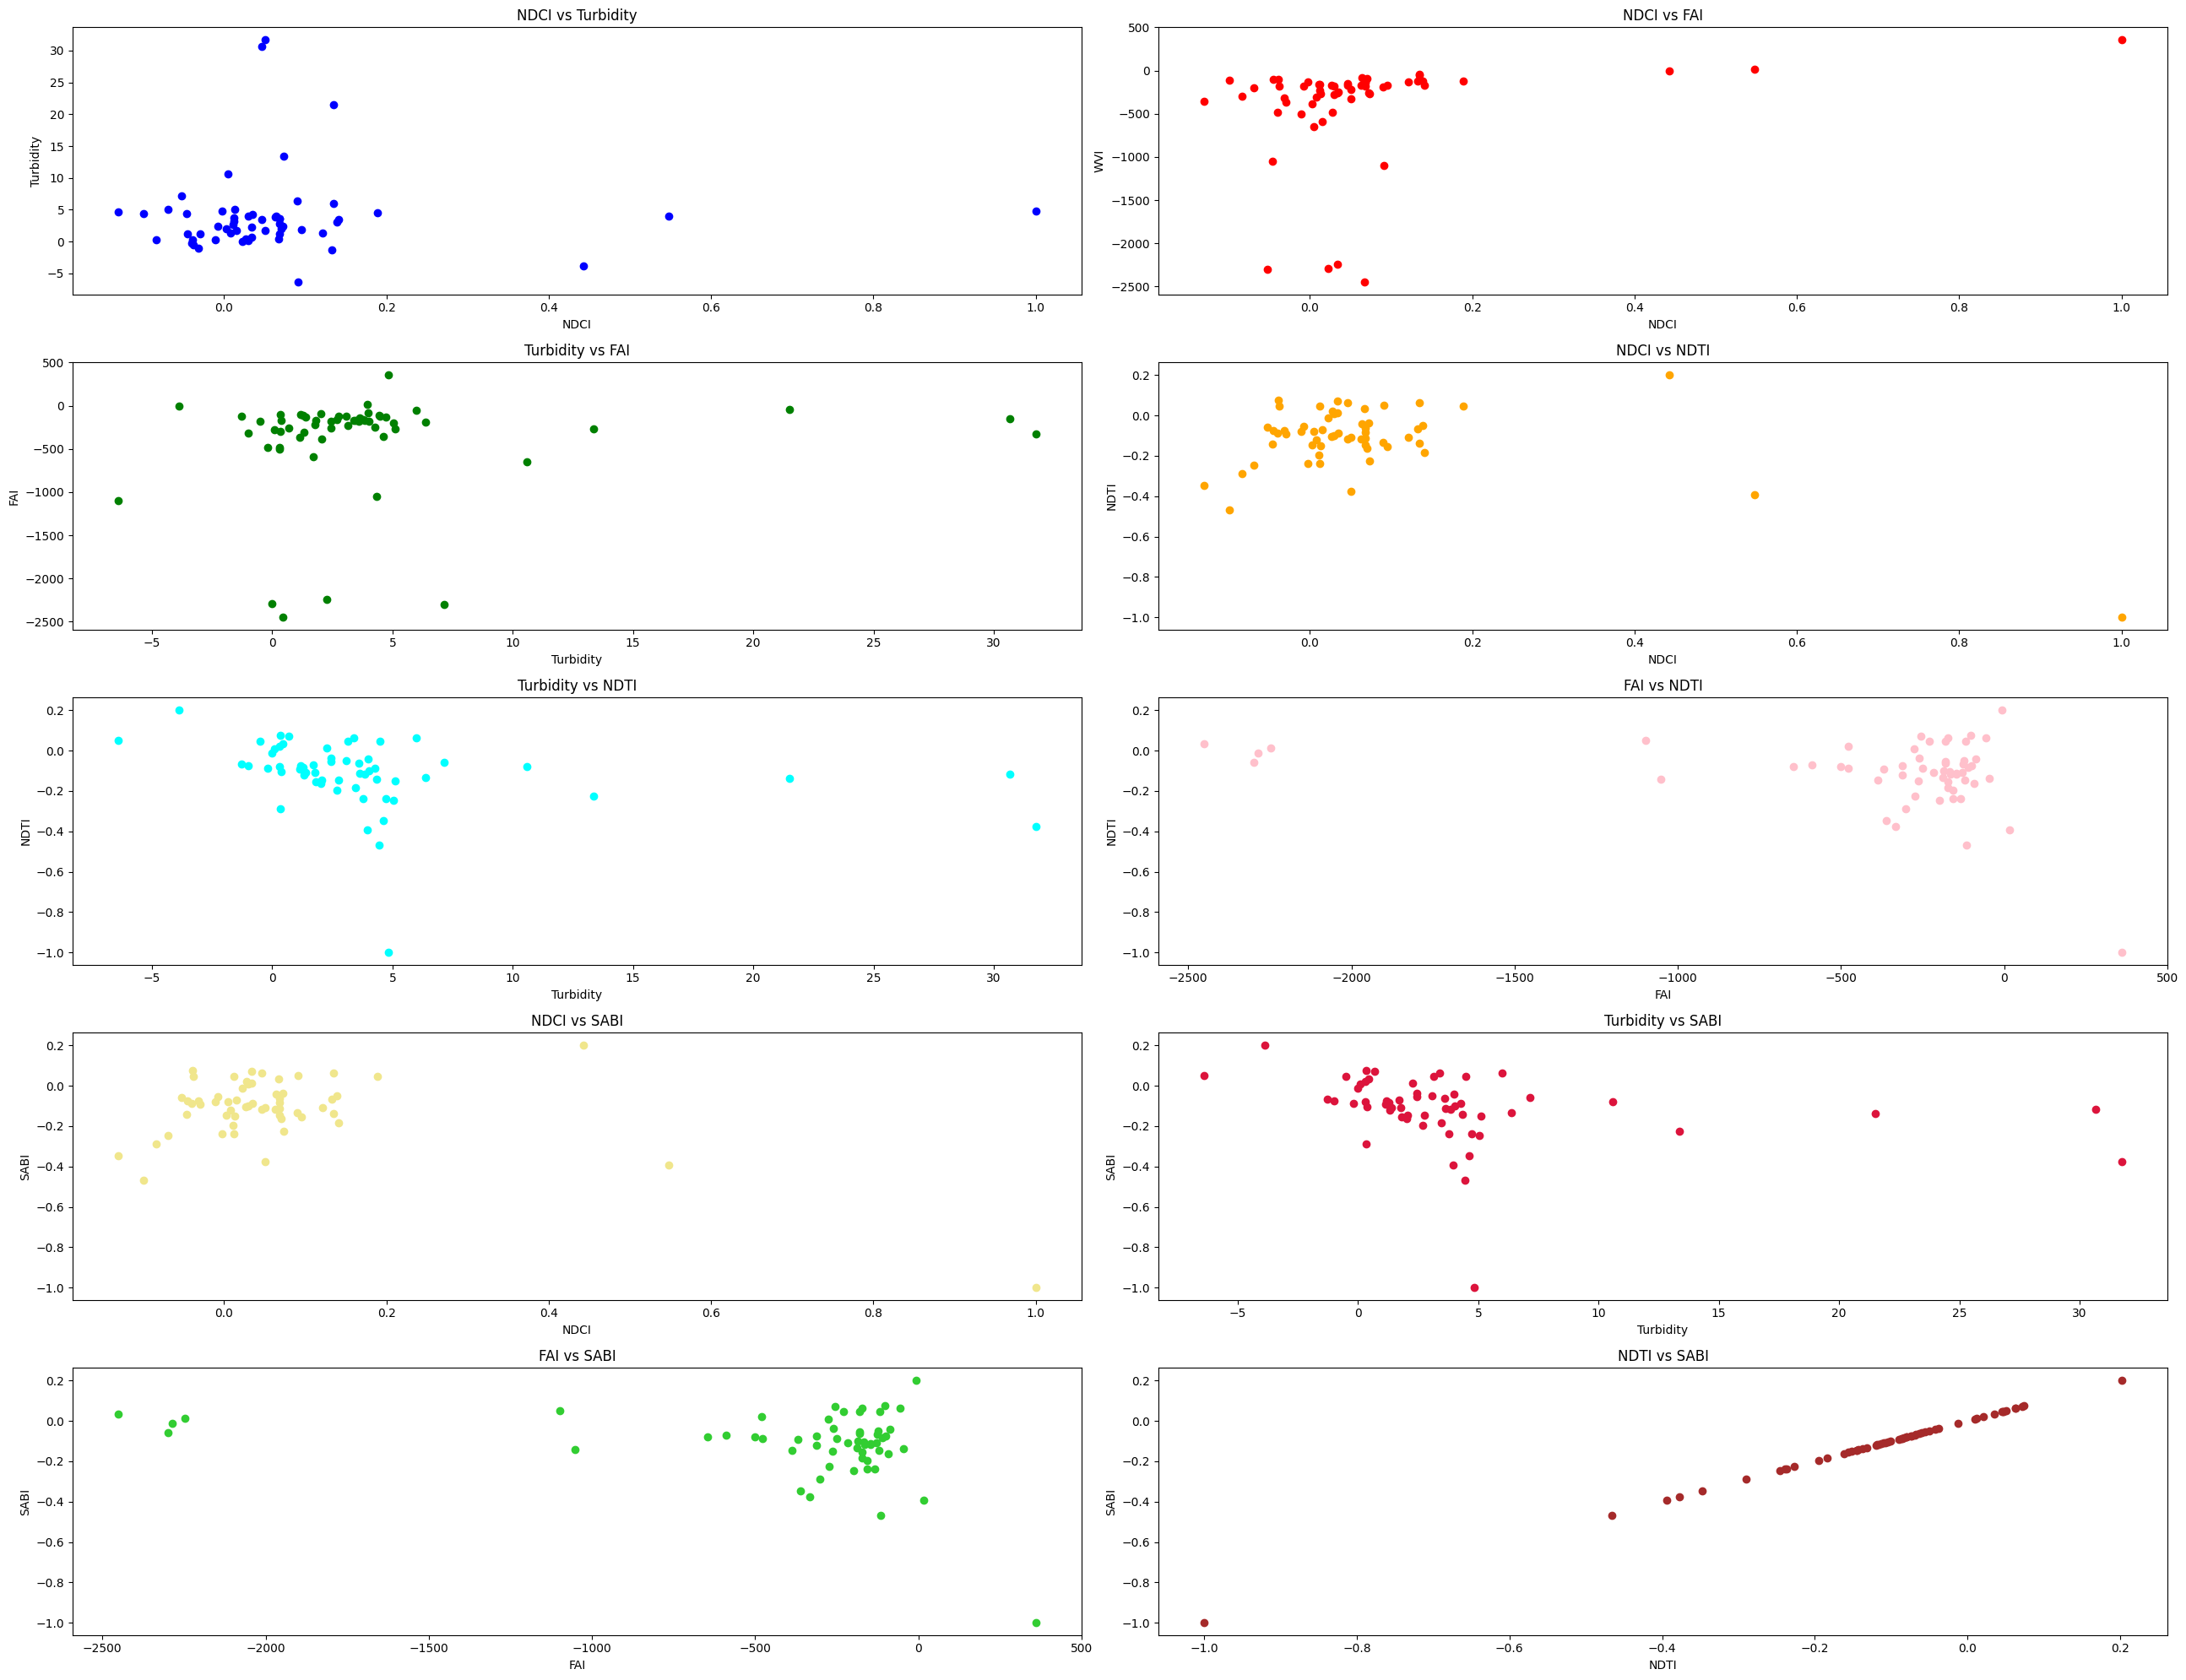

In [30]:
# Scatter Plot Analysis
fig, axs = plt.subplots(5, 2, figsize=(26, 20))

axs[0, 0].scatter(daily_df['NDCI'], daily_df['Turbidity'], c='blue')
axs[0, 0].set_xlabel('NDCI')
axs[0, 0].set_ylabel('Turbidity')
axs[0, 0].set_title('NDCI vs Turbidity')

axs[0, 1].scatter(daily_df['NDCI'], daily_df['FAI'], c='red')
axs[0, 1].set_xlabel('NDCI')
axs[0, 1].set_ylabel('WVI')
axs[0, 1].set_title('NDCI vs FAI')

axs[1, 0].scatter(daily_df['Turbidity'], daily_df['FAI'], c='green')
axs[1, 0].set_xlabel('Turbidity')
axs[1, 0].set_ylabel('FAI')
axs[1, 0].set_title('Turbidity vs FAI')

#Adding all NDTI here:

axs[1, 1].scatter(daily_df['NDCI'], daily_df['NDTI'], c='orange')
axs[1, 1].set_xlabel('NDCI')
axs[1, 1].set_ylabel('NDTI')
axs[1, 1].set_title('NDCI vs NDTI')

axs[2, 0].scatter(daily_df['Turbidity'], daily_df['NDTI'], c='cyan')
axs[2, 0].set_xlabel('Turbidity')
axs[2, 0].set_ylabel('NDTI')
axs[2, 0].set_title('Turbidity vs NDTI')

axs[2, 1].scatter(daily_df['FAI'], daily_df['NDTI'], c='pink')
axs[2, 1].set_xlabel('FAI')
axs[2, 1].set_ylabel('NDTI')
axs[2, 1].set_title('FAI vs NDTI')

#SABI Additions
axs[3, 0].scatter(daily_df['NDCI'], daily_df['SABI'], c='khaki')
axs[3, 0].set_xlabel('NDCI')
axs[3, 0].set_ylabel('SABI')
axs[3, 0].set_title('NDCI vs SABI')

axs[3, 1].scatter(daily_df['Turbidity'], daily_df['SABI'], c='crimson')
axs[3, 1].set_xlabel('Turbidity')
axs[3, 1].set_ylabel('SABI')
axs[3, 1].set_title('Turbidity vs SABI')

axs[4, 0].scatter(daily_df['FAI'], daily_df['SABI'], c='limegreen')
axs[4, 0].set_xlabel('FAI')
axs[4, 0].set_ylabel('SABI')
axs[4, 0].set_title('FAI vs SABI')

axs[4, 1].scatter(daily_df['NDTI'], daily_df['SABI'], c='brown')
axs[4, 1].set_xlabel('NDTI')
axs[4, 1].set_ylabel('SABI')
axs[4, 1].set_title('NDTI vs SABI')


plt.tight_layout()
plt.savefig('HABProject/Scatter_plot_Whole_01012022_06302024.png')  # Save the figure
plt.show()

# Canal Shapefile

## 1. Ensuring the shapefile can be read

In [2]:
import geopandas as gpd

shapefile_path = 'D:/Classes/STPythonFinalProject/LakeOandPathShapefile.shp'
gdf = gpd.read_file(shapefile_path)
print(gdf.head())

      Shape_Leng    Shape_Area  \
0  495827.899727  2.525803e+09   

                                            geometry  
0  POLYGON Z ((-9029056.277 3120821.116 0, -90274...  


#### Another testing of the shapefile, converting it so it may be used in Geemap

In [7]:
# Same procedure with Canal system shapefile
shapefile_path_CS = 'D:/Classes/STPythonFinalProject/CanalSystemShapefile.shp'
gdf = gpd.read_file(shapefile_path_CS)

# Define a function to drop the Z coordinate from a geometry
def drop_z(geom):
    if geom.is_empty:
        return geom
    if geom.geom_type == 'Polygon':
        return shapely.geometry.Polygon([(x, y) for x, y, *z in geom.exterior.coords])
    elif geom.geom_type == 'MultiPolygon':
        return shapely.geometry.MultiPolygon([drop_z(poly) for poly in geom])
    else:
        return geom

# Apply the function to each geometry in your GeoDataFrame
gdf['geometry'] = gdf['geometry'].apply(drop_z)

# Now convert the GeoDataFrame to an Earth Engine FeatureCollection
aoi_fc_cs = geemap.geopandas_to_ee(gdf)
aoi_cs = aoi_fc_cs.geometry()

# Verify by printing the AOI geometry
print(aoi_cs.getInfo())

{'type': 'Polygon', 'coordinates': [[[-80.61603801948273, 26.987460702390358], [-80.61759883959394, 26.986943127386613], [-80.61721363930515, 26.984418500637002], [-80.59914298442106, 26.987419530574254], [-80.54608097292687, 27.013547064750504], [-80.52423190873633, 27.017205898025317], [-80.49770090254007, 27.00944902884364], [-80.47346979816851, 27.006668134527747], [-80.46796646271814, 27.006668134527747], [-80.44504958731906, 27.015156966260133], [-80.43741062855327, 27.019401141286608], [-80.40217285328096, 27.031913207925854], [-80.31904784314966, 27.06132204828594], [-80.28725991926694, 27.10783371817975], [-80.27970310065409, 27.1160224521411], [-80.27288553533295, 27.116534228417482], [-80.26902498677188, 27.118581308514567], [-80.26631438867402, 27.122675357937347], [-80.26409662610395, 27.126330631504217], [-80.26253597936758, 27.131740218005444], [-80.26081105322365, 27.13524899861553], [-80.25678622525501, 27.138026705833536], [-80.25530771687497, 27.144897579048944], [-8

## 2. Creation of Map and CSVs

#### Mosaic introduced, combining all images with the cloud mask from the time frame, clips it to the area of interest, and computes NDWI. 

#### Uses NDWI for the water mask, and returns the Water Masked Mosaic and the NDWI

In [10]:
import pandas as pd
import ee
import geemap

# Initialize Earth Engine (if not already initialized)
ee.Initialize()

# Assume AOI is defined (replace with your actual AOI)
# Example AOI:


# Define cloud masking function using the QA60 band
def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Define processing function:
#  - Applies cloud mask.
#  - Computes an NDWI for water detection and applies a water mask.
#  - Computes NDCI, FAI, and Turbidity indices.
#  - Clips the image to the AOI.
def process_image(image):
    # Apply cloud mask
    image = maskS2clouds(image)
    
    # Compute NDWI (using green (B3) and NIR (B8)) to isolate water pixels.
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    water_mask = ndwi.gt(0.5)  # Adjust threshold as needed
    image = image.updateMask(water_mask)
    
    # Calculate NDCI (Normalized Difference Chlorophyll Index) using B5 (red edge) and B4 (red)
    ndci = image.normalizedDifference(['B5', 'B4']).rename('NDCI')
    
    # Calculate FAI (Floating Algae Index).
    # For Sentinel-2, one common approach is:
    #   FAI = B8 - (B5 + (B11 - B5) * (137/905))
    
    #fai = image.select('B8') \
     #   .subtract(image.select('B5') \
      #            .add(image.select('B11') \
       #                .subtract(image.select('B5')) \
        #               .multiply(137/905))) \
        #.rename('FAI')

    #Naming each band as a variable
    #FAI = (Rnir - Rred) = (((Rswir - Rred)*(wavelength_nir - wavelength_red)) / (wavelength_swir - wavelength_red)))
    #Equation based on Muzfoffar et al. 2023. DOI: https://doi.org/10.3390/rs15082039
    B8 = image.select('B8') # NIR Band
    B4 = image.select('B4') # Red band
    B11 = image.select('B11') # SWIR band

    #Making a variable for each part of the equation
    diff_NIR_Red = B8.subtract(B4)
    diff_SWIR_Red = B11.subtract(B4)
    diff_WL_NIR_Red = 842 - 665
    diff_WL_SWIR_Red = 1610 - 665

    #Dealing with the fraction order of operations
    top_fraction = diff_SWIR_Red.multiply(diff_WL_NIR_Red)
    whole_fraction = top_fraction.divide(diff_WL_SWIR_Red)

    #Last bit of equation
    fai = diff_NIR_Red.add(whole_fraction).rename('FAI')

    
    
    
    # Calculate Turbidity as an additional index (optional)
    # This is an example formula; adjust as appropriate for your study.
    turbidity = image.select('B3') \
        .divide(image.select('B1')) \
        .multiply(8.93) \
        .subtract(6.39) \
        .rename('Turbidity')

    #NDTI calculation
    ndti = image.normalizedDifference(['B4', 'B3']).rename('NDTI')

     #SABI (Surface algal bloom index) calculation
    #SABI = (Red - NIR) / (Blue + Green) OR SABI = (B4 - B8) / (B2 + B3)
    B2 = image.select('B2') #Blue band
    B3 = image.select('B3') #Green band

    sabi_top = B4.subtract(B8)
    sabi_bottom = B2.add(B3)
    sabi = sabi_top.divide(sabi_bottom).rename('SABI')
    
    # Add the new bands and clip the image to the aoi_cs
    return image.addBands([ndci, fai, turbidity, ndti, sabi]).clip(aoi_cs)

# Define time frame for your analysis
start_date = '2022-01-01'
end_date   = '2023-12-31'

# Load Sentinel-2 image collection, filter by aoi_cs and date, and sort by cloud percentage
sentinel2 = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
             .filterBounds(aoi_cs)
             .filterDate(start_date, end_date)
             .sort('CLOUDY_PIXEL_PERCENTAGE'))

# Process the image collection: apply cloud and water masks, calculate indices, and clip each image to aoi_cs
processed_images = sentinel2.map(process_image)

# --- Time Series Calculation ---
# Function to calculate mean index values over the aoi_cs for each image
def calculate_time_series(image_collection, index_name):
    def reduce_region(image):
        stats = image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=aoi_cs,
            scale=10,         # 10 m resolution
            maxPixels=1e9
        )
        return ee.Feature(None, stats).set('date', image.date().format('YYYY-MM-dd'))
    time_series = image_collection.map(reduce_region)
    time_series_list = time_series.reduceColumns(
        ee.Reducer.toList(2),
        ['date', index_name]
    ).get('list').getInfo()
    return time_series_list

# Calculate time series for each index
ndci_cs_time_series      = calculate_time_series(processed_images, 'NDCI')
fai_cs_time_series       = calculate_time_series(processed_images, 'FAI')
turbidity_cs_time_series = calculate_time_series(processed_images, 'Turbidity')
ndti_cs_time_series      = calculate_time_series(processed_images, 'NDTI')
sabi_cs_time_series      = calculate_time_series(processed_images, 'SABI')

# Convert the time series lists to pandas DataFrames
def time_series_to_df(time_series, index_name):
    df = pd.DataFrame(time_series, columns=['date', index_name])
    df['date'] = pd.to_datetime(df['date'])
    return df

ndci_cs_df      = time_series_to_df(ndci_cs_time_series, 'NDCI')
fai_cs_df       = time_series_to_df(fai_cs_time_series, 'FAI')
turbidity_cs_df = time_series_to_df(turbidity_cs_time_series, 'Turbidity')
ndti_cs_df      = time_series_to_df(ndti_cs_time_series, 'NDTI')
sabi_cs_df      = time_series_to_df(sabi_cs_time_series, 'SABI')

# Merge the DataFrames for further analysis
merged_cs_df = ndci_cs_df.merge(fai_cs_df, on='date').merge(turbidity_cs_df, on='date').merge(ndti_cs_df, on='date').merge(sabi_cs_df, on='date')

# Save the time series data to CSV files
ndci_cs_df.to_csv(f'HABProject/NDCI_TimeSeries_CS.csv', index=False)
fai_cs_df.to_csv(f'HABProjectFAI_TimeSeries_CS.csv', index=False)
turbidity_cs_df.to_csv(f'Turbidity_TimeSeries_CS.csv', index=False)
ndti_cs_df.to_csv(f'NDTI_TimeSeries_CS.csv', index=False)
sabi_cs_df.to_csv(f'SABI_TimeSeries_CS.csv', index=False)
merged_cs_df.to_csv(f'Merged_TimeSeries_CS.csv', index=False)

# --- Map Visualization ---
Map = geemap.Map(center=[27.75, -80.25], zoom=10)

# Display the FAI band (suitable for highlighting floating algae)
Map.addLayer(processed_images.first(), 
             {'bands': ['FAI'], 'min': -0.5, 'max': 0.5, 'palette': ['blue', 'white', 'green']}, 
             'FAI')

# Display the NDCI band (using a palette to highlight chlorophyll levels)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDCI'], 'min': -0.5, 'max': 0.5, 'palette': ['yellow', 'orange', 'red']}, 
             'NDCI')

# Display the Turbidity band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['Turbidity'], 'min': -2, 'max': 20, 'palette': ['white', 'blue', 'darkblue']}, 
             'Turbidity')

# Display the NDTI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDTI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'NDTI')

# Display the SABI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['SABI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'SABI')

# Add the aoi_cs boundary for reference
Map.addLayer(aoi_cs, {}, 'aoi_cs', True)

Map


Map(center=[27.75, -80.25], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

## 3. Plotting Time Series of the Indices

### Messy Time Series

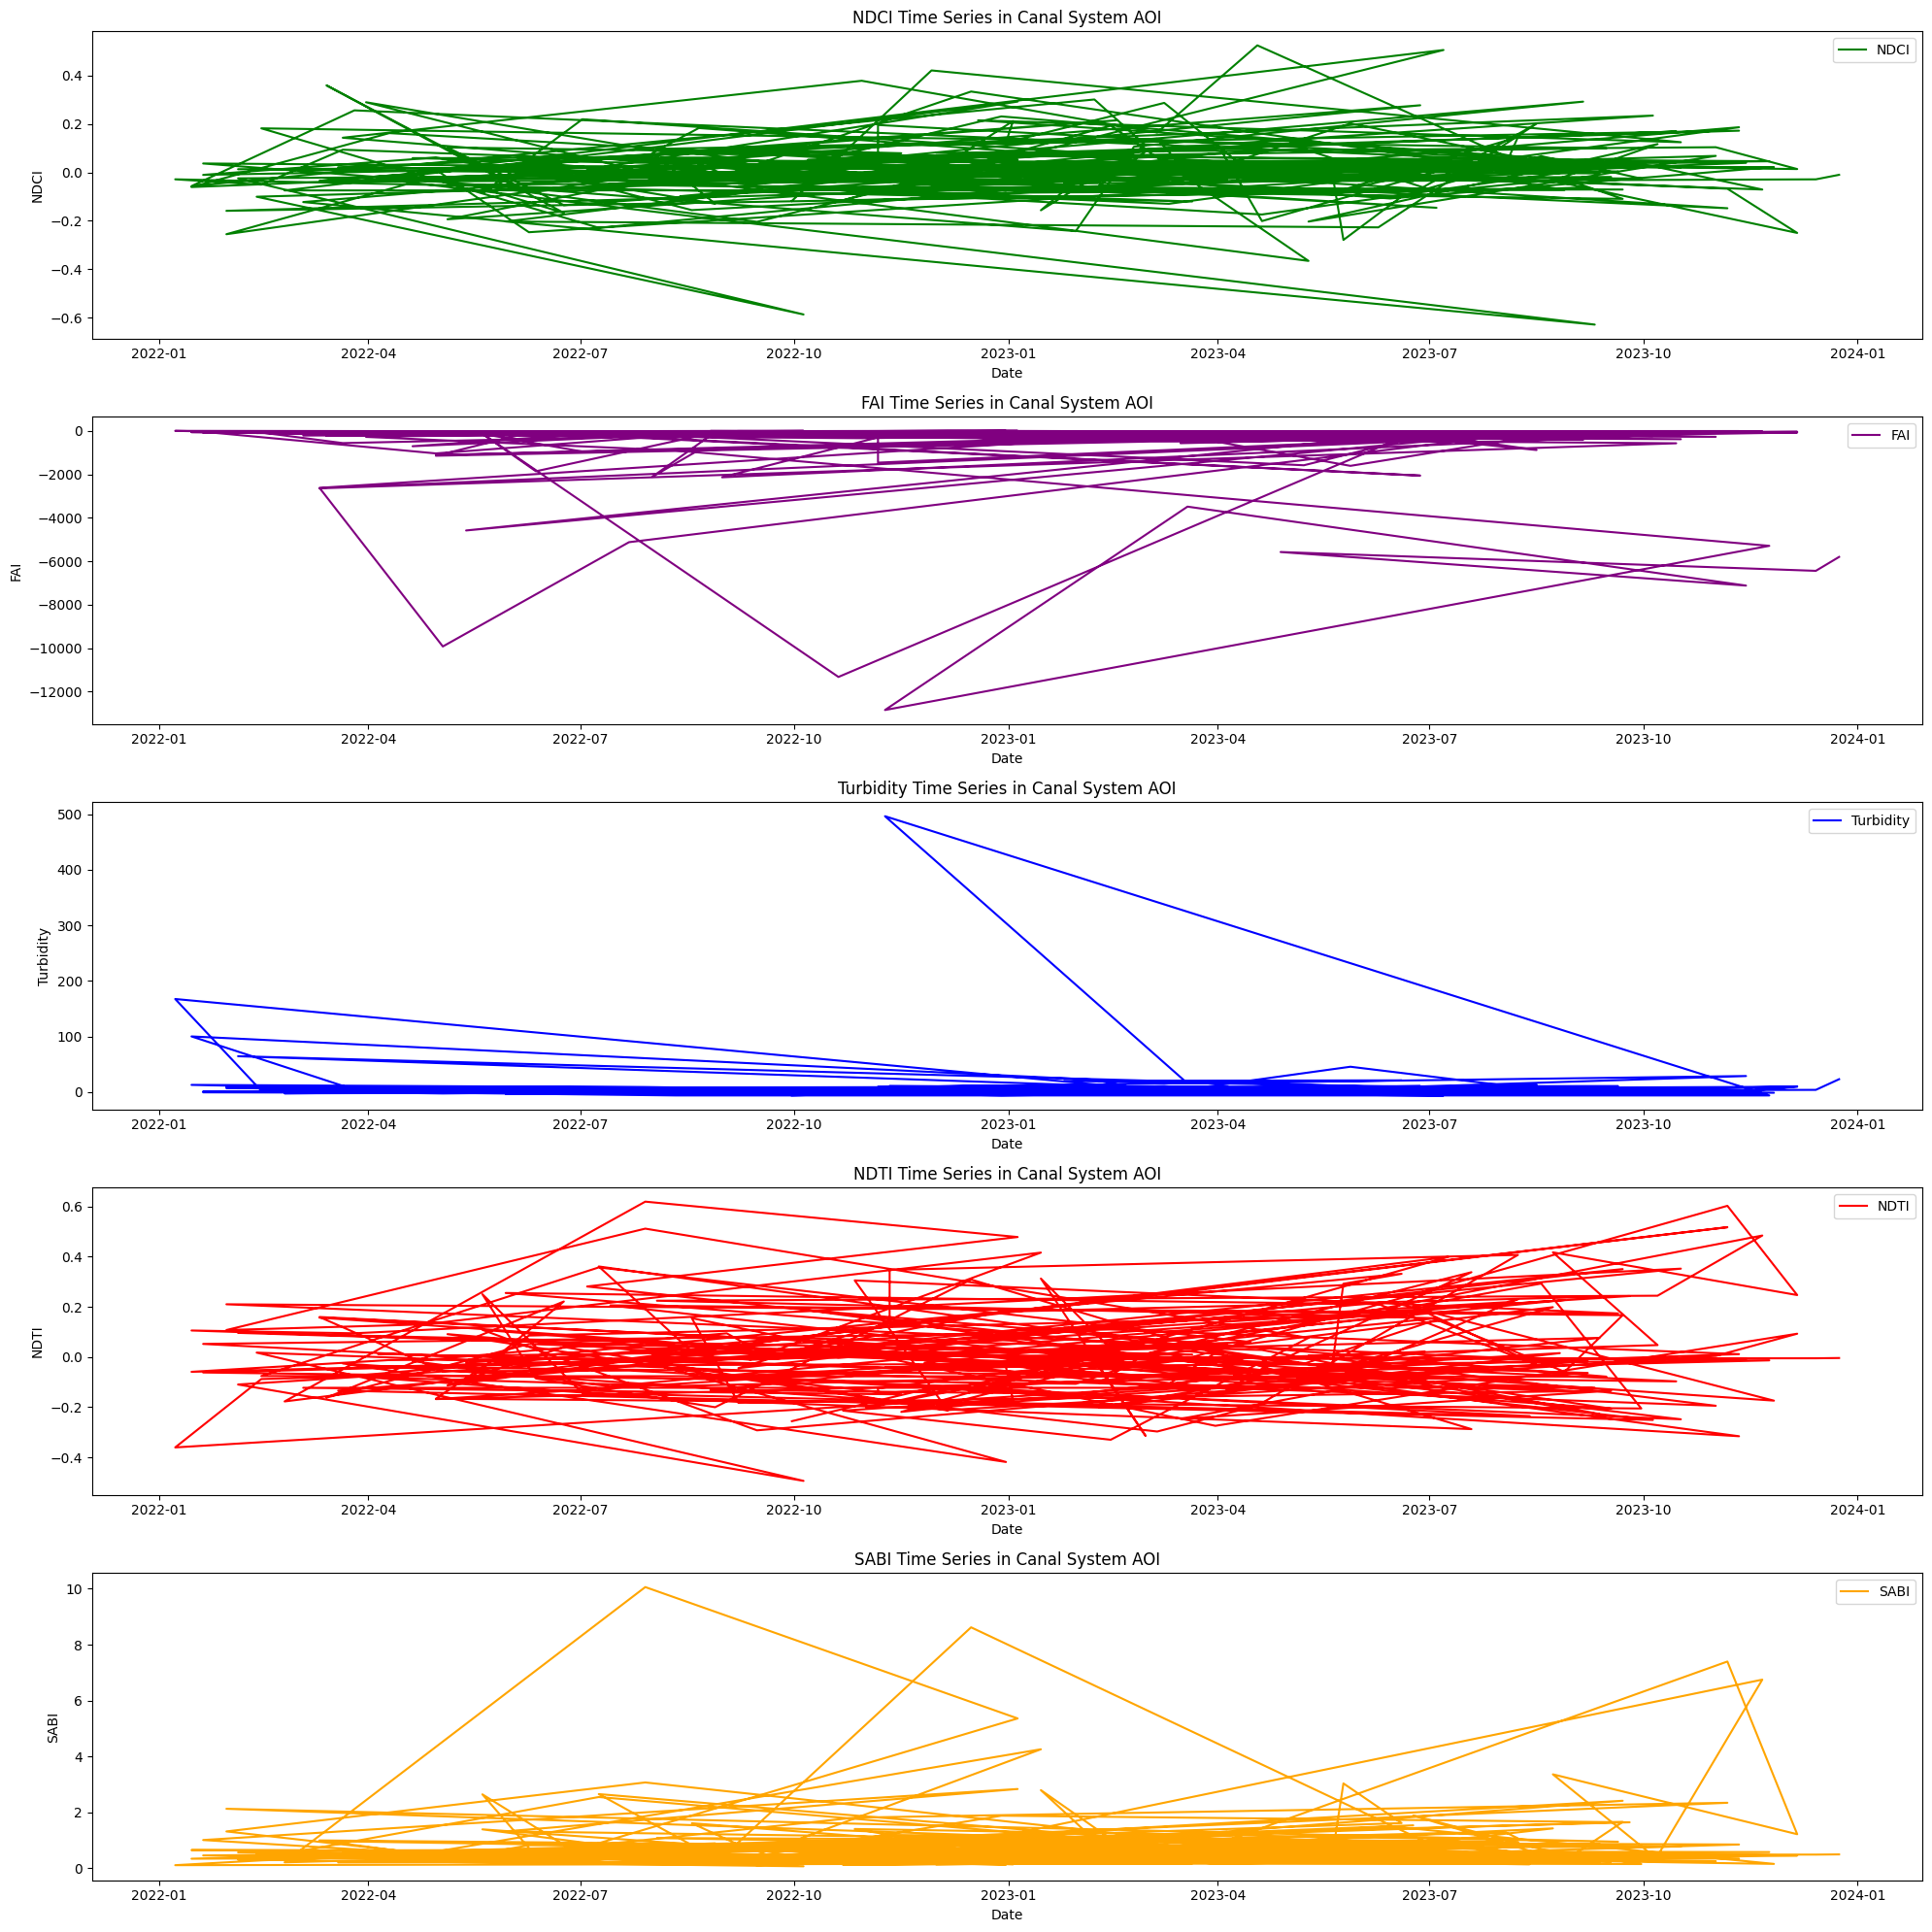

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 1, figsize=(20, 20))

# Plot NDCI time series
axs[0].plot(ndci_cs_df['date'], ndci_cs_df['NDCI'], label='NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('NDCI Time Series in Canal System AOI')
axs[0].legend()

# Plot FAI time series (replacing WVI)
axs[1].plot(fai_cs_df['date'], fai_cs_df['FAI'], label='FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('FAI Time Series in Canal System AOI')
axs[1].legend()

# Plot Turbidity time series
axs[2].plot(turbidity_cs_df['date'], turbidity_cs_df['Turbidity'], label='Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Turbidity Time Series in Canal System AOI')
axs[2].legend()

# Plot NDCI time series
axs[3].plot(ndti_cs_df['date'], ndti_cs_df['NDTI'], label='NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('NDTI Time Series in Canal System AOI')
axs[3].legend()

# Plot SABI time series
axs[4].plot(sabi_cs_df['date'], sabi_cs_df['SABI'], label='SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('SABI Time Series in Canal System AOI')
axs[4].legend()

plt.tight_layout()
plt.show()


### Daily Time Series

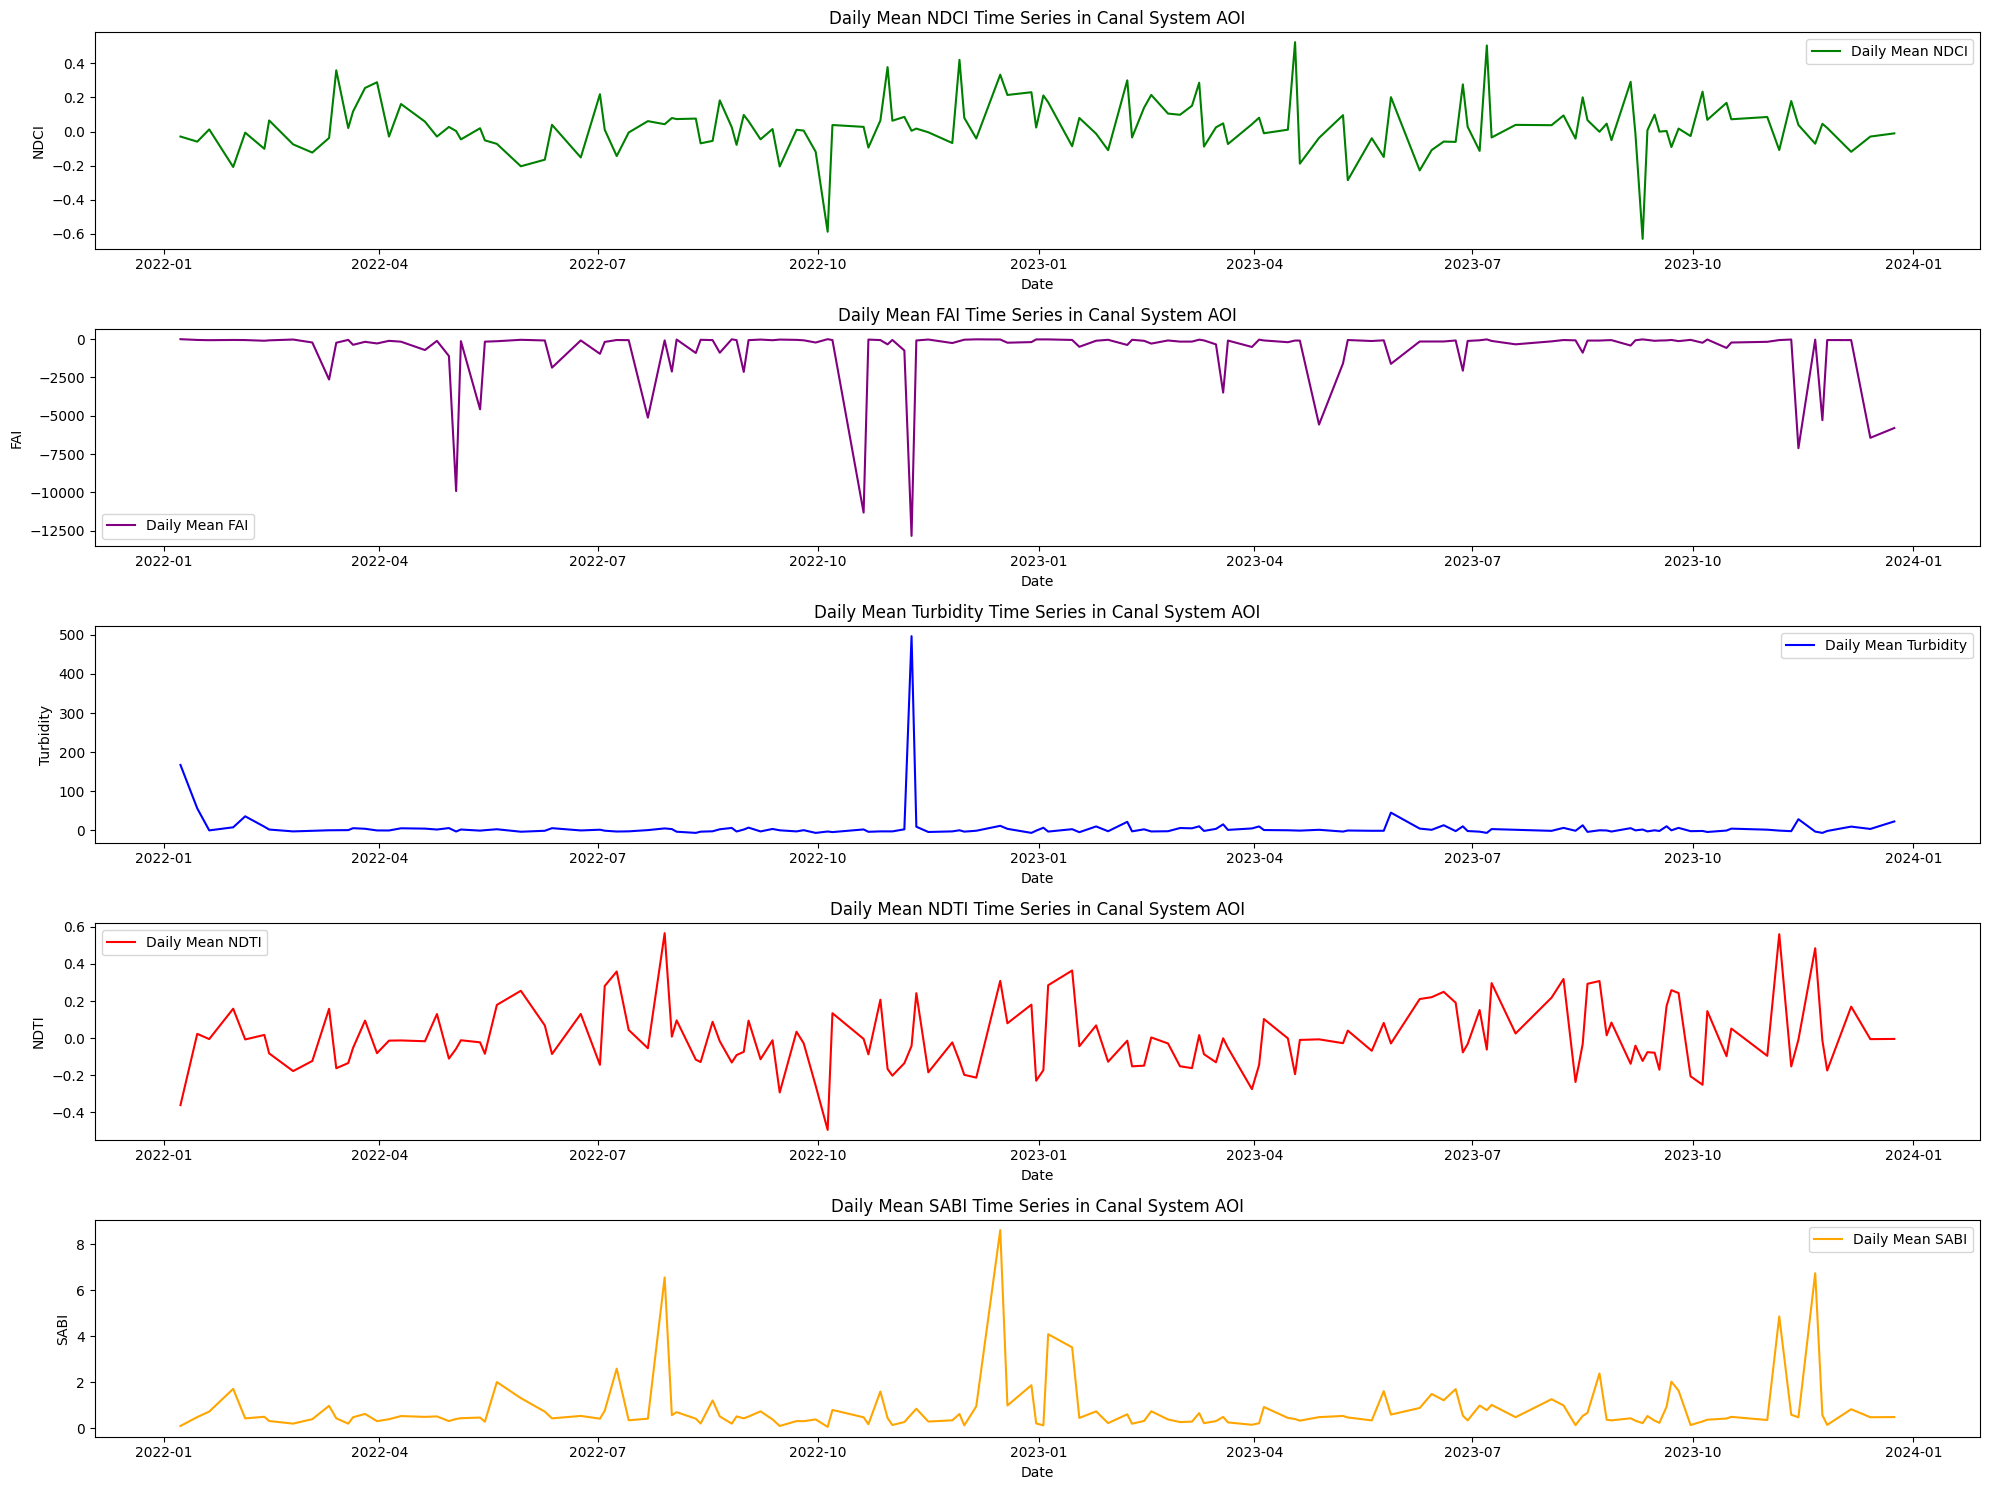

In [42]:
import matplotlib.pyplot as plt

# Compute the daily mean for each index without modifying the original data frames
ndci_daily_cs = ndci_cs_df.groupby('date', as_index=False)['NDCI'].mean()
fai_daily_cs = fai_cs_df.groupby('date', as_index=False)['FAI'].mean()
turbidity_daily_cs = turbidity_cs_df.groupby('date', as_index=False)['Turbidity'].mean()
ndti_daily_cs = ndti_cs_df.groupby('date', as_index=False)['NDTI'].mean()
sabi_daily_cs = sabi_cs_df.groupby('date', as_index=False)['SABI'].mean()

fig, axs = plt.subplots(5, 1, figsize=(20, 15))

# Plot daily mean NDCI time series
axs[0].plot(ndci_daily_cs['date'], ndci_daily_cs['NDCI'], label='Daily Mean NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('Daily Mean NDCI Time Series in Canal System AOI')
axs[0].legend()

# Plot daily mean FAI time series
axs[1].plot(fai_daily_cs['date'], fai_daily_cs['FAI'], label='Daily Mean FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('Daily Mean FAI Time Series in Canal System AOI')
axs[1].legend()

# Plot daily mean Turbidity time series
axs[2].plot(turbidity_daily_cs['date'], turbidity_daily_cs['Turbidity'], label='Daily Mean Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Daily Mean Turbidity Time Series in Canal System AOI')
axs[2].legend()

# Plot daily mean Turbidity time series
axs[3].plot(ndti_daily_cs['date'], ndti_daily_cs['NDTI'], label='Daily Mean NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('Daily Mean NDTI Time Series in Canal System AOI')
axs[3].legend()

# Plot daily mean SABI time series
axs[4].plot(sabi_daily_cs['date'], sabi_daily_cs['SABI'], label='Daily Mean SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('Daily Mean SABI Time Series in Canal System AOI')
axs[4].legend()

plt.tight_layout()
plt.show()

# Merge the daily aggregated data into one DataFrame
daily_aggregated_cs = ndci_daily_cs.merge(fai_daily_cs, on='date').merge(turbidity_daily_cs, on='date').merge(ndti_daily_cs, on='date').merge(sabi_daily_cs, on='date')

# Save the merged daily aggregated data to a CSV file
daily_aggregated_cs.to_csv('HABProject/Daily_Aggregated_Data_CS.csv', index=False)

### Correlation Matrix

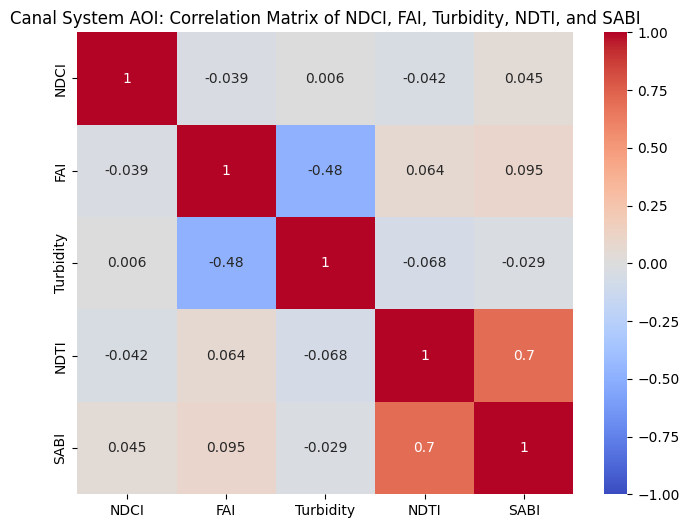

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000 -0.038655   0.006008 -0.042496  0.045062
FAI       -0.038655  1.000000  -0.478952  0.064221  0.095342
Turbidity  0.006008 -0.478952   1.000000 -0.068474 -0.029164
NDTI      -0.042496  0.064221  -0.068474  1.000000  0.696056
SABI       0.045062  0.095342  -0.029164  0.696056  1.000000


<Figure size 640x480 with 0 Axes>

In [43]:
import seaborn as sns

#Import the daily cs csv as a df
daily_cs_df = pd.read_csv('Daily_Aggregated_Data_cs.csv')

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_cs_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plotting Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Canal System AOI: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')
plt.show()

# Print Correlation Matrix
plt.savefig('HABProject/heat_map_cs.png')  # Save the figure
print("Correlation Matrix:\n", corr_matrix)

### Scatterplot

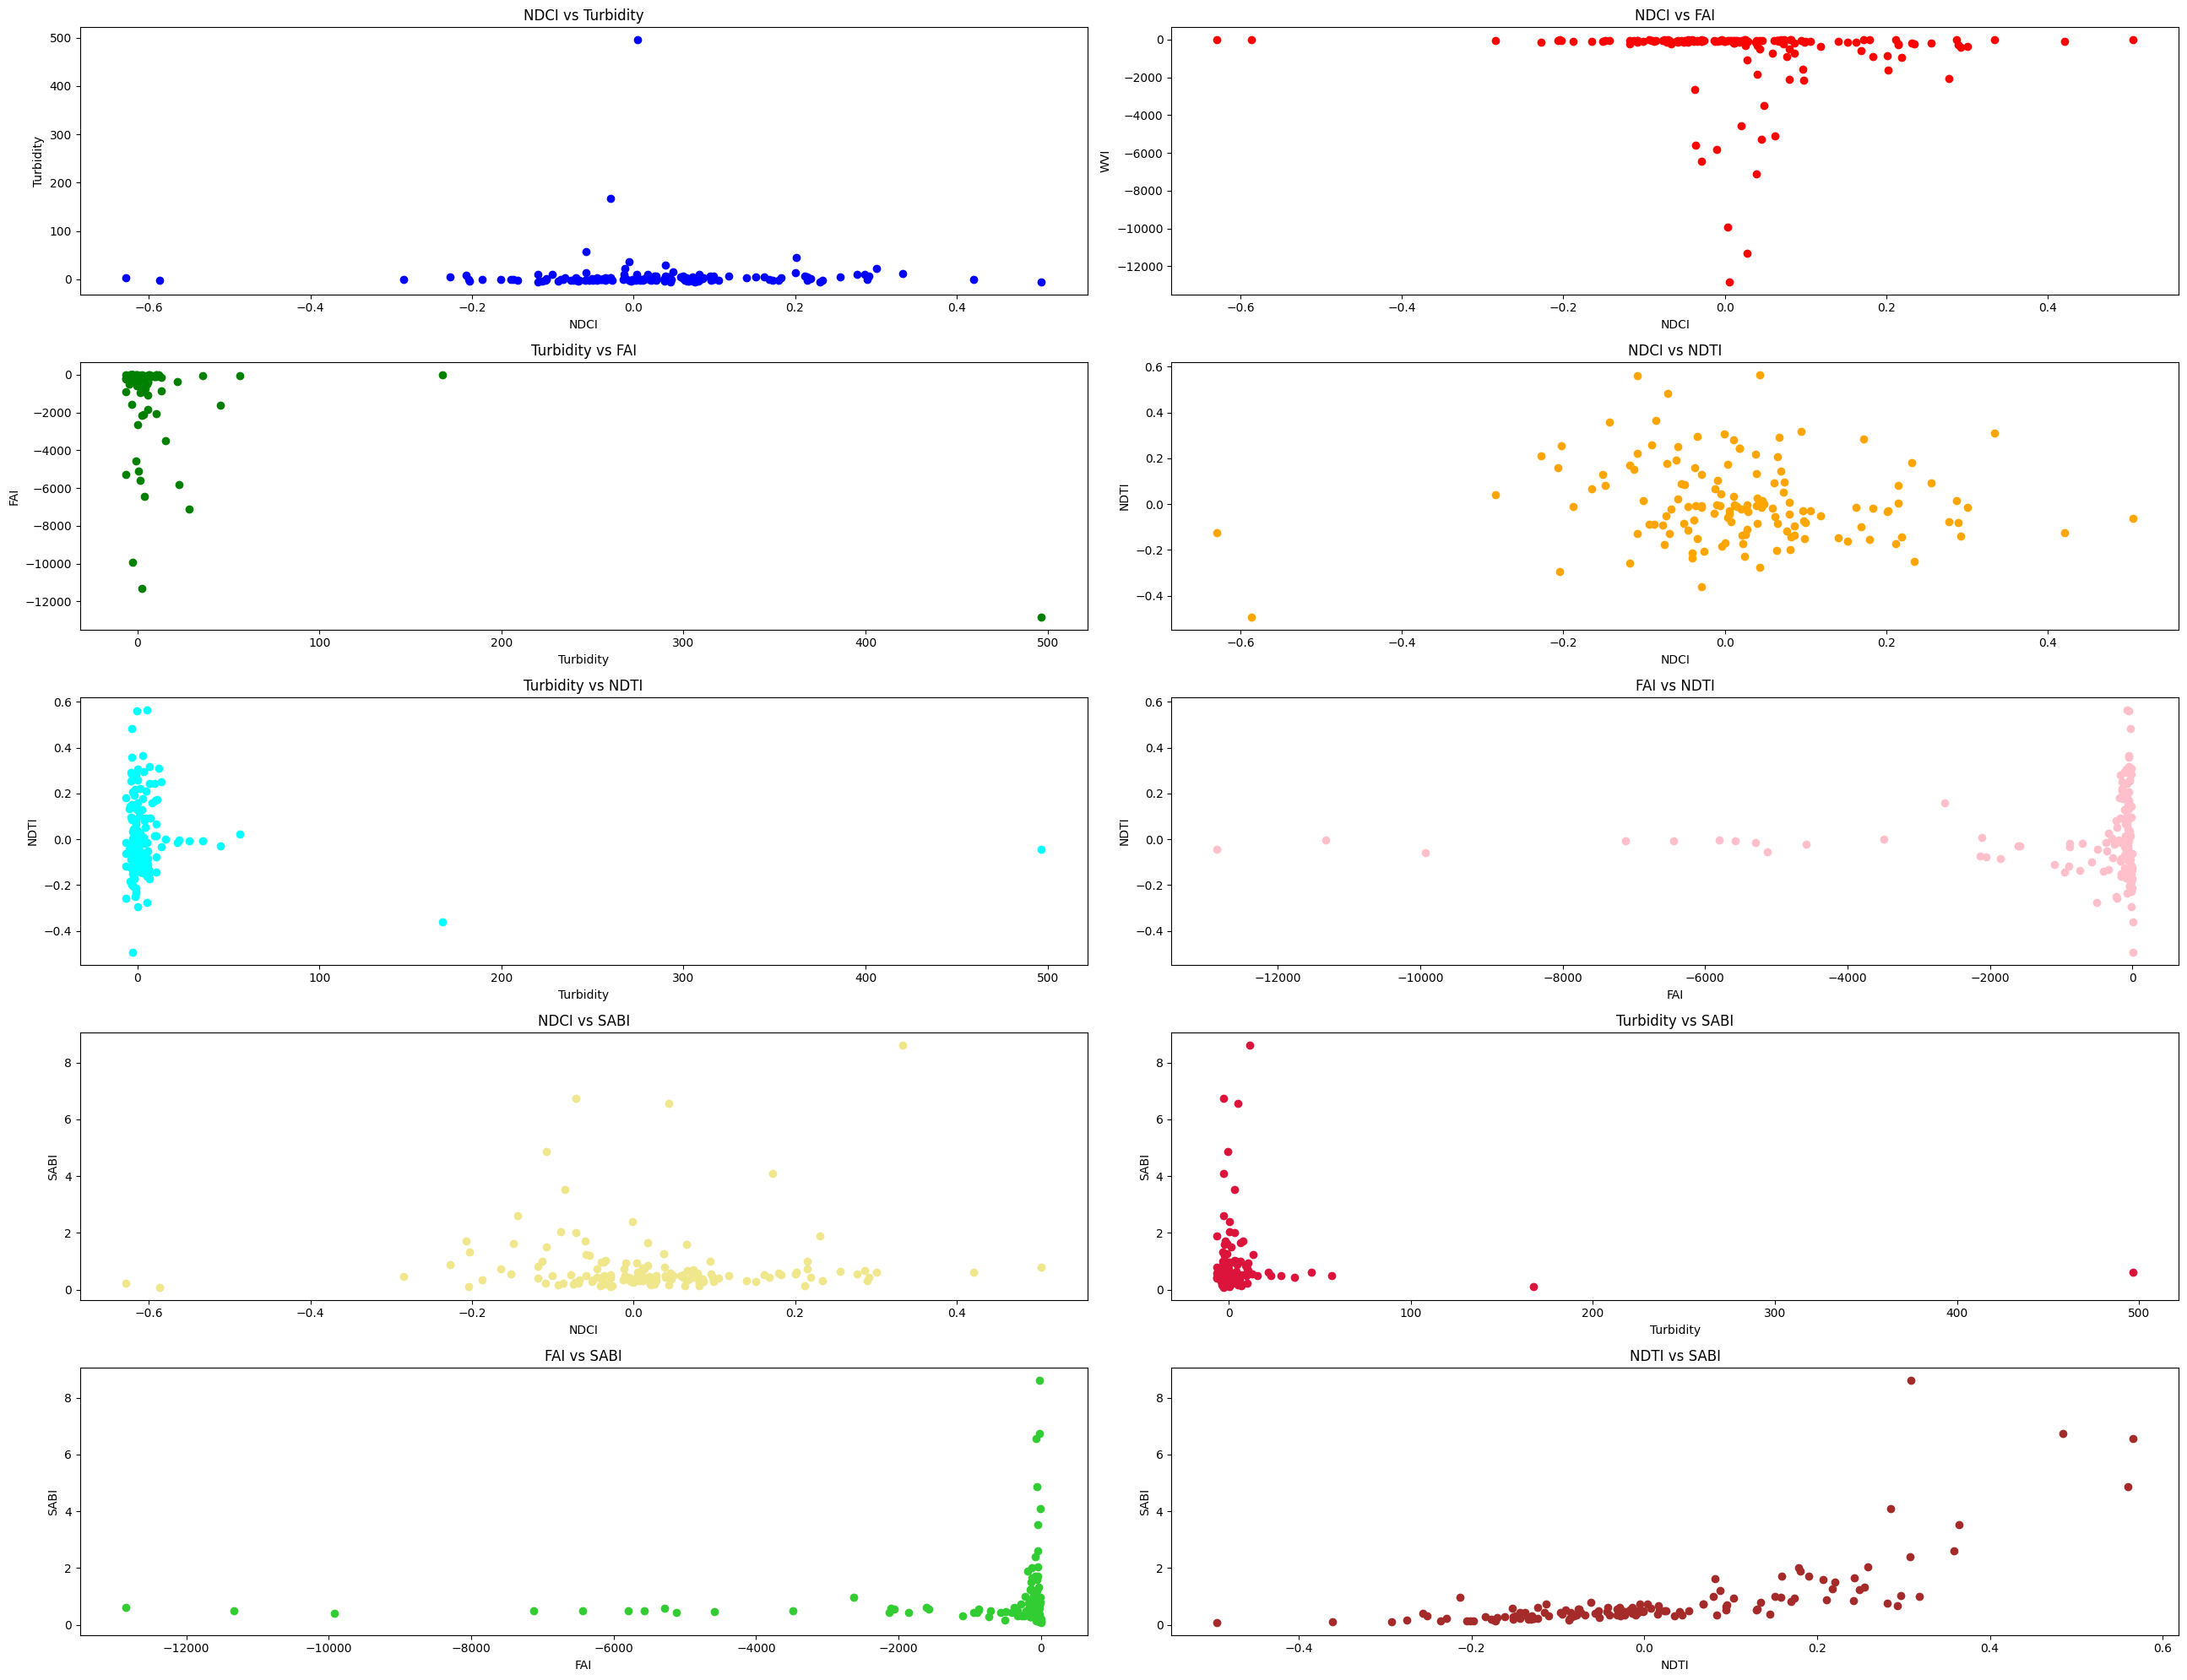

In [44]:
# Scatter Plot Analysis
fig, axs = plt.subplots(5, 2, figsize=(26, 20))

axs[0, 0].scatter(daily_cs_df['NDCI'], daily_cs_df['Turbidity'], c='blue')
axs[0, 0].set_xlabel('NDCI')
axs[0, 0].set_ylabel('Turbidity')
axs[0, 0].set_title('NDCI vs Turbidity')

axs[0, 1].scatter(daily_cs_df['NDCI'], daily_cs_df['FAI'], c='red')
axs[0, 1].set_xlabel('NDCI')
axs[0, 1].set_ylabel('WVI')
axs[0, 1].set_title('NDCI vs FAI')

axs[1, 0].scatter(daily_cs_df['Turbidity'], daily_cs_df['FAI'], c='green')
axs[1, 0].set_xlabel('Turbidity')
axs[1, 0].set_ylabel('FAI')
axs[1, 0].set_title('Turbidity vs FAI')

#Adding all NDTI here:

axs[1, 1].scatter(daily_cs_df['NDCI'], daily_cs_df['NDTI'], c='orange')
axs[1, 1].set_xlabel('NDCI')
axs[1, 1].set_ylabel('NDTI')
axs[1, 1].set_title('NDCI vs NDTI')

axs[2, 0].scatter(daily_cs_df['Turbidity'], daily_cs_df['NDTI'], c='cyan')
axs[2, 0].set_xlabel('Turbidity')
axs[2, 0].set_ylabel('NDTI')
axs[2, 0].set_title('Turbidity vs NDTI')

axs[2, 1].scatter(daily_cs_df['FAI'], daily_cs_df['NDTI'], c='pink')
axs[2, 1].set_xlabel('FAI')
axs[2, 1].set_ylabel('NDTI')
axs[2, 1].set_title('FAI vs NDTI')

#SABI Additions
axs[3, 0].scatter(daily_cs_df['NDCI'], daily_cs_df['SABI'], c='khaki')
axs[3, 0].set_xlabel('NDCI')
axs[3, 0].set_ylabel('SABI')
axs[3, 0].set_title('NDCI vs SABI')

axs[3, 1].scatter(daily_cs_df['Turbidity'], daily_cs_df['SABI'], c='crimson')
axs[3, 1].set_xlabel('Turbidity')
axs[3, 1].set_ylabel('SABI')
axs[3, 1].set_title('Turbidity vs SABI')

axs[4, 0].scatter(daily_cs_df['FAI'], daily_cs_df['SABI'], c='limegreen')
axs[4, 0].set_xlabel('FAI')
axs[4, 0].set_ylabel('SABI')
axs[4, 0].set_title('FAI vs SABI')

axs[4, 1].scatter(daily_cs_df['NDTI'], daily_cs_df['SABI'], c='brown')
axs[4, 1].set_xlabel('NDTI')
axs[4, 1].set_ylabel('SABI')
axs[4, 1].set_title('NDTI vs SABI')


plt.tight_layout()
plt.savefig('HABProject/Scatter_plot_cs.png')  # Save the figure
plt.show()

# S308C to S80 Shapefile

## 1. Ensuring the shapefile can be read

In [4]:
import geopandas as gpd

shapefile_path = 'D:/Classes/STPythonFinalProject/S308C_to_S80.shp'
gdf = gpd.read_file(shapefile_path)
print(gdf.head())

     Shape_Leng    Shape_Area  \
0  87764.372679  1.328248e+07   

                                            geometry  
0  POLYGON Z ((-8974710.093 3121536.52 0, -897473...  


#### Another testing of the shapefile, converting it so it may be used in Geemap

In [5]:
import geopandas as gpd
import shapely.geometry
import geemap

# Load your shapefile with Geopandas
shapefile_path = 'D:/Classes/STPythonFinalProject/S308C_to_S80.shp'
gdf = gpd.read_file(shapefile_path)

# Define a function to drop the Z coordinate from a geometry
def drop_z(geom):
    if geom.is_empty:
        return geom
    if geom.geom_type == 'Polygon':
        return shapely.geometry.Polygon([(x, y) for x, y, *z in geom.exterior.coords])
    elif geom.geom_type == 'MultiPolygon':
        return shapely.geometry.MultiPolygon([drop_z(poly) for poly in geom])
    else:
        return geom

# Apply the function to each geometry in your GeoDataFrame
gdf['geometry'] = gdf['geometry'].apply(drop_z)

# Now convert the GeoDataFrame to an Earth Engine FeatureCollection
aoi_fc = geemap.geopandas_to_ee(gdf)
S308C_to_S80_aoi = aoi_fc.geometry()

# Verify by printing the AOI geometry
print(S308C_to_S80_aoi.getInfo())



{'type': 'Polygon', 'coordinates': [[[-80.62119246903968, 26.984509264666624], [-80.62096340043887, 26.983817004372852], [-80.61809031327577, 26.98218221871571], [-80.61759923485266, 26.98211179673237], [-80.61642980711748, 26.98175753031503], [-80.61721363930515, 26.984418500637002], [-80.59914298442106, 26.987419530574254], [-80.54608097292687, 27.013547064750504], [-80.52423190873633, 27.017205898025317], [-80.49770090254007, 27.00944902884364], [-80.47346979816851, 27.006668134527747], [-80.46796646271814, 27.006668134527747], [-80.44504958731906, 27.015156966260133], [-80.43741062855327, 27.019401141286608], [-80.40217285328096, 27.031913207925854], [-80.31904784314966, 27.06132204828594], [-80.28725991926694, 27.10783371817975], [-80.28419995198205, 27.111149638019644], [-80.28453195314138, 27.11134494710747], [-80.28482326690656, 27.111534281173327], [-80.2850752766831, 27.111727730501283], [-80.28515851008575, 27.111686571472102], [-80.28544751158738, 27.11192529586959], [-80.2

## 2. Creation of Map and CSVs

#### Mosaic introduced, combining all images with the cloud mask from the time frame, clips it to the area of interest, and computes NDWI. 

#### Uses NDWI for the water mask, and returns the Water Masked Mosaic and the NDWI

In [112]:
import pandas as pd
import ee
import geemap

# Initialize Earth Engine (if not already initialized)
ee.Initialize()

# Assume AOI is defined (replace with your actual AOI)
# Example AOI:


# Define cloud masking function using the QA60 band
def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Define processing function:
#  - Applies cloud mask.
#  - Computes an NDWI for water detection and applies a water mask.
#  - Computes NDCI, FAI, and Turbidity indices.
#  - Clips the image to the AOI.
def process_image(image):
    # Apply cloud mask
    image = maskS2clouds(image)
    
    # Compute NDWI (using green (B3) and NIR (B8)) to isolate water pixels.
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    water_mask = ndwi.gt(0.5)  # Adjust threshold as needed
    image = image.updateMask(water_mask)
    
    # Calculate NDCI (Normalized Difference Chlorophyll Index) using B5 (red edge) and B4 (red)
    ndci = image.normalizedDifference(['B5', 'B4']).rename('NDCI')
    
    # Calculate FAI (Floating Algae Index).
    # For Sentinel-2, one common approach is:
    #   FAI = B8 - (B5 + (B11 - B5) * (137/905))
    
    #fai = image.select('B8') \
     #   .subtract(image.select('B5') \
      #            .add(image.select('B11') \
       #                .subtract(image.select('B5')) \
        #               .multiply(137/905))) \
        #.rename('FAI')

    #Naming each band as a variable
    #FAI = (Rnir - Rred) = (((Rswir - Rred)*(wavelength_nir - wavelength_red)) / (wavelength_swir - wavelength_red)))
    #Equation based on Muzfoffar et al. 2023. DOI: https://doi.org/10.3390/rs15082039
    B8 = image.select('B8') # NIR Band
    B4 = image.select('B4') # Red band
    B11 = image.select('B11') # SWIR band

    #Making a variable for each part of the equation
    diff_NIR_Red = B8.subtract(B4)
    diff_SWIR_Red = B11.subtract(B4)
    diff_WL_NIR_Red = 842 - 665
    diff_WL_SWIR_Red = 1610 - 665

    #Dealing with the fraction order of operations
    top_fraction = diff_SWIR_Red.multiply(diff_WL_NIR_Red)
    whole_fraction = top_fraction.divide(diff_WL_SWIR_Red)

    #Last bit of equation
    fai = diff_NIR_Red.add(whole_fraction).rename('FAI')

    
    
    
    # Calculate Turbidity as an additional index (optional)
    # This is an example formula; adjust as appropriate for your study.
    turbidity = image.select('B3') \
        .divide(image.select('B1')) \
        .multiply(8.93) \
        .subtract(6.39) \
        .rename('Turbidity')

    #NDTI calculation
    ndti = image.normalizedDifference(['B4', 'B3']).rename('NDTI')

     #SABI (Surface algal bloom index) calculation
    #SABI = (Red - NIR) / (Blue + Green) OR SABI = (B4 - B8) / (B2 + B3)
    B2 = image.select('B2') #Blue band
    B3 = image.select('B3') #Green band

    sabi_top = B4.subtract(B8)
    sabi_bottom = B2.add(B3)
    sabi = sabi_top.divide(sabi_bottom).rename('SABI')
    
    # Add the new bands and clip the image to the S308C_to_S80_aoi
    return image.addBands([ndci, fai, turbidity, ndti, sabi]).clip(S308C_to_S80_aoi)

# Define time frame for your analysis
start_date = '2023-07-01'
end_date   = '2023-12-31'

# Load Sentinel-2 image collection, filter by S308C_to_S80_aoi and date, and sort by cloud percentage
sentinel2 = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
             .filterBounds(S308C_to_S80_aoi)
             .filterDate(start_date, end_date)
             .sort('CLOUDY_PIXEL_PERCENTAGE'))

# Process the image collection: apply cloud and water masks, calculate indices, and clip each image to aoi_cs
processed_images = sentinel2.map(process_image)

# --- Time Series Calculation ---
# Function to calculate mean index values over the S308C_to_S80_aoi for each image
def calculate_time_series(image_collection, index_name):
    def reduce_region(image):
        stats = image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=S308C_to_S80_aoi,
            scale=10,         # 10 m resolution
            maxPixels=1e9
        )
        return ee.Feature(None, stats).set('date', image.date().format('YYYY-MM-dd'))
    time_series = image_collection.map(reduce_region)
    time_series_list = time_series.reduceColumns(
        ee.Reducer.toList(2),
        ['date', index_name]
    ).get('list').getInfo()
    return time_series_list

# Calculate time series for each index
ndci_S308C_time_series      = calculate_time_series(processed_images, 'NDCI')
fai_S308C_time_series       = calculate_time_series(processed_images, 'FAI')
turbidity_S308C_time_series = calculate_time_series(processed_images, 'Turbidity')
ndti_S308C_time_series      = calculate_time_series(processed_images, 'NDTI')
sabi_S308C_time_series      = calculate_time_series(processed_images, 'SABI')

# Convert the time series lists to pandas DataFrames
def time_series_to_df(time_series, index_name):
    df = pd.DataFrame(time_series, columns=['date', index_name])
    df['date'] = pd.to_datetime(df['date'])
    return df

ndci_S308C_df      = time_series_to_df(ndci_S308C_time_series, 'NDCI')
fai_S308C_df       = time_series_to_df(fai_S308C_time_series, 'FAI')
turbidity_S308C_df = time_series_to_df(turbidity_S308C_time_series, 'Turbidity')
ndti_S308C_df      = time_series_to_df(ndti_S308C_time_series, 'NDTI')
sabi_S308C_df      = time_series_to_df(sabi_S308C_time_series, 'SABI')

# Merge the DataFrames for further analysis
merged_S308C_df = ndci_S308C_df.merge(fai_S308C_df, on='date').merge(turbidity_S308C_df, on='date').merge(ndti_S308C_df, on='date').merge(sabi_S308C_df, on='date')

# Save the time series data to CSV files
ndci_S308C_df.to_csv('HABProject/NDCI_TimeSeries_S308C_07012024_12312024.csv', index=False)
fai_S308C_df.to_csv('HABProject/FAI_TimeSeries_S308C_07012024_12312024.csv', index=False)
turbidity_S308C_df.to_csv('HABProject/Turbidity_TimeSeries_07012024_12312024.csv', index=False)
ndti_S308C_df.to_csv('HABProject/NDTI_TimeSeries_S308C_07012024_12312024.csv', index=False)
sabi_S308C_df.to_csv('HABProject/SABI_TimeSeries_S308C_07012024_12312024.csv', index=False)
merged_S308C_df.to_csv('HABProject/Merged_TimeSeries_07012024_12312024.csv', index=False)

# --- Map Visualization ---
Map = geemap.Map(center=[27.75, -80.25], zoom=10)

# Display the FAI band (suitable for highlighting floating algae)
Map.addLayer(processed_images.first(), 
             {'bands': ['FAI'], 'min': -0.5, 'max': 0.5, 'palette': ['blue', 'white', 'green']}, 
             'FAI')

# Display the NDCI band (using a palette to highlight chlorophyll levels)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDCI'], 'min': -0.5, 'max': 0.5, 'palette': ['yellow', 'orange', 'red']}, 
             'NDCI')

# Display the Turbidity band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['Turbidity'], 'min': -2, 'max': 20, 'palette': ['white', 'blue', 'darkblue']}, 
             'Turbidity')

# Display the NDTI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDTI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'NDTI')

# Display the SABI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['SABI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'SABI')

# Add the S308C_to_S80_aoi boundary for reference
Map.addLayer(S308C_to_S80_aoi, {}, 'S308C_to_S80_aoi', True)

Map

Map(center=[27.75, -80.25], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

## 3. Plotting Time Series of the Indices

### Messy Time Series

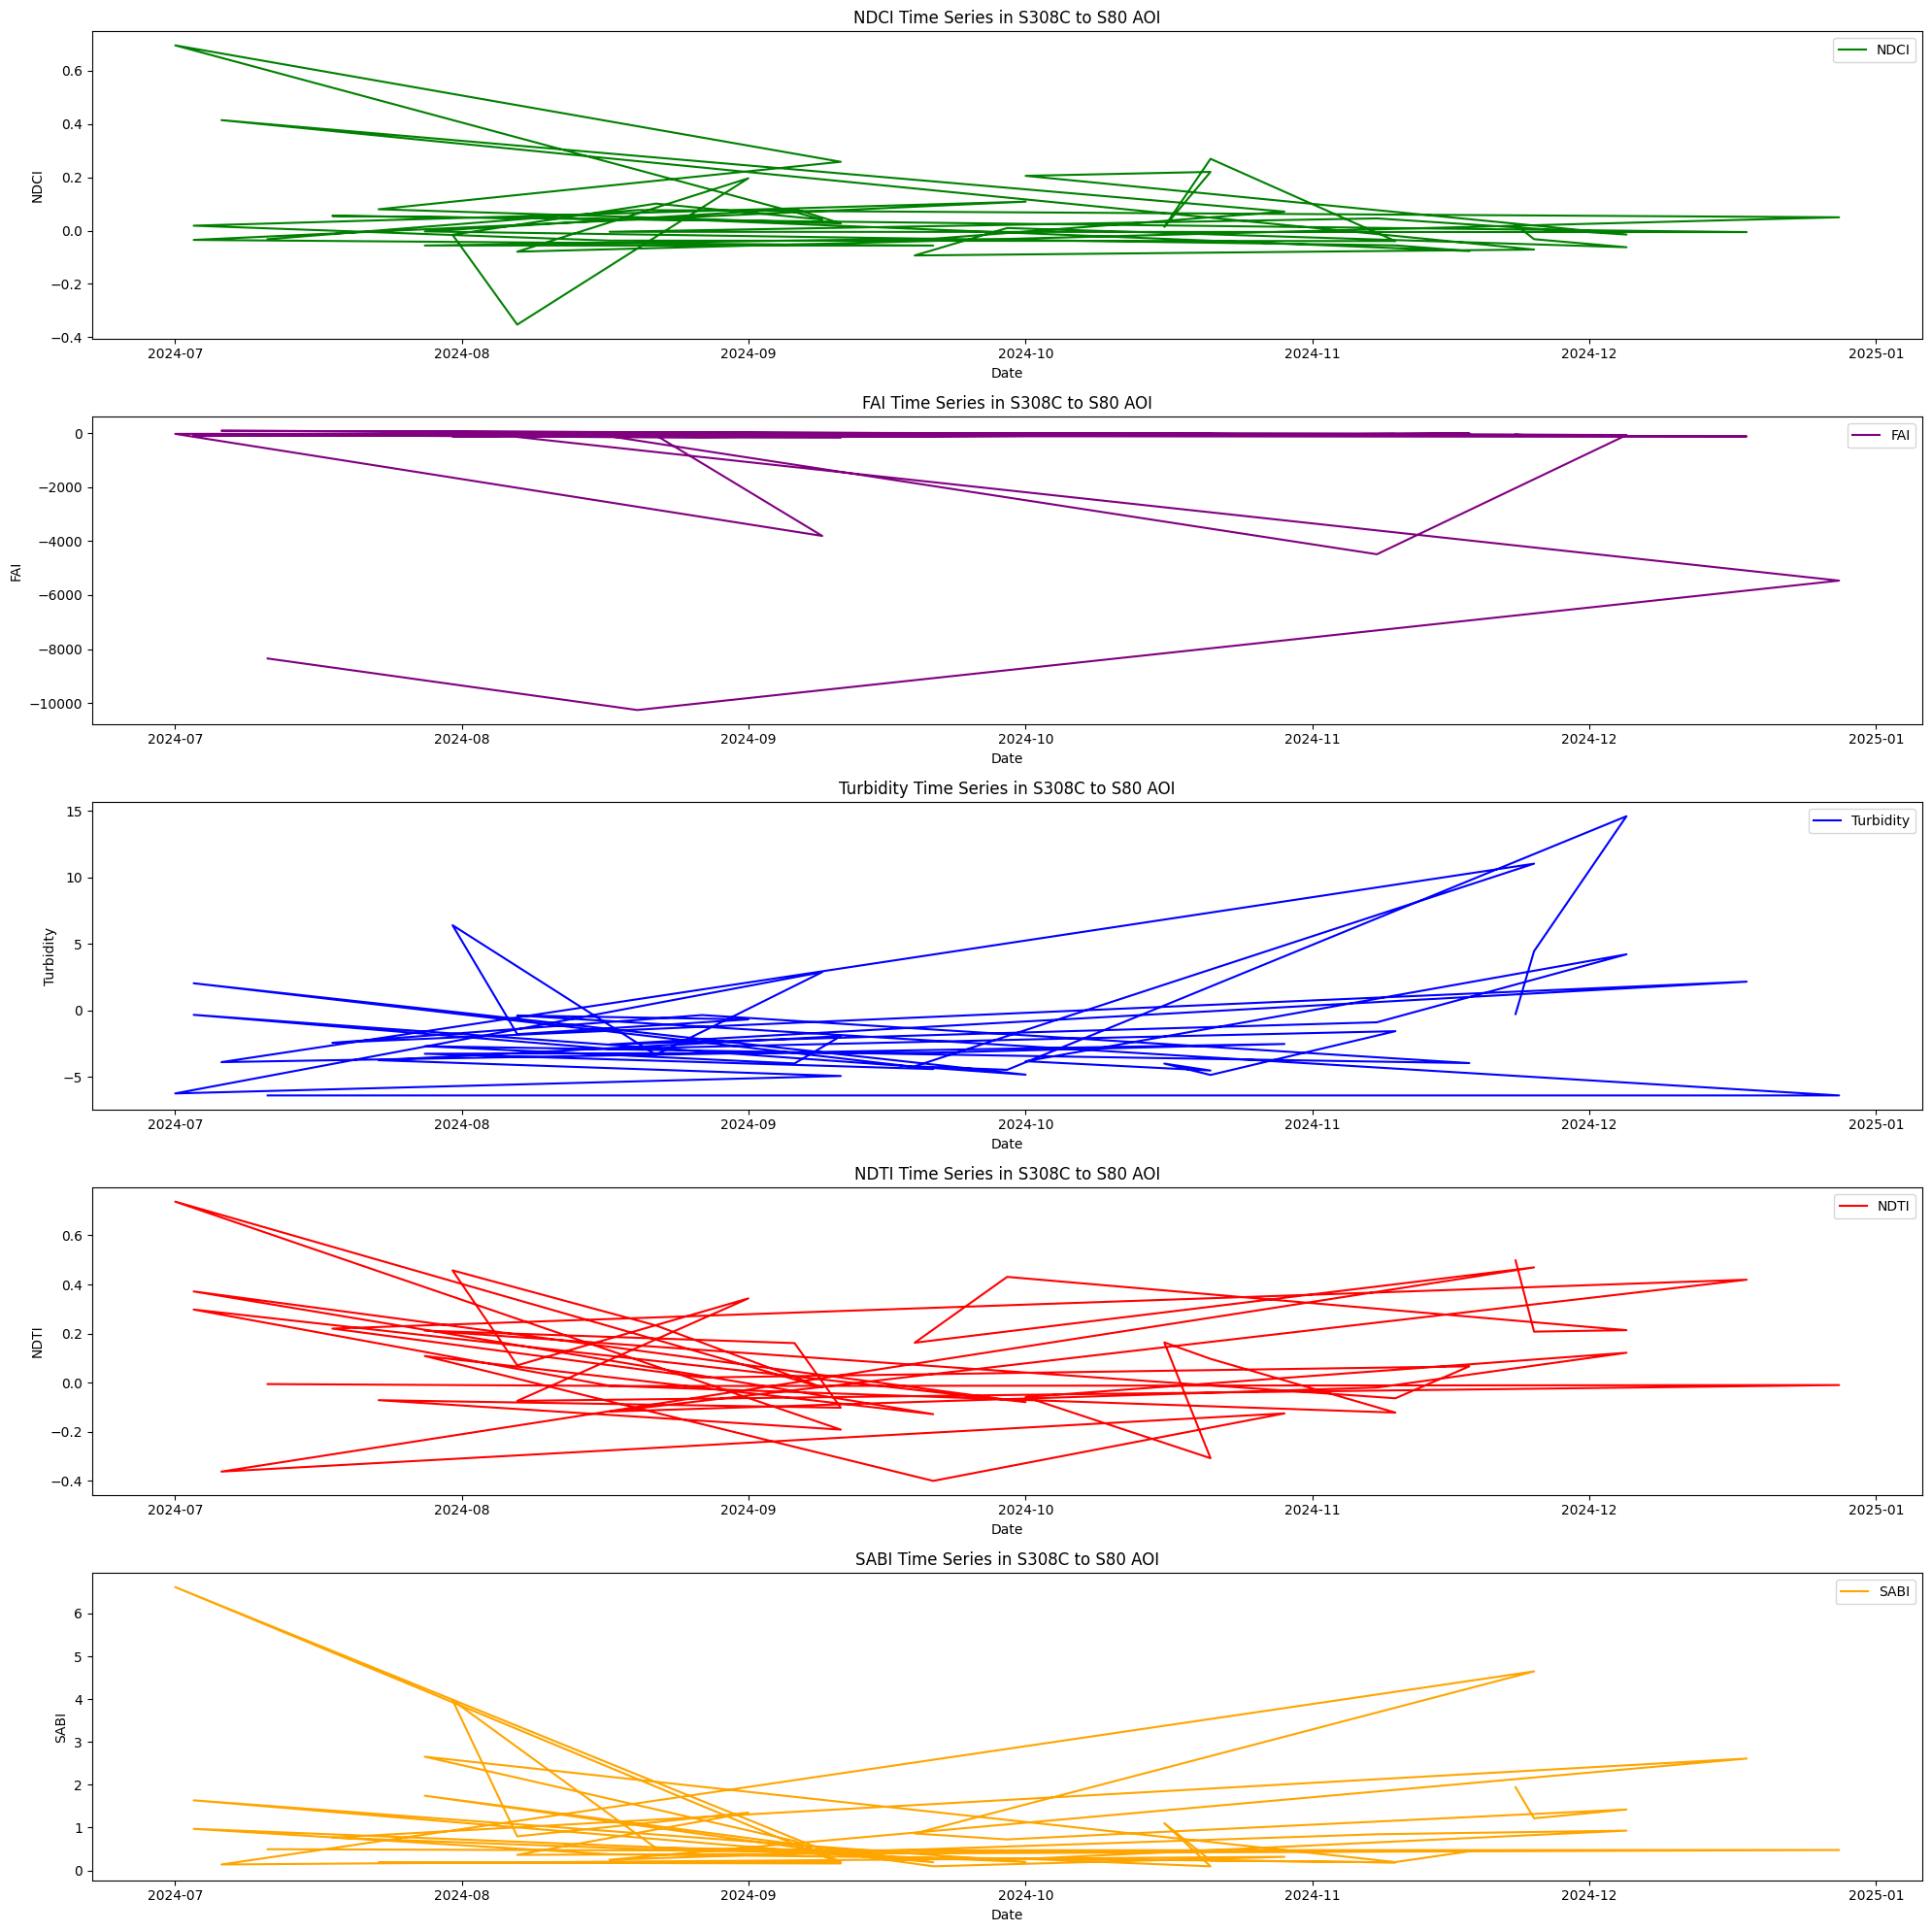

In [113]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 1, figsize=(20, 20))

# Plot NDCI time series
axs[0].plot(ndci_S308C_df['date'], ndci_S308C_df['NDCI'], label='NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('NDCI Time Series in S308C to S80 AOI')
axs[0].legend()

# Plot FAI time series (replacing WVI)
axs[1].plot(fai_S308C_df['date'], fai_S308C_df['FAI'], label='FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('FAI Time Series in S308C to S80 AOI')
axs[1].legend()

# Plot Turbidity time series
axs[2].plot(turbidity_S308C_df['date'], turbidity_S308C_df['Turbidity'], label='Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Turbidity Time Series in S308C to S80 AOI')
axs[2].legend()

# Plot NDCI time series
axs[3].plot(ndti_S308C_df['date'], ndti_S308C_df['NDTI'], label='NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('NDTI Time Series in S308C to S80 AOI')
axs[3].legend()

# Plot SABI time series
axs[4].plot(sabi_S308C_df['date'], sabi_S308C_df['SABI'], label='SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('SABI Time Series in S308C to S80 AOI')
axs[4].legend()

plt.tight_layout()
plt.show()


### Daily Time Series

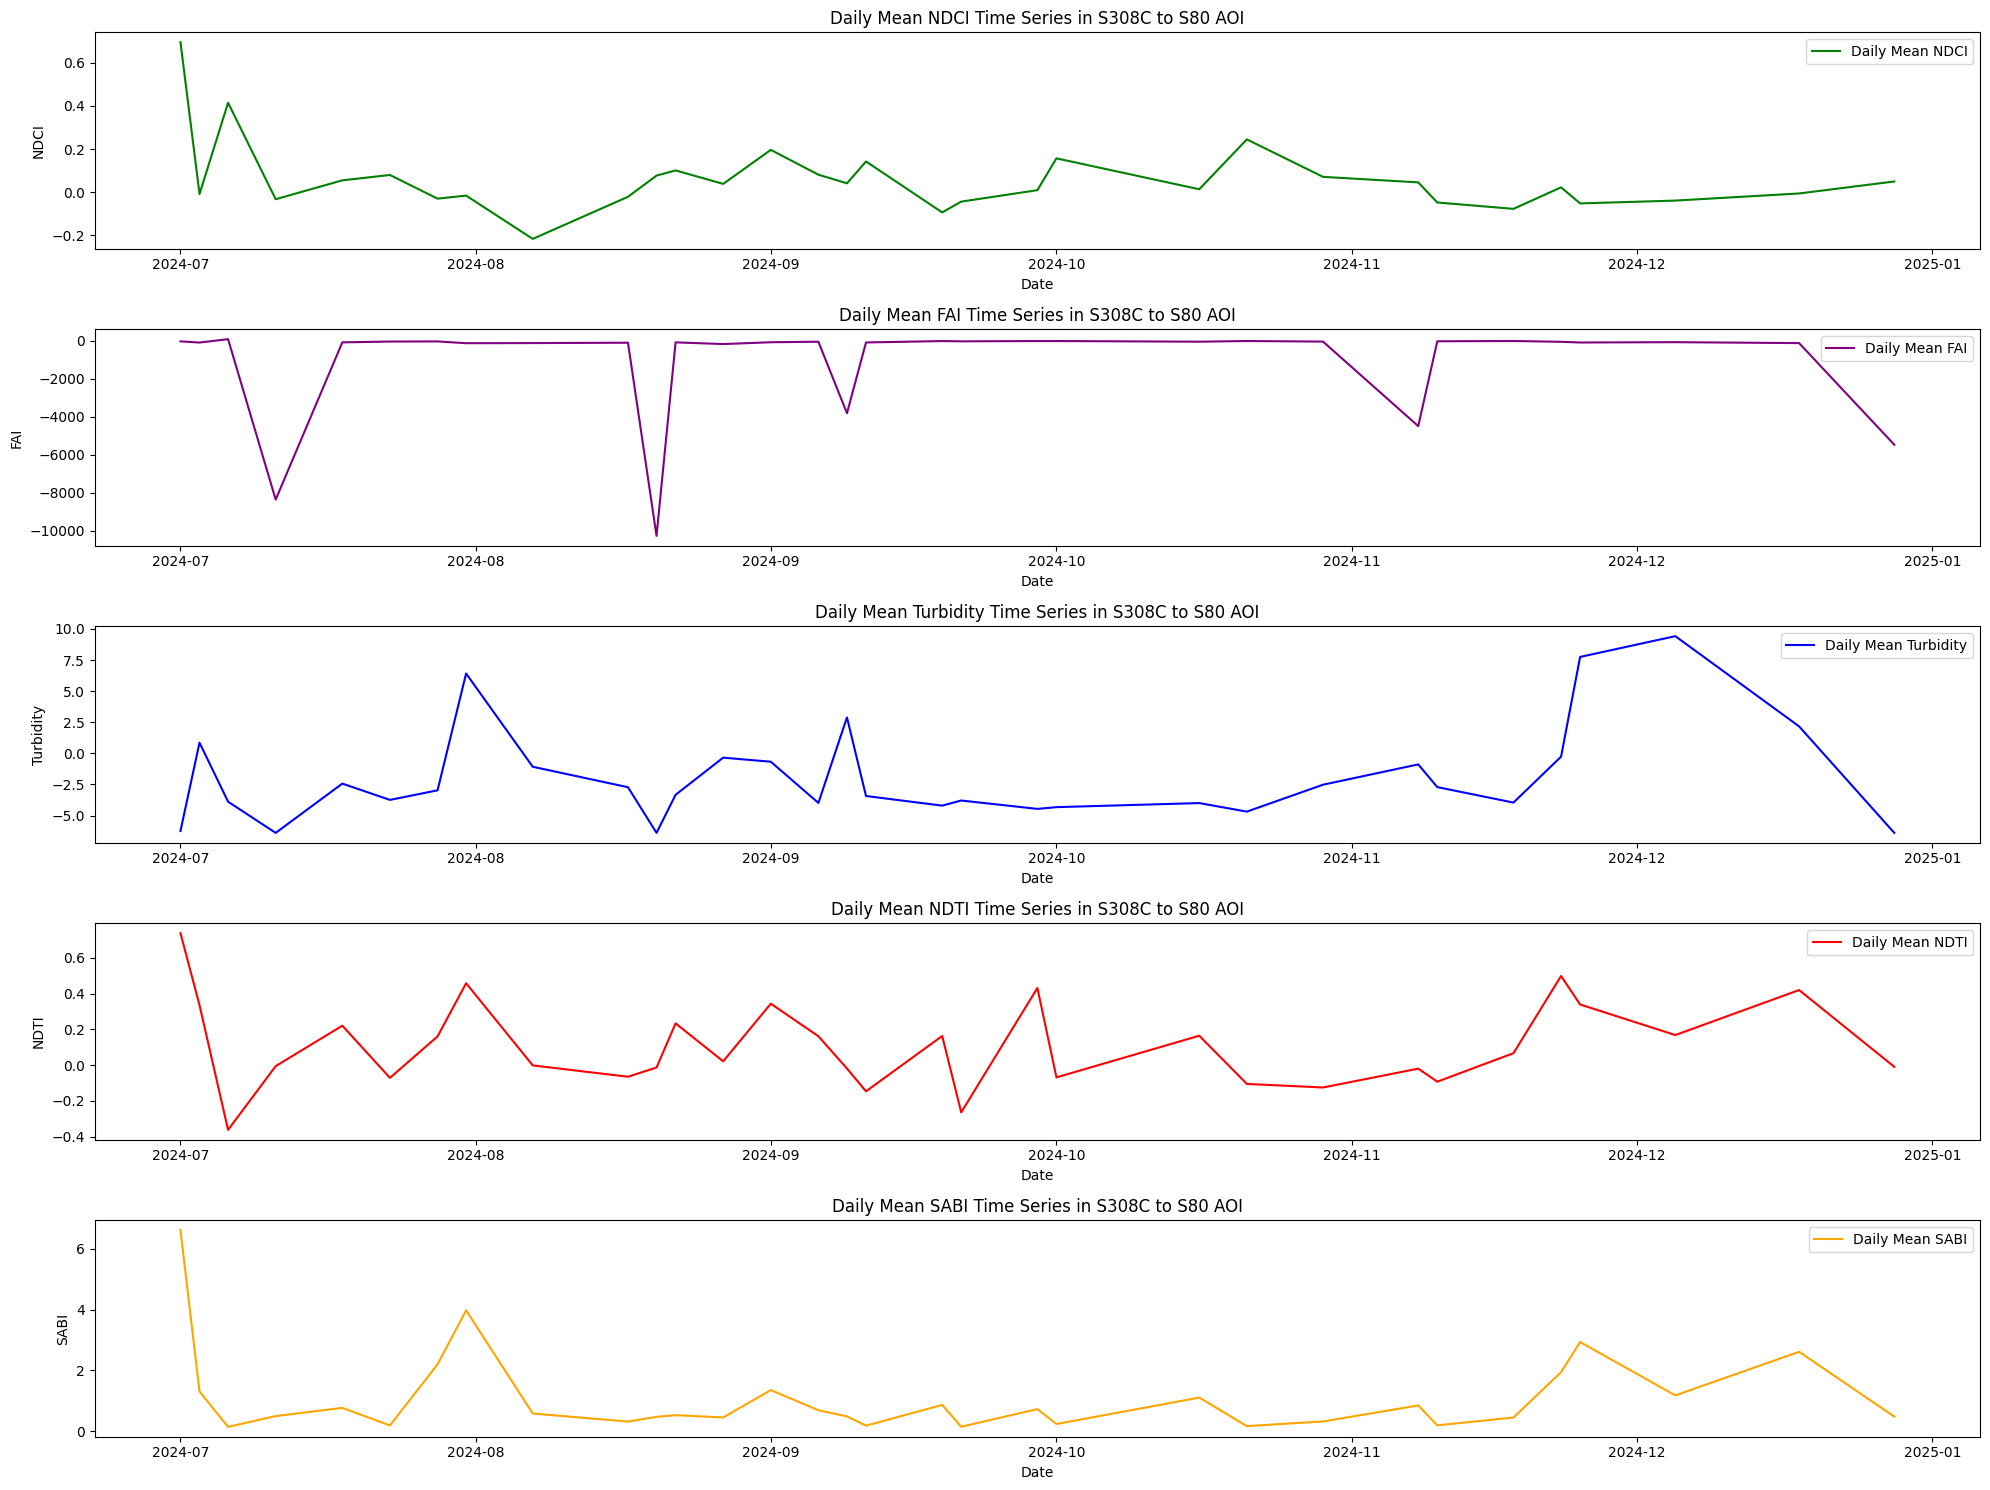

In [114]:
import matplotlib.pyplot as plt

# Compute the daily mean for each index without modifying the original data frames
ndci_daily_S308C = ndci_S308C_df.groupby('date', as_index=False)['NDCI'].mean()
fai_daily_S308C = fai_S308C_df.groupby('date', as_index=False)['FAI'].mean()
turbidity_daily_S308C = turbidity_S308C_df.groupby('date', as_index=False)['Turbidity'].mean()
ndti_daily_S308C = ndti_S308C_df.groupby('date', as_index=False)['NDTI'].mean()
sabi_daily_S308C = sabi_S308C_df.groupby('date', as_index=False)['SABI'].mean()

fig, axs = plt.subplots(5, 1, figsize=(20, 15))

# Plot daily mean NDCI time series
axs[0].plot(ndci_daily_S308C['date'], ndci_daily_S308C['NDCI'], label='Daily Mean NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('Daily Mean NDCI Time Series in S308C to S80 AOI')
axs[0].legend()

# Plot daily mean FAI time series
axs[1].plot(fai_daily_S308C['date'], fai_daily_S308C['FAI'], label='Daily Mean FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('Daily Mean FAI Time Series in S308C to S80 AOI')
axs[1].legend()

# Plot daily mean Turbidity time series
axs[2].plot(turbidity_daily_S308C['date'], turbidity_daily_S308C['Turbidity'], label='Daily Mean Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Daily Mean Turbidity Time Series in S308C to S80 AOI')
axs[2].legend()

# Plot daily mean Turbidity time series
axs[3].plot(ndti_daily_S308C['date'], ndti_daily_S308C['NDTI'], label='Daily Mean NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('Daily Mean NDTI Time Series in S308C to S80 AOI')
axs[3].legend()

# Plot daily mean SABI time series
axs[4].plot(sabi_daily_S308C['date'], sabi_daily_S308C['SABI'], label='Daily Mean SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('Daily Mean SABI Time Series in S308C to S80 AOI')
axs[4].legend()

plt.tight_layout()
plt.show()

# Merge the daily aggregated data into one DataFrame
daily_aggregated_S308C = ndci_daily_S308C.merge(fai_daily_S308C, on='date').merge(turbidity_daily_S308C, on='date').merge(ndti_daily_S308C, on='date').merge(sabi_daily_S308C, on='date')

# Save the merged daily aggregated data to a CSV file
daily_aggregated_S308C.to_csv('HABProject/Daily_Aggregated_Data_S308C_07012024_12312024.csv', index=False)

### Correlation Matrix

Combined CSV saved to HABProject/S308C_Shapefile/Combined_Aggregated_Data.csv


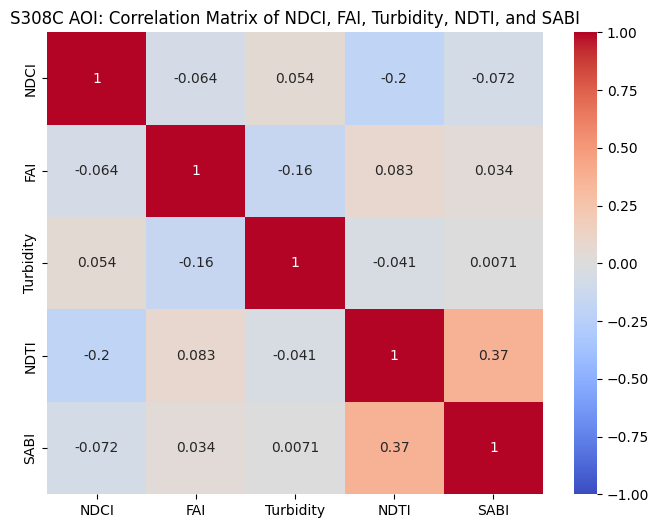

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000 -0.064308   0.053964 -0.201928 -0.072361
FAI       -0.064308  1.000000  -0.157966  0.082976  0.034388
Turbidity  0.053964 -0.157966   1.000000 -0.041311  0.007050
NDTI      -0.201928  0.082976  -0.041311  1.000000  0.368766
SABI      -0.072361  0.034388   0.007050  0.368766  1.000000


In [262]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- MERGE CSV FILES ---

# Directory where CSV files are located
csv_dir = 'HABProject/S308C_Shapefile/'

# Use glob to find only CSV files that contain the word 'merged'
csv_files = glob.glob(os.path.join(csv_dir, "*merged*.csv"))

# List to store DataFrames from each CSV file
dfs = []

# Loop through each CSV file, read it, and set 'date' as index
for file in csv_files:
    try:
        # Read CSV and parse 'date' as datetime
        df = pd.read_csv(file, parse_dates=["date"])
        # Set 'date' as index
        df.set_index("date", inplace=True)
        dfs.append(df)
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Concatenate all DataFrames if any were successfully loaded
if dfs:
    combined_df = pd.concat(dfs)
    # Sort by date index
    combined_df.sort_index(inplace=True)
    # Save the combined DataFrame to a new CSV file
    combined_csv_path = os.path.join(csv_dir, "Combined_Aggregated_Data.csv")
    combined_df.to_csv(combined_csv_path)
    print(f"Combined CSV saved to {combined_csv_path}")
else:
    print("No CSV files loaded. Please check your CSV files and the directory path.")

# --- CORRELATION ANALYSIS AND HEATMAP PLOTTING ---

# Import the combined CSV as a DataFrame; ensure 'date' is read as the index
daily_S308C_df = pd.read_csv(
    combined_csv_path, index_col='date', parse_dates=['date']
)

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_S308C_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('S308C AOI: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')

# Save the figure
plt.savefig('HABProject/S308C_Shapefile/Heat_Map_S308C_AOI_Master.png')
plt.show()

# Print the correlation matrix to the console
print("Correlation Matrix:\n", corr_matrix)

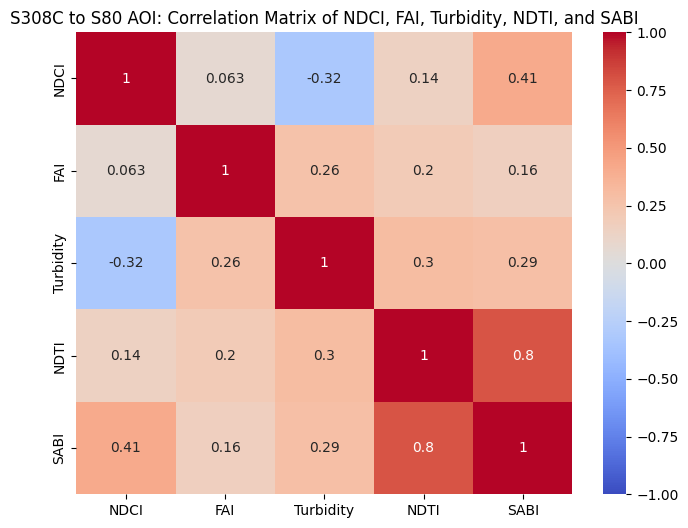

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000  0.063035  -0.320446  0.141824  0.406423
FAI        0.063035  1.000000   0.264067  0.199165  0.163158
Turbidity -0.320446  0.264067   1.000000  0.301621  0.286463
NDTI       0.141824  0.199165   0.301621  1.000000  0.795819
SABI       0.406423  0.163158   0.286463  0.795819  1.000000


<Figure size 640x480 with 0 Axes>

In [115]:
import seaborn as sns

#Import the daily cs csv as a df
daily_S308C_df = pd.read_csv('HABProject/Daily_Aggregated_Data_S308C_07012024_12312024.csv')

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_S308C_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plotting Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('S308C to S80 AOI: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')
plt.show()

# Print Correlation Matrix
plt.savefig('HABProject/Heat_Map_S308C_07012024_12312024.png')  # Save the figure
print("Correlation Matrix:\n", corr_matrix)

### Scatterplot

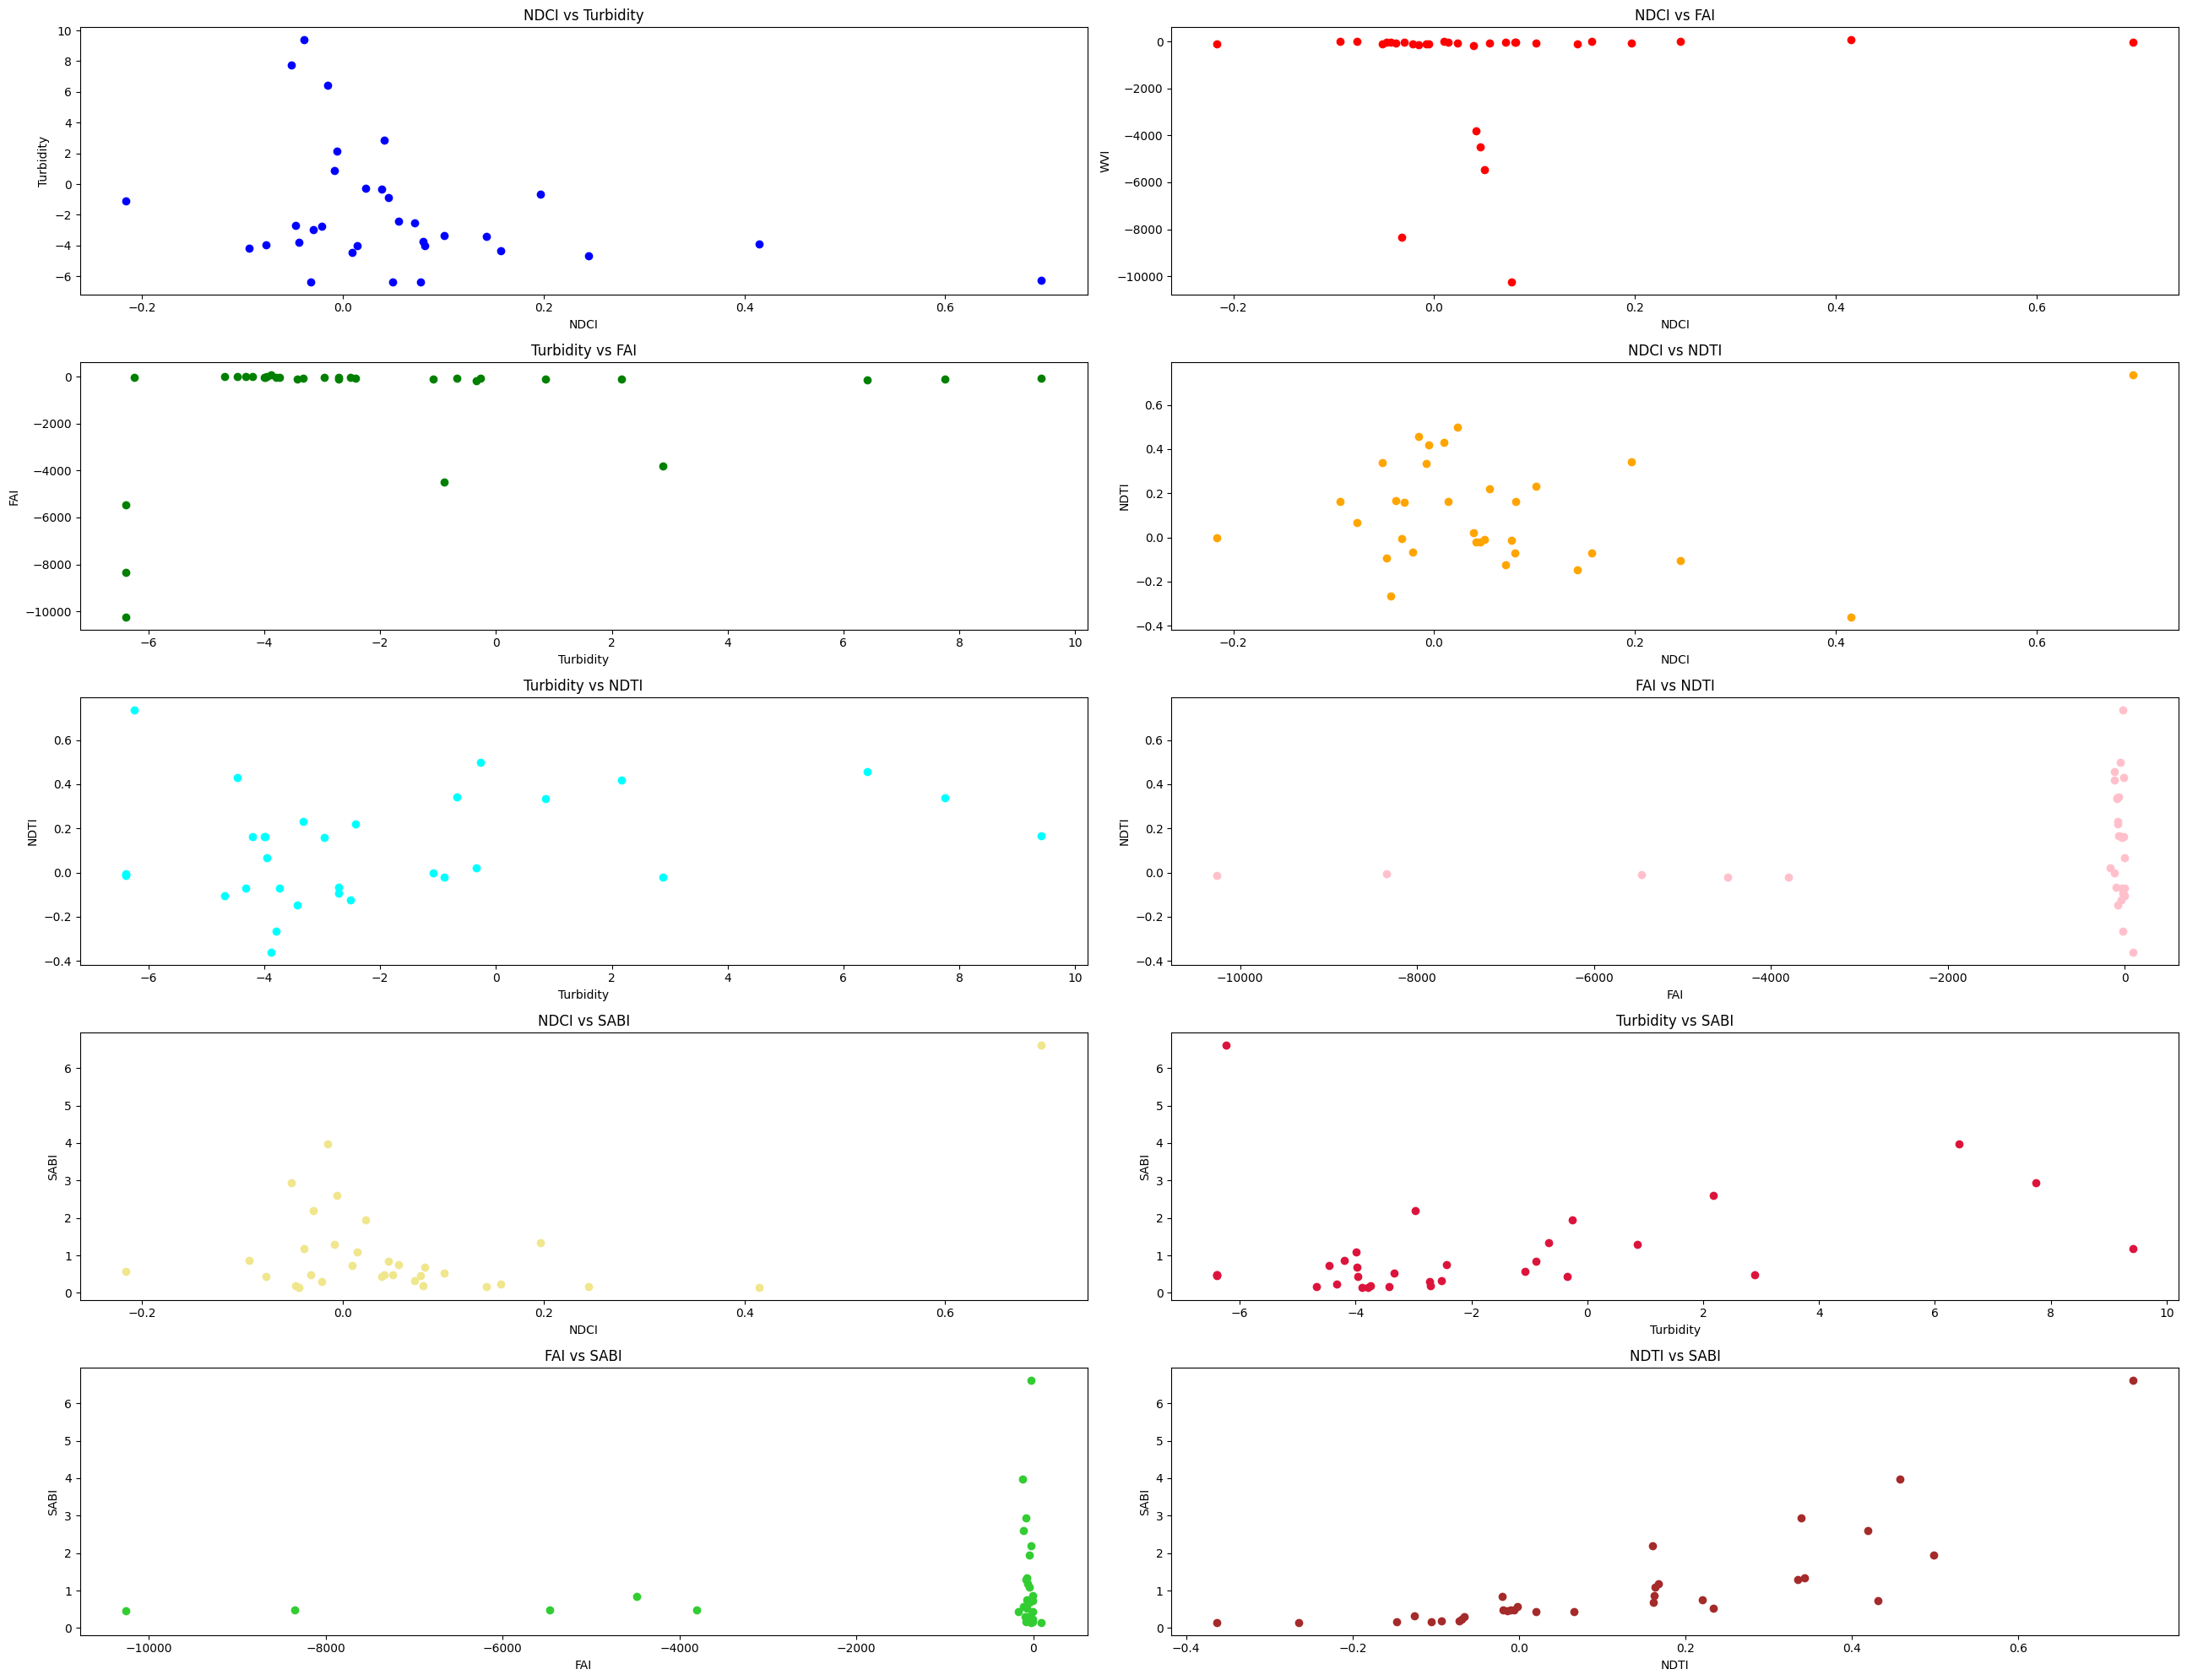

In [116]:
# Scatter Plot Analysis
fig, axs = plt.subplots(5, 2, figsize=(26, 20))

axs[0, 0].scatter(daily_S308C_df['NDCI'], daily_S308C_df['Turbidity'], c='blue')
axs[0, 0].set_xlabel('NDCI')
axs[0, 0].set_ylabel('Turbidity')
axs[0, 0].set_title('NDCI vs Turbidity')

axs[0, 1].scatter(daily_S308C_df['NDCI'], daily_S308C_df['FAI'], c='red')
axs[0, 1].set_xlabel('NDCI')
axs[0, 1].set_ylabel('WVI')
axs[0, 1].set_title('NDCI vs FAI')

axs[1, 0].scatter(daily_S308C_df['Turbidity'], daily_S308C_df['FAI'], c='green')
axs[1, 0].set_xlabel('Turbidity')
axs[1, 0].set_ylabel('FAI')
axs[1, 0].set_title('Turbidity vs FAI')

#Adding all NDTI here:

axs[1, 1].scatter(daily_S308C_df['NDCI'], daily_S308C_df['NDTI'], c='orange')
axs[1, 1].set_xlabel('NDCI')
axs[1, 1].set_ylabel('NDTI')
axs[1, 1].set_title('NDCI vs NDTI')

axs[2, 0].scatter(daily_S308C_df['Turbidity'], daily_S308C_df['NDTI'], c='cyan')
axs[2, 0].set_xlabel('Turbidity')
axs[2, 0].set_ylabel('NDTI')
axs[2, 0].set_title('Turbidity vs NDTI')

axs[2, 1].scatter(daily_S308C_df['FAI'], daily_S308C_df['NDTI'], c='pink')
axs[2, 1].set_xlabel('FAI')
axs[2, 1].set_ylabel('NDTI')
axs[2, 1].set_title('FAI vs NDTI')

#SABI Additions
axs[3, 0].scatter(daily_S308C_df['NDCI'], daily_S308C_df['SABI'], c='khaki')
axs[3, 0].set_xlabel('NDCI')
axs[3, 0].set_ylabel('SABI')
axs[3, 0].set_title('NDCI vs SABI')

axs[3, 1].scatter(daily_S308C_df['Turbidity'], daily_S308C_df['SABI'], c='crimson')
axs[3, 1].set_xlabel('Turbidity')
axs[3, 1].set_ylabel('SABI')
axs[3, 1].set_title('Turbidity vs SABI')

axs[4, 0].scatter(daily_S308C_df['FAI'], daily_S308C_df['SABI'], c='limegreen')
axs[4, 0].set_xlabel('FAI')
axs[4, 0].set_ylabel('SABI')
axs[4, 0].set_title('FAI vs SABI')

axs[4, 1].scatter(daily_S308C_df['NDTI'], daily_S308C_df['SABI'], c='brown')
axs[4, 1].set_xlabel('NDTI')
axs[4, 1].set_ylabel('SABI')
axs[4, 1].set_title('NDTI vs SABI')


plt.tight_layout()
plt.savefig('HABProject/Scatter_plot_S308C_07012024_12312024.png')  # Save the figure
plt.show()

# S80 to MDBBridge Shapefile

## 1. Ensuring the shapefile can be read

In [182]:
import geopandas as gpd

shapefile_path = 'D:/Classes/STPythonFinalProject/S80_to_MDBBridge.shp'
gdf = gpd.read_file(shapefile_path)
print(gdf.head())

     Shape_Leng    Shape_Area  \
0  20666.741795  6.855922e+06   

                                            geometry  
0  POLYGON Z ((-8937163.067 3137892.126 0, -89371...  


#### Another testing of the shapefile, converting it so it may be used in Geemap

In [183]:
import geopandas as gpd
import shapely.geometry
import geemap

# Load your shapefile with Geopandas
shapefile_path = 'D:/Classes/STPythonFinalProject/S80_to_MDBBridge.shp'
gdf = gpd.read_file(shapefile_path)

# Define a function to drop the Z coordinate from a geometry
def drop_z(geom):
    if geom.is_empty:
        return geom
    if geom.geom_type == 'Polygon':
        return shapely.geometry.Polygon([(x, y) for x, y, *z in geom.exterior.coords])
    elif geom.geom_type == 'MultiPolygon':
        return shapely.geometry.MultiPolygon([drop_z(poly) for poly in geom])
    else:
        return geom

# Apply the function to each geometry in your GeoDataFrame
gdf['geometry'] = gdf['geometry'].apply(drop_z)

# Now convert the GeoDataFrame to an Earth Engine FeatureCollection
aoi_fc = geemap.geopandas_to_ee(gdf)
S80_to_MDBBridge_aoi = aoi_fc.geometry()

# Verify by printing the AOI geometry
print(S80_to_MDBBridge_aoi.getInfo())

{'type': 'Polygon', 'coordinates': [[[-80.28390179574934, 27.1153620952917], [-80.28602770917487, 27.112364925898703], [-80.28569489773515, 27.11215784600846], [-80.28544751158738, 27.11192529586959], [-80.28515851008575, 27.111686571472102], [-80.2850752766831, 27.111727730501283], [-80.28482326690656, 27.111534281173327], [-80.28453195314138, 27.11134494710747], [-80.28419995198205, 27.111149638019644], [-80.27970310065409, 27.1160224521411], [-80.27288553533295, 27.116534228417482], [-80.26902498677188, 27.118581308514567], [-80.26631438867402, 27.122675357937347], [-80.26409662610395, 27.126330631504217], [-80.26253597936758, 27.131740218005444], [-80.26081105322365, 27.13524899861553], [-80.25678622525501, 27.138026705833536], [-80.25530771687497, 27.144897579048944], [-80.25777189720891, 27.149648467564184], [-80.2579361757182, 27.150598620866916], [-80.2539934879025, 27.154399154069203], [-80.24988652067923, 27.157907223306978], [-80.24996865993384, 27.161269019733297], [-80.249

## 2. Creation of Map and CSVs

#### Mosaic introduced, combining all images with the cloud mask from the time frame, clips it to the area of interest, and computes NDWI. 

#### Uses NDWI for the water mask, and returns the Water Masked Mosaic and the NDWI

In [184]:
import pandas as pd
import ee
import geemap

# Initialize Earth Engine (if not already initialized)
ee.Initialize()

# Assume AOI is defined (replace with your actual AOI)
# Example AOI:


# Define cloud masking function using the QA60 band
def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Define processing function:
#  - Applies cloud mask.
#  - Computes an NDWI for water detection and applies a water mask.
#  - Computes NDCI, FAI, and Turbidity indices.
#  - Clips the image to the AOI.
def process_image(image):
    # Apply cloud mask
    image = maskS2clouds(image)
    
    # Compute NDWI (using green (B3) and NIR (B8)) to isolate water pixels.
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    water_mask = ndwi.gt(0.5)  # Adjust threshold as needed
    image = image.updateMask(water_mask)
    
    # Calculate NDCI (Normalized Difference Chlorophyll Index) using B5 (red edge) and B4 (red)
    ndci = image.normalizedDifference(['B5', 'B4']).rename('NDCI')
    
    # Calculate FAI (Floating Algae Index).
    # For Sentinel-2, one common approach is:
    #   FAI = B8 - (B5 + (B11 - B5) * (137/905))
    
    #fai = image.select('B8') \
     #   .subtract(image.select('B5') \
      #            .add(image.select('B11') \
       #                .subtract(image.select('B5')) \
        #               .multiply(137/905))) \
        #.rename('FAI')

    #Naming each band as a variable
    #FAI = (Rnir - Rred) = (((Rswir - Rred)*(wavelength_nir - wavelength_red)) / (wavelength_swir - wavelength_red)))
    #Equation based on Muzfoffar et al. 2023. DOI: https://doi.org/10.3390/rs15082039
    B8 = image.select('B8') # NIR Band
    B4 = image.select('B4') # Red band
    B11 = image.select('B11') # SWIR band

    #Making a variable for each part of the equation
    diff_NIR_Red = B8.subtract(B4)
    diff_SWIR_Red = B11.subtract(B4)
    diff_WL_NIR_Red = 842 - 665
    diff_WL_SWIR_Red = 1610 - 665

    #Dealing with the fraction order of operations
    top_fraction = diff_SWIR_Red.multiply(diff_WL_NIR_Red)
    whole_fraction = top_fraction.divide(diff_WL_SWIR_Red)

    #Last bit of equation
    fai = diff_NIR_Red.add(whole_fraction).rename('FAI')

    
    
    
    # Calculate Turbidity as an additional index (optional)
    # This is an example formula; adjust as appropriate for your study.
    turbidity = image.select('B3') \
        .divide(image.select('B1')) \
        .multiply(8.93) \
        .subtract(6.39) \
        .rename('Turbidity')

    #NDTI calculation
    ndti = image.normalizedDifference(['B4', 'B3']).rename('NDTI')

     #SABI (Surface algal bloom index) calculation
    #SABI = (Red - NIR) / (Blue + Green) OR SABI = (B4 - B8) / (B2 + B3)
    B2 = image.select('B2') #Blue band
    B3 = image.select('B3') #Green band

    sabi_top = B4.subtract(B8)
    sabi_bottom = B2.add(B3)
    sabi = sabi_top.divide(sabi_bottom).rename('SABI')
    
    # Add the new bands and clip the image to the S80_to_MDBBridge_aoi
    return image.addBands([ndci, fai, turbidity, ndti, sabi]).clip(S80_to_MDBBridge_aoi)

# Define time frame for your analysis
start_date = '2024-01-01'
end_date   = '2024-06-30'

# Load Sentinel-2 image collection, filter by S80_to_MDBBridge_aoi and date, and sort by cloud percentage
sentinel2 = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
             .filterBounds(S80_to_MDBBridge_aoi)
             .filterDate(start_date, end_date)
             .sort('CLOUDY_PIXEL_PERCENTAGE'))

# Process the image collection: apply cloud and water masks, calculate indices, and clip each image to aoi_cs
processed_images = sentinel2.map(process_image)

# --- Time Series Calculation ---
# Function to calculate mean index values over the S80_to_MDBBridge_aoi for each image
def calculate_time_series(image_collection, index_name):
    def reduce_region(image):
        stats = image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=S80_to_MDBBridge_aoi,
            scale=10,         # 10 m resolution
            maxPixels=1e9
        )
        return ee.Feature(None, stats).set('date', image.date().format('YYYY-MM-dd'))
    time_series = image_collection.map(reduce_region)
    time_series_list = time_series.reduceColumns(
        ee.Reducer.toList(2),
        ['date', index_name]
    ).get('list').getInfo()
    return time_series_list

# Calculate time series for each index
ndci_S80_time_series      = calculate_time_series(processed_images, 'NDCI')
fai_S80_time_series       = calculate_time_series(processed_images, 'FAI')
turbidity_S80_time_series = calculate_time_series(processed_images, 'Turbidity')
ndti_S80_time_series      = calculate_time_series(processed_images, 'NDTI')
sabi_S80_time_series      = calculate_time_series(processed_images, 'SABI')

# Convert the time series lists to pandas DataFrames
def time_series_to_df(time_series, index_name):
    df = pd.DataFrame(time_series, columns=['date', index_name])
    df['date'] = pd.to_datetime(df['date'])
    return df

ndci_S80_df      = time_series_to_df(ndci_S80_time_series, 'NDCI')
fai_S80_df       = time_series_to_df(fai_S80_time_series, 'FAI')
turbidity_S80_df = time_series_to_df(turbidity_S80_time_series, 'Turbidity')
ndti_S80_df      = time_series_to_df(ndti_S80_time_series, 'NDTI')
sabi_S80_df      = time_series_to_df(sabi_S80_time_series, 'SABI')

# Merge the DataFrames for further analysis
merged_S80_df = ndci_S80_df.merge(fai_S80_df, on='date').merge(turbidity_S80_df, on='date').merge(ndti_S80_df, on='date').merge(sabi_S80_df, on='date')

# Save the time series data to CSV files
ndci_S80_df.to_csv('HABProject/NDCI_TimeSeries_S80_01012024_06302024.csv', index=False)
fai_S80_df.to_csv('HABProject/FAI_TimeSeries_S80_01012024_06302024.csv', index=False)
turbidity_S80_df.to_csv('HABProject/Turbidity_TimeSeries_S80_01012024_06302024.csv', index=False)
ndti_S80_df.to_csv('HABProject/NDTI_TimeSeries_S80_01012024_06302024.csv', index=False)
sabi_S80_df.to_csv('HABProject/SABI_TimeSeries_S80_01012024_06302024.csv', index=False)
merged_S80_df.to_csv('HABProject/Merged_TimeSeries_S80_01012024_06302024.csv', index=False)

# --- Map Visualization ---
Map = geemap.Map(center=[27.75, -80.25], zoom=10)

# Display the FAI band (suitable for highlighting floating algae)
Map.addLayer(processed_images.first(), 
             {'bands': ['FAI'], 'min': -0.5, 'max': 0.5, 'palette': ['blue', 'white', 'green']}, 
             'FAI')

# Display the NDCI band (using a palette to highlight chlorophyll levels)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDCI'], 'min': -0.5, 'max': 0.5, 'palette': ['yellow', 'orange', 'red']}, 
             'NDCI')

# Display the Turbidity band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['Turbidity'], 'min': -2, 'max': 20, 'palette': ['white', 'blue', 'darkblue']}, 
             'Turbidity')

# Display the NDTI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDTI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'NDTI')

# Display the SABI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['SABI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'SABI')

# Add the S80_to_MDBBridge_aoi boundary for reference
Map.addLayer(S80_to_MDBBridge_aoi, {}, 'S80_to_MDBBridge_AOI', True)

Map

Map(center=[27.75, -80.25], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

## 3. Plotting Time Series of the Indices

### Messy Time Series

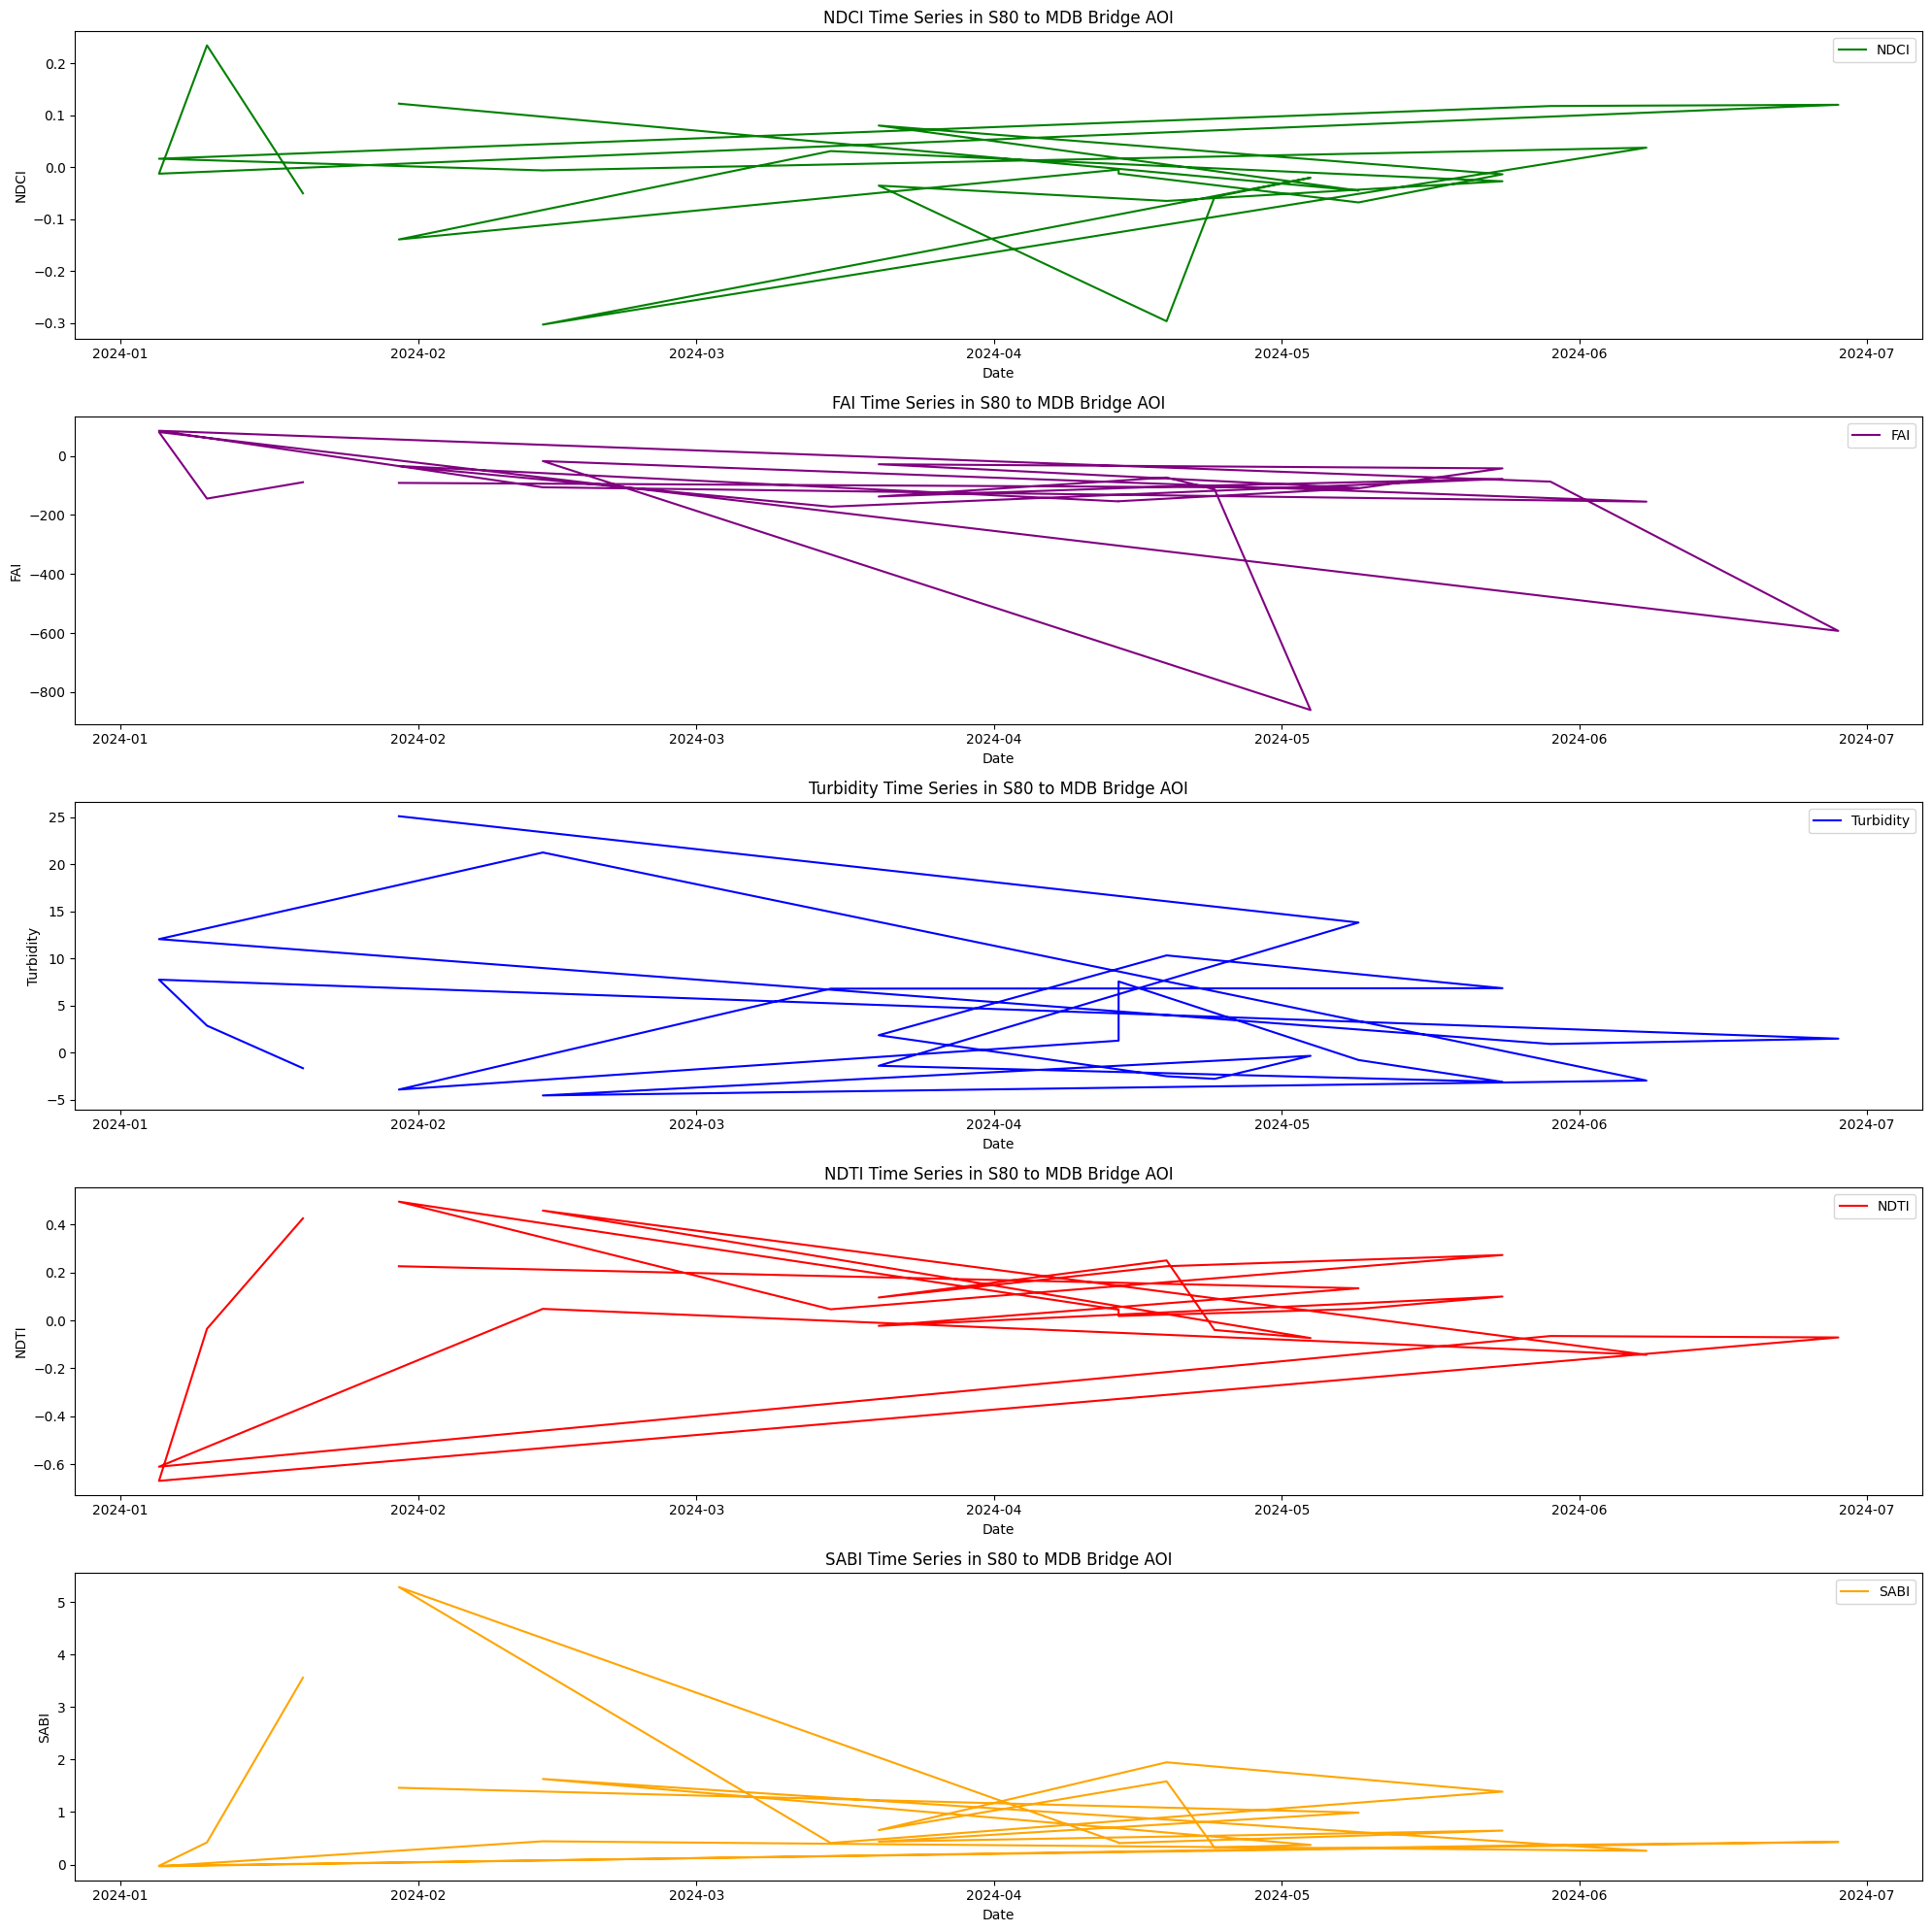

In [185]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 1, figsize=(20, 20))

# Plot NDCI time series
axs[0].plot(ndci_S80_df['date'], ndci_S80_df['NDCI'], label='NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('NDCI Time Series in S80 to MDB Bridge AOI')
axs[0].legend()

# Plot FAI time series (replacing WVI)
axs[1].plot(fai_S80_df['date'], fai_S80_df['FAI'], label='FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('FAI Time Series in S80 to MDB Bridge AOI')
axs[1].legend()

# Plot Turbidity time series
axs[2].plot(turbidity_S80_df['date'], turbidity_S80_df['Turbidity'], label='Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Turbidity Time Series in S80 to MDB Bridge AOI')
axs[2].legend()

# Plot NDCI time series
axs[3].plot(ndti_S80_df['date'], ndti_S80_df['NDTI'], label='NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('NDTI Time Series in S80 to MDB Bridge AOI')
axs[3].legend()

# Plot SABI time series
axs[4].plot(sabi_S80_df['date'], sabi_S80_df['SABI'], label='SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('SABI Time Series in S80 to MDB Bridge AOI')
axs[4].legend()

plt.tight_layout()
plt.show()


### Daily Time Series

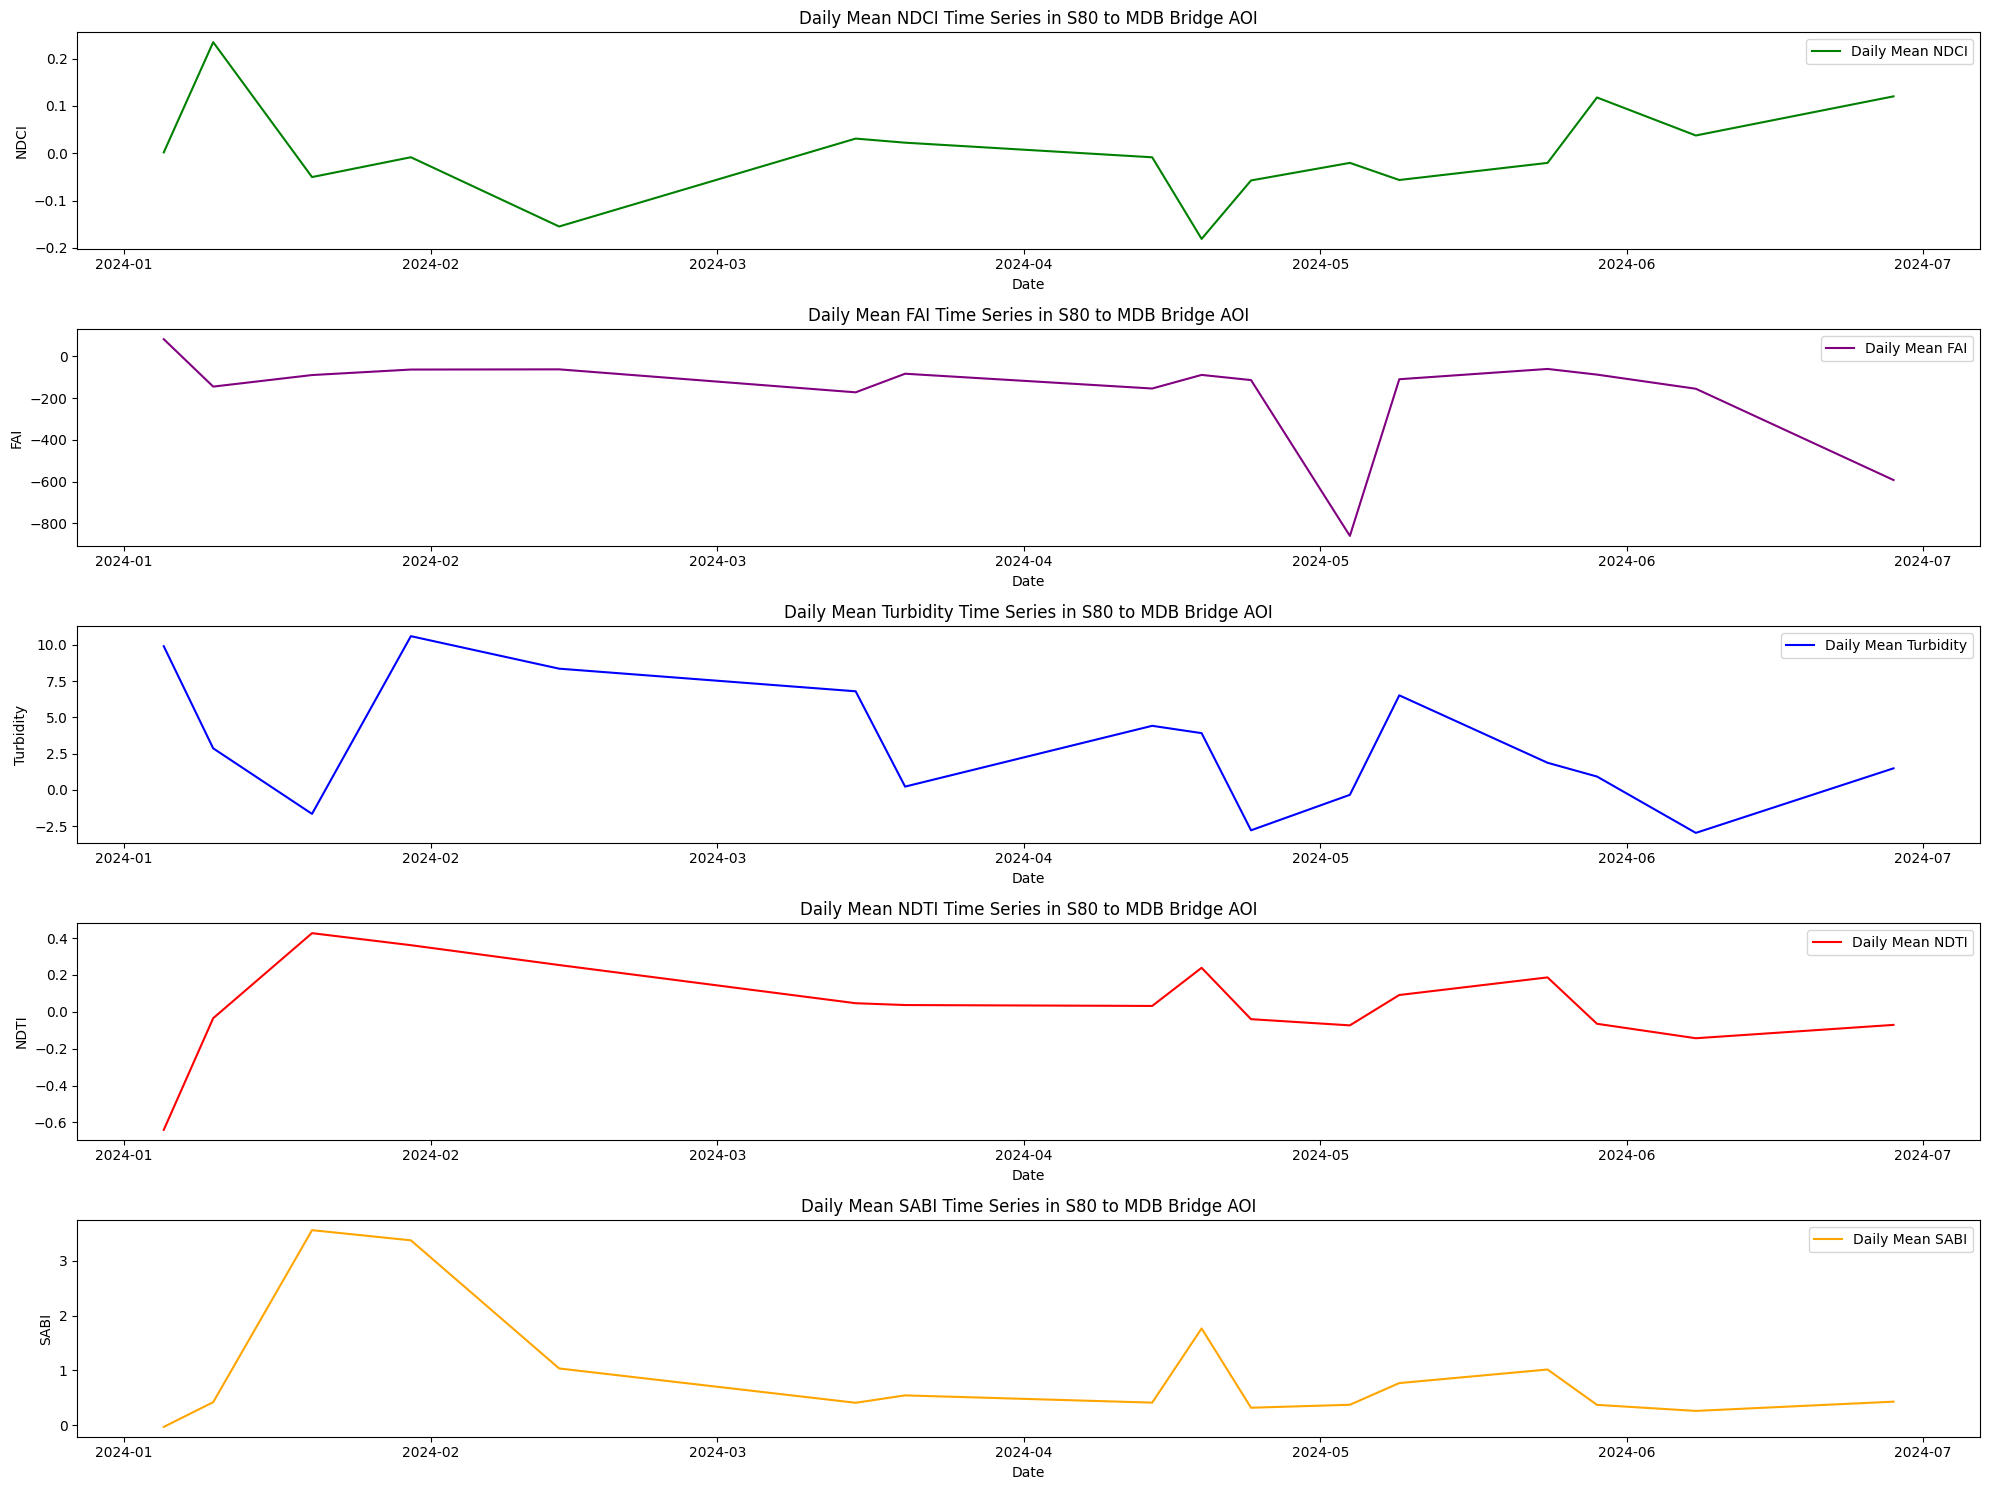

In [186]:
import matplotlib.pyplot as plt

# Compute the daily mean for each index without modifying the original data frames
ndci_daily_S80 = ndci_S80_df.groupby('date', as_index=False)['NDCI'].mean()
fai_daily_S80 = fai_S80_df.groupby('date', as_index=False)['FAI'].mean()
turbidity_daily_S80 = turbidity_S80_df.groupby('date', as_index=False)['Turbidity'].mean()
ndti_daily_S80 = ndti_S80_df.groupby('date', as_index=False)['NDTI'].mean()
sabi_daily_S80 = sabi_S80_df.groupby('date', as_index=False)['SABI'].mean()

fig, axs = plt.subplots(5, 1, figsize=(20, 15))

# Plot daily mean NDCI time series
axs[0].plot(ndci_daily_S80['date'], ndci_daily_S80['NDCI'], label='Daily Mean NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('Daily Mean NDCI Time Series in S80 to MDB Bridge AOI')
axs[0].legend()

# Plot daily mean FAI time series
axs[1].plot(fai_daily_S80['date'], fai_daily_S80['FAI'], label='Daily Mean FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('Daily Mean FAI Time Series in S80 to MDB Bridge AOI')
axs[1].legend()

# Plot daily mean Turbidity time series
axs[2].plot(turbidity_daily_S80['date'], turbidity_daily_S80['Turbidity'], label='Daily Mean Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Daily Mean Turbidity Time Series in S80 to MDB Bridge AOI')
axs[2].legend()

# Plot daily mean Turbidity time series
axs[3].plot(ndti_daily_S80['date'], ndti_daily_S80['NDTI'], label='Daily Mean NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('Daily Mean NDTI Time Series in S80 to MDB Bridge AOI')
axs[3].legend()

# Plot daily mean SABI time series
axs[4].plot(sabi_daily_S80['date'], sabi_daily_S80['SABI'], label='Daily Mean SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('Daily Mean SABI Time Series in S80 to MDB Bridge AOI')
axs[4].legend()

plt.tight_layout()
plt.show()

# Merge the daily aggregated data into one DataFrame
daily_aggregated_S80 = ndci_daily_S80.merge(fai_daily_S80, on='date').merge(turbidity_daily_S80, on='date').merge(ndti_daily_S80, on='date').merge(sabi_daily_S80, on='date')

# Save the merged daily aggregated data to a CSV file
daily_aggregated_S80.to_csv('HABProject/Daily_Aggregated_Data_S80_01012024_06302024.csv', index=False)

### Correlation Matrix

Combined CSV saved to HABProject/S80_Shapefile/Combined_Aggregated_Data.csv


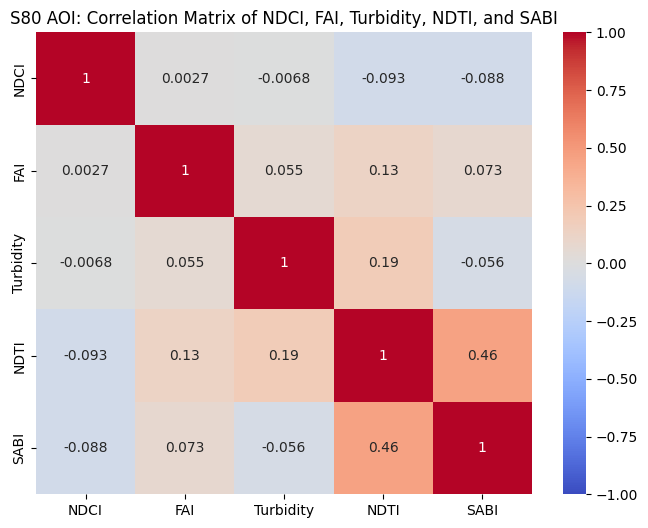

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000  0.002701  -0.006801 -0.093415 -0.088083
FAI        0.002701  1.000000   0.055251  0.128693  0.072987
Turbidity -0.006801  0.055251   1.000000  0.189476 -0.055833
NDTI      -0.093415  0.128693   0.189476  1.000000  0.457361
SABI      -0.088083  0.072987  -0.055833  0.457361  1.000000


In [261]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- MERGE CSV FILES ---

# Directory where CSV files are located
csv_dir = 'HABProject/S80_Shapefile/'

# Use glob to find only CSV files that contain the word 'merged'
csv_files = glob.glob(os.path.join(csv_dir, "*merged*.csv"))

# List to store DataFrames from each CSV file
dfs = []

# Loop through each CSV file, read it, and set 'date' as index
for file in csv_files:
    try:
        # Read CSV and parse 'date' as datetime
        df = pd.read_csv(file, parse_dates=["date"])
        # Set 'date' as index
        df.set_index("date", inplace=True)
        dfs.append(df)
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Concatenate all DataFrames if any were successfully loaded
if dfs:
    combined_df = pd.concat(dfs)
    # Sort by date index
    combined_df.sort_index(inplace=True)
    # Save the combined DataFrame to a new CSV file
    combined_csv_path = os.path.join(csv_dir, "Combined_Aggregated_Data.csv")
    combined_df.to_csv(combined_csv_path)
    print(f"Combined CSV saved to {combined_csv_path}")
else:
    print("No CSV files loaded. Please check your CSV files and the directory path.")

# --- CORRELATION ANALYSIS AND HEATMAP PLOTTING ---

# Import the combined CSV as a DataFrame; ensure 'date' is read as the index
daily_S80_df = pd.read_csv(
    combined_csv_path, index_col='date', parse_dates=['date']
)

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_S80_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('S80 AOI: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')

# Save the figure
plt.savefig('HABProject/S80_Shapefile/Heat_Map_S80_AOI_Master.png')
plt.show()

# Print the correlation matrix to the console
print("Correlation Matrix:\n", corr_matrix)

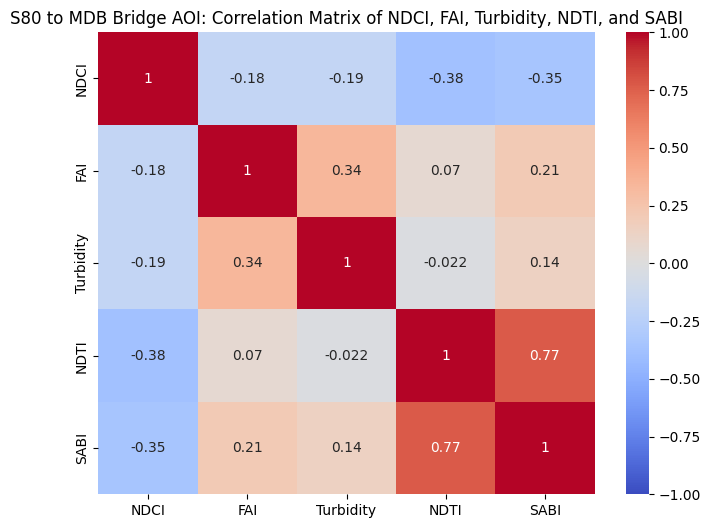

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000 -0.182899  -0.187043 -0.379446 -0.345037
FAI       -0.182899  1.000000   0.339356  0.069711  0.206728
Turbidity -0.187043  0.339356   1.000000 -0.022412  0.144898
NDTI      -0.379446  0.069711  -0.022412  1.000000  0.769355
SABI      -0.345037  0.206728   0.144898  0.769355  1.000000


<Figure size 640x480 with 0 Axes>

In [187]:
import seaborn as sns

#Import the daily cs csv as a df
daily_S80_df = pd.read_csv('HABProject/Daily_Aggregated_Data_S80_01012024_06302024.csv')

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_S80_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plotting Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('S80 to MDB Bridge AOI: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')
plt.show()

# Print Correlation Matrix
plt.savefig('HABProject/Heat_Map_S80_01012024_06302024.png')  # Save the figure
print("Correlation Matrix:\n", corr_matrix)

### Scatterplot

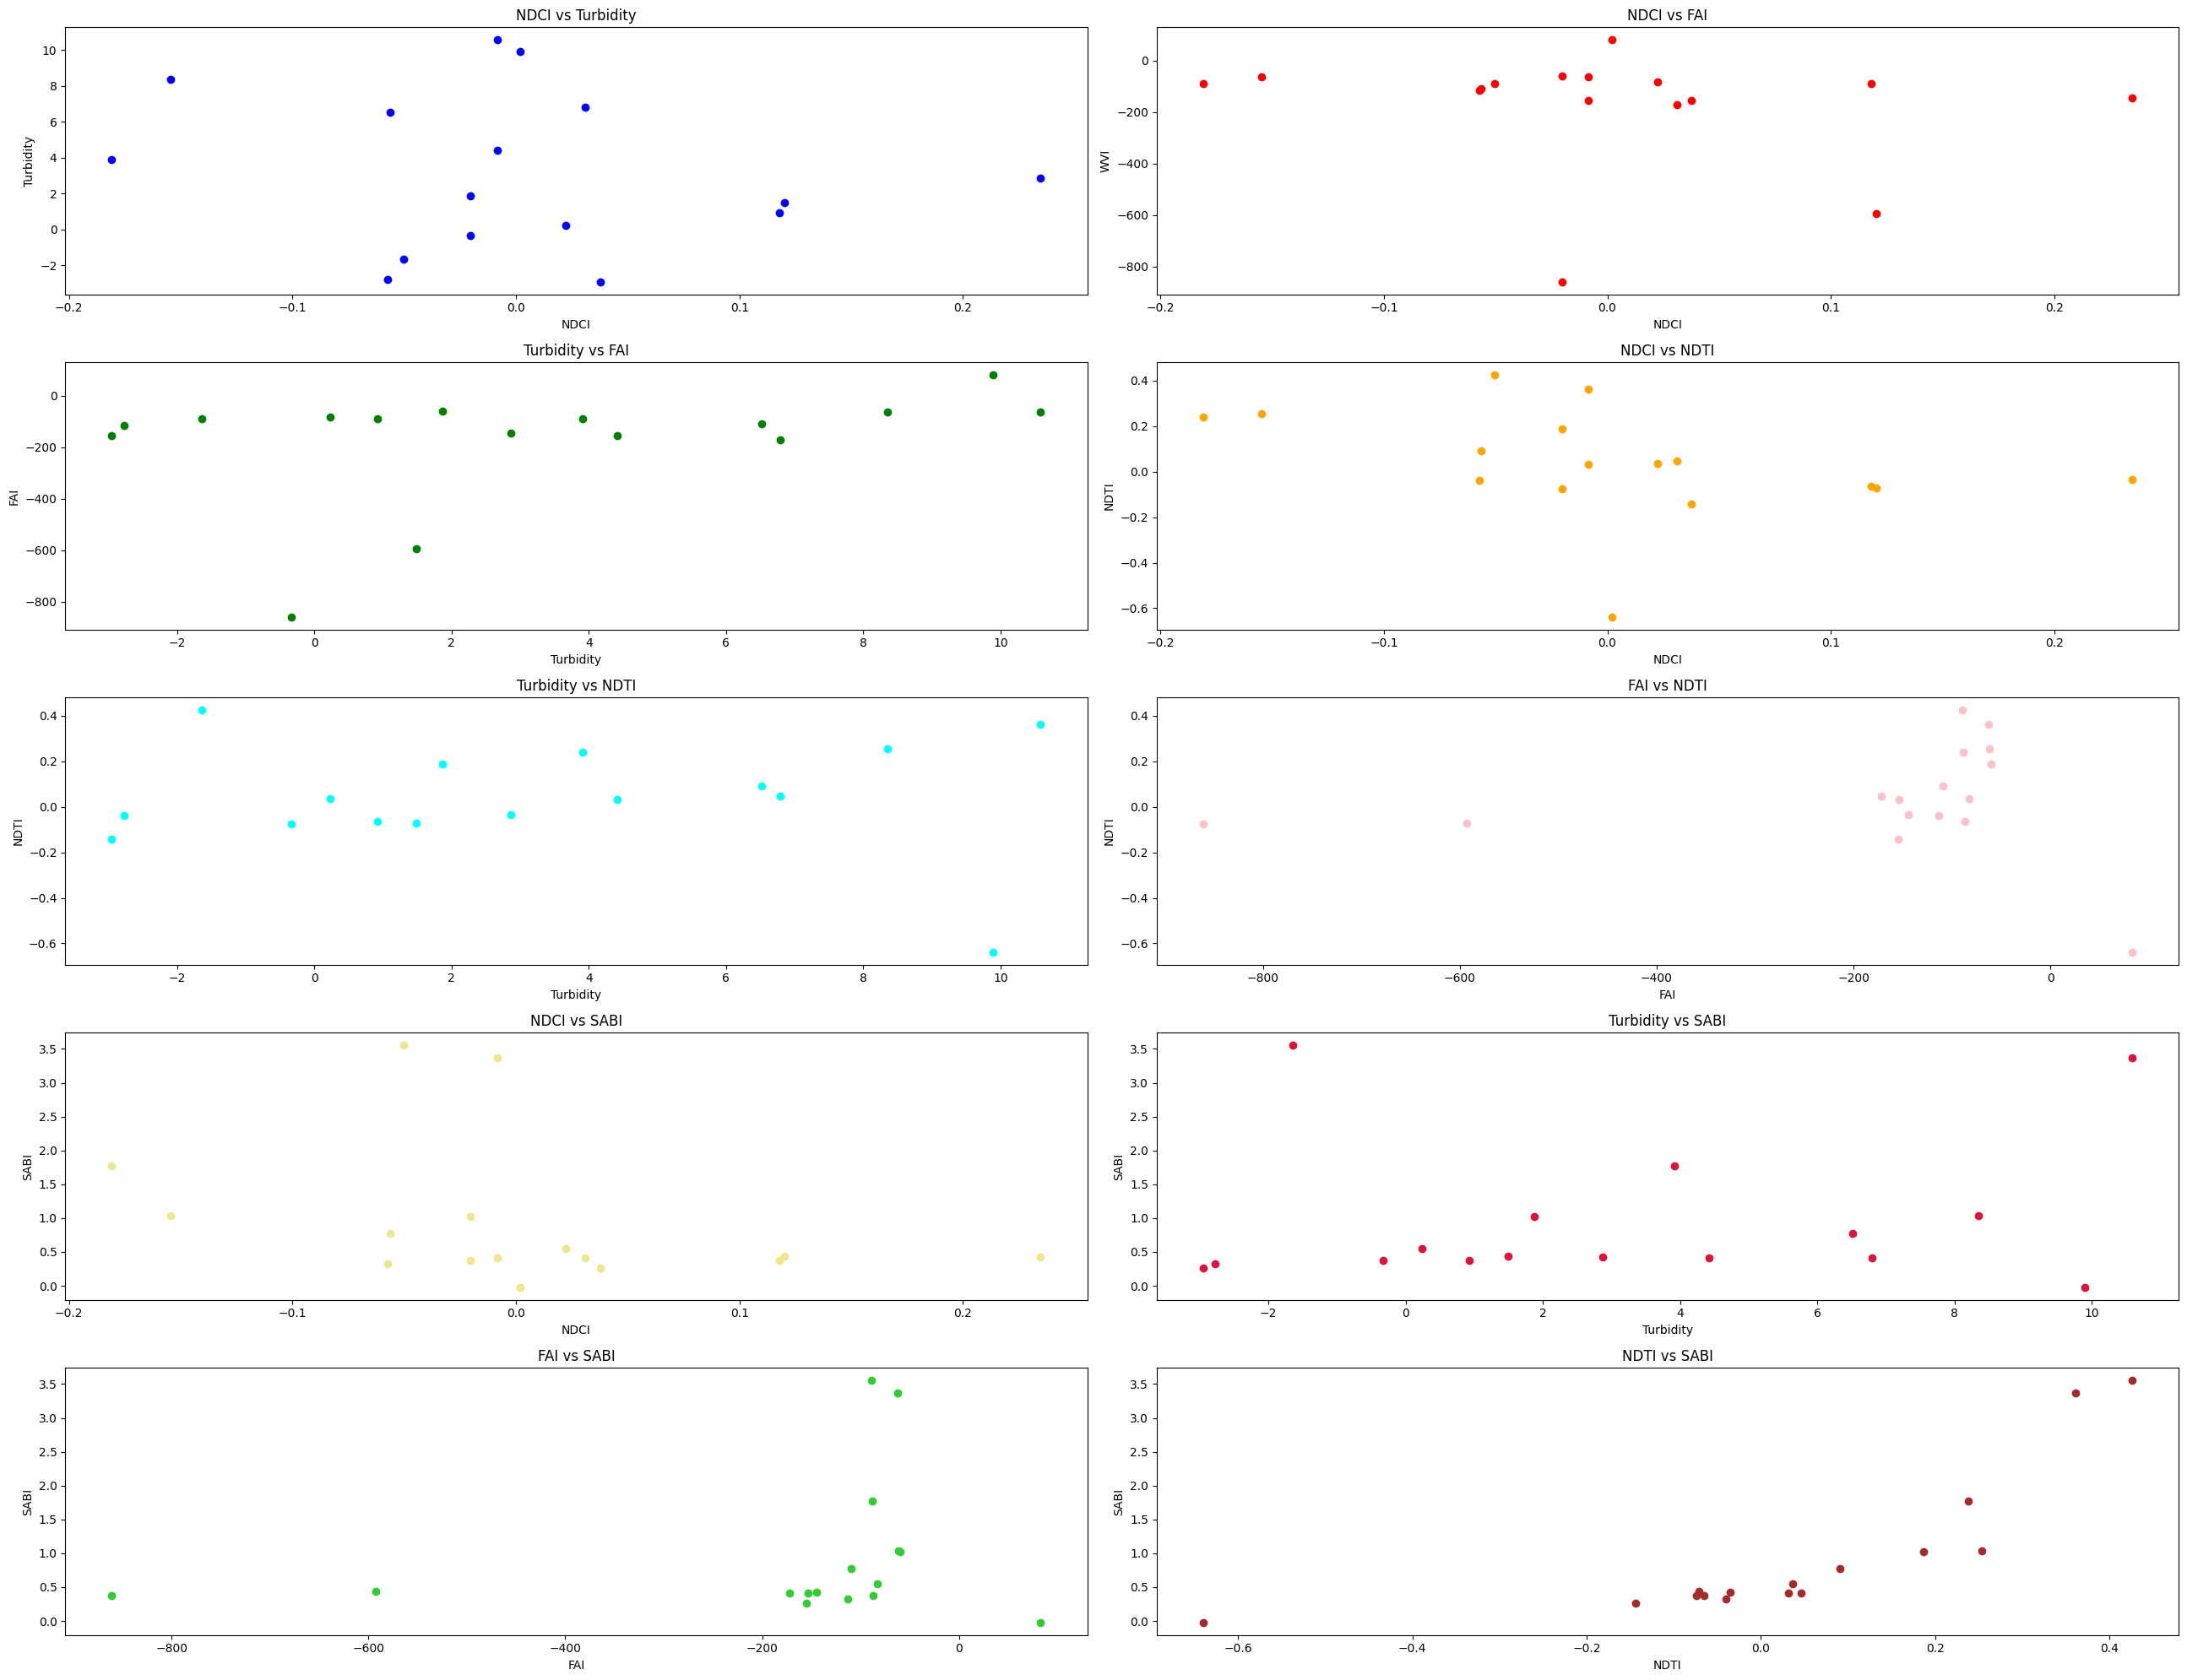

In [188]:
# Scatter Plot Analysis
fig, axs = plt.subplots(5, 2, figsize=(26, 20))

axs[0, 0].scatter(daily_S80_df['NDCI'], daily_S80_df['Turbidity'], c='blue')
axs[0, 0].set_xlabel('NDCI')
axs[0, 0].set_ylabel('Turbidity')
axs[0, 0].set_title('NDCI vs Turbidity')

axs[0, 1].scatter(daily_S80_df['NDCI'], daily_S80_df['FAI'], c='red')
axs[0, 1].set_xlabel('NDCI')
axs[0, 1].set_ylabel('WVI')
axs[0, 1].set_title('NDCI vs FAI')

axs[1, 0].scatter(daily_S80_df['Turbidity'], daily_S80_df['FAI'], c='green')
axs[1, 0].set_xlabel('Turbidity')
axs[1, 0].set_ylabel('FAI')
axs[1, 0].set_title('Turbidity vs FAI')

#Adding all NDTI here:

axs[1, 1].scatter(daily_S80_df['NDCI'], daily_S80_df['NDTI'], c='orange')
axs[1, 1].set_xlabel('NDCI')
axs[1, 1].set_ylabel('NDTI')
axs[1, 1].set_title('NDCI vs NDTI')

axs[2, 0].scatter(daily_S80_df['Turbidity'], daily_S80_df['NDTI'], c='cyan')
axs[2, 0].set_xlabel('Turbidity')
axs[2, 0].set_ylabel('NDTI')
axs[2, 0].set_title('Turbidity vs NDTI')

axs[2, 1].scatter(daily_S80_df['FAI'], daily_S80_df['NDTI'], c='pink')
axs[2, 1].set_xlabel('FAI')
axs[2, 1].set_ylabel('NDTI')
axs[2, 1].set_title('FAI vs NDTI')

#SABI Additions
axs[3, 0].scatter(daily_S80_df['NDCI'], daily_S80_df['SABI'], c='khaki')
axs[3, 0].set_xlabel('NDCI')
axs[3, 0].set_ylabel('SABI')
axs[3, 0].set_title('NDCI vs SABI')

axs[3, 1].scatter(daily_S80_df['Turbidity'], daily_S80_df['SABI'], c='crimson')
axs[3, 1].set_xlabel('Turbidity')
axs[3, 1].set_ylabel('SABI')
axs[3, 1].set_title('Turbidity vs SABI')

axs[4, 0].scatter(daily_S80_df['FAI'], daily_S80_df['SABI'], c='limegreen')
axs[4, 0].set_xlabel('FAI')
axs[4, 0].set_ylabel('SABI')
axs[4, 0].set_title('FAI vs SABI')

axs[4, 1].scatter(daily_S80_df['NDTI'], daily_S80_df['SABI'], c='brown')
axs[4, 1].set_xlabel('NDTI')
axs[4, 1].set_ylabel('SABI')
axs[4, 1].set_title('NDTI vs SABI')


plt.tight_layout()
plt.savefig('HABProject/Scatter_plot_S80_01012024_06302024.png')  # Save the figure
plt.show()

# MDB Bridge to DHwy to Other Input Shapefile

## 1. Ensuring the shapefile can be read

In [253]:
import geopandas as gpd

shapefile_path = 'D:/Classes/STPythonFinalProject/MDBBridge_to_DHwy_to_OtherInput.shp'
gdf = gpd.read_file(shapefile_path)
print(gdf.head())

     Shape_Leng    Shape_Area  \
0  32707.546562  2.174264e+07   

                                            geometry  
0  POLYGON Z ((-8935254.757 3145439.563 0, -89355...  


#### Another testing of the shapefile, converting it so it may be used in Geemap

In [254]:
import geopandas as gpd
import shapely.geometry
import geemap

# Load your shapefile with Geopandas
shapefile_path = 'D:/Classes/STPythonFinalProject/MDBBridge_to_DHwy_to_OtherInput.shp'
gdf = gpd.read_file(shapefile_path)

# Define a function to drop the Z coordinate from a geometry
def drop_z(geom):
    if geom.is_empty:
        return geom
    if geom.geom_type == 'Polygon':
        return shapely.geometry.Polygon([(x, y) for x, y, *z in geom.exterior.coords])
    elif geom.geom_type == 'MultiPolygon':
        return shapely.geometry.MultiPolygon([drop_z(poly) for poly in geom])
    else:
        return geom

# Apply the function to each geometry in your GeoDataFrame
gdf['geometry'] = gdf['geometry'].apply(drop_z)

# Now convert the GeoDataFrame to an Earth Engine FeatureCollection
aoi_fc = geemap.geopandas_to_ee(gdf)
MDBBridge_to_DHwy_to_OtherInput_aoi = aoi_fc.geometry()

# Verify by printing the AOI geometry
print(MDBBridge_to_DHwy_to_OtherInput_aoi.getInfo())

{'type': 'Polygon', 'coordinates': [[[-80.26675915804591, 27.175693762137914], [-80.26539528996749, 27.172244438065434], [-80.26457463044642, 27.17238028576934], [-80.26003251301131, 27.174608607256328], [-80.25755445550283, 27.17569987164289], [-80.25826473363504, 27.176103565733282], [-80.25916826633434, 27.17800341488075], [-80.25900398782507, 27.179610953850514], [-80.25941468409825, 27.182022218881897], [-80.2595789626075, 27.183995032966315], [-80.25867542990822, 27.185967812964076], [-80.25760761869965, 27.187721365363426], [-80.25021507859609, 27.1875021730208], [-80.25308995520321, 27.18881732141466], [-80.25489702060179, 27.19027857993131], [-80.25686836450964, 27.190497766817874], [-80.26048249530679, 27.188452004193756], [-80.25933254484362, 27.190132455100954], [-80.25990752052437, 27.192835735868528], [-80.25851115139895, 27.19502753748914], [-80.25785403646356, 27.19838821582154], [-80.25826473363504, 27.201383517999762], [-80.26009479770153, 27.202816091515462], [-80.26

## 2. Creation of Map and CSVs

#### Mosaic introduced, combining all images with the cloud mask from the time frame, clips it to the area of interest, and computes NDWI. 

#### Uses NDWI for the water mask, and returns the Water Masked Mosaic and the NDWI

In [255]:
import pandas as pd
import ee
import geemap

# Initialize Earth Engine (if not already initialized)
ee.Initialize()

# Assume AOI is defined (replace with your actual AOI)
# Example AOI:


# Define cloud masking function using the QA60 band
def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Define processing function:
#  - Applies cloud mask.
#  - Computes an NDWI for water detection and applies a water mask.
#  - Computes NDCI, FAI, and Turbidity indices.
#  - Clips the image to the AOI.
def process_image(image):
    # Apply cloud mask
    image = maskS2clouds(image)
    
    # Compute NDWI (using green (B3) and NIR (B8)) to isolate water pixels.
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    water_mask = ndwi.gt(0.5)  # Adjust threshold as needed
    image = image.updateMask(water_mask)
    
    # Calculate NDCI (Normalized Difference Chlorophyll Index) using B5 (red edge) and B4 (red)
    ndci = image.normalizedDifference(['B5', 'B4']).rename('NDCI')
    
    # Calculate FAI (Floating Algae Index).
    # For Sentinel-2, one common approach is:
    #   FAI = B8 - (B5 + (B11 - B5) * (137/905))
    
    #fai = image.select('B8') \
     #   .subtract(image.select('B5') \
      #            .add(image.select('B11') \
       #                .subtract(image.select('B5')) \
        #               .multiply(137/905))) \
        #.rename('FAI')

    #Naming each band as a variable
    #FAI = (Rnir - Rred) = (((Rswir - Rred)*(wavelength_nir - wavelength_red)) / (wavelength_swir - wavelength_red)))
    #Equation based on Muzfoffar et al. 2023. DOI: https://doi.org/10.3390/rs15082039
    B8 = image.select('B8') # NIR Band
    B4 = image.select('B4') # Red band
    B11 = image.select('B11') # SWIR band

    #Making a variable for each part of the equation
    diff_NIR_Red = B8.subtract(B4)
    diff_SWIR_Red = B11.subtract(B4)
    diff_WL_NIR_Red = 842 - 665
    diff_WL_SWIR_Red = 1610 - 665

    #Dealing with the fraction order of operations
    top_fraction = diff_SWIR_Red.multiply(diff_WL_NIR_Red)
    whole_fraction = top_fraction.divide(diff_WL_SWIR_Red)

    #Last bit of equation
    fai = diff_NIR_Red.add(whole_fraction).rename('FAI')

    
    
    
    # Calculate Turbidity as an additional index (optional)
    # This is an example formula; adjust as appropriate for your study.
    turbidity = image.select('B3') \
        .divide(image.select('B1')) \
        .multiply(8.93) \
        .subtract(6.39) \
        .rename('Turbidity')

    #NDTI calculation
    ndti = image.normalizedDifference(['B4', 'B3']).rename('NDTI')

     #SABI (Surface algal bloom index) calculation
    #SABI = (Red - NIR) / (Blue + Green) OR SABI = (B4 - B8) / (B2 + B3)
    B2 = image.select('B2') #Blue band
    B3 = image.select('B3') #Green band

    sabi_top = B4.subtract(B8)
    sabi_bottom = B2.add(B3)
    sabi = sabi_top.divide(sabi_bottom).rename('SABI')
    
    # Add the new bands and clip the image to the MDBBridge_to_DHwy_to_OtherInput_aoi
    return image.addBands([ndci, fai, turbidity, ndti, sabi]).clip(MDBBridge_to_DHwy_to_OtherInput_aoi)

# Define time frame for your analysis
start_date = '2024-07-01'
end_date   = '2024-12-31'

# Load Sentinel-2 image collection, filter by MDBBridge_to_DHwy_to_OtherInput_aoi and date, and sort by cloud percentage
sentinel2 = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
             .filterBounds(MDBBridge_to_DHwy_to_OtherInput_aoi)
             .filterDate(start_date, end_date)
             .sort('CLOUDY_PIXEL_PERCENTAGE'))

# Process the image collection: apply cloud and water masks, calculate indices, and clip each image to aoi_cs
processed_images = sentinel2.map(process_image)

# --- Time Series Calculation ---
# Function to calculate mean index values over the MDBBridge_to_DHwy_to_OtherInput_aoi for each image
def calculate_time_series(image_collection, index_name):
    def reduce_region(image):
        stats = image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=MDBBridge_to_DHwy_to_OtherInput_aoi,
            scale=10,         # 10 m resolution
            maxPixels=1e9
        )
        return ee.Feature(None, stats).set('date', image.date().format('YYYY-MM-dd'))
    time_series = image_collection.map(reduce_region)
    time_series_list = time_series.reduceColumns(
        ee.Reducer.toList(2),
        ['date', index_name]
    ).get('list').getInfo()
    return time_series_list

# Calculate time series for each index
ndci_MDBBridge_to_DHwy_to_OtherInput_time_series      = calculate_time_series(processed_images, 'NDCI')
fai_MDBBridge_to_DHwy_to_OtherInput_time_series       = calculate_time_series(processed_images, 'FAI')
turbidity_MDBBridge_to_DHwy_to_OtherInput_time_series = calculate_time_series(processed_images, 'Turbidity')
ndti_MDBBridge_to_DHwy_to_OtherInput_time_series      = calculate_time_series(processed_images, 'NDTI')
sabi_MDBBridge_to_DHwy_to_OtherInput_time_series      = calculate_time_series(processed_images, 'SABI')

# Convert the time series lists to pandas DataFrames
def time_series_to_df(time_series, index_name):
    df = pd.DataFrame(time_series, columns=['date', index_name])
    df['date'] = pd.to_datetime(df['date'])
    return df

ndci_MDBBridge_to_DHwy_to_OtherInput_df      = time_series_to_df(ndci_MDBBridge_to_DHwy_to_OtherInput_time_series, 'NDCI')
fai_MDBBridge_to_DHwy_to_OtherInput_df       = time_series_to_df(fai_MDBBridge_to_DHwy_to_OtherInput_time_series, 'FAI')
turbidity_MDBBridge_to_DHwy_to_OtherInput_df = time_series_to_df(turbidity_MDBBridge_to_DHwy_to_OtherInput_time_series, 'Turbidity')
ndti_MDBBridge_to_DHwy_to_OtherInput_df      = time_series_to_df(ndti_MDBBridge_to_DHwy_to_OtherInput_time_series, 'NDTI')
sabi_MDBBridge_to_DHwy_to_OtherInput_df      = time_series_to_df(sabi_MDBBridge_to_DHwy_to_OtherInput_time_series, 'SABI')

# Merge the DataFrames for further analysis
merged_MDBBridge_to_DHwy_to_OtherInput_df = ndci_MDBBridge_to_DHwy_to_OtherInput_df.merge(fai_MDBBridge_to_DHwy_to_OtherInput_df, on='date').merge(turbidity_MDBBridge_to_DHwy_to_OtherInput_df, on='date').merge(ndti_MDBBridge_to_DHwy_to_OtherInput_df, on='date').merge(sabi_MDBBridge_to_DHwy_to_OtherInput_df, on='date')

# Save the time series data to CSV files
ndci_MDBBridge_to_DHwy_to_OtherInput_df.to_csv('HABProject/NDCI_TimeSeries_MDBBridge_to_DHwy_to_OtherInput_07012024_12312024.csv', index=False)
fai_MDBBridge_to_DHwy_to_OtherInput_df.to_csv('HABProject/FAI_TimeSeries_MDBBridge_to_DHwy_to_OtherInput_07012024_12312024.csv', index=False)
turbidity_MDBBridge_to_DHwy_to_OtherInput_df.to_csv('HABProject/Turbidity_TimeSeries_MDBBridge_to_DHwy_to_OtherInput_07012024_12312024.csv', index=False)
ndti_MDBBridge_to_DHwy_to_OtherInput_df.to_csv('HABProject/NDTI_TimeSeries_MDBBridge_to_DHwy_to_OtherInput_07012024_12312024.csv', index=False)
sabi_MDBBridge_to_DHwy_to_OtherInput_df.to_csv('HABProject/SABI_TimeSeries_MDBBridge_to_DHwy_to_OtherInput_07012024_12312024.csv', index=False)
merged_MDBBridge_to_DHwy_to_OtherInput_df.to_csv('HABProject/Merged_TimeSeries_MDBBridge_to_DHwy_to_OtherInput_07012024_12312024.csv', index=False)

# --- Map Visualization ---
Map = geemap.Map(center=[27.75, -80.25], zoom=10)

# Display the FAI band (suitable for highlighting floating algae)
Map.addLayer(processed_images.first(), 
             {'bands': ['FAI'], 'min': -0.5, 'max': 0.5, 'palette': ['blue', 'white', 'green']}, 
             'FAI')

# Display the NDCI band (using a palette to highlight chlorophyll levels)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDCI'], 'min': -0.5, 'max': 0.5, 'palette': ['yellow', 'orange', 'red']}, 
             'NDCI')

# Display the Turbidity band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['Turbidity'], 'min': -2, 'max': 20, 'palette': ['white', 'blue', 'darkblue']}, 
             'Turbidity')

# Display the NDTI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDTI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'NDTI')

# Display the SABI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['SABI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'SABI')

# Add the MDBBridge_to_DHwy_to_OtherInput_aoi boundary for reference
Map.addLayer(MDBBridge_to_DHwy_to_OtherInput_aoi, {}, 'MDBBridge_to_DHwy_to_OtherInput_AOI', True)

Map

Map(center=[27.75, -80.25], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

## 3. Plotting Time Series of the Indices

### Messy Time Series

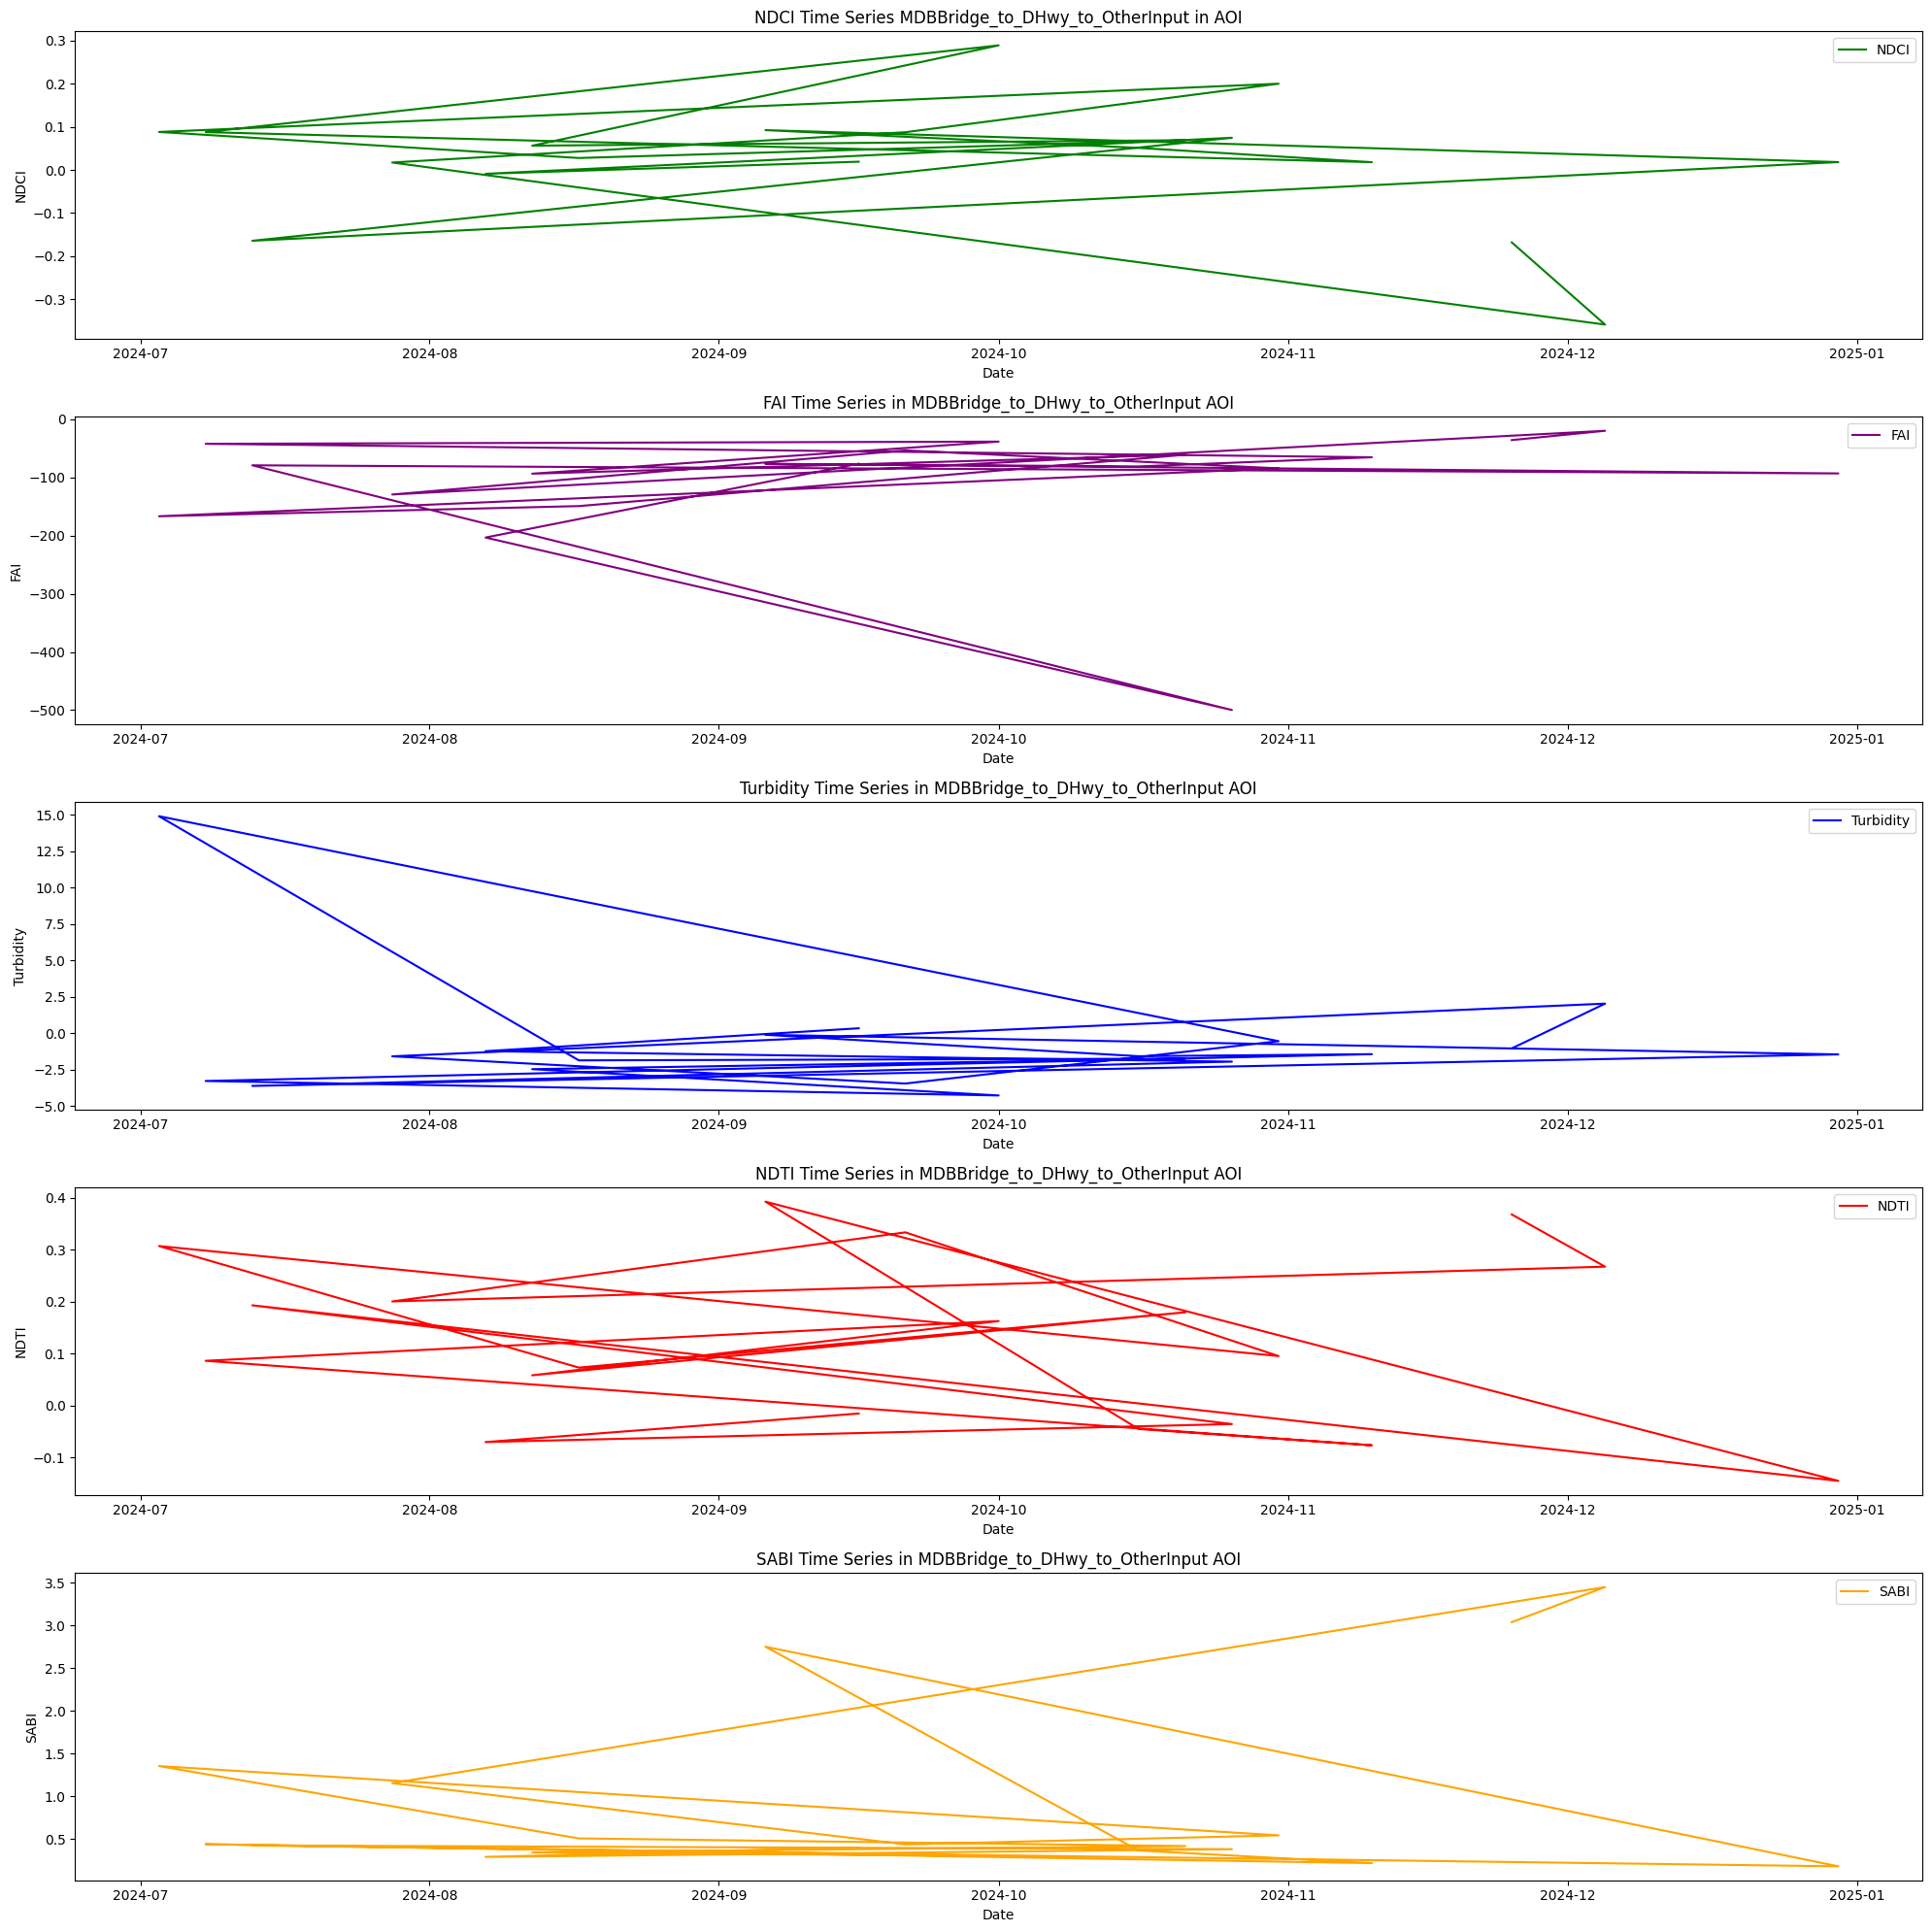

In [256]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 1, figsize=(20, 20))

# Plot NDCI time series
axs[0].plot(ndci_MDBBridge_to_DHwy_to_OtherInput_df['date'], ndci_MDBBridge_to_DHwy_to_OtherInput_df['NDCI'], label='NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('NDCI Time Series MDBBridge_to_DHwy_to_OtherInput in AOI')
axs[0].legend()

# Plot FAI time series (replacing WVI)
axs[1].plot(fai_MDBBridge_to_DHwy_to_OtherInput_df['date'], fai_MDBBridge_to_DHwy_to_OtherInput_df['FAI'], label='FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('FAI Time Series in MDBBridge_to_DHwy_to_OtherInput AOI')
axs[1].legend()

# Plot Turbidity time series
axs[2].plot(turbidity_MDBBridge_to_DHwy_to_OtherInput_df['date'], turbidity_MDBBridge_to_DHwy_to_OtherInput_df['Turbidity'], label='Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Turbidity Time Series in MDBBridge_to_DHwy_to_OtherInput AOI')
axs[2].legend()

# Plot NDCI time series
axs[3].plot(ndti_MDBBridge_to_DHwy_to_OtherInput_df['date'], ndti_MDBBridge_to_DHwy_to_OtherInput_df['NDTI'], label='NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('NDTI Time Series in MDBBridge_to_DHwy_to_OtherInput AOI')
axs[3].legend()

# Plot SABI time series
axs[4].plot(sabi_MDBBridge_to_DHwy_to_OtherInput_df['date'], sabi_MDBBridge_to_DHwy_to_OtherInput_df['SABI'], label='SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('SABI Time Series in MDBBridge_to_DHwy_to_OtherInput AOI')
axs[4].legend()

plt.tight_layout()
plt.show()


### Daily Time Series

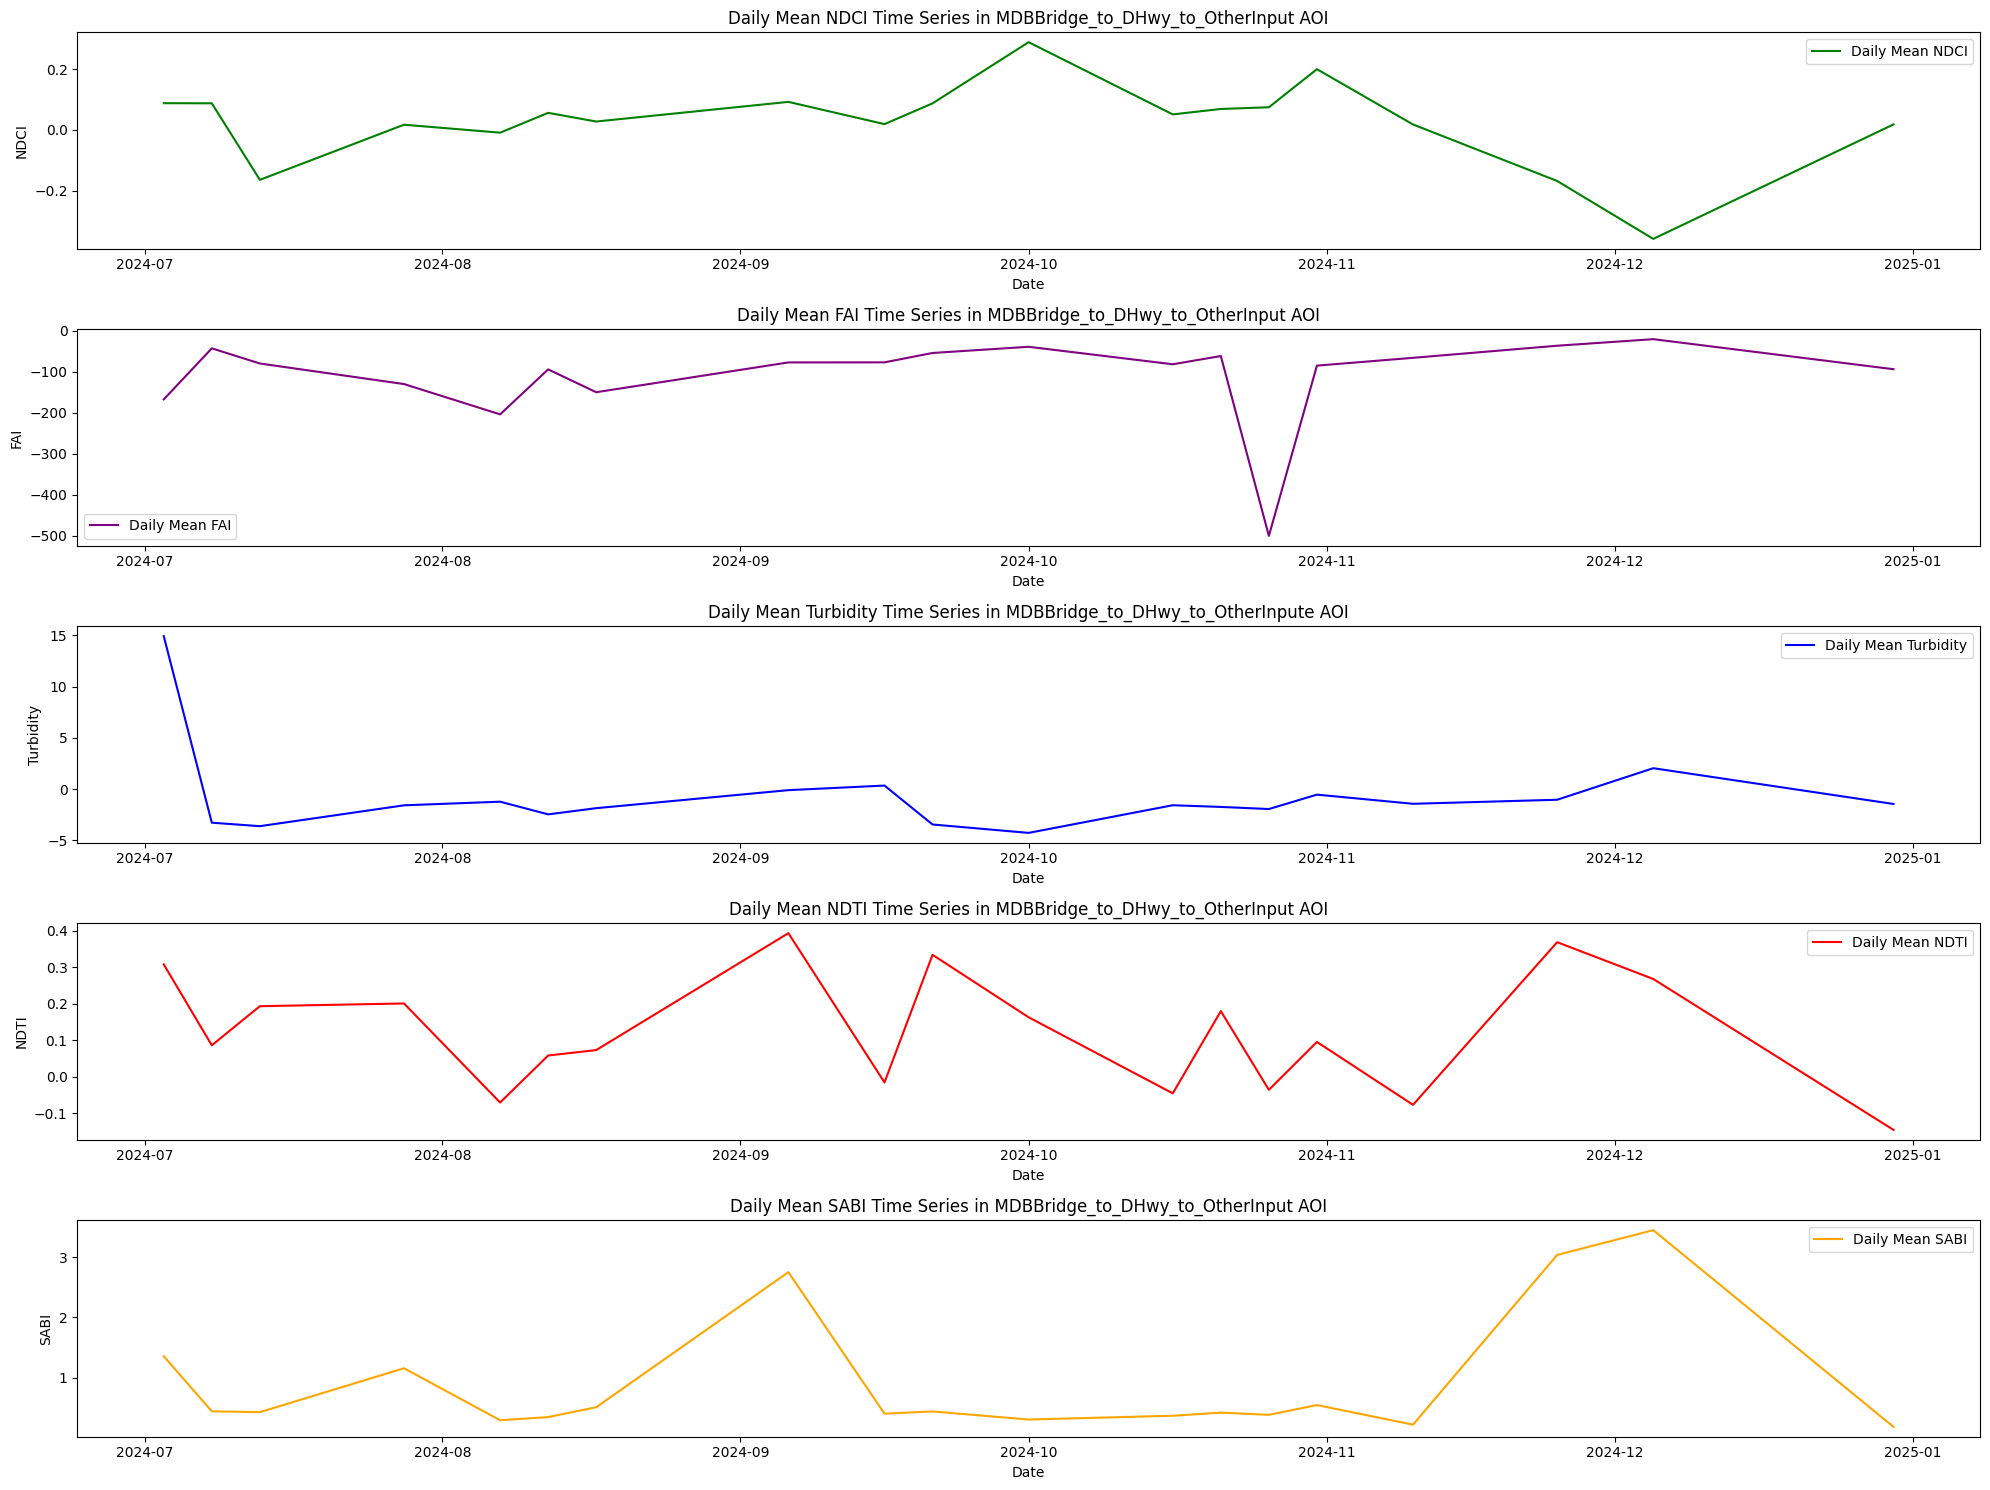

In [257]:
import matplotlib.pyplot as plt

# Compute the daily mean for each index without modifying the original data frames
ndci_daily_MDBBridge_to_DHwy_to_OtherInput = ndci_MDBBridge_to_DHwy_to_OtherInput_df.groupby('date', as_index=False)['NDCI'].mean()
fai_daily_MDBBridge_to_DHwy_to_OtherInput = fai_MDBBridge_to_DHwy_to_OtherInput_df.groupby('date', as_index=False)['FAI'].mean()
turbidity_daily_MDBBridge_to_DHwy_to_OtherInput = turbidity_MDBBridge_to_DHwy_to_OtherInput_df.groupby('date', as_index=False)['Turbidity'].mean()
ndti_daily_MDBBridge_to_DHwy_to_OtherInput = ndti_MDBBridge_to_DHwy_to_OtherInput_df.groupby('date', as_index=False)['NDTI'].mean()
sabi_daily_MDBBridge_to_DHwy_to_OtherInput = sabi_MDBBridge_to_DHwy_to_OtherInput_df.groupby('date', as_index=False)['SABI'].mean()

fig, axs = plt.subplots(5, 1, figsize=(20, 15))

# Plot daily mean NDCI time series
axs[0].plot(ndci_daily_MDBBridge_to_DHwy_to_OtherInput['date'], ndci_daily_MDBBridge_to_DHwy_to_OtherInput['NDCI'], label='Daily Mean NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('Daily Mean NDCI Time Series in MDBBridge_to_DHwy_to_OtherInput AOI')
axs[0].legend()

# Plot daily mean FAI time series
axs[1].plot(fai_daily_MDBBridge_to_DHwy_to_OtherInput['date'], fai_daily_MDBBridge_to_DHwy_to_OtherInput['FAI'], label='Daily Mean FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('Daily Mean FAI Time Series in MDBBridge_to_DHwy_to_OtherInput AOI')
axs[1].legend()

# Plot daily mean Turbidity time series
axs[2].plot(turbidity_daily_MDBBridge_to_DHwy_to_OtherInput['date'], turbidity_daily_MDBBridge_to_DHwy_to_OtherInput['Turbidity'], label='Daily Mean Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Daily Mean Turbidity Time Series in MDBBridge_to_DHwy_to_OtherInpute AOI')
axs[2].legend()

# Plot daily mean Turbidity time series
axs[3].plot(ndti_daily_MDBBridge_to_DHwy_to_OtherInput['date'], ndti_daily_MDBBridge_to_DHwy_to_OtherInput['NDTI'], label='Daily Mean NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('Daily Mean NDTI Time Series in MDBBridge_to_DHwy_to_OtherInput AOI')
axs[3].legend()

# Plot daily mean SABI time series
axs[4].plot(sabi_daily_MDBBridge_to_DHwy_to_OtherInput['date'], sabi_daily_MDBBridge_to_DHwy_to_OtherInput['SABI'], label='Daily Mean SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('Daily Mean SABI Time Series in MDBBridge_to_DHwy_to_OtherInput AOI')
axs[4].legend()

plt.tight_layout()
plt.show()

# Merge the daily aggregated data into one DataFrame
daily_aggregated_MDBBridge_to_DHwy_to_OtherInput = ndci_daily_MDBBridge_to_DHwy_to_OtherInput.merge(fai_daily_MDBBridge_to_DHwy_to_OtherInput, on='date').merge(turbidity_daily_MDBBridge_to_DHwy_to_OtherInput, on='date').merge(ndti_daily_MDBBridge_to_DHwy_to_OtherInput, on='date').merge(sabi_daily_MDBBridge_to_DHwy_to_OtherInput, on='date')

# Save the merged daily aggregated data to a CSV file
daily_aggregated_MDBBridge_to_DHwy_to_OtherInput.to_csv('HABProject/Daily_Aggregated_Data_MDBBridge_to_DHwy_to_OtherInput_07012024_12312024.csv', index=False)

### Correlation Matrix

Combined CSV saved to HABProject/MDBBridge_to_DHwy_to_OtherInput_Shapefile/Combined_Aggregated_Data.csv


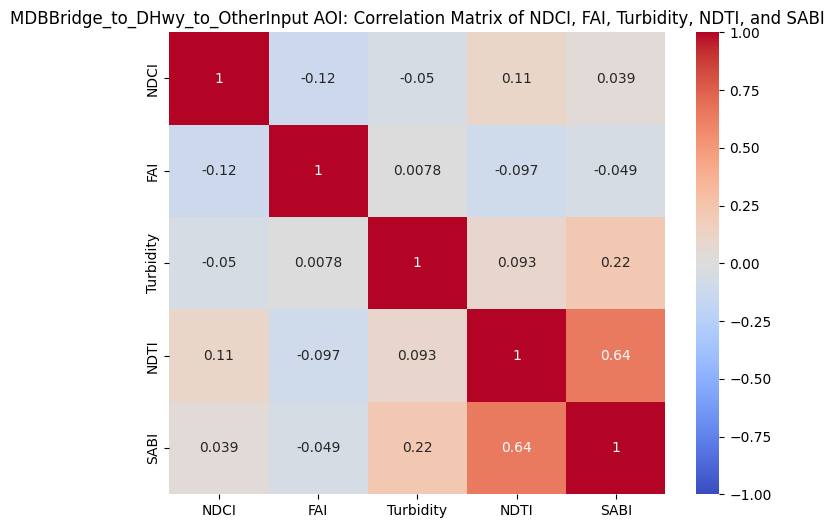

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000 -0.124181  -0.050039  0.106525  0.038977
FAI       -0.124181  1.000000   0.007794 -0.097252 -0.048769
Turbidity -0.050039  0.007794   1.000000  0.093409  0.220742
NDTI       0.106525 -0.097252   0.093409  1.000000  0.642223
SABI       0.038977 -0.048769   0.220742  0.642223  1.000000


In [260]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- MERGE CSV FILES ---

# Directory where CSV files are located
csv_dir = 'HABProject/MDBBridge_to_DHwy_to_OtherInput_Shapefile/'

# Use glob to find only CSV files that contain the word 'merged'
csv_files = glob.glob(os.path.join(csv_dir, "*merged*.csv"))

# List to store DataFrames from each CSV file
dfs = []

# Loop through each CSV file, read it, and set 'date' as index
for file in csv_files:
    try:
        # Read CSV and parse 'date' as datetime
        df = pd.read_csv(file, parse_dates=["date"])
        # Set 'date' as index
        df.set_index("date", inplace=True)
        dfs.append(df)
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Concatenate all DataFrames if any were successfully loaded
if dfs:
    combined_df = pd.concat(dfs)
    # Sort by date index
    combined_df.sort_index(inplace=True)
    # Save the combined DataFrame to a new CSV file
    combined_csv_path = os.path.join(csv_dir, "Combined_Aggregated_Data.csv")
    combined_df.to_csv(combined_csv_path)
    print(f"Combined CSV saved to {combined_csv_path}")
else:
    print("No CSV files loaded. Please check your CSV files and the directory path.")

# --- CORRELATION ANALYSIS AND HEATMAP PLOTTING ---

# Import the combined CSV as a DataFrame; ensure 'date' is read as the index
daily_MDBBridge_to_DHwy_to_OtherInput_df = pd.read_csv(
    combined_csv_path, index_col='date', parse_dates=['date']
)

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_MDBBridge_to_DHwy_to_OtherInput_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('MDBBridge_to_DHwy_to_OtherInput AOI: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')

# Save the figure
plt.savefig('HABProject/MDBBridge_to_DHwy_to_OtherInput_Shapefile/Heat_Map_MDBBridge_to_DHwy_to_OtherInput.png')
plt.show()

# Print the correlation matrix to the console
print("Correlation Matrix:\n", corr_matrix)


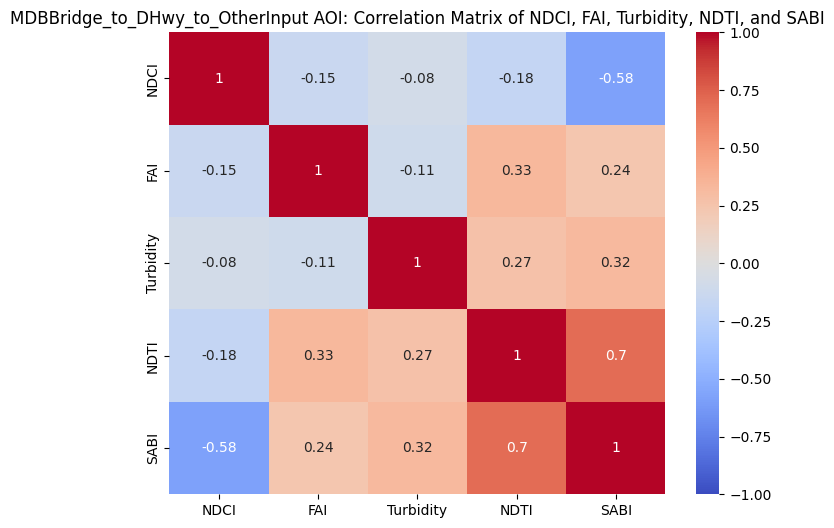

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000 -0.145305  -0.080362 -0.176636 -0.579734
FAI       -0.145305  1.000000  -0.107158  0.330141  0.237883
Turbidity -0.080362 -0.107158   1.000000  0.268724  0.321244
NDTI      -0.176636  0.330141   0.268724  1.000000  0.695821
SABI      -0.579734  0.237883   0.321244  0.695821  1.000000


<Figure size 640x480 with 0 Axes>

In [258]:
import seaborn as sns

#Import the daily cs csv as a df
daily_MDBBridge_to_DHwy_to_OtherInput_df = pd.read_csv('HABProject/Daily_Aggregated_Data_MDBBridge_to_DHwy_to_OtherInput_07012024_12312024.csv')

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_MDBBridge_to_DHwy_to_OtherInput_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plotting Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('MDBBridge_to_DHwy_to_OtherInput AOI: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')
plt.show()

# Print Correlation Matrix
plt.savefig('HABProject/Heat_Map_MDBBridge_to_DHwy_to_OtherInput_07012024_12312024.png')  # Save the figure
print("Correlation Matrix:\n", corr_matrix)

### Scatterplot

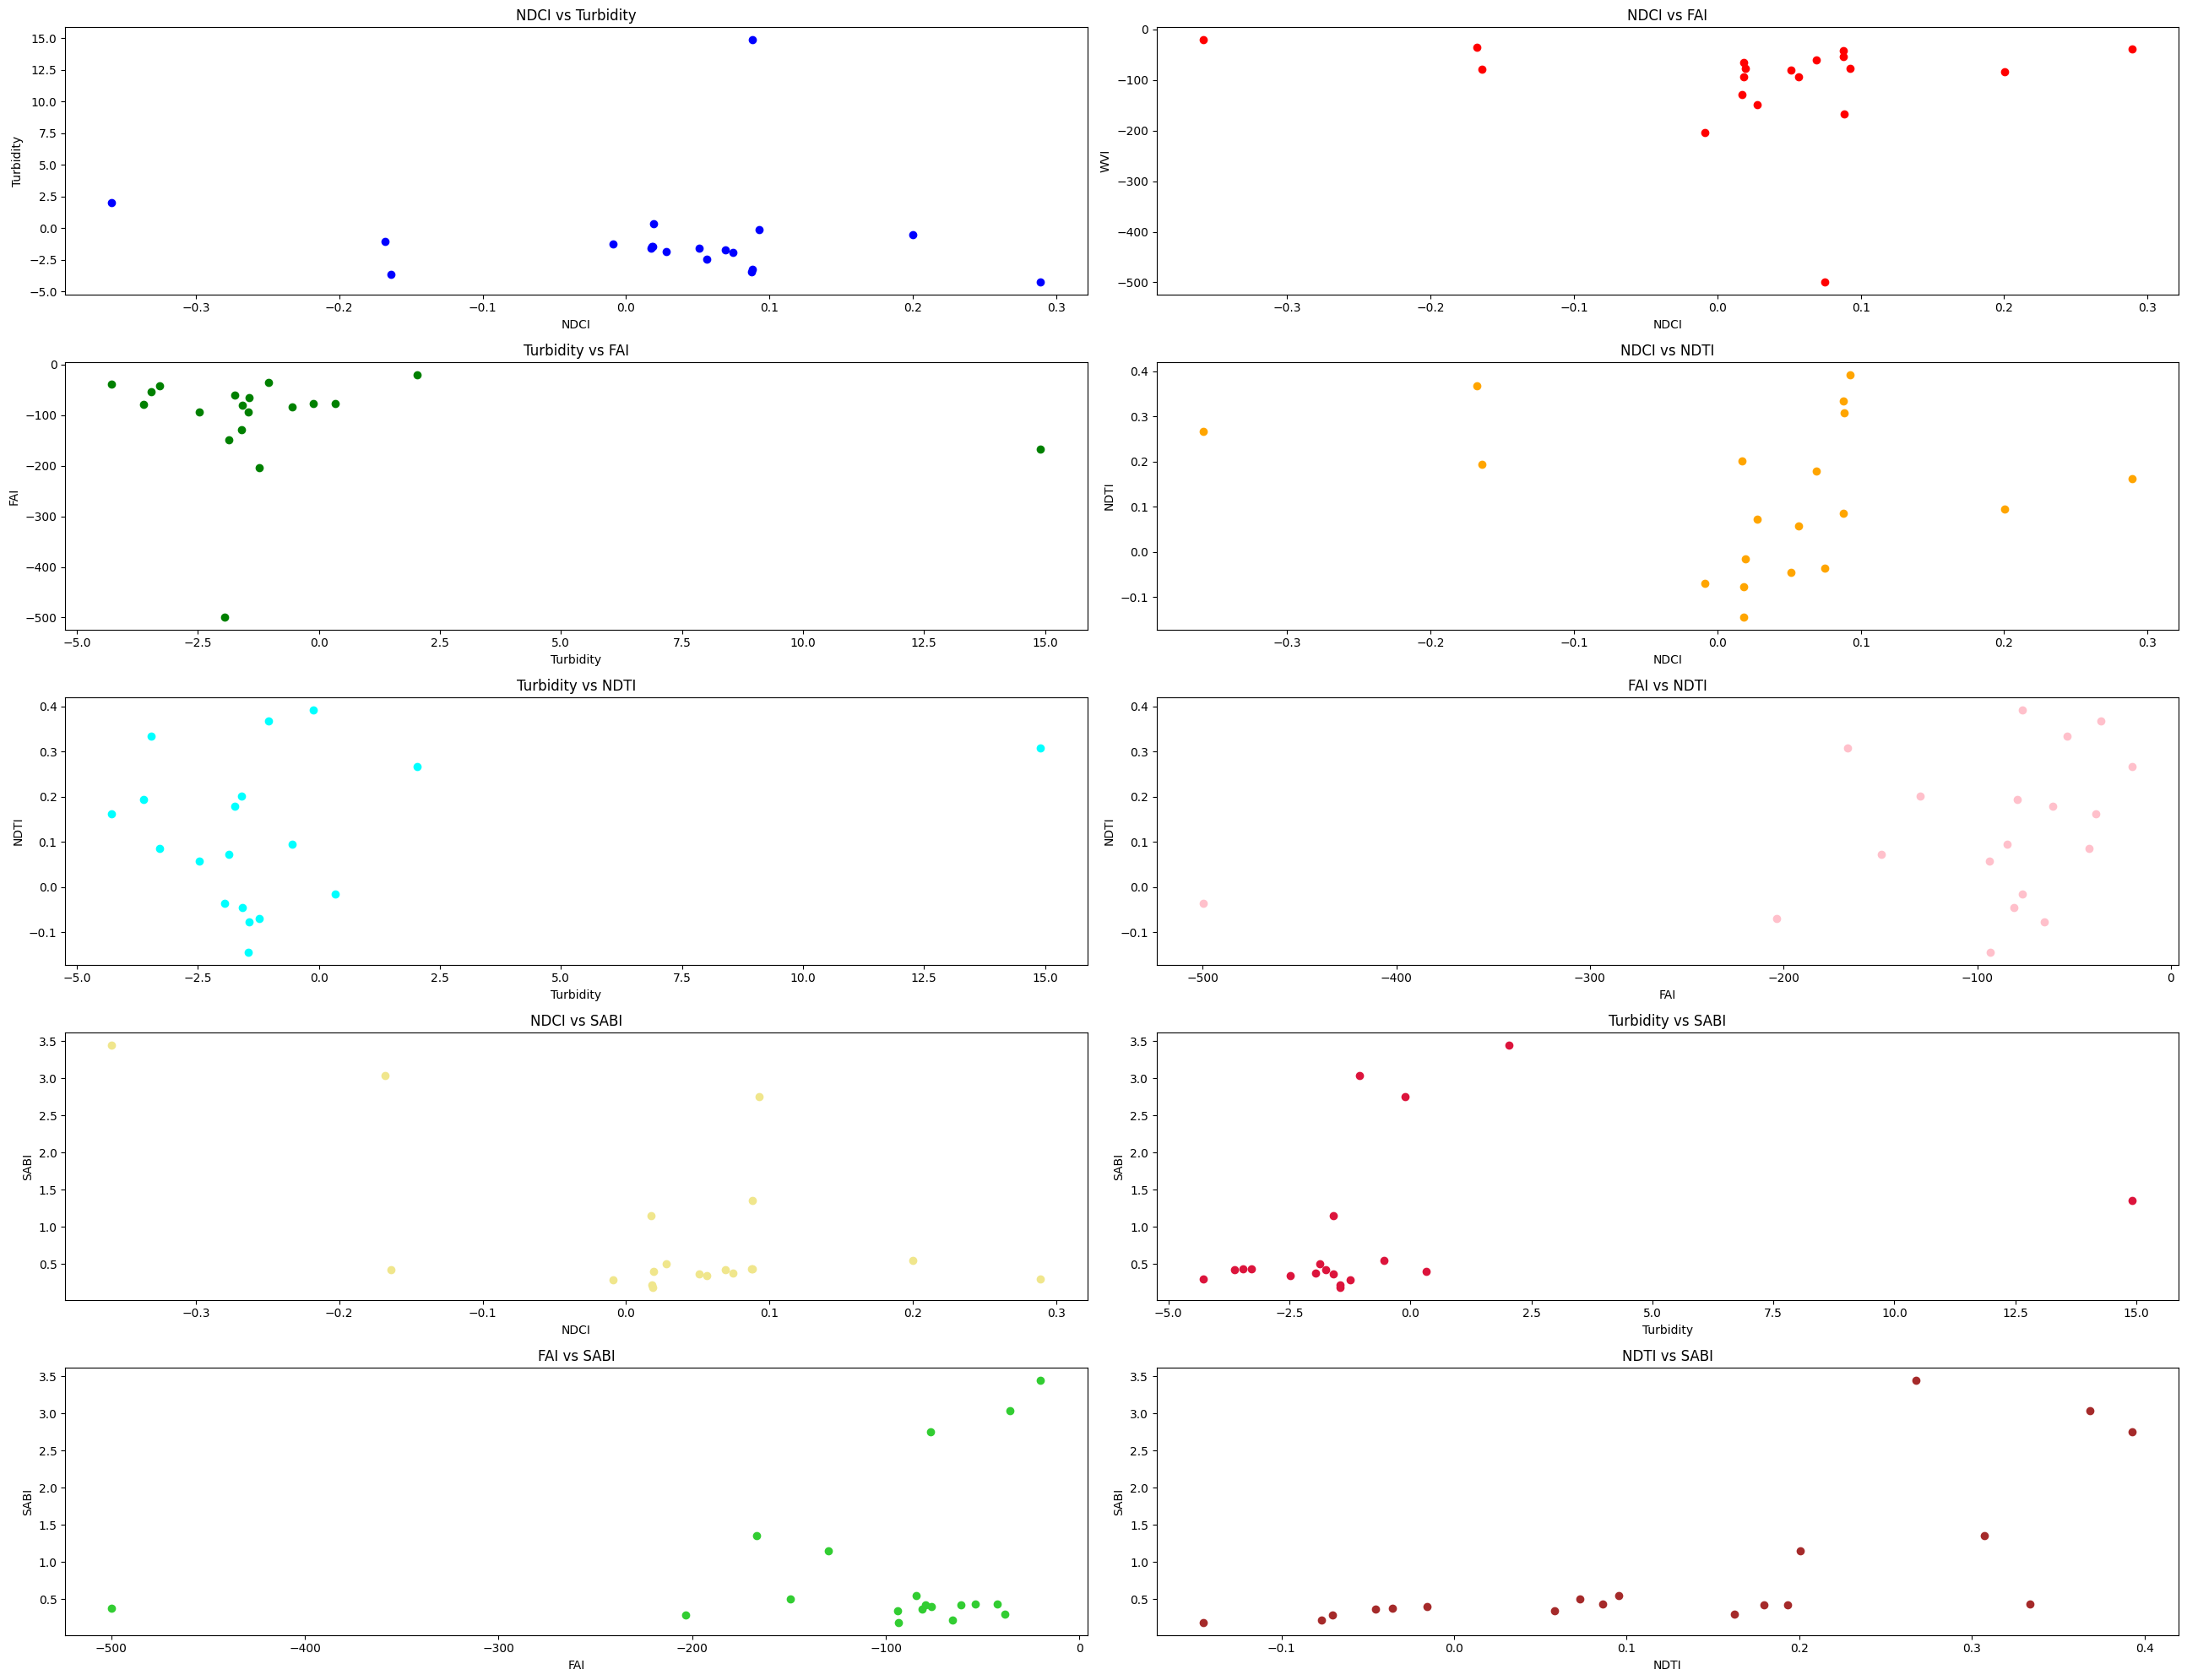

In [259]:
# Scatter Plot Analysis
fig, axs = plt.subplots(5, 2, figsize=(26, 20))

axs[0, 0].scatter(daily_MDBBridge_to_DHwy_to_OtherInput_df['NDCI'], daily_MDBBridge_to_DHwy_to_OtherInput_df['Turbidity'], c='blue')
axs[0, 0].set_xlabel('NDCI')
axs[0, 0].set_ylabel('Turbidity')
axs[0, 0].set_title('NDCI vs Turbidity')

axs[0, 1].scatter(daily_MDBBridge_to_DHwy_to_OtherInput_df['NDCI'], daily_MDBBridge_to_DHwy_to_OtherInput_df['FAI'], c='red')
axs[0, 1].set_xlabel('NDCI')
axs[0, 1].set_ylabel('WVI')
axs[0, 1].set_title('NDCI vs FAI')

axs[1, 0].scatter(daily_MDBBridge_to_DHwy_to_OtherInput_df['Turbidity'], daily_MDBBridge_to_DHwy_to_OtherInput_df['FAI'], c='green')
axs[1, 0].set_xlabel('Turbidity')
axs[1, 0].set_ylabel('FAI')
axs[1, 0].set_title('Turbidity vs FAI')

#Adding all NDTI here:

axs[1, 1].scatter(daily_MDBBridge_to_DHwy_to_OtherInput_df['NDCI'], daily_MDBBridge_to_DHwy_to_OtherInput_df['NDTI'], c='orange')
axs[1, 1].set_xlabel('NDCI')
axs[1, 1].set_ylabel('NDTI')
axs[1, 1].set_title('NDCI vs NDTI')

axs[2, 0].scatter(daily_MDBBridge_to_DHwy_to_OtherInput_df['Turbidity'], daily_MDBBridge_to_DHwy_to_OtherInput_df['NDTI'], c='cyan')
axs[2, 0].set_xlabel('Turbidity')
axs[2, 0].set_ylabel('NDTI')
axs[2, 0].set_title('Turbidity vs NDTI')

axs[2, 1].scatter(daily_MDBBridge_to_DHwy_to_OtherInput_df['FAI'], daily_MDBBridge_to_DHwy_to_OtherInput_df['NDTI'], c='pink')
axs[2, 1].set_xlabel('FAI')
axs[2, 1].set_ylabel('NDTI')
axs[2, 1].set_title('FAI vs NDTI')

#SABI Additions
axs[3, 0].scatter(daily_MDBBridge_to_DHwy_to_OtherInput_df['NDCI'], daily_MDBBridge_to_DHwy_to_OtherInput_df['SABI'], c='khaki')
axs[3, 0].set_xlabel('NDCI')
axs[3, 0].set_ylabel('SABI')
axs[3, 0].set_title('NDCI vs SABI')

axs[3, 1].scatter(daily_MDBBridge_to_DHwy_to_OtherInput_df['Turbidity'], daily_MDBBridge_to_DHwy_to_OtherInput_df['SABI'], c='crimson')
axs[3, 1].set_xlabel('Turbidity')
axs[3, 1].set_ylabel('SABI')
axs[3, 1].set_title('Turbidity vs SABI')

axs[4, 0].scatter(daily_MDBBridge_to_DHwy_to_OtherInput_df['FAI'], daily_MDBBridge_to_DHwy_to_OtherInput_df['SABI'], c='limegreen')
axs[4, 0].set_xlabel('FAI')
axs[4, 0].set_ylabel('SABI')
axs[4, 0].set_title('FAI vs SABI')

axs[4, 1].scatter(daily_MDBBridge_to_DHwy_to_OtherInput_df['NDTI'], daily_MDBBridge_to_DHwy_to_OtherInput_df['SABI'], c='brown')
axs[4, 1].set_xlabel('NDTI')
axs[4, 1].set_ylabel('SABI')
axs[4, 1].set_title('NDTI vs SABI')


plt.tight_layout()
plt.savefig('HABProject/Scatter_plot_MDBBridge_to_DHwy_to_OtherInput_07012024_12312024.png')  # Save the figure
plt.show()

# DHwy to OceanBlvd Shapefile

## 1. Ensuring the shapefile can be read

In [338]:
import geopandas as gpd

shapefile_path = 'D:/Classes/STPythonFinalProject/DixieHwy_to_OceanBlvd.shp'
gdf = gpd.read_file(shapefile_path)
print(gdf.head())

     Shape_Leng    Shape_Area  \
0  16939.873784  1.301783e+07   

                                            geometry  
0  POLYGON Z ((-8934146.539 3150465.398 0, -89341...  


#### Another testing of the shapefile, converting it so it may be used in Geemap

In [339]:
import geopandas as gpd
import shapely.geometry
import geemap

# Load your shapefile with Geopandas
shapefile_path = 'D:/Classes/STPythonFinalProject/DixieHwy_to_OceanBlvd.shp'
gdf = gpd.read_file(shapefile_path)

# Define a function to drop the Z coordinate from a geometry
def drop_z(geom):
    if geom.is_empty:
        return geom
    if geom.geom_type == 'Polygon':
        return shapely.geometry.Polygon([(x, y) for x, y, *z in geom.exterior.coords])
    elif geom.geom_type == 'MultiPolygon':
        return shapely.geometry.MultiPolygon([drop_z(poly) for poly in geom])
    else:
        return geom

# Apply the function to each geometry in your GeoDataFrame
gdf['geometry'] = gdf['geometry'].apply(drop_z)

# Now convert the GeoDataFrame to an Earth Engine FeatureCollection
aoi_fc = geemap.geopandas_to_ee(gdf)
DixieHwy_to_OceanBlvd_aoi = aoi_fc.geometry()

# Verify by printing the AOI geometry
print(DixieHwy_to_OceanBlvd_aoi.getInfo())

{'type': 'Polygon', 'coordinates': [[[-80.25680386187898, 27.215850510421244], [-80.25911692941249, 27.21345066508557], [-80.26181212589479, 27.205803267798817], [-80.26181065535269, 27.20410277339024], [-80.26009479770153, 27.202816091515462], [-80.25826473363504, 27.201383517999762], [-80.25087219263314, 27.198826558083613], [-80.24421890671958, 27.197949872635093], [-80.24126189085781, 27.200360741230536], [-80.23764775916234, 27.199776292807055], [-80.22951596486872, 27.199484067845855], [-80.22795531813237, 27.201748793656925], [-80.22442332658984, 27.20364820522341], [-80.22031635936658, 27.20481705760851], [-80.21653795006014, 27.20335599041175], [-80.21198155031033, 27.197058982909294], [-80.20949381165804, 27.19808815552213], [-80.203322425182, 27.20155294588826], [-80.2037708974095, 27.202726764987496], [-80.20546967449384, 27.207172989831047], [-80.2108600683568, 27.217787761180706], [-80.22074245725528, 27.21892907461627], [-80.22484942447855, 27.22166817835325], [-80.23460

## 2. Creation of Map and CSVs

#### Mosaic introduced, combining all images with the cloud mask from the time frame, clips it to the area of interest, and computes NDWI. 

#### Uses NDWI for the water mask, and returns the Water Masked Mosaic and the NDWI

In [340]:
import pandas as pd
import ee
import geemap

# Initialize Earth Engine (if not already initialized)
ee.Initialize()

# Assume AOI is defined (replace with your actual AOI)
# Example AOI:


# Define cloud masking function using the QA60 band
def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Define processing function:
#  - Applies cloud mask.
#  - Computes an NDWI for water detection and applies a water mask.
#  - Computes NDCI, FAI, and Turbidity indices.
#  - Clips the image to the AOI.
def process_image(image):
    # Apply cloud mask
    image = maskS2clouds(image)
    
    # Compute NDWI (using green (B3) and NIR (B8)) to isolate water pixels.
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    water_mask = ndwi.gt(0.5)  # Adjust threshold as needed
    image = image.updateMask(water_mask)
    
    # Calculate NDCI (Normalized Difference Chlorophyll Index) using B5 (red edge) and B4 (red)
    ndci = image.normalizedDifference(['B5', 'B4']).rename('NDCI')
    
    # Calculate FAI (Floating Algae Index).
    # For Sentinel-2, one common approach is:
    #   FAI = B8 - (B5 + (B11 - B5) * (137/905))
    
    #fai = image.select('B8') \
     #   .subtract(image.select('B5') \
      #            .add(image.select('B11') \
       #                .subtract(image.select('B5')) \
        #               .multiply(137/905))) \
        #.rename('FAI')

    #Naming each band as a variable
    #FAI = (Rnir - Rred) = (((Rswir - Rred)*(wavelength_nir - wavelength_red)) / (wavelength_swir - wavelength_red)))
    #Equation based on Muzfoffar et al. 2023. DOI: https://doi.org/10.3390/rs15082039
    B8 = image.select('B8') # NIR Band
    B4 = image.select('B4') # Red band
    B11 = image.select('B11') # SWIR band

    #Making a variable for each part of the equation
    diff_NIR_Red = B8.subtract(B4)
    diff_SWIR_Red = B11.subtract(B4)
    diff_WL_NIR_Red = 842 - 665
    diff_WL_SWIR_Red = 1610 - 665

    #Dealing with the fraction order of operations
    top_fraction = diff_SWIR_Red.multiply(diff_WL_NIR_Red)
    whole_fraction = top_fraction.divide(diff_WL_SWIR_Red)

    #Last bit of equation
    fai = diff_NIR_Red.add(whole_fraction).rename('FAI')

    
    
    
    # Calculate Turbidity as an additional index (optional)
    # This is an example formula; adjust as appropriate for your study.
    turbidity = image.select('B3') \
        .divide(image.select('B1')) \
        .multiply(8.93) \
        .subtract(6.39) \
        .rename('Turbidity')

    #NDTI calculation
    ndti = image.normalizedDifference(['B4', 'B3']).rename('NDTI')

     #SABI (Surface algal bloom index) calculation
    #SABI = (Red - NIR) / (Blue + Green) OR SABI = (B4 - B8) / (B2 + B3)
    B2 = image.select('B2') #Blue band
    B3 = image.select('B3') #Green band

    sabi_top = B4.subtract(B8)
    sabi_bottom = B2.add(B3)
    sabi = sabi_top.divide(sabi_bottom).rename('SABI')
    
    # Add the new bands and clip the image to the DixieHwy_to_OceanBlvd_aoi
    return image.addBands([ndci, fai, turbidity, ndti, sabi]).clip(DixieHwy_to_OceanBlvd_aoi)

# Define time frame for your analysis
start_date = '2024-01-01'
end_date   = '2024-06-30'

# Load Sentinel-2 image collection, filter by DixieHwy_to_OceanBlvd_aoi and date, and sort by cloud percentage
sentinel2 = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
             .filterBounds(DixieHwy_to_OceanBlvd_aoi)
             .filterDate(start_date, end_date)
             .sort('CLOUDY_PIXEL_PERCENTAGE'))

# Process the image collection: apply cloud and water masks, calculate indices, and clip each image to aoi_cs
processed_images = sentinel2.map(process_image)

# --- Time Series Calculation ---
# Function to calculate mean index values over the DixieHwy_to_OceanBlvd_aoi for each image
def calculate_time_series(image_collection, index_name):
    def reduce_region(image):
        stats = image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=DixieHwy_to_OceanBlvd_aoi,
            scale=10,         # 10 m resolution
            maxPixels=1e9
        )
        return ee.Feature(None, stats).set('date', image.date().format('YYYY-MM-dd'))
    time_series = image_collection.map(reduce_region)
    time_series_list = time_series.reduceColumns(
        ee.Reducer.toList(2),
        ['date', index_name]
    ).get('list').getInfo()
    return time_series_list

# Calculate time series for each index
ndci_DixieHwy_to_OceanBlvd_time_series      = calculate_time_series(processed_images, 'NDCI')
fai_DixieHwy_to_OceanBlvd_time_series       = calculate_time_series(processed_images, 'FAI')
turbidity_DixieHwy_to_OceanBlvd_time_series = calculate_time_series(processed_images, 'Turbidity')
ndti_DixieHwy_to_OceanBlvd_time_series      = calculate_time_series(processed_images, 'NDTI')
sabi_DixieHwy_to_OceanBlvd_time_series      = calculate_time_series(processed_images, 'SABI')

# Convert the time series lists to pandas DataFrames
def time_series_to_df(time_series, index_name):
    df = pd.DataFrame(time_series, columns=['date', index_name])
    df['date'] = pd.to_datetime(df['date'])
    return df

ndci_DixieHwy_to_OceanBlvd_df      = time_series_to_df(ndci_DixieHwy_to_OceanBlvd_time_series, 'NDCI')
fai_DixieHwy_to_OceanBlvd_df       = time_series_to_df(fai_DixieHwy_to_OceanBlvd_time_series, 'FAI')
turbidity_DixieHwy_to_OceanBlvd_df = time_series_to_df(turbidity_DixieHwy_to_OceanBlvd_time_series, 'Turbidity')
ndti_DixieHwy_to_OceanBlvd_df      = time_series_to_df(ndti_DixieHwy_to_OceanBlvd_time_series, 'NDTI')
sabi_DixieHwy_to_OceanBlvd_df      = time_series_to_df(sabi_DixieHwy_to_OceanBlvd_time_series, 'SABI')

# Merge the DataFrames for further analysis
merged_DixieHwy_to_OceanBlvd_df = ndci_DixieHwy_to_OceanBlvd_df.merge(fai_DixieHwy_to_OceanBlvd_df, on='date').merge(turbidity_DixieHwy_to_OceanBlvd_df, on='date').merge(ndti_DixieHwy_to_OceanBlvd_df, on='date').merge(sabi_DixieHwy_to_OceanBlvd_df, on='date')

# Save the time series data to CSV files
ndci_DixieHwy_to_OceanBlvd_df.to_csv('HABProject/NDCI_TimeSeries_DixieHwy_to_OceanBlvd_01012024_06302024.csv', index=False)
fai_DixieHwy_to_OceanBlvd_df.to_csv('HABProject/FAI_TimeSeries_DixieHwy_to_OceanBlvd_01012024_06302024.csv', index=False)
turbidity_DixieHwy_to_OceanBlvd_df.to_csv('HABProject/Turbidity_TimeSeries_DixieHwy_to_OceanBlvd_01012024_06302024.csv', index=False)
ndti_DixieHwy_to_OceanBlvd_df.to_csv('HABProject/NDTI_TimeSeries_DixieHwy_to_OceanBlvd_01012024_06302024.csv', index=False)
sabi_DixieHwy_to_OceanBlvd_df.to_csv('HABProject/SABI_TimeSeries_DixieHwy_to_OceanBlvd_01012024_06302024.csv', index=False)
merged_DixieHwy_to_OceanBlvd_df.to_csv('HABProject/Merged_TimeSeries_DixieHwy_to_OceanBlvd_01012024_06302024.csv', index=False)

# --- Map Visualization ---
Map = geemap.Map(center=[27.75, -80.25], zoom=10)

# Display the FAI band (suitable for highlighting floating algae)
Map.addLayer(processed_images.first(), 
             {'bands': ['FAI'], 'min': -0.5, 'max': 0.5, 'palette': ['blue', 'white', 'green']}, 
             'FAI')

# Display the NDCI band (using a palette to highlight chlorophyll levels)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDCI'], 'min': -0.5, 'max': 0.5, 'palette': ['yellow', 'orange', 'red']}, 
             'NDCI')

# Display the Turbidity band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['Turbidity'], 'min': -2, 'max': 20, 'palette': ['white', 'blue', 'darkblue']}, 
             'Turbidity')

# Display the NDTI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDTI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'NDTI')

# Display the SABI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['SABI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'SABI')

# Add the DixieHwy_to_OceanBlvd_aoi boundary for reference
Map.addLayer(DixieHwy_to_OceanBlvd_aoi, {}, 'DixieHwy_to_OceanBlvd_aoi', True)

Map

Map(center=[27.75, -80.25], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

## 3. Plotting Time Series of the Indices

### Messy Time Series

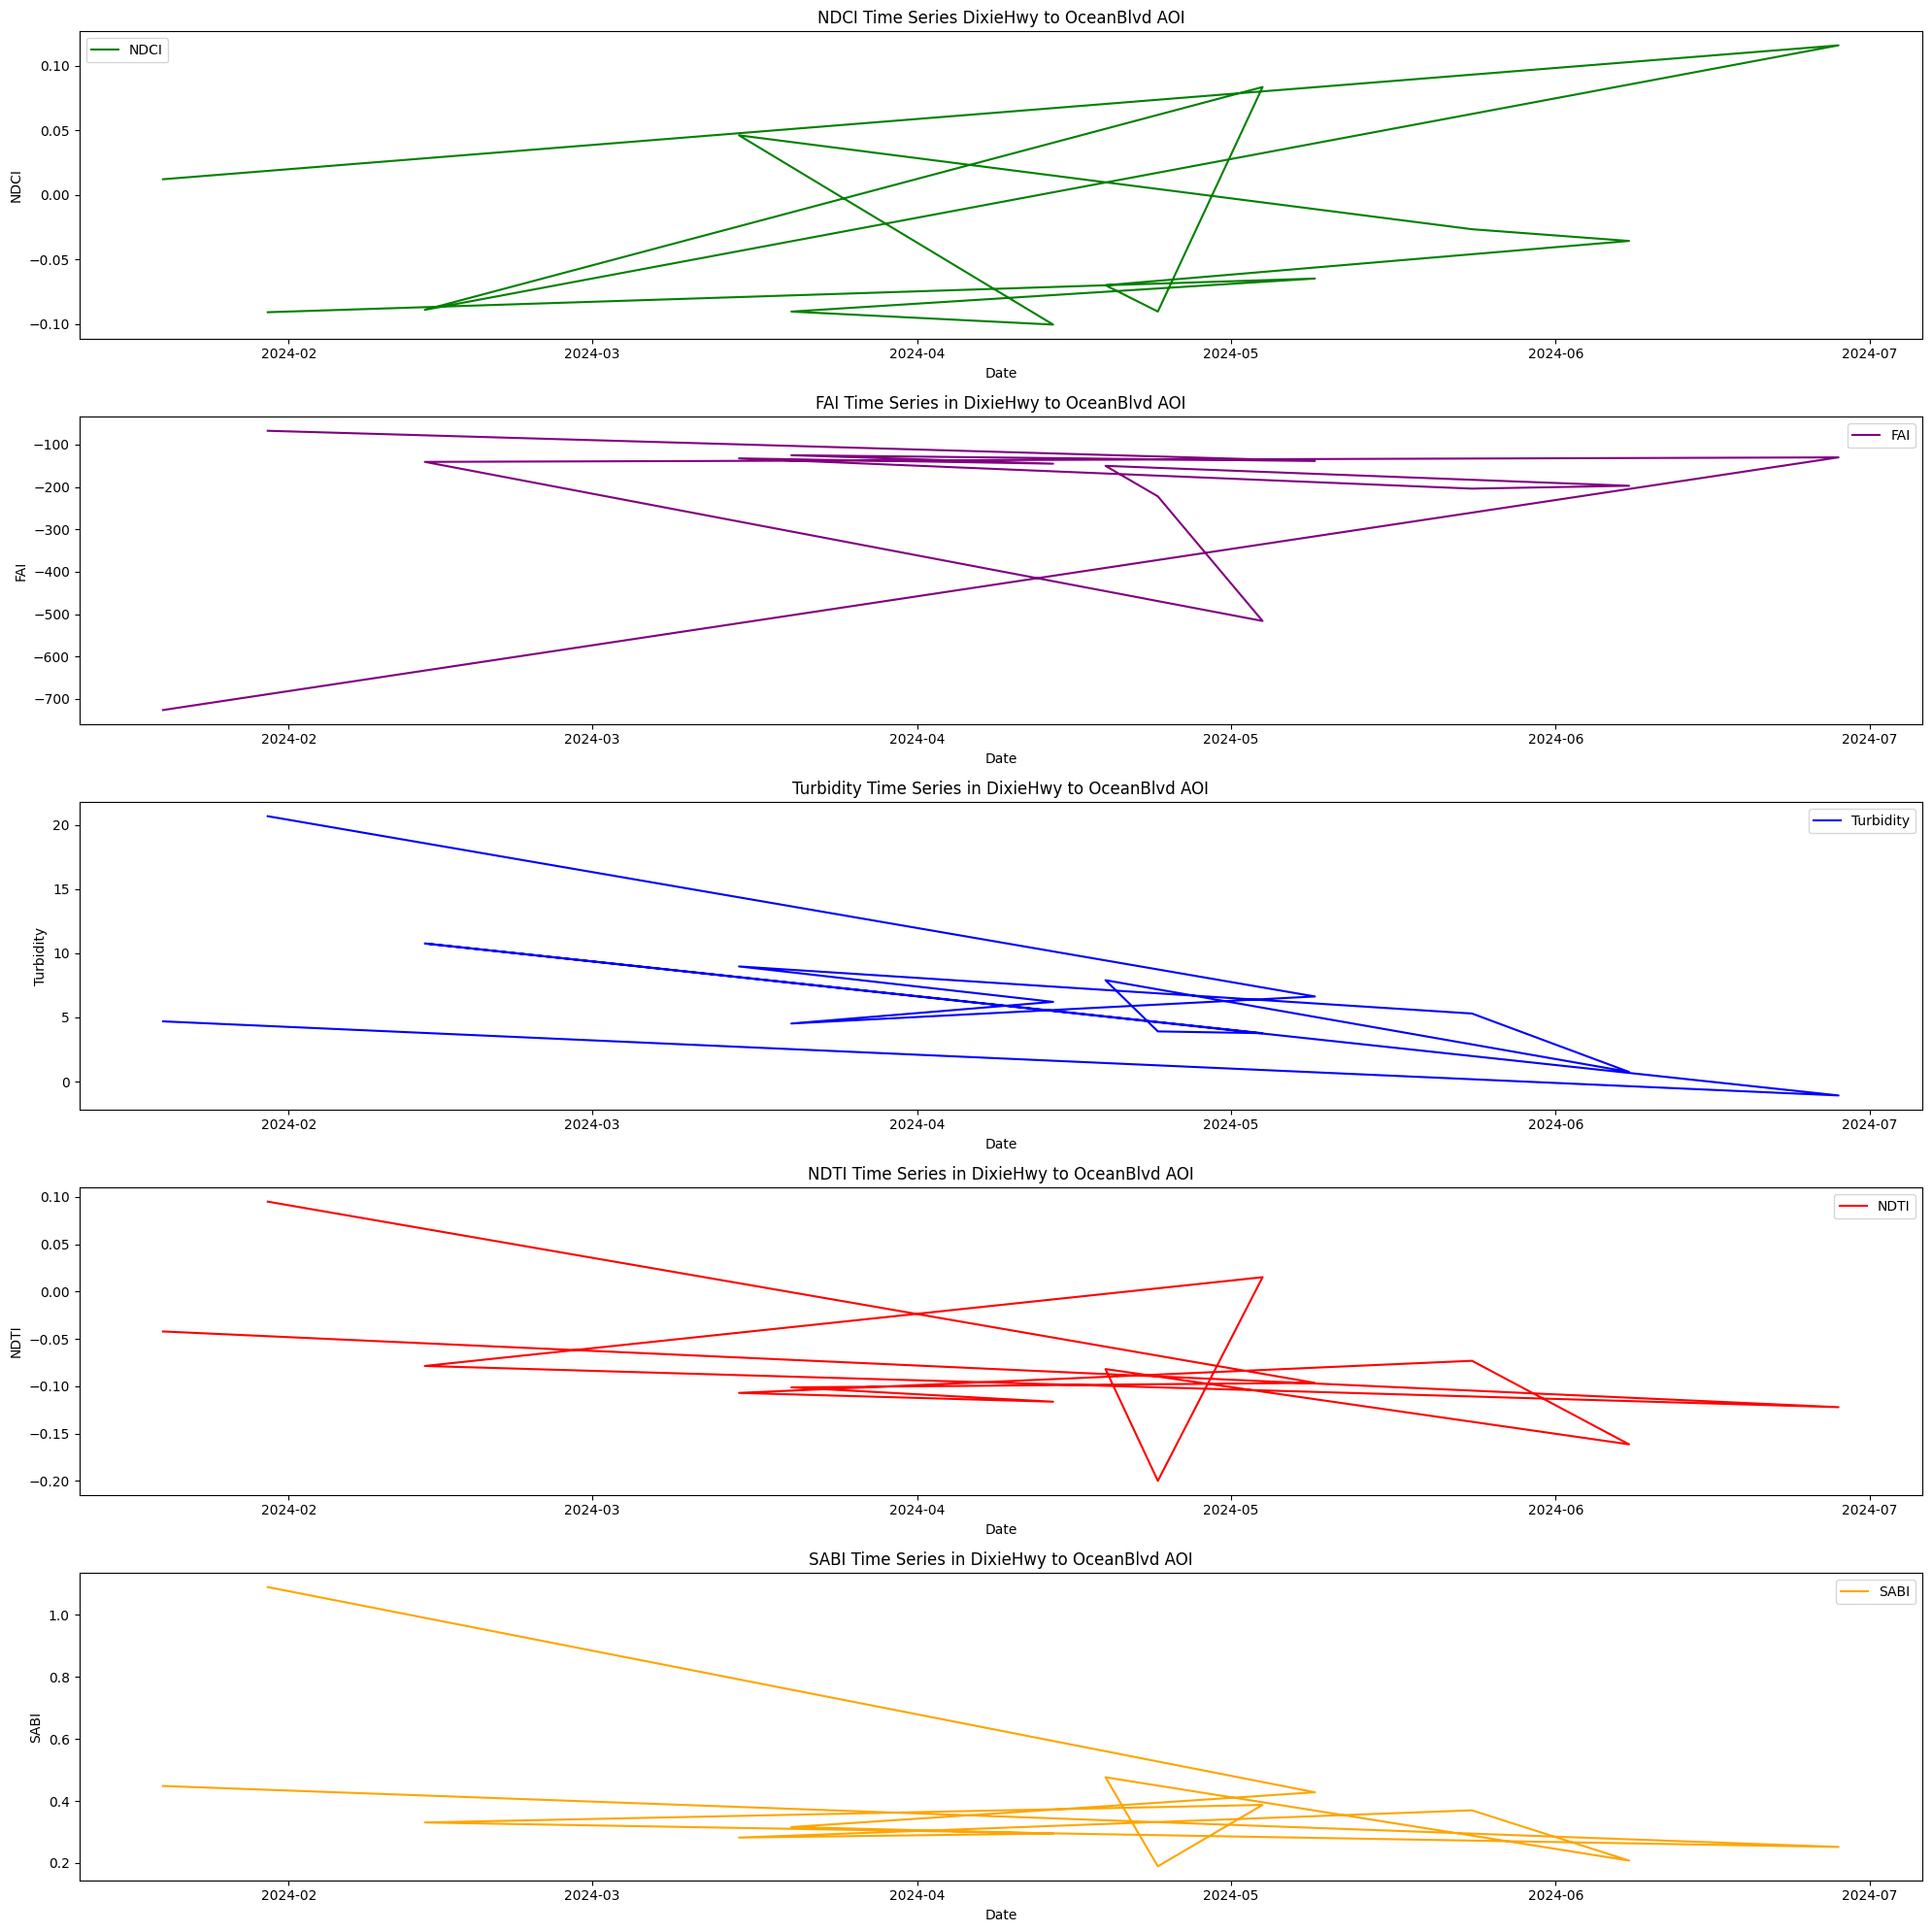

In [341]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 1, figsize=(20, 20))

# Plot NDCI time series
axs[0].plot(ndci_DixieHwy_to_OceanBlvd_df['date'], ndci_DixieHwy_to_OceanBlvd_df['NDCI'], label='NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('NDCI Time Series DixieHwy to OceanBlvd AOI')
axs[0].legend()

# Plot FAI time series (replacing WVI)
axs[1].plot(fai_DixieHwy_to_OceanBlvd_df['date'], fai_DixieHwy_to_OceanBlvd_df['FAI'], label='FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('FAI Time Series in DixieHwy to OceanBlvd AOI')
axs[1].legend()

# Plot Turbidity time series
axs[2].plot(turbidity_DixieHwy_to_OceanBlvd_df['date'], turbidity_DixieHwy_to_OceanBlvd_df['Turbidity'], label='Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Turbidity Time Series in DixieHwy to OceanBlvd AOI')
axs[2].legend()

# Plot NDCI time series
axs[3].plot(ndti_DixieHwy_to_OceanBlvd_df['date'], ndti_DixieHwy_to_OceanBlvd_df['NDTI'], label='NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('NDTI Time Series in DixieHwy to OceanBlvd AOI')
axs[3].legend()

# Plot SABI time series
axs[4].plot(sabi_DixieHwy_to_OceanBlvd_df['date'], sabi_DixieHwy_to_OceanBlvd_df['SABI'], label='SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('SABI Time Series in DixieHwy to OceanBlvd AOI')
axs[4].legend()

plt.tight_layout()
plt.show()


### Daily Time Series

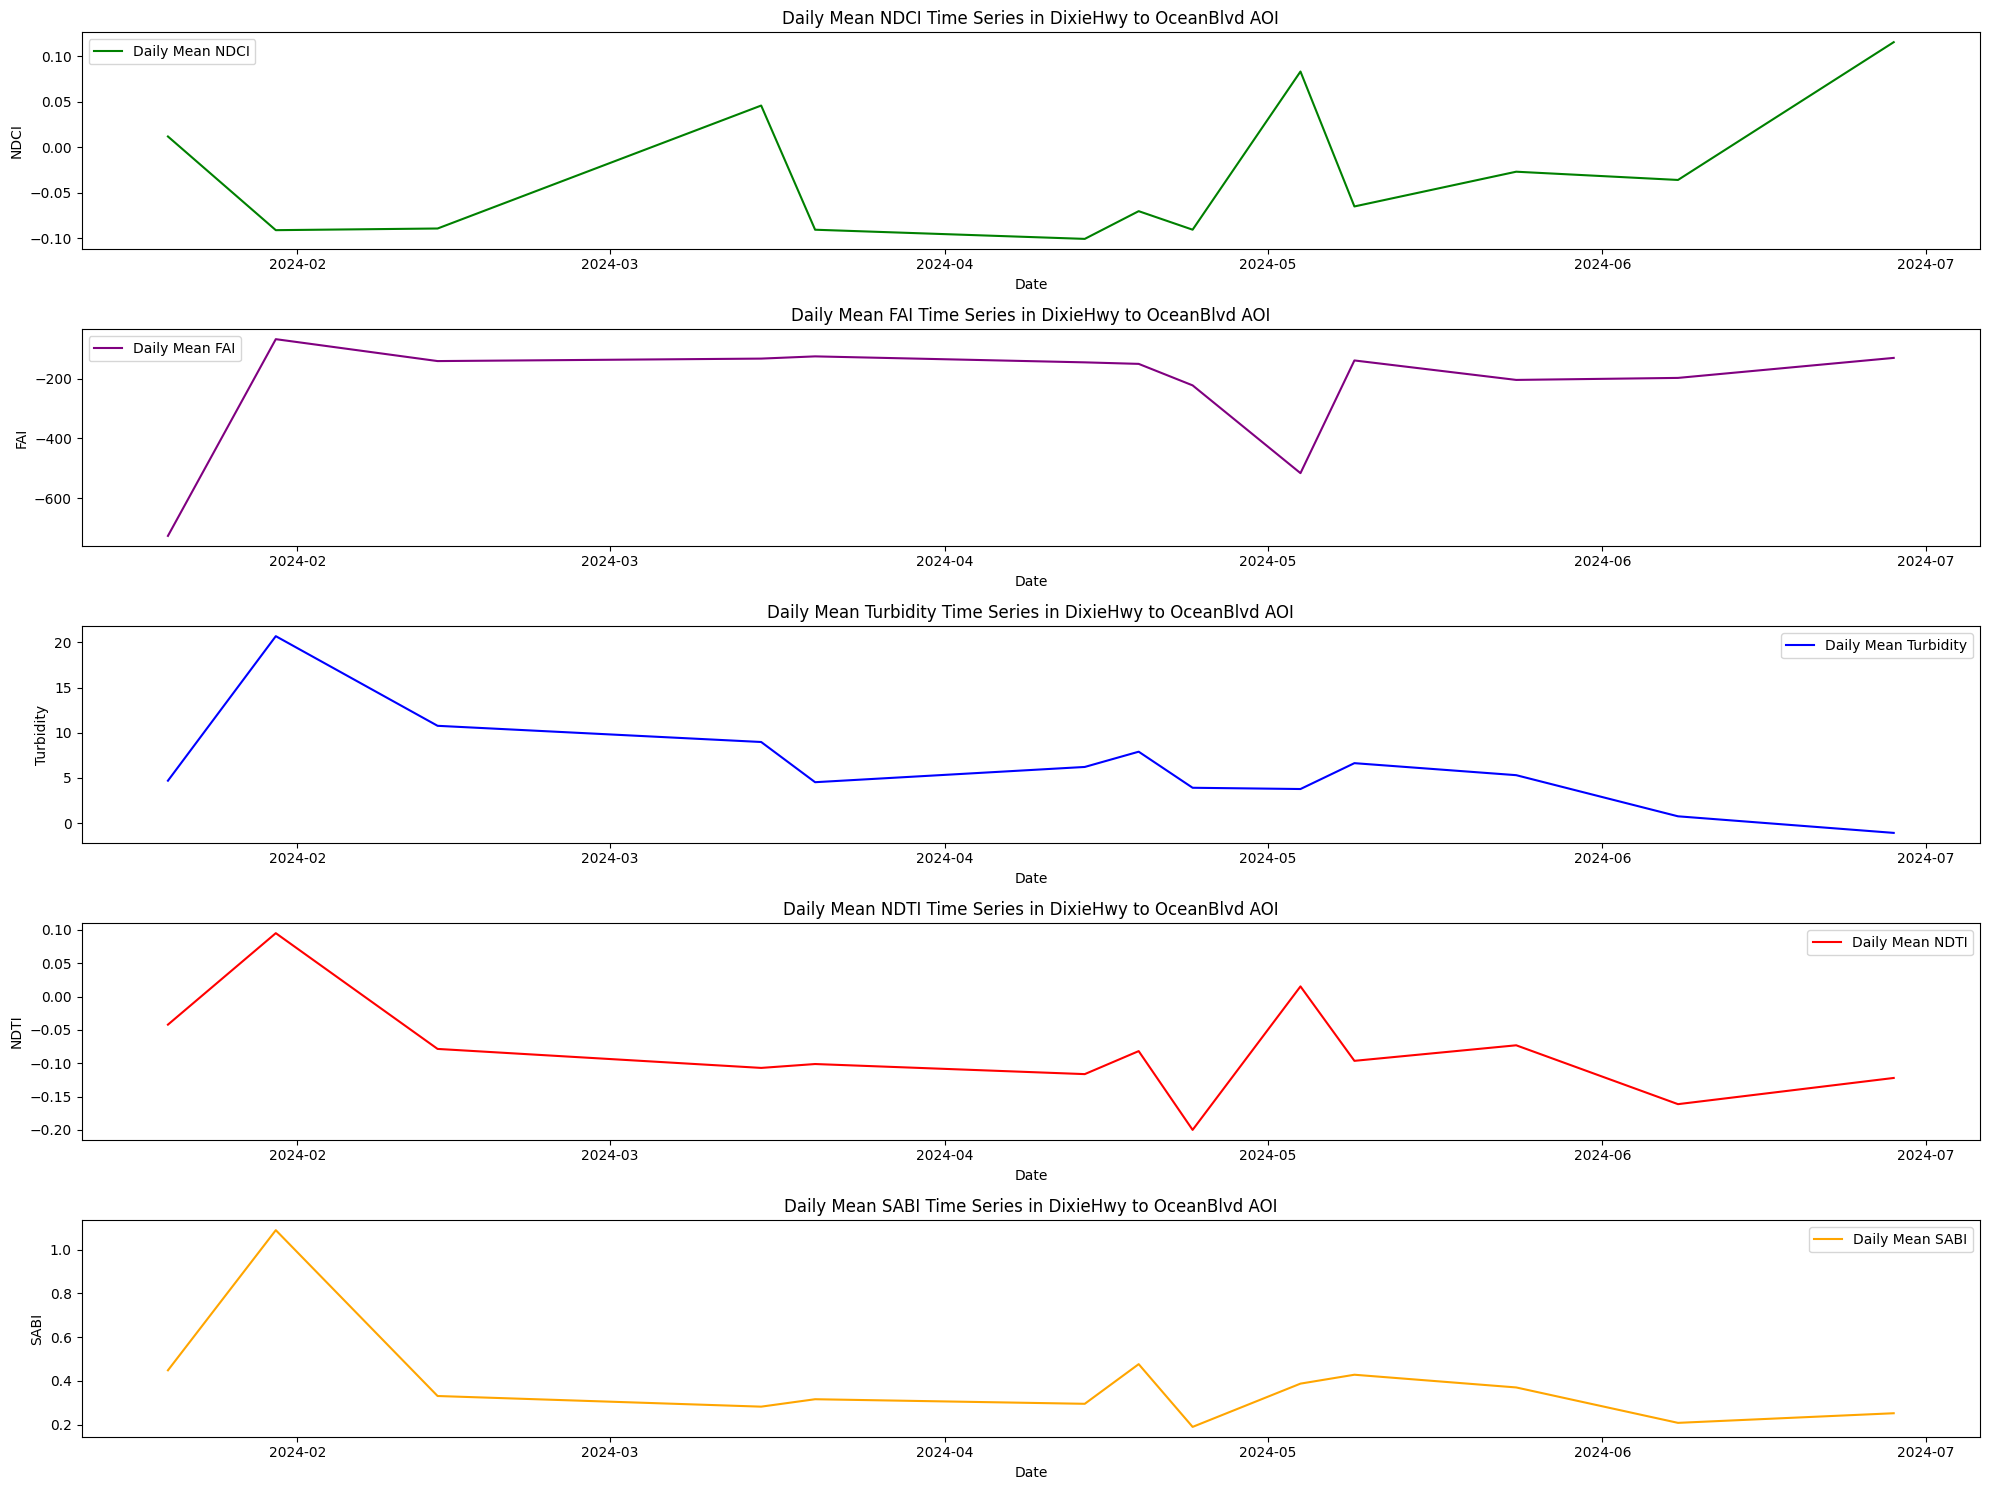

In [342]:
import matplotlib.pyplot as plt

# Compute the daily mean for each index without modifying the original data frames
ndci_daily_DixieHwy_to_OceanBlvd = ndci_DixieHwy_to_OceanBlvd_df.groupby('date', as_index=False)['NDCI'].mean()
fai_daily_DixieHwy_to_OceanBlvd = fai_DixieHwy_to_OceanBlvd_df.groupby('date', as_index=False)['FAI'].mean()
turbidity_daily_DixieHwy_to_OceanBlvd = turbidity_DixieHwy_to_OceanBlvd_df.groupby('date', as_index=False)['Turbidity'].mean()
ndti_daily_DixieHwy_to_OceanBlvd = ndti_DixieHwy_to_OceanBlvd_df.groupby('date', as_index=False)['NDTI'].mean()
sabi_daily_DixieHwy_to_OceanBlvd = sabi_DixieHwy_to_OceanBlvd_df.groupby('date', as_index=False)['SABI'].mean()

fig, axs = plt.subplots(5, 1, figsize=(20, 15))

# Plot daily mean NDCI time series
axs[0].plot(ndci_daily_DixieHwy_to_OceanBlvd['date'], ndci_daily_DixieHwy_to_OceanBlvd['NDCI'], label='Daily Mean NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('Daily Mean NDCI Time Series in DixieHwy to OceanBlvd AOI')
axs[0].legend()

# Plot daily mean FAI time series
axs[1].plot(fai_daily_DixieHwy_to_OceanBlvd['date'], fai_daily_DixieHwy_to_OceanBlvd['FAI'], label='Daily Mean FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('Daily Mean FAI Time Series in DixieHwy to OceanBlvd AOI')
axs[1].legend()

# Plot daily mean Turbidity time series
axs[2].plot(turbidity_daily_DixieHwy_to_OceanBlvd['date'], turbidity_daily_DixieHwy_to_OceanBlvd['Turbidity'], label='Daily Mean Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Daily Mean Turbidity Time Series in DixieHwy to OceanBlvd AOI')
axs[2].legend()

# Plot daily mean Turbidity time series
axs[3].plot(ndti_daily_DixieHwy_to_OceanBlvd['date'], ndti_daily_DixieHwy_to_OceanBlvd['NDTI'], label='Daily Mean NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('Daily Mean NDTI Time Series in DixieHwy to OceanBlvd AOI')
axs[3].legend()

# Plot daily mean SABI time series
axs[4].plot(sabi_daily_DixieHwy_to_OceanBlvd['date'], sabi_daily_DixieHwy_to_OceanBlvd['SABI'], label='Daily Mean SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('Daily Mean SABI Time Series in DixieHwy to OceanBlvd AOI')
axs[4].legend()

plt.tight_layout()
plt.show()

# Merge the daily aggregated data into one DataFrame
daily_aggregated_DixieHwy_to_OceanBlvd = ndci_daily_DixieHwy_to_OceanBlvd.merge(fai_daily_DixieHwy_to_OceanBlvd, on='date').merge(turbidity_daily_DixieHwy_to_OceanBlvd, on='date').merge(ndti_daily_DixieHwy_to_OceanBlvd, on='date').merge(sabi_daily_DixieHwy_to_OceanBlvd, on='date')

# Save the merged daily aggregated data to a CSV file
daily_aggregated_DixieHwy_to_OceanBlvd.to_csv('HABProject/Daily_Aggregated_Data_DixieHwy_to_OceanBlvd_01012024_06302024.csv', index=False)

### Correlation Matrix

Combined CSV saved to HABProject/DHwy_to_OceanBlvd_Shapefile/Combined_Aggregated_Data.csv


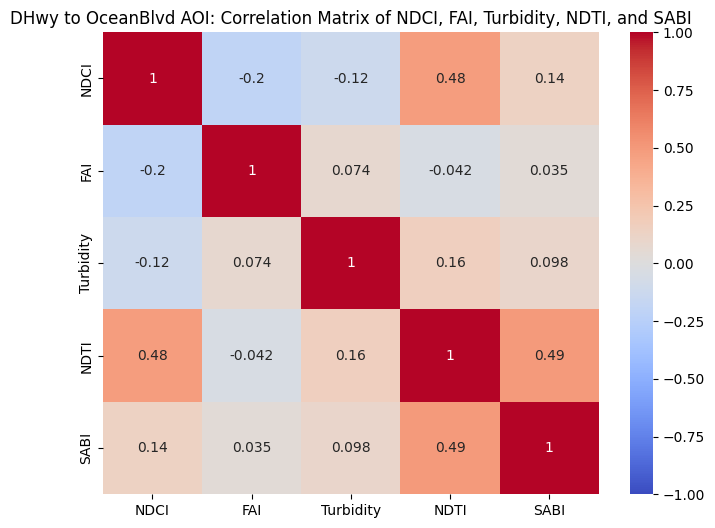

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000 -0.199573  -0.120050  0.482574  0.135639
FAI       -0.199573  1.000000   0.074286 -0.041980  0.034688
Turbidity -0.120050  0.074286   1.000000  0.162264  0.097862
NDTI       0.482574 -0.041980   0.162264  1.000000  0.492954
SABI       0.135639  0.034688   0.097862  0.492954  1.000000


In [14]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- MERGE CSV FILES ---

# Directory where CSV files are located
csv_dir = 'HABProject/DHwy_to_OceanBlvd_Shapefile/'

# Use glob to find only CSV files that contain the word 'merged'
csv_files = glob.glob(os.path.join(csv_dir, "*merged*.csv"))

# List to store DataFrames from each CSV file
dfs = []

# Loop through each CSV file, read it, and set 'date' as index
for file in csv_files:
    try:
        # Read CSV and parse 'date' as datetime
        df = pd.read_csv(file, parse_dates=["date"])
        # Set 'date' as index
        df.set_index("date", inplace=True)
        dfs.append(df)
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Concatenate all DataFrames if any were successfully loaded
if dfs:
    combined_df = pd.concat(dfs)
    # Sort by date index
    combined_df.sort_index(inplace=True)
    # Save the combined DataFrame to a new CSV file
    combined_csv_path = os.path.join(csv_dir, "Combined_Aggregated_Data.csv")
    combined_df.to_csv(combined_csv_path)
    print(f"Combined CSV saved to {combined_csv_path}")
else:
    print("No CSV files loaded. Please check your CSV files and the directory path.")

# --- CORRELATION ANALYSIS AND HEATMAP PLOTTING ---

# Import the combined CSV as a DataFrame; ensure 'date' is read as the index
daily_DHwy_to_OceanBlvd_df = pd.read_csv(
    combined_csv_path, index_col='date', parse_dates=['date']
)

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_DHwy_to_OceanBlvd_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('DHwy to OceanBlvd AOI: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')

# Save the figure
plt.savefig('HABProject/DHwy_to_OceanBlvd_Shapefile/Heat_Map_DHwy_to_OceanBlvd_Master.png')
plt.show()

# Print the correlation matrix to the console
print("Correlation Matrix:\n", corr_matrix)

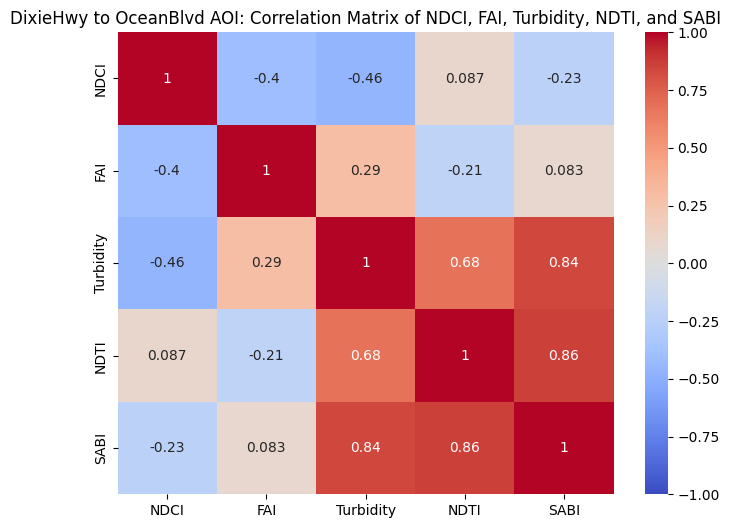

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000 -0.402911  -0.461695  0.086554 -0.229303
FAI       -0.402911  1.000000   0.294933 -0.206908  0.083127
Turbidity -0.461695  0.294933   1.000000  0.677128  0.839418
NDTI       0.086554 -0.206908   0.677128  1.000000  0.862866
SABI      -0.229303  0.083127   0.839418  0.862866  1.000000


<Figure size 640x480 with 0 Axes>

In [343]:
import seaborn as sns

#Import the daily cs csv as a df
daily_DixieHwy_to_OceanBlvd_df = pd.read_csv('HABProject/Daily_Aggregated_Data_DixieHwy_to_OceanBlvd_01012024_06302024.csv')

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_DixieHwy_to_OceanBlvd_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plotting Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('DixieHwy to OceanBlvd AOI: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')
plt.show()

# Print Correlation Matrix
plt.savefig('HABProject/Heat_Map_DixieHwy_to_OceanBlvd_01012024_06302024.png')  # Save the figure
print("Correlation Matrix:\n", corr_matrix)

### Scatterplot

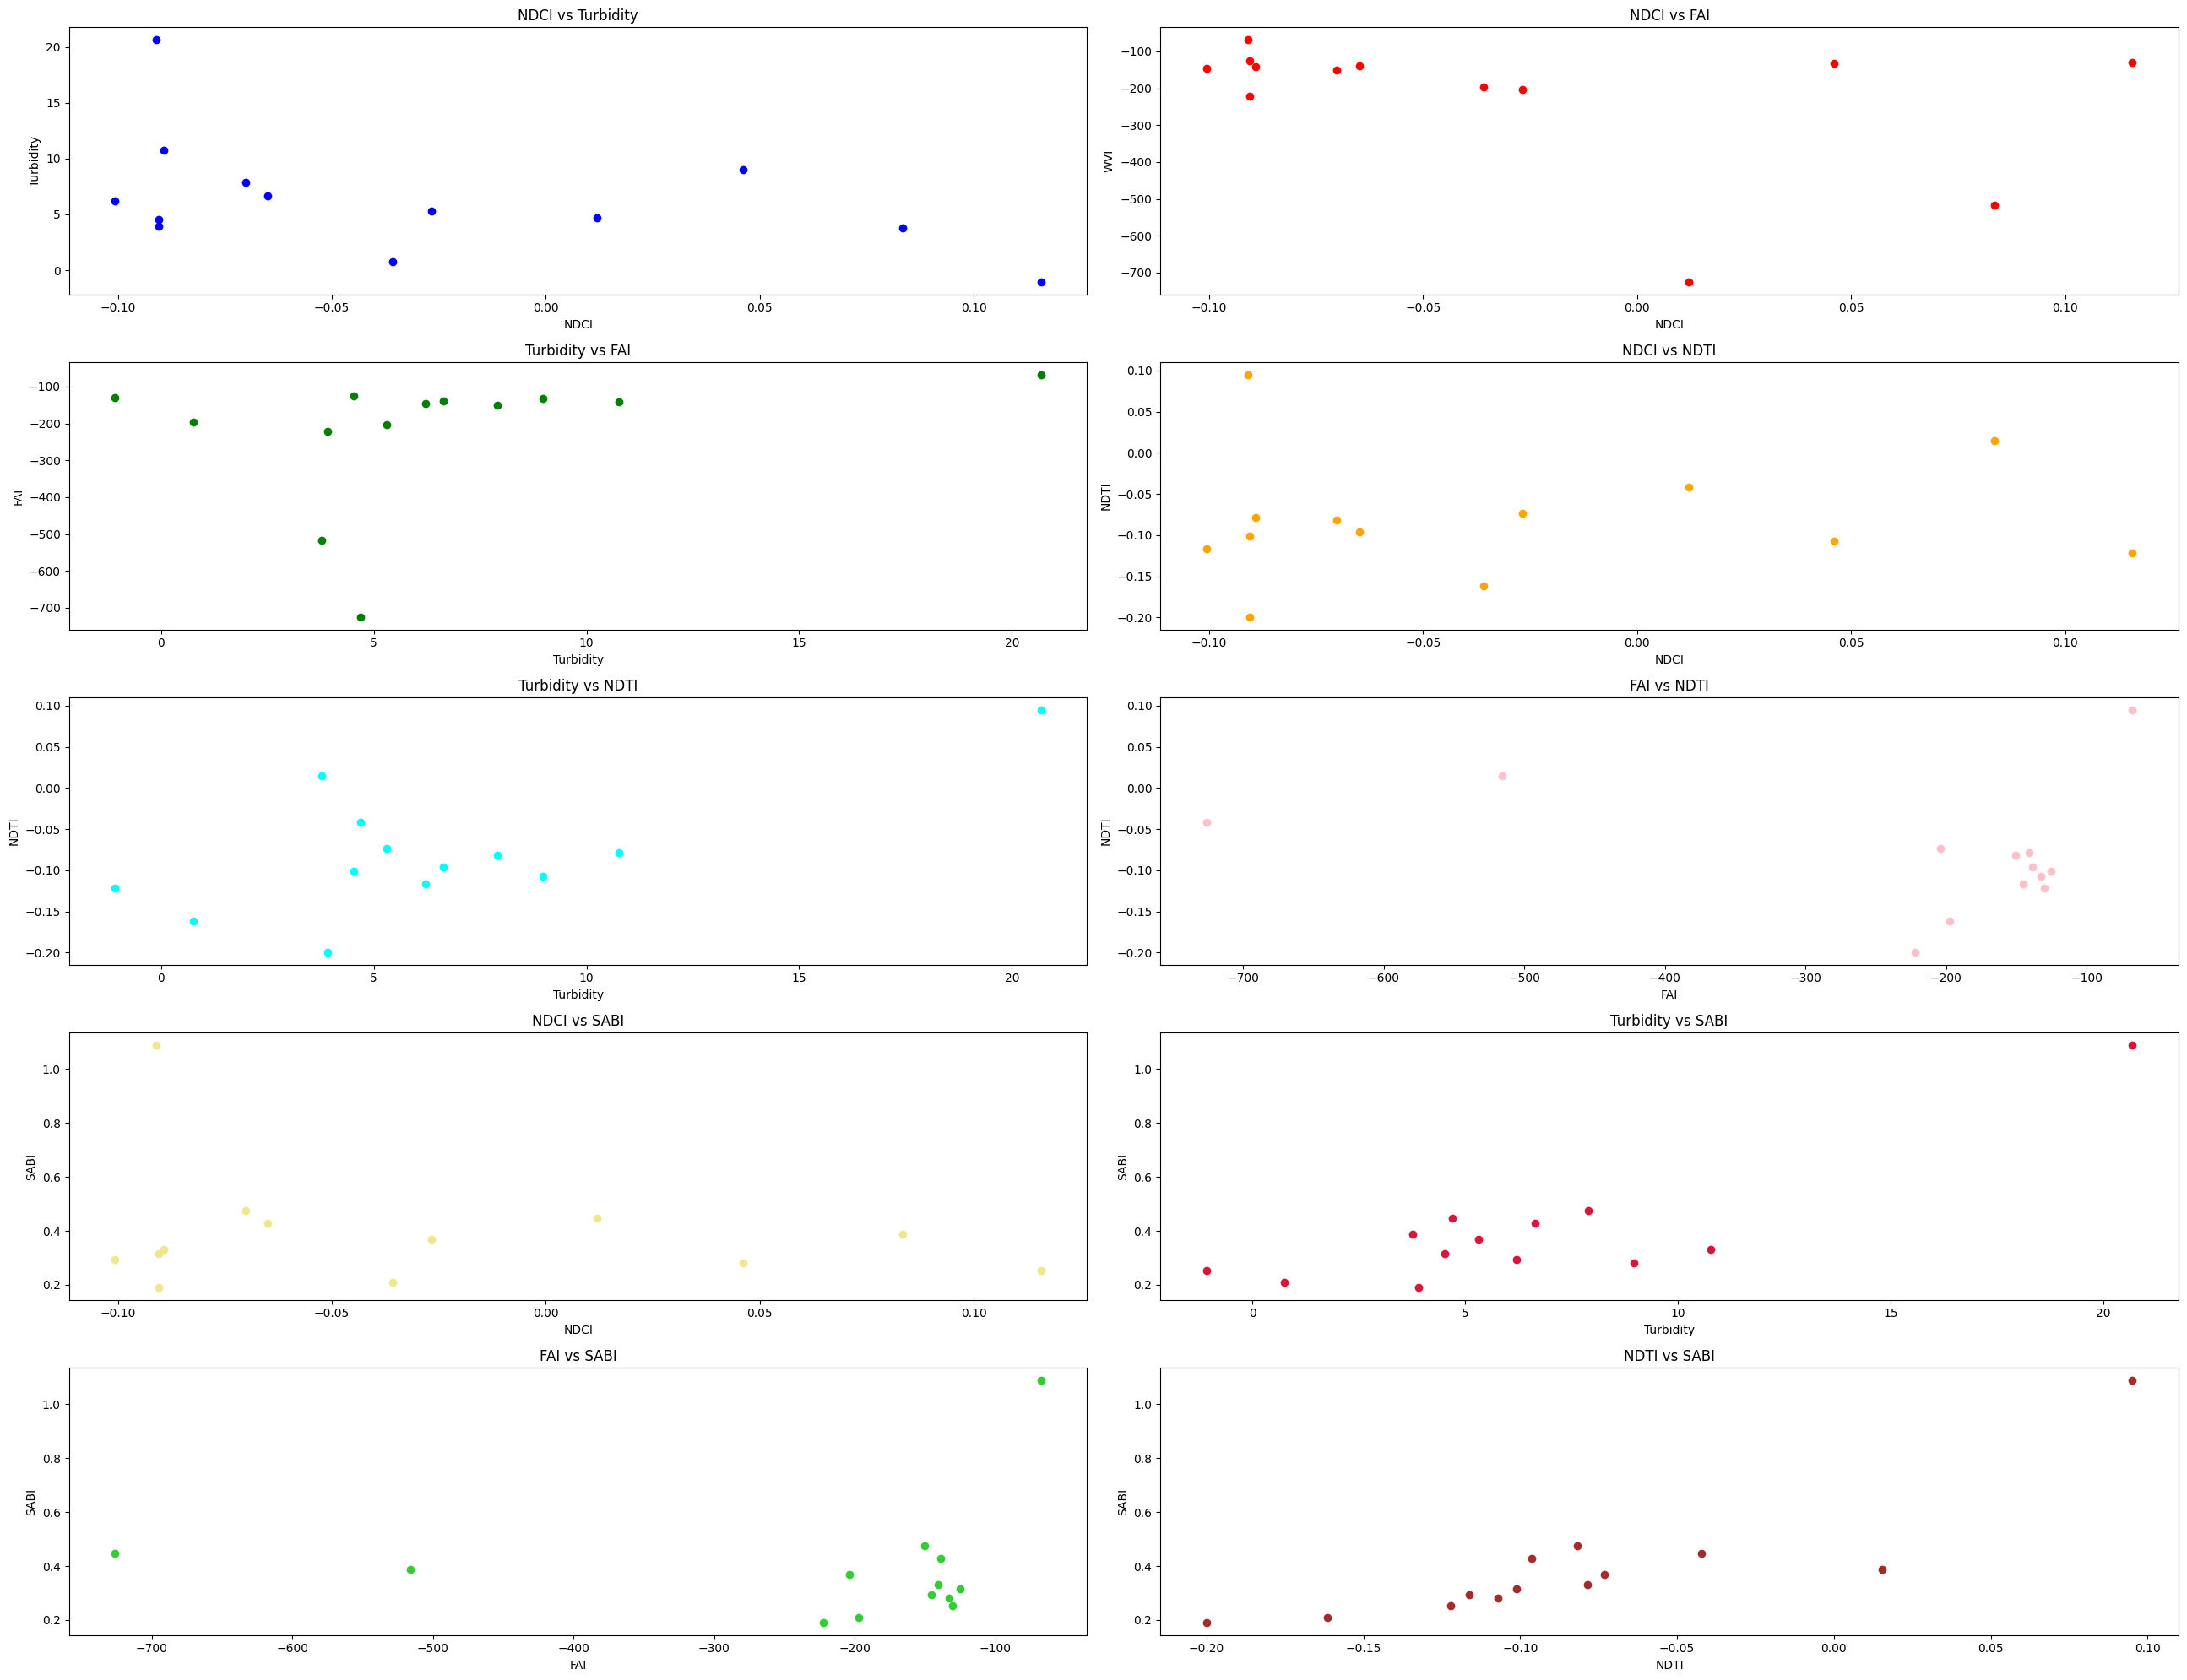

In [344]:
# Scatter Plot Analysis
fig, axs = plt.subplots(5, 2, figsize=(26, 20))

axs[0, 0].scatter(daily_DixieHwy_to_OceanBlvd_df['NDCI'], daily_DixieHwy_to_OceanBlvd_df['Turbidity'], c='blue')
axs[0, 0].set_xlabel('NDCI')
axs[0, 0].set_ylabel('Turbidity')
axs[0, 0].set_title('NDCI vs Turbidity')

axs[0, 1].scatter(daily_DixieHwy_to_OceanBlvd_df['NDCI'], daily_DixieHwy_to_OceanBlvd_df['FAI'], c='red')
axs[0, 1].set_xlabel('NDCI')
axs[0, 1].set_ylabel('WVI')
axs[0, 1].set_title('NDCI vs FAI')

axs[1, 0].scatter(daily_DixieHwy_to_OceanBlvd_df['Turbidity'], daily_DixieHwy_to_OceanBlvd_df['FAI'], c='green')
axs[1, 0].set_xlabel('Turbidity')
axs[1, 0].set_ylabel('FAI')
axs[1, 0].set_title('Turbidity vs FAI')

#Adding all NDTI here:

axs[1, 1].scatter(daily_DixieHwy_to_OceanBlvd_df['NDCI'], daily_DixieHwy_to_OceanBlvd_df['NDTI'], c='orange')
axs[1, 1].set_xlabel('NDCI')
axs[1, 1].set_ylabel('NDTI')
axs[1, 1].set_title('NDCI vs NDTI')

axs[2, 0].scatter(daily_DixieHwy_to_OceanBlvd_df['Turbidity'], daily_DixieHwy_to_OceanBlvd_df['NDTI'], c='cyan')
axs[2, 0].set_xlabel('Turbidity')
axs[2, 0].set_ylabel('NDTI')
axs[2, 0].set_title('Turbidity vs NDTI')

axs[2, 1].scatter(daily_DixieHwy_to_OceanBlvd_df['FAI'], daily_DixieHwy_to_OceanBlvd_df['NDTI'], c='pink')
axs[2, 1].set_xlabel('FAI')
axs[2, 1].set_ylabel('NDTI')
axs[2, 1].set_title('FAI vs NDTI')

#SABI Additions
axs[3, 0].scatter(daily_DixieHwy_to_OceanBlvd_df['NDCI'], daily_DixieHwy_to_OceanBlvd_df['SABI'], c='khaki')
axs[3, 0].set_xlabel('NDCI')
axs[3, 0].set_ylabel('SABI')
axs[3, 0].set_title('NDCI vs SABI')

axs[3, 1].scatter(daily_DixieHwy_to_OceanBlvd_df['Turbidity'], daily_DixieHwy_to_OceanBlvd_df['SABI'], c='crimson')
axs[3, 1].set_xlabel('Turbidity')
axs[3, 1].set_ylabel('SABI')
axs[3, 1].set_title('Turbidity vs SABI')

axs[4, 0].scatter(daily_DixieHwy_to_OceanBlvd_df['FAI'], daily_DixieHwy_to_OceanBlvd_df['SABI'], c='limegreen')
axs[4, 0].set_xlabel('FAI')
axs[4, 0].set_ylabel('SABI')
axs[4, 0].set_title('FAI vs SABI')

axs[4, 1].scatter(daily_DixieHwy_to_OceanBlvd_df['NDTI'], daily_DixieHwy_to_OceanBlvd_df['SABI'], c='brown')
axs[4, 1].set_xlabel('NDTI')
axs[4, 1].set_ylabel('SABI')
axs[4, 1].set_title('NDTI vs SABI')


plt.tight_layout()
plt.savefig('HABProject/Scatter_plot_DixieHwy_to_OceanBlvd_01012024_06302024.png')  # Save the figure
plt.show()

# OceanBlvd to Point Shapefile

## 1. Ensuring the shapefile can be read

In [79]:
import geopandas as gpd

shapefile_path = 'D:/Classes/STPythonFinalProject/OceanBlvd_to_Point.shp'
gdf = gpd.read_file(shapefile_path)
print(gdf.head())

     Shape_Leng    Shape_Area  \
0  21656.556477  9.251374e+06   

                                            geometry  
0  POLYGON Z ((-8928193.012 3148675.773 0, -89281...  


#### Another testing of the shapefile, converting it so it may be used in Geemap

In [80]:
import geopandas as gpd
import shapely.geometry
import geemap

# Load your shapefile with Geopandas
shapefile_path = 'D:/Classes/STPythonFinalProject/OceanBlvd_to_Point.shp'
gdf = gpd.read_file(shapefile_path)

# Define a function to drop the Z coordinate from a geometry
def drop_z(geom):
    if geom.is_empty:
        return geom
    if geom.geom_type == 'Polygon':
        return shapely.geometry.Polygon([(x, y) for x, y, *z in geom.exterior.coords])
    elif geom.geom_type == 'MultiPolygon':
        return shapely.geometry.MultiPolygon([drop_z(poly) for poly in geom])
    else:
        return geom

# Apply the function to each geometry in your GeoDataFrame
gdf['geometry'] = gdf['geometry'].apply(drop_z)

# Now convert the GeoDataFrame to an Earth Engine FeatureCollection
aoi_fc = geemap.geopandas_to_ee(gdf)
OceanBlvd_to_Point_aoi = aoi_fc.geometry()

# Verify by printing the AOI geometry
print(OceanBlvd_to_Point_aoi.getInfo())

{'type': 'Polygon', 'coordinates': [[[-80.203322425182, 27.20155294588826], [-80.20949381165804, 27.19808815552213], [-80.21198155031033, 27.197058982909294], [-80.21119889311903, 27.195977304572885], [-80.21243098283686, 27.192616553576833], [-80.20873471278507, 27.182752895039688], [-80.19764590173138, 27.179099466399745], [-80.20265640165394, 27.173180658228187], [-80.21087033520219, 27.172303771209755], [-80.21013108191048, 27.171134578068738], [-80.19879585309288, 27.168065386707934], [-80.1958388363328, 27.163899920952296], [-80.1988779923475, 27.159807381339174], [-80.2002743605746, 27.153522119544622], [-80.1990422708568, 27.147821226102433], [-80.19534600080499, 27.143655005308652], [-80.18877485324775, 27.141535289135742], [-80.18729634576601, 27.143874283749323], [-80.1891034111646, 27.14672486752152], [-80.19222470553562, 27.148917574725267], [-80.19279968121639, 27.156884047960606], [-80.18967838594703, 27.16214599342718], [-80.18154659165343, 27.16397300056807], [-80.1876

## 2. Creation of Map and CSVs

#### Mosaic introduced, combining all images with the cloud mask from the time frame, clips it to the area of interest, and computes NDWI. 

#### Uses NDWI for the water mask, and returns the Water Masked Mosaic and the NDWI

In [81]:
import pandas as pd
import ee
import geemap

# Initialize Earth Engine (if not already initialized)
ee.Initialize()

# Assume AOI is defined (replace with your actual AOI)
# Example AOI:


# Define cloud masking function using the QA60 band
def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Define processing function:
#  - Applies cloud mask.
#  - Computes an NDWI for water detection and applies a water mask.
#  - Computes NDCI, FAI, and Turbidity indices.
#  - Clips the image to the AOI.
def process_image(image):
    # Apply cloud mask
    image = maskS2clouds(image)
    
    # Compute NDWI (using green (B3) and NIR (B8)) to isolate water pixels.
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    water_mask = ndwi.gt(0.5)  # Adjust threshold as needed
    image = image.updateMask(water_mask)
    
    # Calculate NDCI (Normalized Difference Chlorophyll Index) using B5 (red edge) and B4 (red)
    ndci = image.normalizedDifference(['B5', 'B4']).rename('NDCI')
    
    # Calculate FAI (Floating Algae Index).
    # For Sentinel-2, one common approach is:
    #   FAI = B8 - (B5 + (B11 - B5) * (137/905))
    
    #fai = image.select('B8') \
     #   .subtract(image.select('B5') \
      #            .add(image.select('B11') \
       #                .subtract(image.select('B5')) \
        #               .multiply(137/905))) \
        #.rename('FAI')

    #Naming each band as a variable
    #FAI = (Rnir - Rred) = (((Rswir - Rred)*(wavelength_nir - wavelength_red)) / (wavelength_swir - wavelength_red)))
    #Equation based on Muzfoffar et al. 2023. DOI: https://doi.org/10.3390/rs15082039
    B8 = image.select('B8') # NIR Band
    B4 = image.select('B4') # Red band
    B11 = image.select('B11') # SWIR band

    #Making a variable for each part of the equation
    diff_NIR_Red = B8.subtract(B4)
    diff_SWIR_Red = B11.subtract(B4)
    diff_WL_NIR_Red = 842 - 665
    diff_WL_SWIR_Red = 1610 - 665

    #Dealing with the fraction order of operations
    top_fraction = diff_SWIR_Red.multiply(diff_WL_NIR_Red)
    whole_fraction = top_fraction.divide(diff_WL_SWIR_Red)

    #Last bit of equation
    fai = diff_NIR_Red.add(whole_fraction).rename('FAI')

    
    
    
    # Calculate Turbidity as an additional index (optional)
    # This is an example formula; adjust as appropriate for your study.
    turbidity = image.select('B3') \
        .divide(image.select('B1')) \
        .multiply(8.93) \
        .subtract(6.39) \
        .rename('Turbidity')

    #NDTI calculation
    ndti = image.normalizedDifference(['B4', 'B3']).rename('NDTI')

     #SABI (Surface algal bloom index) calculation
    #SABI = (Red - NIR) / (Blue + Green) OR SABI = (B4 - B8) / (B2 + B3)
    B2 = image.select('B2') #Blue band
    B3 = image.select('B3') #Green band

    sabi_top = B4.subtract(B8)
    sabi_bottom = B2.add(B3)
    sabi = sabi_top.divide(sabi_bottom).rename('SABI')
    
    # Add the new bands and clip the image to the OceanBlvd_to_Point_aoi
    return image.addBands([ndci, fai, turbidity, ndti, sabi]).clip(OceanBlvd_to_Point_aoi)

# Define time frame for your analysis
start_date = '2024-07-01'
end_date   = '2024-12-31'

# Load Sentinel-2 image collection, filter by OceanBlvd_to_Point_aoi and date, and sort by cloud percentage
sentinel2 = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
             .filterBounds(OceanBlvd_to_Point_aoi)
             .filterDate(start_date, end_date)
             .sort('CLOUDY_PIXEL_PERCENTAGE'))

# Process the image collection: apply cloud and water masks, calculate indices, and clip each image to aoi_cs
processed_images = sentinel2.map(process_image)

# --- Time Series Calculation ---
# Function to calculate mean index values over the OceanBlvd_to_Point_aoi for each image
def calculate_time_series(image_collection, index_name):
    def reduce_region(image):
        stats = image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=OceanBlvd_to_Point_aoi,
            scale=10,         # 10 m resolution
            maxPixels=1e9
        )
        return ee.Feature(None, stats).set('date', image.date().format('YYYY-MM-dd'))
    time_series = image_collection.map(reduce_region)
    time_series_list = time_series.reduceColumns(
        ee.Reducer.toList(2),
        ['date', index_name]
    ).get('list').getInfo()
    return time_series_list

# Calculate time series for each index
ndci_OceanBlvd_to_Point_time_series      = calculate_time_series(processed_images, 'NDCI')
fai_OceanBlvd_to_Point_time_series       = calculate_time_series(processed_images, 'FAI')
turbidity_OceanBlvd_to_Point_time_series = calculate_time_series(processed_images, 'Turbidity')
ndti_OceanBlvd_to_Point_time_series      = calculate_time_series(processed_images, 'NDTI')
sabi_OceanBlvd_to_Point_time_series      = calculate_time_series(processed_images, 'SABI')

# Convert the time series lists to pandas DataFrames
def time_series_to_df(time_series, index_name):
    df = pd.DataFrame(time_series, columns=['date', index_name])
    df['date'] = pd.to_datetime(df['date'])
    return df

ndci_OceanBlvd_to_Point_df      = time_series_to_df(ndci_OceanBlvd_to_Point_time_series, 'NDCI')
fai_OceanBlvd_to_Point_df       = time_series_to_df(fai_OceanBlvd_to_Point_time_series, 'FAI')
turbidity_OceanBlvd_to_Point_df = time_series_to_df(turbidity_OceanBlvd_to_Point_time_series, 'Turbidity')
ndti_OceanBlvd_to_Point_df      = time_series_to_df(ndti_OceanBlvd_to_Point_time_series, 'NDTI')
sabi_OceanBlvd_to_Point_df      = time_series_to_df(sabi_OceanBlvd_to_Point_time_series, 'SABI')

# Merge the DataFrames for further analysis
merged_OceanBlvd_to_Point_df = ndci_OceanBlvd_to_Point_df.merge(fai_OceanBlvd_to_Point_df, on='date').merge(turbidity_OceanBlvd_to_Point_df, on='date').merge(ndti_OceanBlvd_to_Point_df, on='date').merge(sabi_OceanBlvd_to_Point_df, on='date')

# Save the time series data to CSV files
ndci_OceanBlvd_to_Point_df.to_csv('HABProject/NDCI_TimeSeries_OceanBlvd_to_Point_07012024_12312024.csv', index=False)
fai_OceanBlvd_to_Point_df.to_csv('HABProject/FAI_TimeSeries_OceanBlvd_to_Point_07012024_12312024.csv', index=False)
turbidity_OceanBlvd_to_Point_df.to_csv('HABProject/Turbidity_TimeSeries_OceanBlvd_to_Point_07012024_12312024.csv', index=False)
ndti_OceanBlvd_to_Point_df.to_csv('HABProject/NDTI_TimeSeries_OceanBlvd_to_Point_07012024_12312024.csv', index=False)
sabi_OceanBlvd_to_Point_df.to_csv('HABProject/SABI_TimeSeries_OceanBlvd_to_Point_07012024_12312024.csv', index=False)
merged_OceanBlvd_to_Point_df.to_csv('HABProject/Merged_TimeSeries_OceanBlvd_to_Point_07012024_12312024.csv', index=False)

# --- Map Visualization ---
Map = geemap.Map(center=[27.75, -80.25], zoom=10)

# Display the FAI band (suitable for highlighting floating algae)
Map.addLayer(processed_images.first(), 
             {'bands': ['FAI'], 'min': -0.5, 'max': 0.5, 'palette': ['blue', 'white', 'green']}, 
             'FAI')

# Display the NDCI band (using a palette to highlight chlorophyll levels)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDCI'], 'min': -0.5, 'max': 0.5, 'palette': ['yellow', 'orange', 'red']}, 
             'NDCI')

# Display the Turbidity band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['Turbidity'], 'min': -2, 'max': 20, 'palette': ['white', 'blue', 'darkblue']}, 
             'Turbidity')

# Display the NDTI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDTI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'NDTI')

# Display the SABI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['SABI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'SABI')

# Add the OceanBlvd_to_Point_aoi boundary for reference
Map.addLayer(OceanBlvd_to_Point_aoi, {}, 'OceanBlvd_to_Point_aoi', True)

Map

Map(center=[27.75, -80.25], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

## 3. Plotting Time Series of the Indices

### Messy Time Series

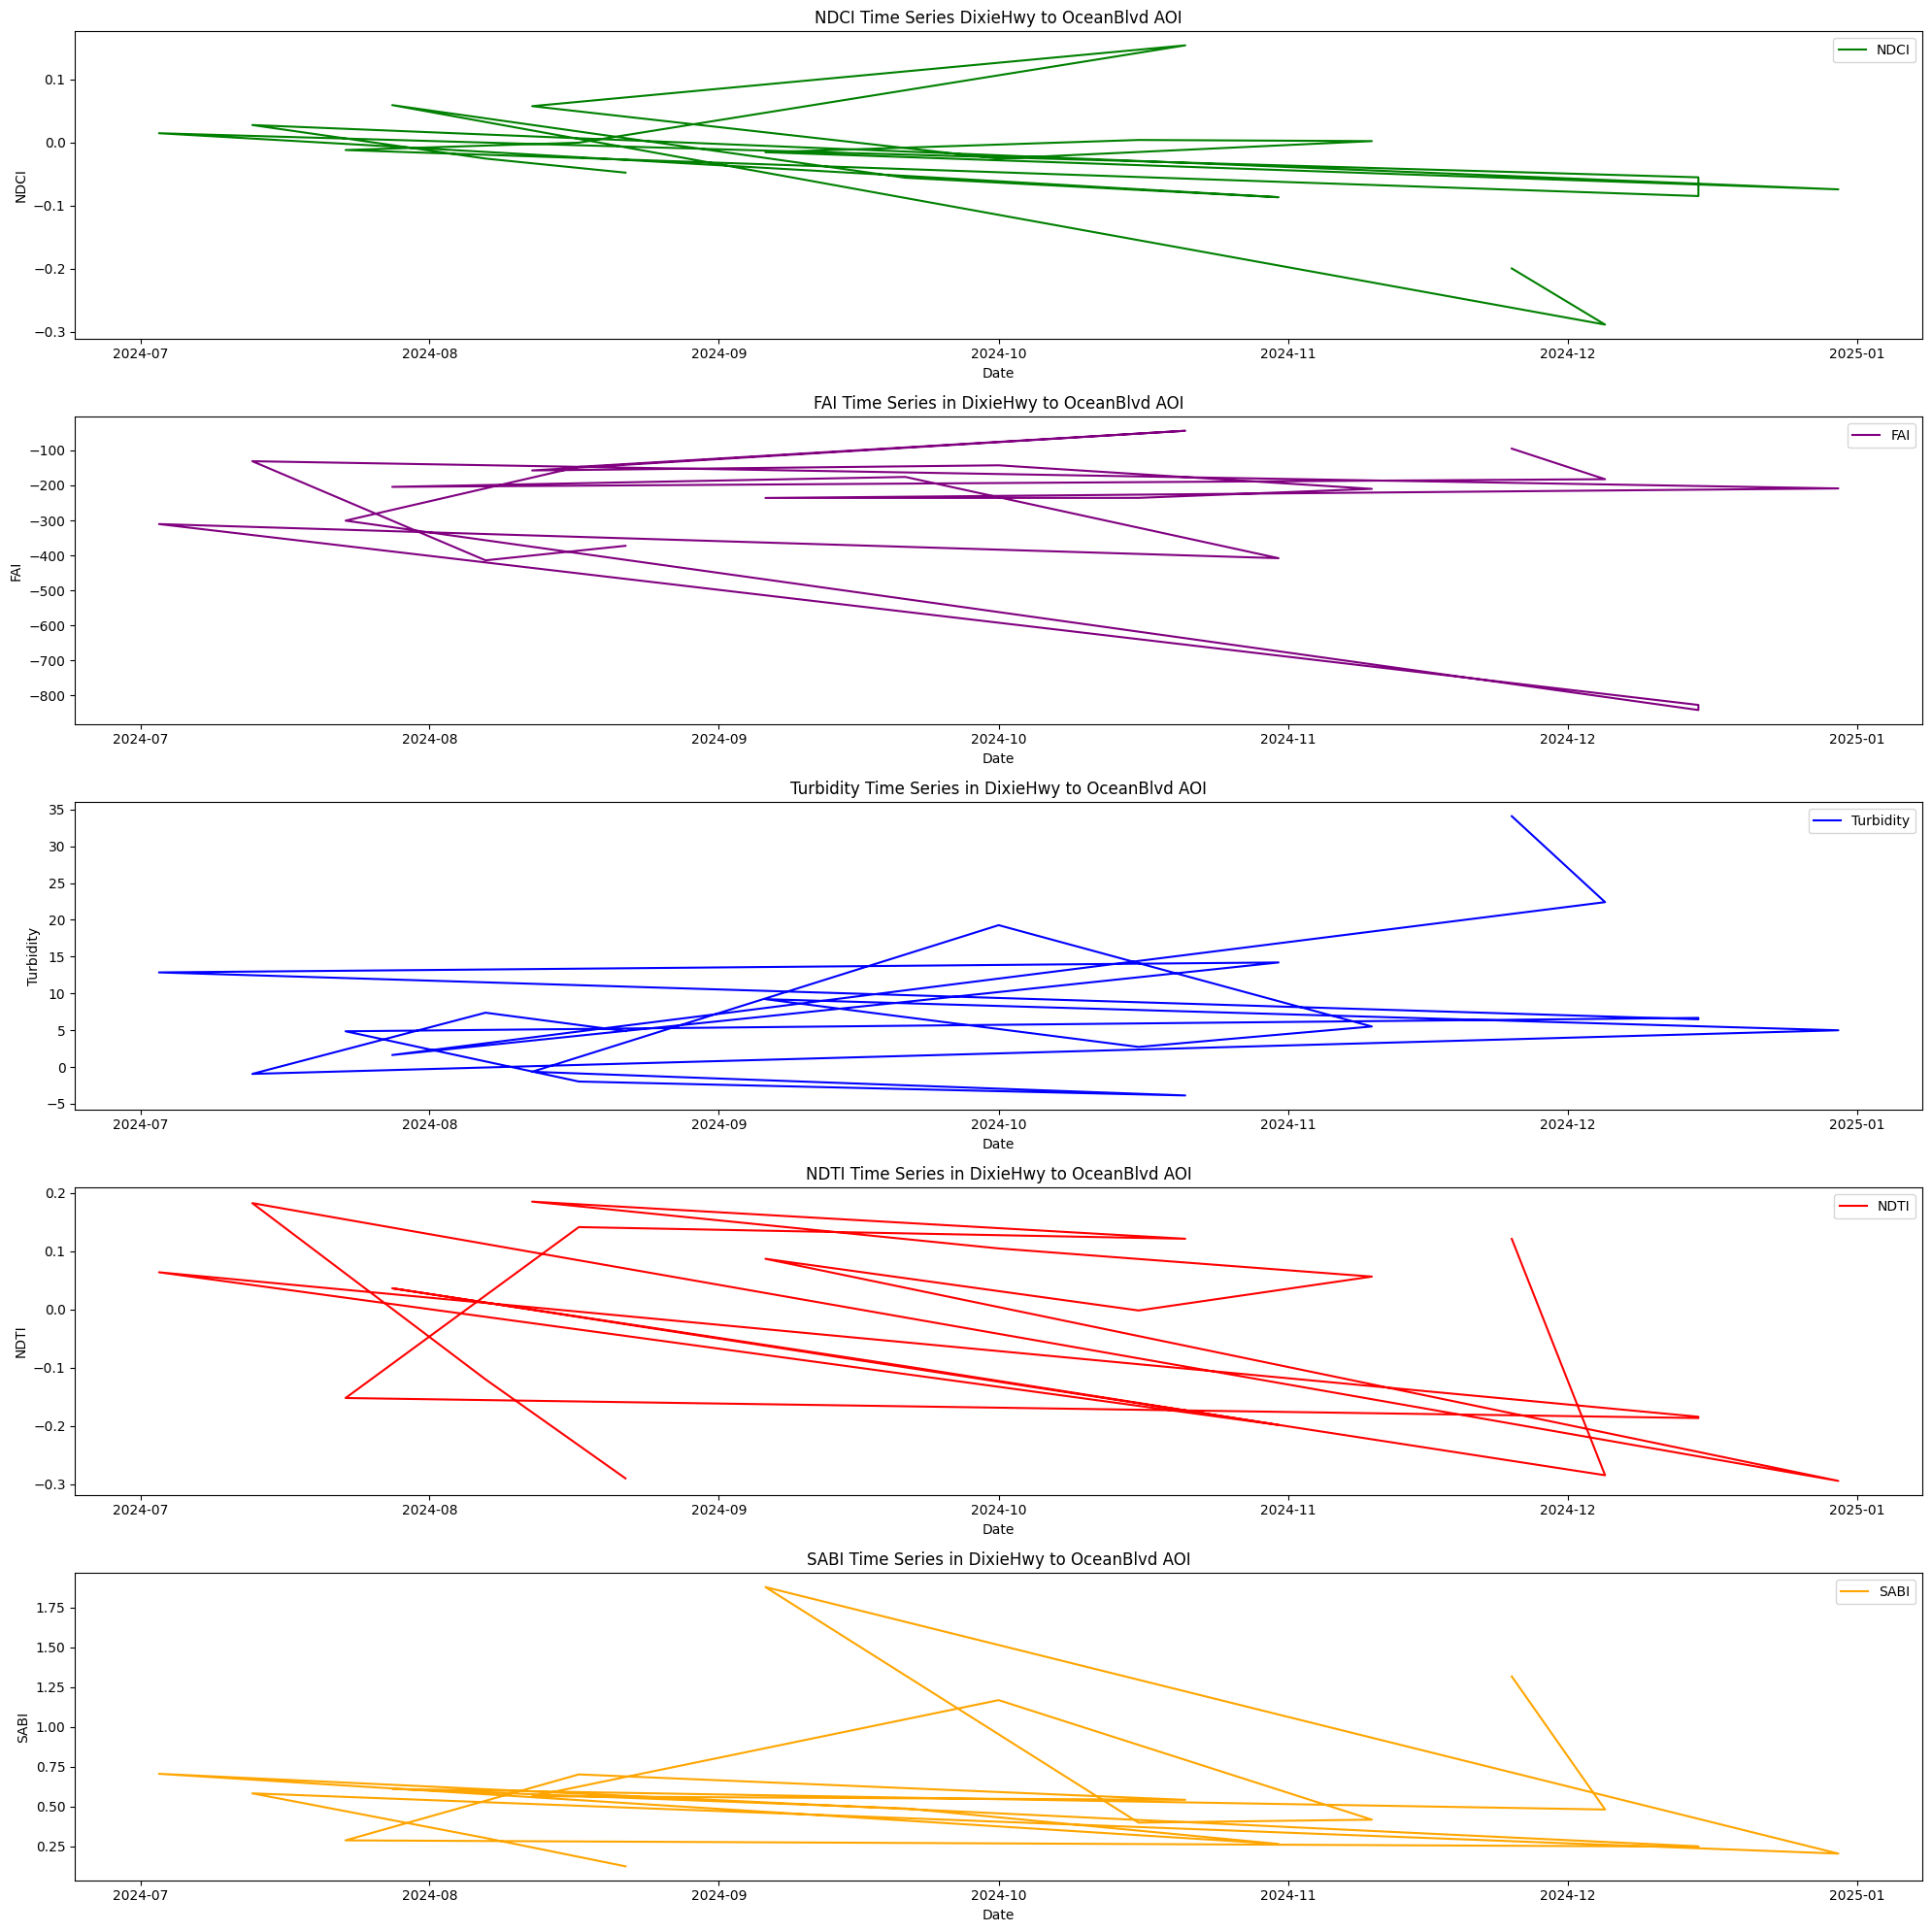

In [82]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 1, figsize=(20, 20))

# Plot NDCI time series
axs[0].plot(ndci_OceanBlvd_to_Point_df['date'], ndci_OceanBlvd_to_Point_df['NDCI'], label='NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('NDCI Time Series DixieHwy to OceanBlvd AOI')
axs[0].legend()

# Plot FAI time series (replacing WVI)
axs[1].plot(fai_OceanBlvd_to_Point_df['date'], fai_OceanBlvd_to_Point_df['FAI'], label='FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('FAI Time Series in DixieHwy to OceanBlvd AOI')
axs[1].legend()

# Plot Turbidity time series
axs[2].plot(turbidity_OceanBlvd_to_Point_df['date'], turbidity_OceanBlvd_to_Point_df['Turbidity'], label='Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Turbidity Time Series in DixieHwy to OceanBlvd AOI')
axs[2].legend()

# Plot NDCI time series
axs[3].plot(ndti_OceanBlvd_to_Point_df['date'], ndti_OceanBlvd_to_Point_df['NDTI'], label='NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('NDTI Time Series in DixieHwy to OceanBlvd AOI')
axs[3].legend()

# Plot SABI time series
axs[4].plot(sabi_OceanBlvd_to_Point_df['date'], sabi_OceanBlvd_to_Point_df['SABI'], label='SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('SABI Time Series in DixieHwy to OceanBlvd AOI')
axs[4].legend()

plt.tight_layout()
plt.show()


### Daily Time Series

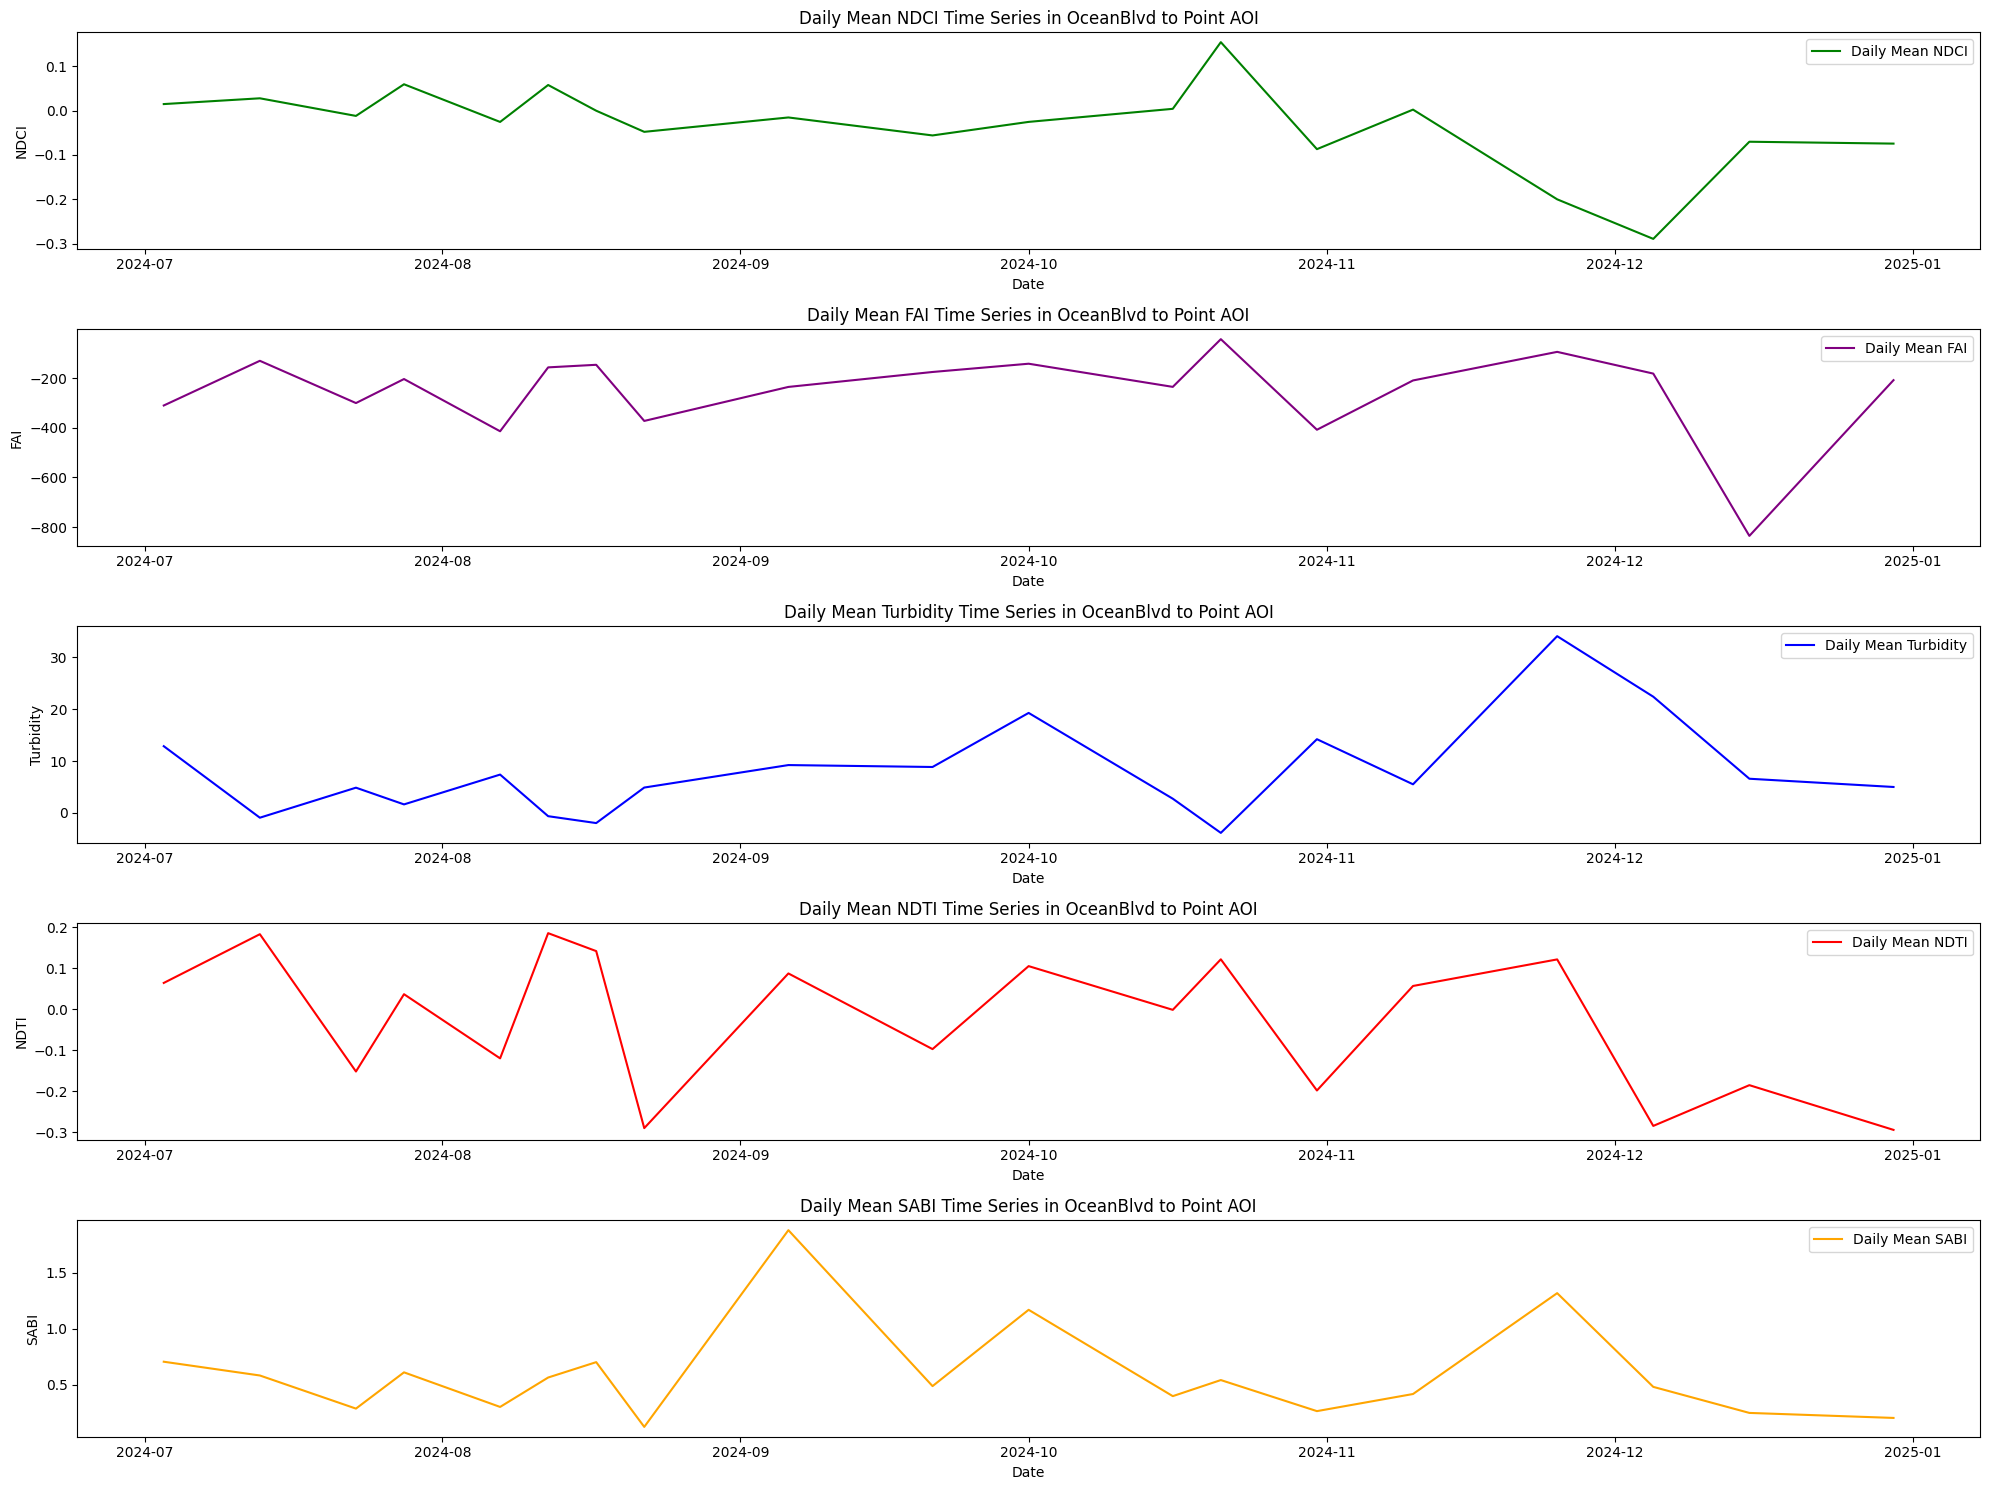

In [83]:
import matplotlib.pyplot as plt

# Compute the daily mean for each index without modifying the original data frames
ndci_daily_OceanBlvd_to_Point = ndci_OceanBlvd_to_Point_df.groupby('date', as_index=False)['NDCI'].mean()
fai_daily_OceanBlvd_to_Point = fai_OceanBlvd_to_Point_df.groupby('date', as_index=False)['FAI'].mean()
turbidity_daily_OceanBlvd_to_Point = turbidity_OceanBlvd_to_Point_df.groupby('date', as_index=False)['Turbidity'].mean()
ndti_daily_OceanBlvd_to_Point = ndti_OceanBlvd_to_Point_df.groupby('date', as_index=False)['NDTI'].mean()
sabi_daily_OceanBlvd_to_Point = sabi_OceanBlvd_to_Point_df.groupby('date', as_index=False)['SABI'].mean()

fig, axs = plt.subplots(5, 1, figsize=(20, 15))

# Plot daily mean NDCI time series
axs[0].plot(ndci_daily_OceanBlvd_to_Point['date'], ndci_daily_OceanBlvd_to_Point['NDCI'], label='Daily Mean NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('Daily Mean NDCI Time Series in OceanBlvd to Point AOI')
axs[0].legend()

# Plot daily mean FAI time series
axs[1].plot(fai_daily_OceanBlvd_to_Point['date'], fai_daily_OceanBlvd_to_Point['FAI'], label='Daily Mean FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('Daily Mean FAI Time Series in OceanBlvd to Point AOI')
axs[1].legend()

# Plot daily mean Turbidity time series
axs[2].plot(turbidity_daily_OceanBlvd_to_Point['date'], turbidity_daily_OceanBlvd_to_Point['Turbidity'], label='Daily Mean Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Daily Mean Turbidity Time Series in OceanBlvd to Point AOI')
axs[2].legend()

# Plot daily mean Turbidity time series
axs[3].plot(ndti_daily_OceanBlvd_to_Point['date'], ndti_daily_OceanBlvd_to_Point['NDTI'], label='Daily Mean NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('Daily Mean NDTI Time Series in OceanBlvd to Point AOI')
axs[3].legend()

# Plot daily mean SABI time series
axs[4].plot(sabi_daily_OceanBlvd_to_Point['date'], sabi_daily_OceanBlvd_to_Point['SABI'], label='Daily Mean SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('Daily Mean SABI Time Series in OceanBlvd to Point AOI')
axs[4].legend()

plt.tight_layout()
plt.show()

# Merge the daily aggregated data into one DataFrame
daily_aggregated_OceanBlvd_to_Point = ndci_daily_OceanBlvd_to_Point.merge(fai_daily_OceanBlvd_to_Point, on='date').merge(turbidity_daily_OceanBlvd_to_Point, on='date').merge(ndti_daily_OceanBlvd_to_Point, on='date').merge(sabi_daily_OceanBlvd_to_Point, on='date')

# Save the merged daily aggregated data to a CSV file
daily_aggregated_OceanBlvd_to_Point.to_csv('HABProject/Daily_Aggregated_Data_OceanBlvd_to_Point_07012024_12312024.csv', index=False)

### Correlation Matrix

Combined CSV saved to HABProject/OceanBlvd_to_Point_Shapefile/Combined_Aggregated_Data.csv


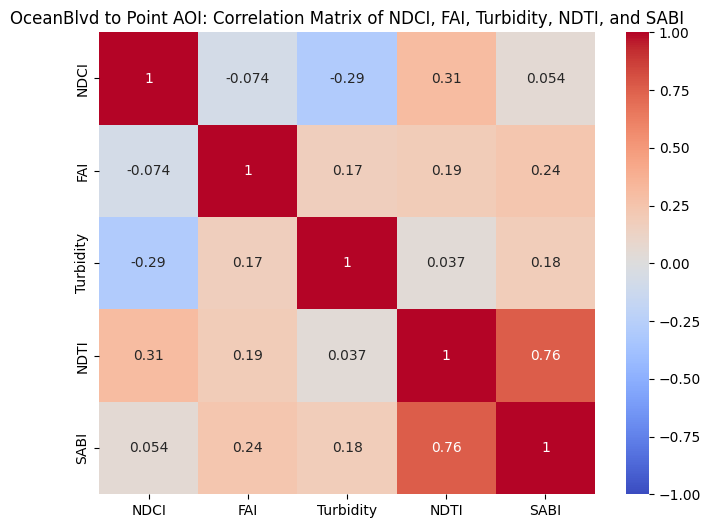

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000 -0.074317  -0.292593  0.312244  0.054058
FAI       -0.074317  1.000000   0.166603  0.188708  0.239761
Turbidity -0.292593  0.166603   1.000000  0.037480  0.181727
NDTI       0.312244  0.188708   0.037480  1.000000  0.763749
SABI       0.054058  0.239761   0.181727  0.763749  1.000000


In [87]:

import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- MERGE CSV FILES ---

# Directory where CSV files are located
csv_dir = 'HABProject/OceanBlvd_to_Point_Shapefile/'

# Use glob to find only CSV files that contain the word 'merged'
csv_files = glob.glob(os.path.join(csv_dir, "*merged*.csv"))

# List to store DataFrames from each CSV file
dfs = []

# Loop through each CSV file, read it, and set 'date' as index
for file in csv_files:
    try:
        # Read CSV and parse 'date' as datetime
        df = pd.read_csv(file, parse_dates=["date"])
        # Set 'date' as index
        df.set_index("date", inplace=True)
        dfs.append(df)
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Concatenate all DataFrames if any were successfully loaded
if dfs:
    combined_df = pd.concat(dfs)
    # Sort by date index
    combined_df.sort_index(inplace=True)
    # Save the combined DataFrame to a new CSV file
    combined_csv_path = os.path.join(csv_dir, "Combined_Aggregated_Data.csv")
    combined_df.to_csv(combined_csv_path)
    print(f"Combined CSV saved to {combined_csv_path}")
else:
    print("No CSV files loaded. Please check your CSV files and the directory path.")

# --- CORRELATION ANALYSIS AND HEATMAP PLOTTING ---

# Import the combined CSV as a DataFrame; ensure 'date' is read as the index
daily_OceanBlvd_to_Point_df = pd.read_csv(
    combined_csv_path, index_col='date', parse_dates=['date']
)

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_OceanBlvd_to_Point_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('OceanBlvd to Point AOI: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')

# Save the figure
plt.savefig('HABProject/OceanBlvd_to_Point_Shapefile/Heat_Map_OceanBlvd_to_Point_Master.png')
plt.show()

# Print the correlation matrix to the console
print("Correlation Matrix:\n", corr_matrix)


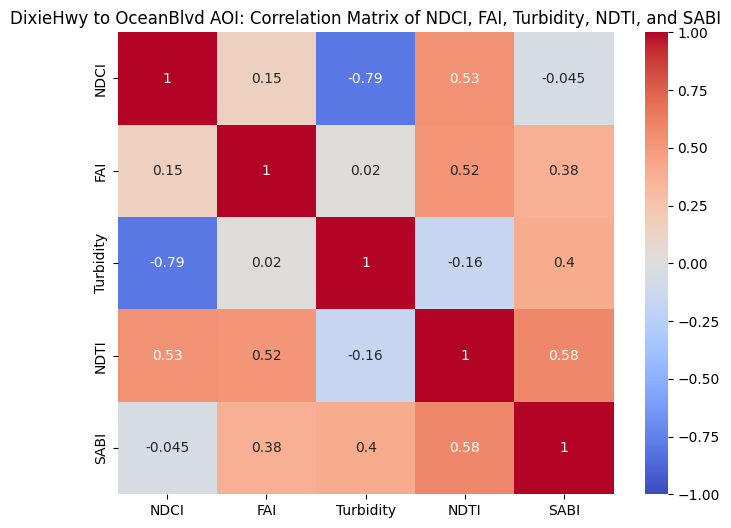

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000  0.152359  -0.789863  0.532121 -0.045239
FAI        0.152359  1.000000   0.019767  0.521616  0.379512
Turbidity -0.789863  0.019767   1.000000 -0.159575  0.398489
NDTI       0.532121  0.521616  -0.159575  1.000000  0.583883
SABI      -0.045239  0.379512   0.398489  0.583883  1.000000


<Figure size 640x480 with 0 Axes>

In [85]:
import seaborn as sns

#Import the daily cs csv as a df
daily_DixieHwy_to_OceanBlvd_df = pd.read_csv('HABProject/Daily_Aggregated_Data_OceanBlvd_to_Point_07012024_12312024.csv')

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_DixieHwy_to_OceanBlvd_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plotting Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('DixieHwy to OceanBlvd AOI: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')
plt.show()

# Print Correlation Matrix
plt.savefig('HABProject/Heat_Map_OceanBlvd_to_Point_07012024_12312024.png')  # Save the figure
print("Correlation Matrix:\n", corr_matrix)

### Scatterplot

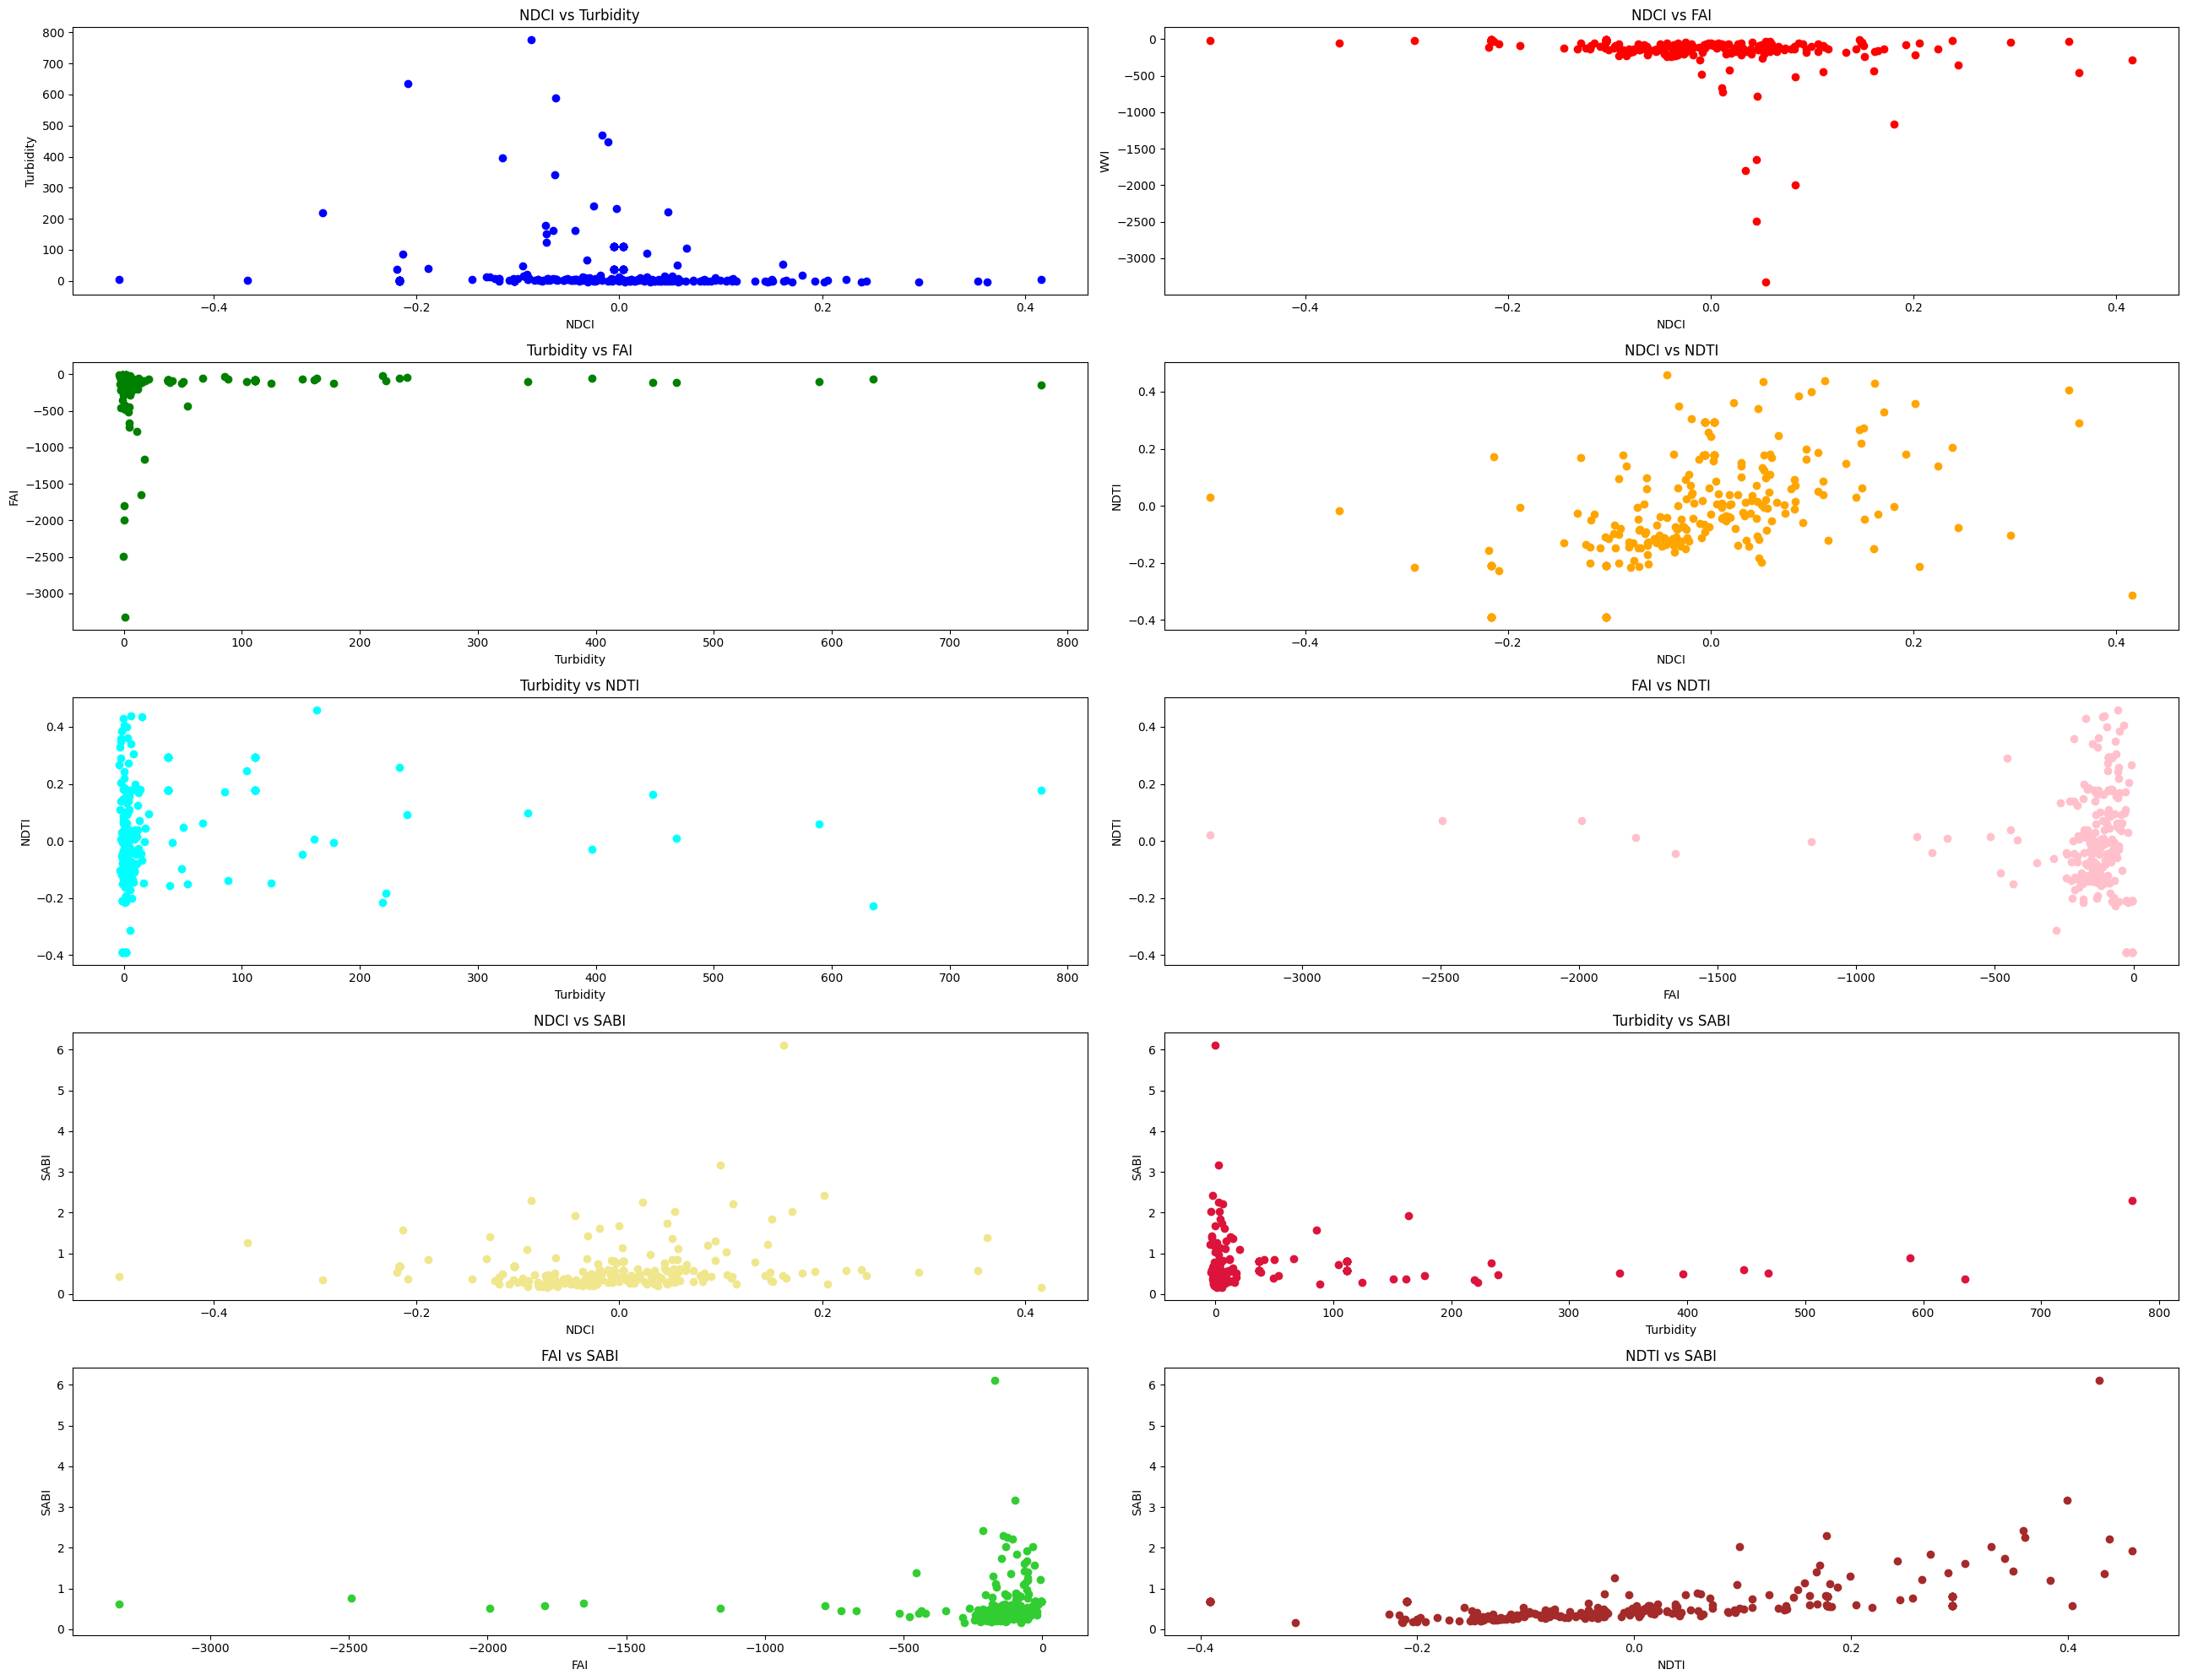

In [86]:
# Scatter Plot Analysis
fig, axs = plt.subplots(5, 2, figsize=(26, 20))

axs[0, 0].scatter(daily_OceanBlvd_to_Point_df['NDCI'], daily_OceanBlvd_to_Point_df['Turbidity'], c='blue')
axs[0, 0].set_xlabel('NDCI')
axs[0, 0].set_ylabel('Turbidity')
axs[0, 0].set_title('NDCI vs Turbidity')

axs[0, 1].scatter(daily_OceanBlvd_to_Point_df['NDCI'], daily_OceanBlvd_to_Point_df['FAI'], c='red')
axs[0, 1].set_xlabel('NDCI')
axs[0, 1].set_ylabel('WVI')
axs[0, 1].set_title('NDCI vs FAI')

axs[1, 0].scatter(daily_OceanBlvd_to_Point_df['Turbidity'], daily_OceanBlvd_to_Point_df['FAI'], c='green')
axs[1, 0].set_xlabel('Turbidity')
axs[1, 0].set_ylabel('FAI')
axs[1, 0].set_title('Turbidity vs FAI')

#Adding all NDTI here:

axs[1, 1].scatter(daily_OceanBlvd_to_Point_df['NDCI'], daily_OceanBlvd_to_Point_df['NDTI'], c='orange')
axs[1, 1].set_xlabel('NDCI')
axs[1, 1].set_ylabel('NDTI')
axs[1, 1].set_title('NDCI vs NDTI')

axs[2, 0].scatter(daily_OceanBlvd_to_Point_df['Turbidity'], daily_OceanBlvd_to_Point_df['NDTI'], c='cyan')
axs[2, 0].set_xlabel('Turbidity')
axs[2, 0].set_ylabel('NDTI')
axs[2, 0].set_title('Turbidity vs NDTI')

axs[2, 1].scatter(daily_OceanBlvd_to_Point_df['FAI'], daily_OceanBlvd_to_Point_df['NDTI'], c='pink')
axs[2, 1].set_xlabel('FAI')
axs[2, 1].set_ylabel('NDTI')
axs[2, 1].set_title('FAI vs NDTI')

#SABI Additions
axs[3, 0].scatter(daily_OceanBlvd_to_Point_df['NDCI'], daily_OceanBlvd_to_Point_df['SABI'], c='khaki')
axs[3, 0].set_xlabel('NDCI')
axs[3, 0].set_ylabel('SABI')
axs[3, 0].set_title('NDCI vs SABI')

axs[3, 1].scatter(daily_OceanBlvd_to_Point_df['Turbidity'], daily_OceanBlvd_to_Point_df['SABI'], c='crimson')
axs[3, 1].set_xlabel('Turbidity')
axs[3, 1].set_ylabel('SABI')
axs[3, 1].set_title('Turbidity vs SABI')

axs[4, 0].scatter(daily_OceanBlvd_to_Point_df['FAI'], daily_OceanBlvd_to_Point_df['SABI'], c='limegreen')
axs[4, 0].set_xlabel('FAI')
axs[4, 0].set_ylabel('SABI')
axs[4, 0].set_title('FAI vs SABI')

axs[4, 1].scatter(daily_OceanBlvd_to_Point_df['NDTI'], daily_OceanBlvd_to_Point_df['SABI'], c='brown')
axs[4, 1].set_xlabel('NDTI')
axs[4, 1].set_ylabel('SABI')
axs[4, 1].set_title('NDTI vs SABI')


plt.tight_layout()
plt.savefig('HABProject/Scatter_plot_OceanBlvd_to_Point_07012024_12312024.png')  # Save the figure
plt.show()

# Lake O Shapefiles (Changing Letters Depending on Shapefile for Extraction)

## 1. Ensuring the shapefile can be read

In [284]:
import geopandas as gpd

shapefile_path = 'D:/Classes/STPythonFinalProject/LakeO_SE.shp'
gdf = gpd.read_file(shapefile_path)
print(gdf.head())

      Shape_Leng    Shape_Area  \
0  102631.228548  5.391109e+08   

                                            geometry  
0  POLYGON Z ((-8994368.146 3117529.89 0, -897354...  


#### Another testing of the shapefile, converting it so it may be used in Geemap

In [285]:
import geopandas as gpd
import shapely.geometry
import geemap

# Load your shapefile with Geopandas
shapefile_path = 'D:/Classes/STPythonFinalProject/LakeO_SE.shp'
gdf = gpd.read_file(shapefile_path)

# Define a function to drop the Z coordinate from a geometry
def drop_z(geom):
    if geom.is_empty:
        return geom
    if geom.geom_type == 'Polygon':
        return shapely.geometry.Polygon([(x, y) for x, y, *z in geom.exterior.coords])
    elif geom.geom_type == 'MultiPolygon':
        return shapely.geometry.MultiPolygon([drop_z(poly) for poly in geom])
    else:
        return geom

# Apply the function to each geometry in your GeoDataFrame
gdf['geometry'] = gdf['geometry'].apply(drop_z)

# Now convert the GeoDataFrame to an Earth Engine FeatureCollection
aoi_fc = geemap.geopandas_to_ee(gdf)
LakeO_SE_aoi = aoi_fc.geometry()

# Verify by printing the AOI geometry
print(LakeO_SE_aoi.getInfo())

{'type': 'Polygon', 'coordinates': [[[-80.79778376639393, 26.95243102181035], [-80.81118908373203, 26.952418254761717], [-80.80735485491049, 26.69832875581671], [-80.78352526333497, 26.69854379565759], [-80.77839155497959, 26.697053216581406], [-80.75169626937577, 26.683293104691693], [-80.73372828923368, 26.680082172756197], [-80.73116143505601, 26.681343621001044], [-80.70767471874633, 26.71081166683489], [-80.70202763937577, 26.72720498225148], [-80.6825195461881, 26.7498995210309], [-80.69497298798989, 26.77834711715991], [-80.69497298798989, 26.802821139919505], [-80.68958751419973, 26.81199753681222], [-80.64993083711165, 26.83209562091659], [-80.64454536242317, 26.84520114601192], [-80.61272210241043, 26.893678394904196], [-80.6132116914268, 26.901537611890124], [-80.61370128044317, 26.916381306514186], [-80.6107637481416, 26.942571300224582], [-80.6107445691103, 26.95260915577923], [-80.79778376639393, 26.95243102181035]]]}


## 2. Creation of Map and CSVs

#### Mosaic introduced, combining all images with the cloud mask from the time frame, clips it to the area of interest, and computes NDWI. 

#### Uses NDWI for the water mask, and returns the Water Masked Mosaic and the NDWI

In [286]:
import pandas as pd
import ee
import geemap

# Initialize Earth Engine (if not already initialized)
ee.Initialize()

# Assume AOI is defined (replace with your actual AOI)
# Example AOI:


# Define cloud masking function using the QA60 band
def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Define processing function:
#  - Applies cloud mask.
#  - Computes an NDWI for water detection and applies a water mask.
#  - Computes NDCI, FAI, and Turbidity indices.
#  - Clips the image to the AOI.
def process_image(image):
    # Apply cloud mask
    image = maskS2clouds(image)
    
    # Compute NDWI (using green (B3) and NIR (B8)) to isolate water pixels.
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    water_mask = ndwi.gt(0.5)  # Adjust threshold as needed
    image = image.updateMask(water_mask)
    
    # Calculate NDCI (Normalized Difference Chlorophyll Index) using B5 (red edge) and B4 (red)
    ndci = image.normalizedDifference(['B5', 'B4']).rename('NDCI')
    
    # Calculate FAI (Floating Algae Index).
    # For Sentinel-2, one common approach is:
    #   FAI = B8 - (B5 + (B11 - B5) * (137/905))
    
    #fai = image.select('B8') \
     #   .subtract(image.select('B5') \
      #            .add(image.select('B11') \
       #                .subtract(image.select('B5')) \
        #               .multiply(137/905))) \
        #.rename('FAI')

    #Naming each band as a variable
    #FAI = (Rnir - Rred) = (((Rswir - Rred)*(wavelength_nir - wavelength_red)) / (wavelength_swir - wavelength_red)))
    #Equation based on Muzfoffar et al. 2023. DOI: https://doi.org/10.3390/rs15082039
    B8 = image.select('B8') # NIR Band
    B4 = image.select('B4') # Red band
    B11 = image.select('B11') # SWIR band

    #Making a variable for each part of the equation
    diff_NIR_Red = B8.subtract(B4)
    diff_SWIR_Red = B11.subtract(B4)
    diff_WL_NIR_Red = 842 - 665
    diff_WL_SWIR_Red = 1610 - 665

    #Dealing with the fraction order of operations
    top_fraction = diff_SWIR_Red.multiply(diff_WL_NIR_Red)
    whole_fraction = top_fraction.divide(diff_WL_SWIR_Red)

    #Last bit of equation
    fai = diff_NIR_Red.add(whole_fraction).rename('FAI')

    
    
    
    # Calculate Turbidity as an additional index (optional)
    # This is an example formula; adjust as appropriate for your study.
    turbidity = image.select('B3') \
        .divide(image.select('B1')) \
        .multiply(8.93) \
        .subtract(6.39) \
        .rename('Turbidity')

    #NDTI calculation
    ndti = image.normalizedDifference(['B4', 'B3']).rename('NDTI')

     #SABI (Surface algal bloom index) calculation
    #SABI = (Red - NIR) / (Blue + Green) OR SABI = (B4 - B8) / (B2 + B3)
    B2 = image.select('B2') #Blue band
    B3 = image.select('B3') #Green band

    sabi_top = B4.subtract(B8)
    sabi_bottom = B2.add(B3)
    sabi = sabi_top.divide(sabi_bottom).rename('SABI')
    
    # Add the new bands and clip the image to the LakeO_SE_aoi
    return image.addBands([ndci, fai, turbidity, ndti, sabi]).clip(LakeO_SE_aoi)

# Define time frame for your analysis
start_date = '2024-07-01'
end_date   = '2024-12-31'

# Load Sentinel-2 image collection, filter by LakeO_SE_aoi and date, and sort by cloud percentage
sentinel2 = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
             .filterBounds(LakeO_SE_aoi)
             .filterDate(start_date, end_date)
             .sort('CLOUDY_PIXEL_PERCENTAGE'))

# Process the image collection: apply cloud and water masks, calculate indices, and clip each image to aoi_cs
processed_images = sentinel2.map(process_image)

# --- Time Series Calculation ---
# Function to calculate mean index values over the LakeO_SE_aoi for each image
def calculate_time_series(image_collection, index_name):
    def reduce_region(image):
        stats = image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=LakeO_SE_aoi,
            scale=10,         # 10 m resolution
            maxPixels=1e9
        )
        return ee.Feature(None, stats).set('date', image.date().format('YYYY-MM-dd'))
    time_series = image_collection.map(reduce_region)
    time_series_list = time_series.reduceColumns(
        ee.Reducer.toList(2),
        ['date', index_name]
    ).get('list').getInfo()
    return time_series_list

# Calculate time series for each index
ndci_LakeO_SE_aoi_time_series      = calculate_time_series(processed_images, 'NDCI')
fai_LakeO_SE_aoi_time_series       = calculate_time_series(processed_images, 'FAI')
turbidity_LakeO_SE_aoi_time_series = calculate_time_series(processed_images, 'Turbidity')
ndti_LakeO_SE_aoi_time_series      = calculate_time_series(processed_images, 'NDTI')
sabi_LakeO_SE_aoi_time_series      = calculate_time_series(processed_images, 'SABI')

# Convert the time series lists to pandas DataFrames
def time_series_to_df(time_series, index_name):
    df = pd.DataFrame(time_series, columns=['date', index_name])
    df['date'] = pd.to_datetime(df['date'])
    return df

ndci_LakeO_SE_aoi_df      = time_series_to_df(ndci_LakeO_SE_aoi_time_series, 'NDCI')
fai_LakeO_SE_aoi_df       = time_series_to_df(fai_LakeO_SE_aoi_time_series, 'FAI')
turbidity_LakeO_SE_aoi_df = time_series_to_df(turbidity_LakeO_SE_aoi_time_series, 'Turbidity')
ndti_LakeO_SE_aoi_df      = time_series_to_df(ndti_LakeO_SE_aoi_time_series, 'NDTI')
sabi_LakeO_SE_aoi_df      = time_series_to_df(sabi_LakeO_SE_aoi_time_series, 'SABI')

# Merge the DataFrames for further analysis
merged_LakeO_SE_aoi_df = ndci_LakeO_SE_aoi_df.merge(fai_LakeO_SE_aoi_df, on='date').merge(turbidity_LakeO_SE_aoi_df, on='date').merge(ndti_LakeO_SE_aoi_df, on='date').merge(sabi_LakeO_SE_aoi_df, on='date')

# Save the time series data to CSV files
ndci_LakeO_SE_aoi_df.to_csv('HABProject/NDCI_TimeSeries_LakeO_SE_aoi_07012024_12312024.csv', index=False)
fai_LakeO_SE_aoi_df.to_csv('HABProject/FAI_TimeSeries_LakeO_SE_aoi_07012024_12312024.csv', index=False)
turbidity_LakeO_SE_aoi_df.to_csv('HABProject/Turbidity_TimeSeries_LakeO_SE_aoi_07012024_12312024.csv', index=False)
ndti_LakeO_SE_aoi_df.to_csv('HABProject/NDTI_TimeSeries_LakeO_SE_aoi_07012024_12312024.csv', index=False)
sabi_LakeO_SE_aoi_df.to_csv('HABProject/SABI_TimeSeries_LakeO_SE_aoi_07012024_12312024.csv', index=False)
merged_LakeO_SE_aoi_df.to_csv('HABProject/Merged_TimeSeries_LakeO_SE_aoi_07012024_12312024.csv', index=False)

# --- Map Visualization ---
Map = geemap.Map(center=[27.75, -80.25], zoom=10)

# Display the FAI band (suitable for highlighting floating algae)
Map.addLayer(processed_images.first(), 
             {'bands': ['FAI'], 'min': -0.5, 'max': 0.5, 'palette': ['blue', 'white', 'green']}, 
             'FAI')

# Display the NDCI band (using a palette to highlight chlorophyll levels)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDCI'], 'min': -0.5, 'max': 0.5, 'palette': ['yellow', 'orange', 'red']}, 
             'NDCI')

# Display the Turbidity band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['Turbidity'], 'min': -2, 'max': 20, 'palette': ['white', 'blue', 'darkblue']}, 
             'Turbidity')

# Display the NDTI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDTI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'NDTI')

# Display the SABI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['SABI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'SABI')

# Add the LakeO_SE_aoi boundary for reference
Map.addLayer(LakeO_SE_aoi, {}, 'LakeO_SE_aoi', True)

Map

Map(center=[27.75, -80.25], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

## 3. Plotting Time Series of the Indices

### Messy Time Series

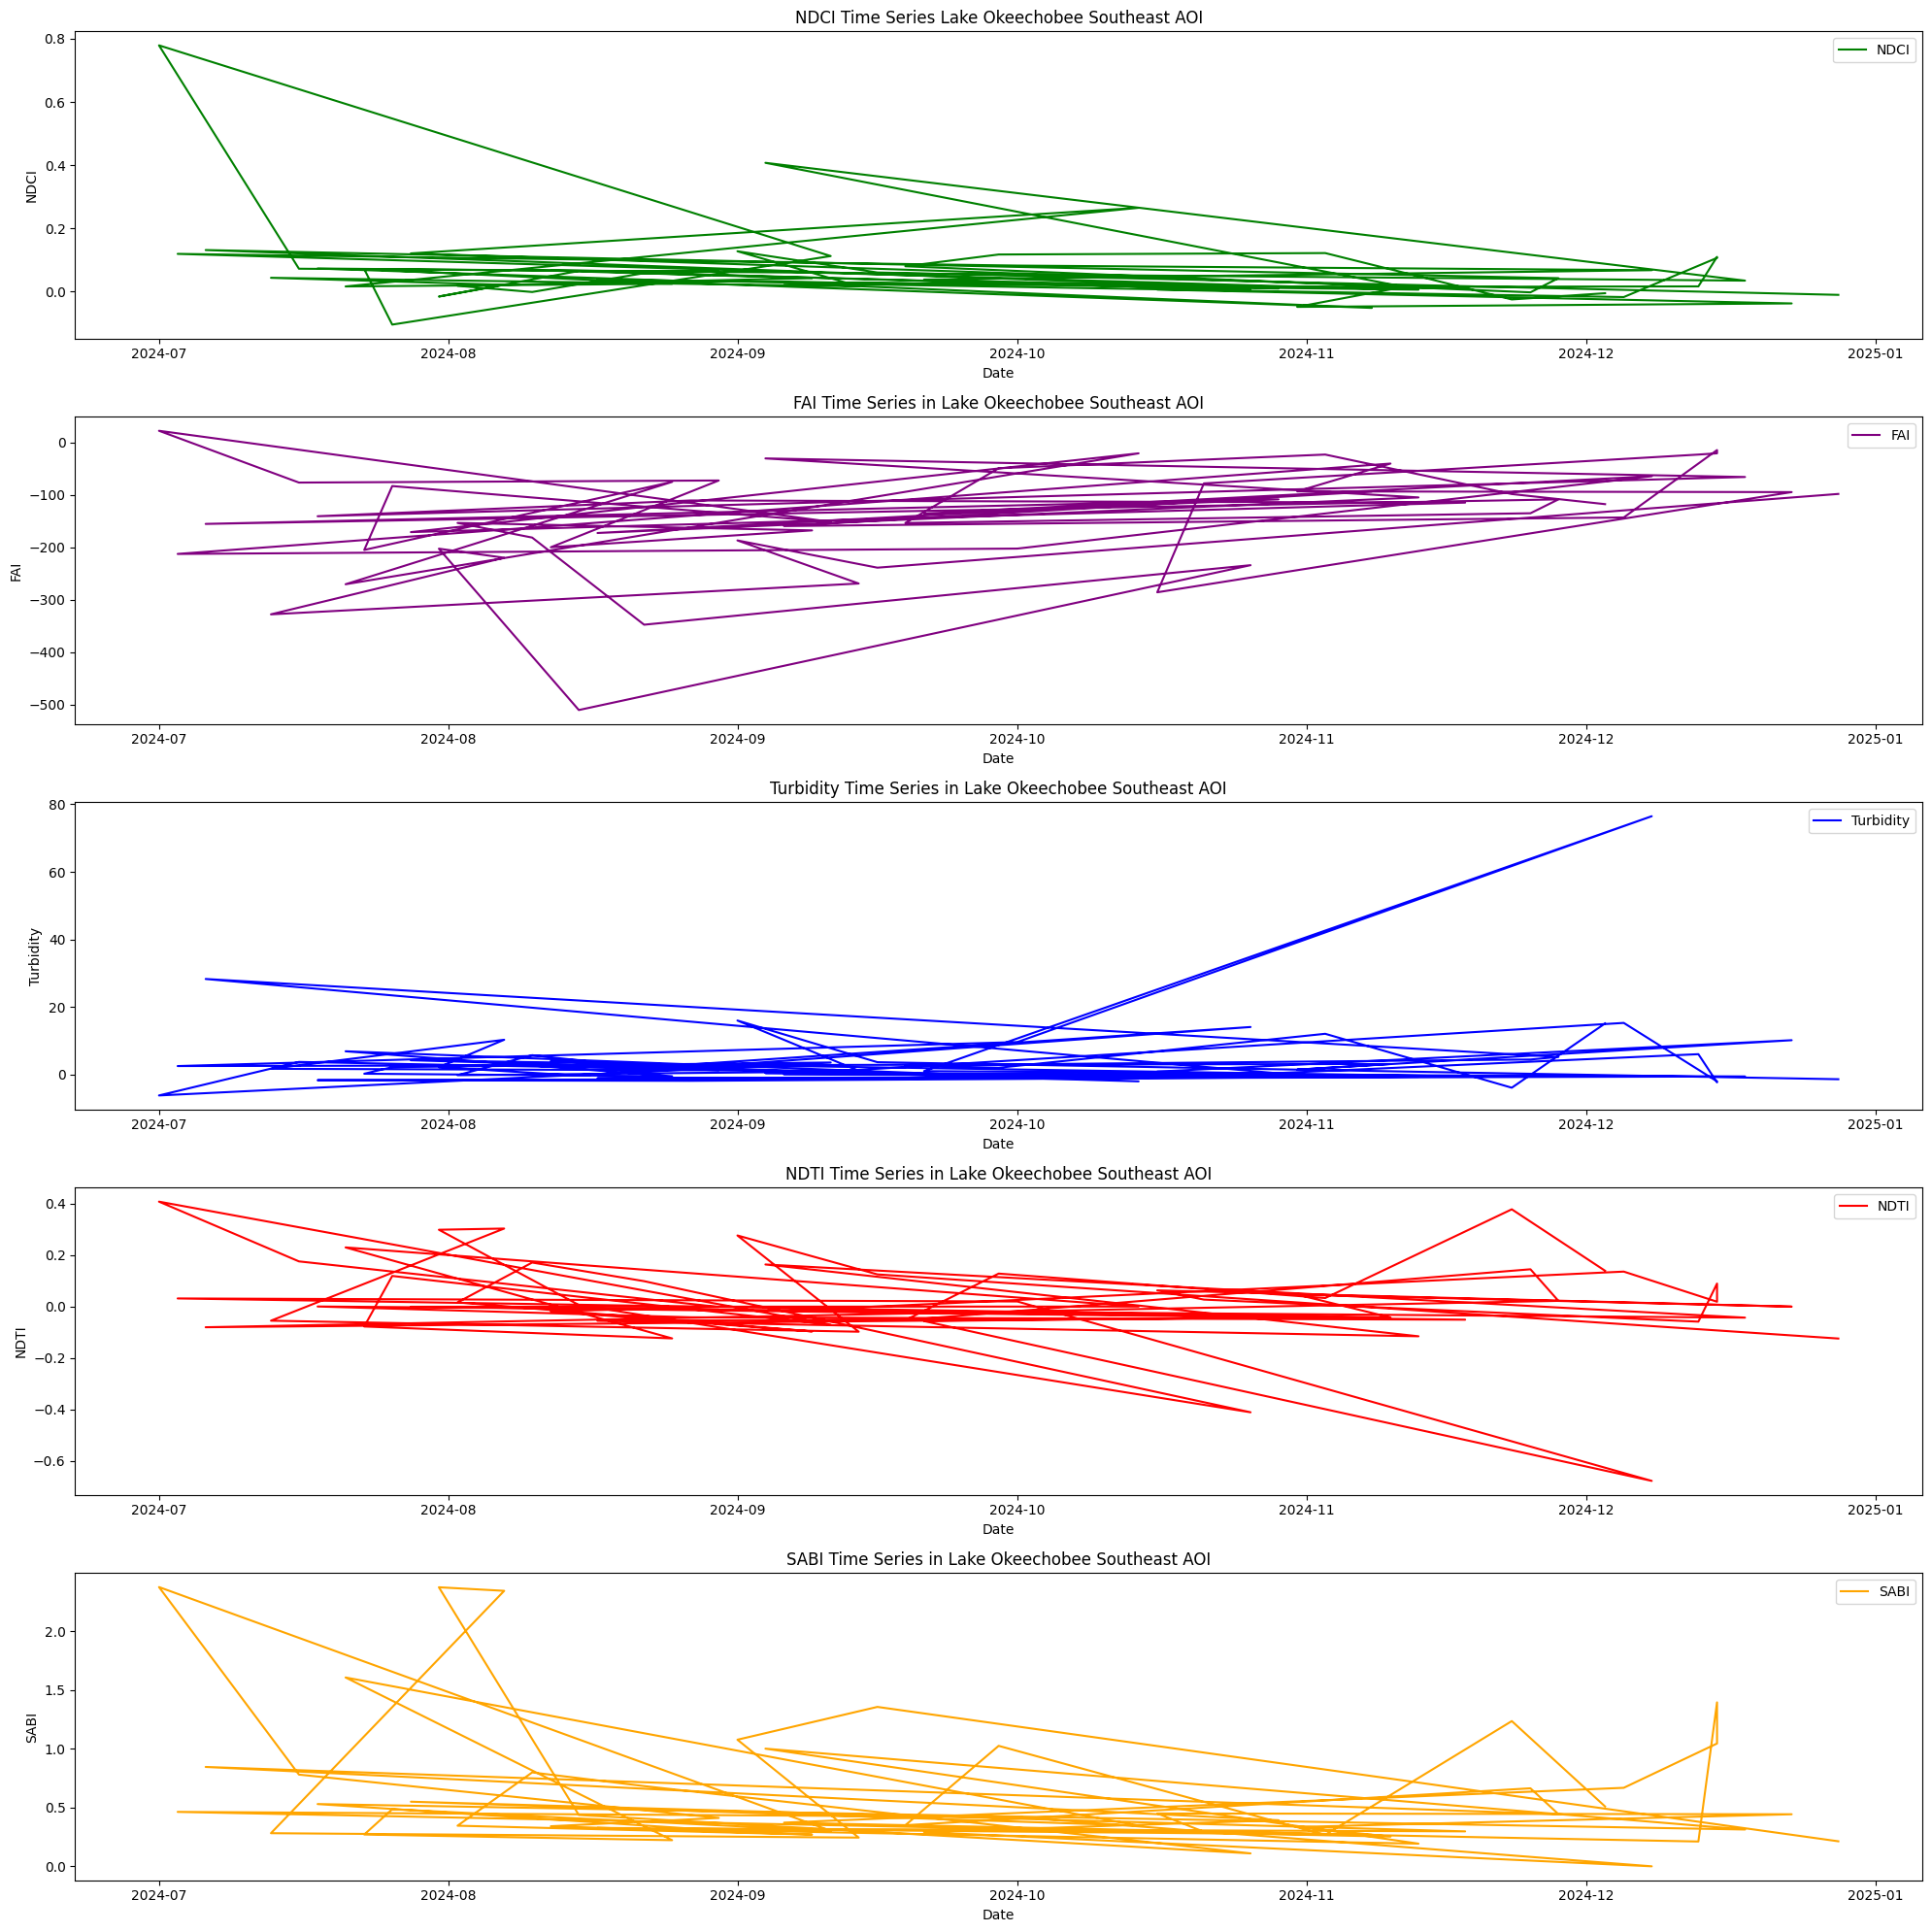

In [287]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 1, figsize=(20, 20))

# Plot NDCI time series
axs[0].plot(ndci_LakeO_SE_aoi_df['date'], ndci_LakeO_SE_aoi_df['NDCI'], label='NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('NDCI Time Series Lake Okeechobee Southeast AOI')
axs[0].legend()

# Plot FAI time series (replacing WVI)
axs[1].plot(fai_LakeO_SE_aoi_df['date'], fai_LakeO_SE_aoi_df['FAI'], label='FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('FAI Time Series in Lake Okeechobee Southeast AOI')
axs[1].legend()

# Plot Turbidity time series
axs[2].plot(turbidity_LakeO_SE_aoi_df['date'], turbidity_LakeO_SE_aoi_df['Turbidity'], label='Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Turbidity Time Series in Lake Okeechobee Southeast AOI')
axs[2].legend()

# Plot NDCI time series
axs[3].plot(ndti_LakeO_SE_aoi_df['date'], ndti_LakeO_SE_aoi_df['NDTI'], label='NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('NDTI Time Series in Lake Okeechobee Southeast AOI')
axs[3].legend()

# Plot SABI time series
axs[4].plot(sabi_LakeO_SE_aoi_df['date'], sabi_LakeO_SE_aoi_df['SABI'], label='SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('SABI Time Series in Lake Okeechobee Southeast AOI')
axs[4].legend()

plt.tight_layout()
plt.show()


### Daily Time Series

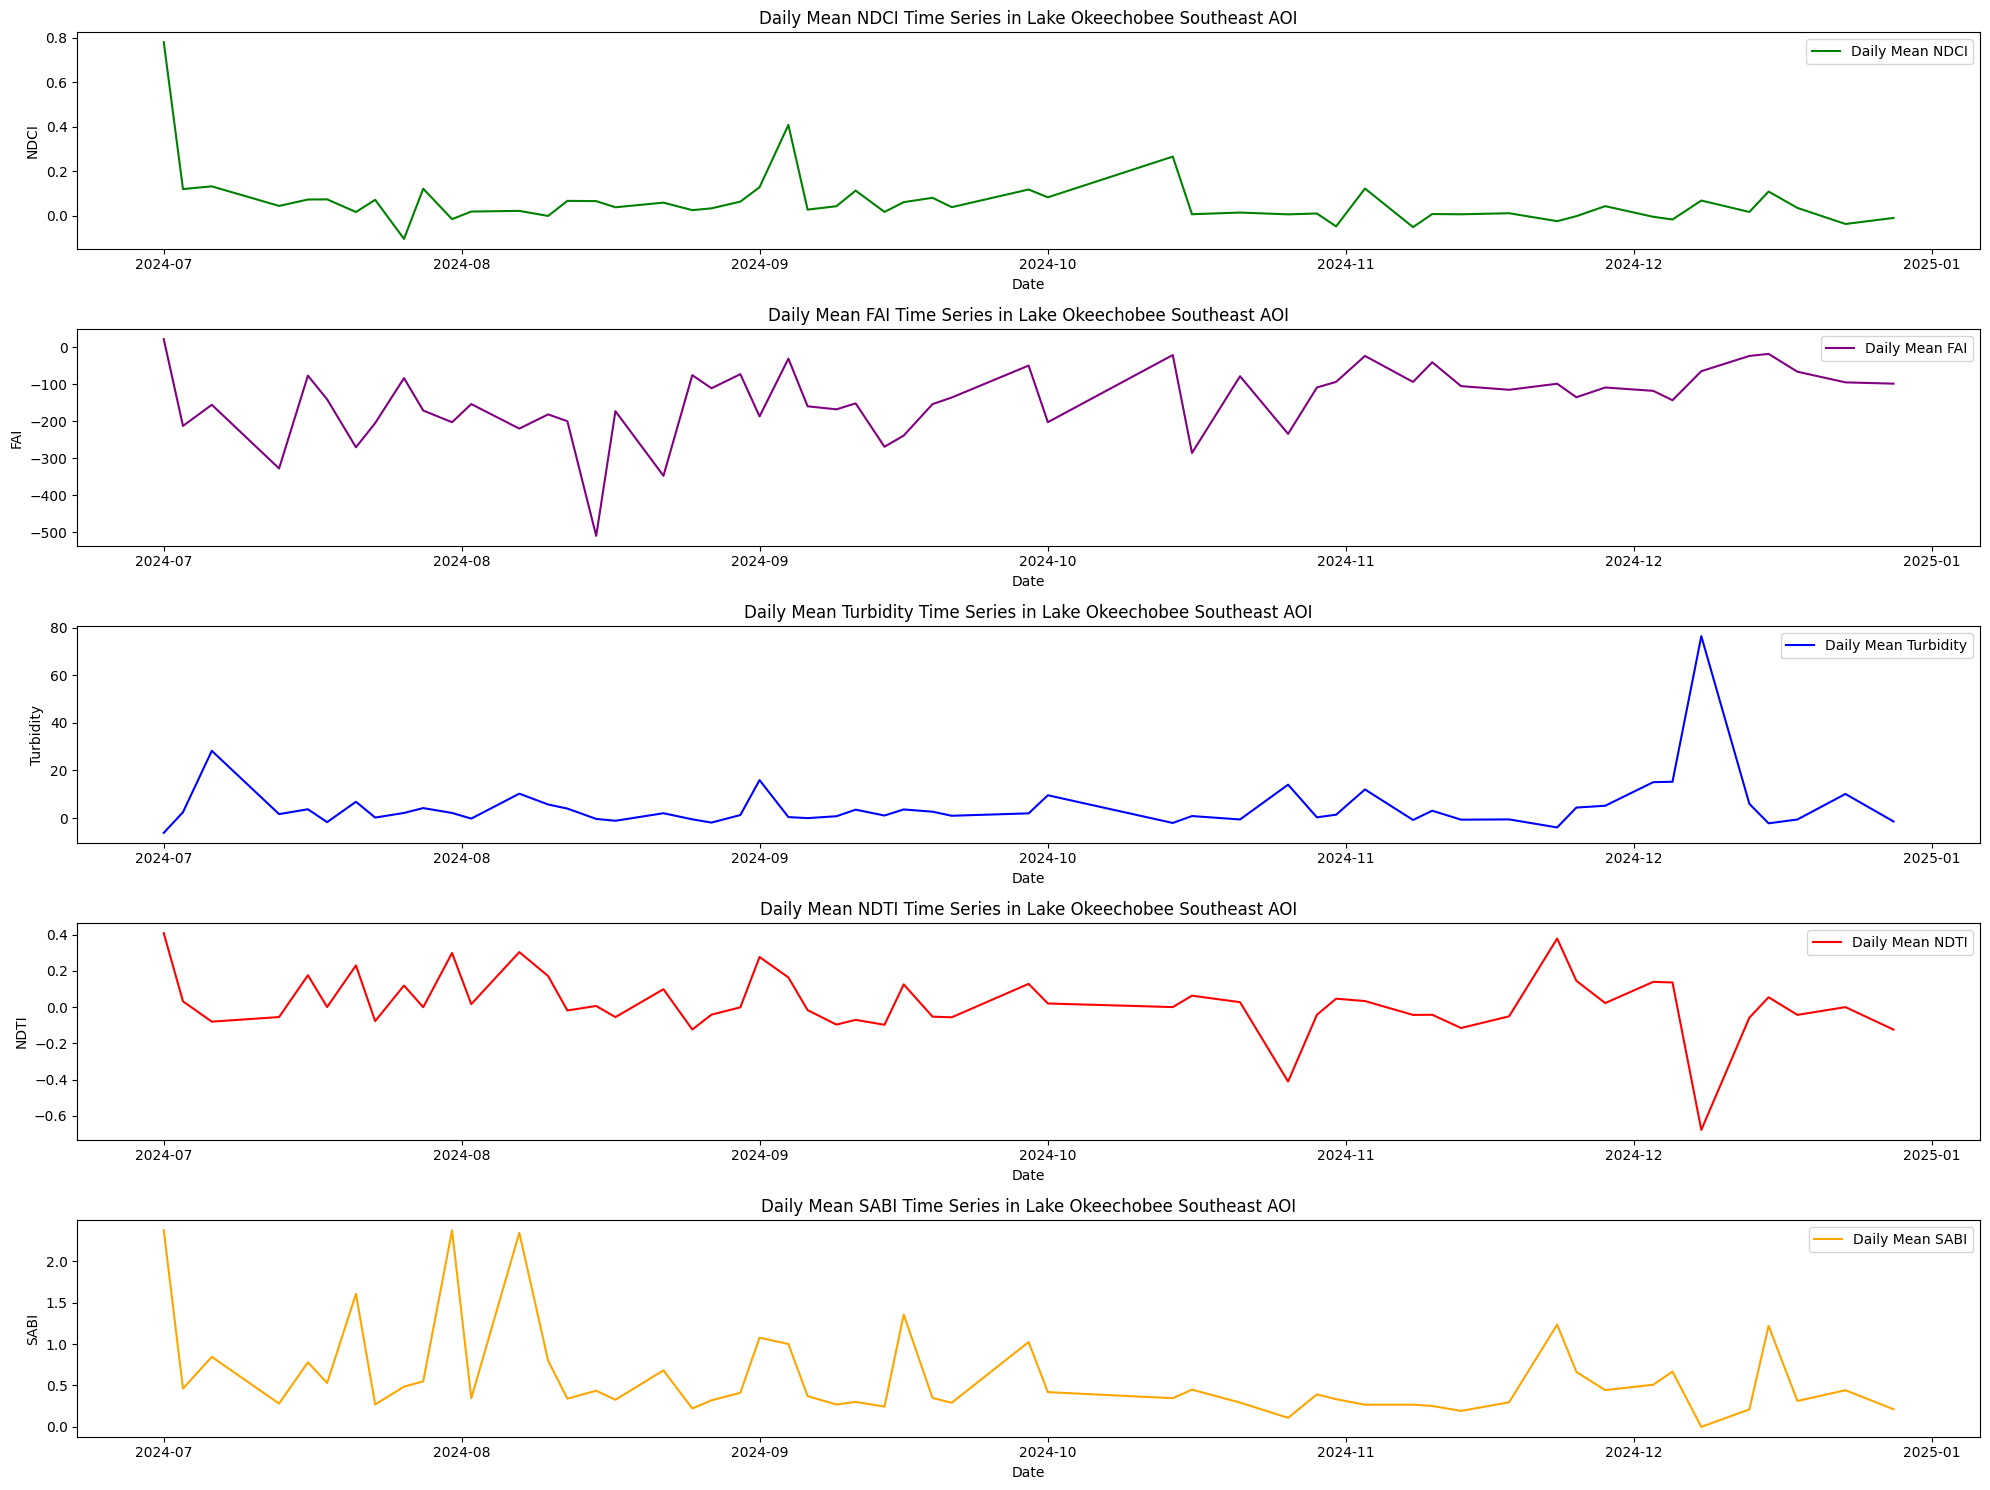

In [288]:
import matplotlib.pyplot as plt

# Compute the daily mean for each index without modifying the original data frames
ndci_daily_LakeO_SE_aoi = ndci_LakeO_SE_aoi_df.groupby('date', as_index=False)['NDCI'].mean()
fai_daily_LakeO_SE_aoi = fai_LakeO_SE_aoi_df.groupby('date', as_index=False)['FAI'].mean()
turbidity_daily_LakeO_SE_aoi = turbidity_LakeO_SE_aoi_df.groupby('date', as_index=False)['Turbidity'].mean()
ndti_daily_LakeO_SE_aoi = ndti_LakeO_SE_aoi_df.groupby('date', as_index=False)['NDTI'].mean()
sabi_daily_LakeO_SE_aoi = sabi_LakeO_SE_aoi_df.groupby('date', as_index=False)['SABI'].mean()

fig, axs = plt.subplots(5, 1, figsize=(20, 15))

# Plot daily mean NDCI time series
axs[0].plot(ndci_daily_LakeO_SE_aoi['date'], ndci_daily_LakeO_SE_aoi['NDCI'], label='Daily Mean NDCI', color='green')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('NDCI')
axs[0].set_title('Daily Mean NDCI Time Series in Lake Okeechobee Southeast AOI')
axs[0].legend()

# Plot daily mean FAI time series
axs[1].plot(fai_daily_LakeO_SE_aoi['date'], fai_daily_LakeO_SE_aoi['FAI'], label='Daily Mean FAI', color='purple')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('FAI')
axs[1].set_title('Daily Mean FAI Time Series in Lake Okeechobee Southeast AOI')
axs[1].legend()

# Plot daily mean Turbidity time series
axs[2].plot(turbidity_daily_LakeO_SE_aoi['date'], turbidity_daily_LakeO_SE_aoi['Turbidity'], label='Daily Mean Turbidity', color='blue')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Turbidity')
axs[2].set_title('Daily Mean Turbidity Time Series in Lake Okeechobee Southeast AOI')
axs[2].legend()

# Plot daily mean Turbidity time series
axs[3].plot(ndti_daily_LakeO_SE_aoi['date'], ndti_daily_LakeO_SE_aoi['NDTI'], label='Daily Mean NDTI', color='red')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('NDTI')
axs[3].set_title('Daily Mean NDTI Time Series in Lake Okeechobee Southeast AOI')
axs[3].legend()

# Plot daily mean SABI time series
axs[4].plot(sabi_daily_LakeO_SE_aoi['date'], sabi_daily_LakeO_SE_aoi['SABI'], label='Daily Mean SABI', color='orange')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('SABI')
axs[4].set_title('Daily Mean SABI Time Series in Lake Okeechobee Southeast AOI')
axs[4].legend()

plt.tight_layout()
plt.show()

# Merge the daily aggregated data into one DataFrame
daily_aggregated_LakeO_SE_aoi = ndci_daily_LakeO_SE_aoi.merge(fai_daily_LakeO_SE_aoi, on='date').merge(turbidity_daily_LakeO_SE_aoi, on='date').merge(ndti_daily_LakeO_SE_aoi, on='date').merge(sabi_daily_LakeO_SE_aoi, on='date')

# Save the merged daily aggregated data to a CSV file
daily_aggregated_LakeO_SE_aoi.to_csv('HABProject/Daily_Aggregated_Data_LakeO_SE_aoi_07012024_12312024.csv', index=False)

### Correlation Matrix

Combined CSV saved to HABProject/LakeO_SE_Shapefile/Combined_Aggregated_Data.csv


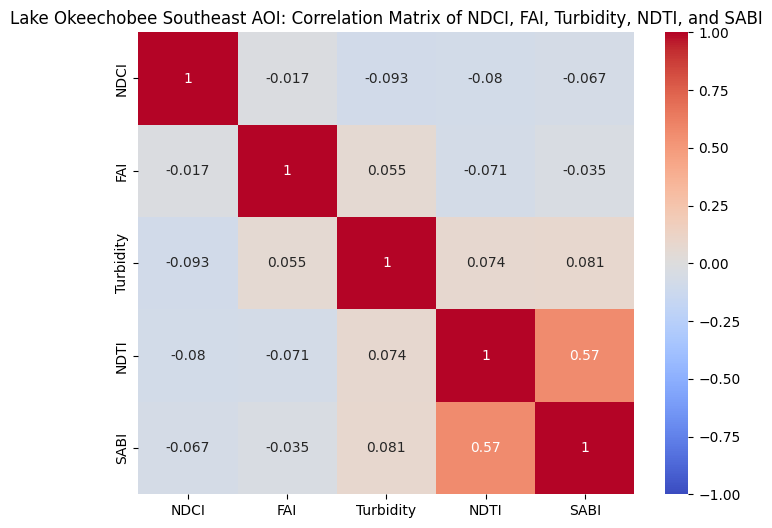

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000 -0.017133  -0.093405 -0.079595 -0.066533
FAI       -0.017133  1.000000   0.055375 -0.070563 -0.035025
Turbidity -0.093405  0.055375   1.000000  0.073970  0.080615
NDTI      -0.079595 -0.070563   0.073970  1.000000  0.568598
SABI      -0.066533 -0.035025   0.080615  0.568598  1.000000


In [294]:

import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- MERGE CSV FILES ---

# Directory where CSV files are located
csv_dir = 'HABProject/LakeO_SE_Shapefile/'

# Use glob to find only CSV files that contain the word 'merged'
csv_files = glob.glob(os.path.join(csv_dir, "*merged*.csv"))

# List to store DataFrames from each CSV file
dfs = []

# Loop through each CSV file, read it, and set 'date' as index
for file in csv_files:
    try:
        # Read CSV and parse 'date' as datetime
        df = pd.read_csv(file, parse_dates=["date"])
        # Set 'date' as index
        df.set_index("date", inplace=True)
        dfs.append(df)
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Concatenate all DataFrames if any were successfully loaded
if dfs:
    combined_df = pd.concat(dfs)
    # Sort by date index
    combined_df.sort_index(inplace=True)
    # Save the combined DataFrame to a new CSV file
    combined_csv_path = os.path.join(csv_dir, "Combined_Aggregated_Data.csv")
    combined_df.to_csv(combined_csv_path)
    print(f"Combined CSV saved to {combined_csv_path}")
else:
    print("No CSV files loaded. Please check your CSV files and the directory path.")

# --- CORRELATION ANALYSIS AND HEATMAP PLOTTING ---

# Import the combined CSV as a DataFrame; ensure 'date' is read as the index
daily_OceanBlvd_to_Point_df = pd.read_csv(
    combined_csv_path, index_col='date', parse_dates=['date']
)

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_OceanBlvd_to_Point_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Lake Okeechobee Southeast AOI: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')

# Save the figure
plt.savefig('HABProject/LakeO_SE_Shapefile/Heat_Map_LakeO_SE_Master.png')
plt.show()

# Print the correlation matrix to the console
print("Correlation Matrix:\n", corr_matrix)


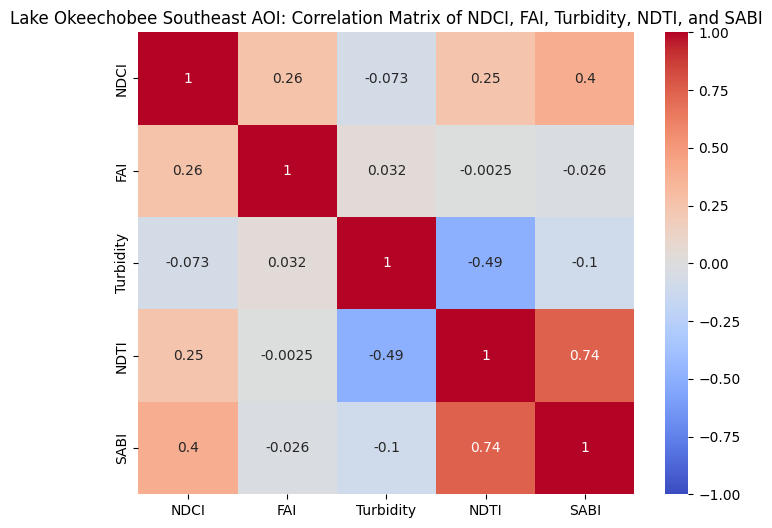

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000  0.264671  -0.072931  0.253487  0.395177
FAI        0.264671  1.000000   0.031803 -0.002501 -0.025574
Turbidity -0.072931  0.031803   1.000000 -0.493810 -0.101372
NDTI       0.253487 -0.002501  -0.493810  1.000000  0.742423
SABI       0.395177 -0.025574  -0.101372  0.742423  1.000000


<Figure size 640x480 with 0 Axes>

In [289]:
import seaborn as sns

#Import the daily cs csv as a df
daily_LakeO_SE_aoi_df = pd.read_csv('HABProject/Daily_Aggregated_Data_LakeO_SE_aoi_07012024_12312024.csv')

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_LakeO_SE_aoi_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plotting Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Lake Okeechobee Southeast AOI: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')
plt.show()

# Print Correlation Matrix
plt.savefig('HABProject/Heat_Map_LakeO_SE_aoi_07012024_12312024.png')  # Save the figure
print("Correlation Matrix:\n", corr_matrix)

### Scatterplot

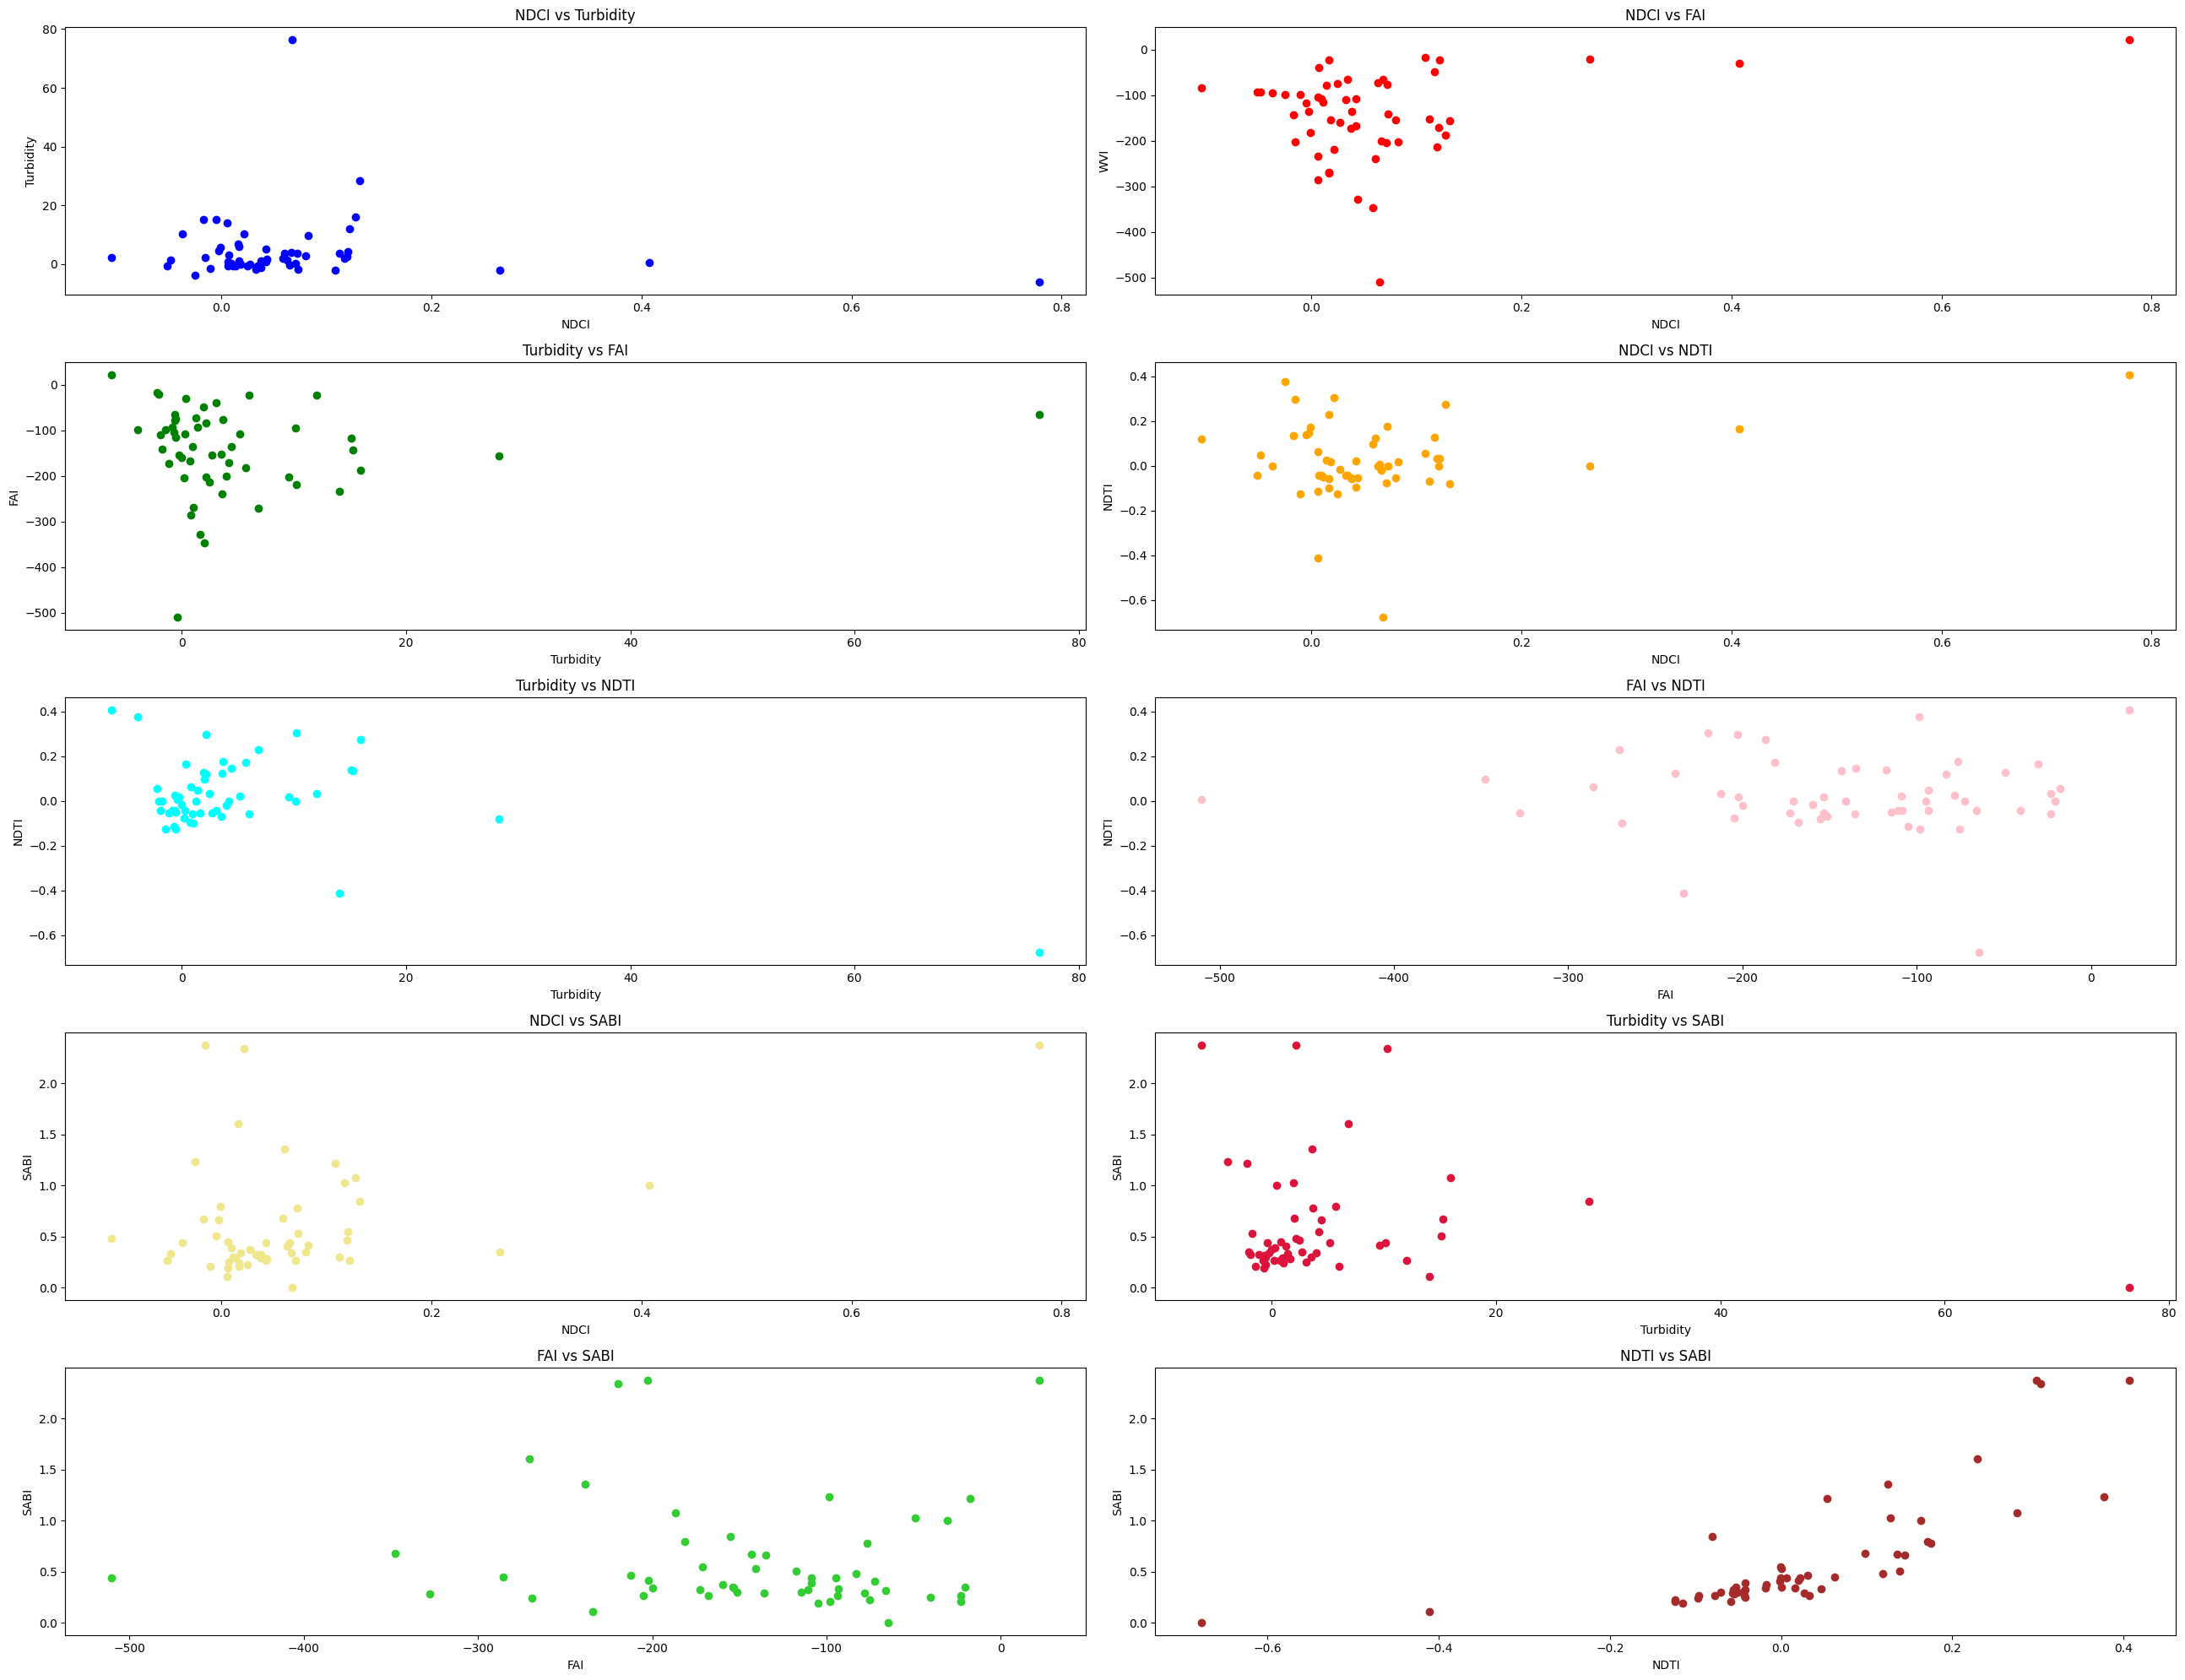

In [290]:
# Scatter Plot Analysis
fig, axs = plt.subplots(5, 2, figsize=(26, 20))

axs[0, 0].scatter(daily_LakeO_SE_aoi_df['NDCI'], daily_LakeO_SE_aoi_df['Turbidity'], c='blue')
axs[0, 0].set_xlabel('NDCI')
axs[0, 0].set_ylabel('Turbidity')
axs[0, 0].set_title('NDCI vs Turbidity')

axs[0, 1].scatter(daily_LakeO_SE_aoi_df['NDCI'], daily_LakeO_SE_aoi_df['FAI'], c='red')
axs[0, 1].set_xlabel('NDCI')
axs[0, 1].set_ylabel('WVI')
axs[0, 1].set_title('NDCI vs FAI')

axs[1, 0].scatter(daily_LakeO_SE_aoi_df['Turbidity'], daily_LakeO_SE_aoi_df['FAI'], c='green')
axs[1, 0].set_xlabel('Turbidity')
axs[1, 0].set_ylabel('FAI')
axs[1, 0].set_title('Turbidity vs FAI')

#Adding all NDTI here:

axs[1, 1].scatter(daily_LakeO_SE_aoi_df['NDCI'], daily_LakeO_SE_aoi_df['NDTI'], c='orange')
axs[1, 1].set_xlabel('NDCI')
axs[1, 1].set_ylabel('NDTI')
axs[1, 1].set_title('NDCI vs NDTI')

axs[2, 0].scatter(daily_LakeO_SE_aoi_df['Turbidity'], daily_LakeO_SE_aoi_df['NDTI'], c='cyan')
axs[2, 0].set_xlabel('Turbidity')
axs[2, 0].set_ylabel('NDTI')
axs[2, 0].set_title('Turbidity vs NDTI')

axs[2, 1].scatter(daily_LakeO_SE_aoi_df['FAI'], daily_LakeO_SE_aoi_df['NDTI'], c='pink')
axs[2, 1].set_xlabel('FAI')
axs[2, 1].set_ylabel('NDTI')
axs[2, 1].set_title('FAI vs NDTI')

#SABI Additions
axs[3, 0].scatter(daily_LakeO_SE_aoi_df['NDCI'], daily_LakeO_SE_aoi_df['SABI'], c='khaki')
axs[3, 0].set_xlabel('NDCI')
axs[3, 0].set_ylabel('SABI')
axs[3, 0].set_title('NDCI vs SABI')

axs[3, 1].scatter(daily_LakeO_SE_aoi_df['Turbidity'], daily_LakeO_SE_aoi_df['SABI'], c='crimson')
axs[3, 1].set_xlabel('Turbidity')
axs[3, 1].set_ylabel('SABI')
axs[3, 1].set_title('Turbidity vs SABI')

axs[4, 0].scatter(daily_LakeO_SE_aoi_df['FAI'], daily_LakeO_SE_aoi_df['SABI'], c='limegreen')
axs[4, 0].set_xlabel('FAI')
axs[4, 0].set_ylabel('SABI')
axs[4, 0].set_title('FAI vs SABI')

axs[4, 1].scatter(daily_LakeO_SE_aoi_df['NDTI'], daily_LakeO_SE_aoi_df['SABI'], c='brown')
axs[4, 1].set_xlabel('NDTI')
axs[4, 1].set_ylabel('SABI')
axs[4, 1].set_title('NDTI vs SABI')


plt.tight_layout()
plt.savefig('HABProject/Scatter_plot_LakeO_SE_aoi_07012024_12312024.png')  # Save the figure
plt.show()

# Relating GEE Data to SFWMD Data

### Merged all the downloaded station data into one CSV, indexed it by date 

In [297]:
pip install requests pandas

Note: you may need to restart the kernel to use updated packages.


In [298]:
import pandas as pd

# List of input CSV files that contain report data
report_files = ['REPORT_1.csv', 'REPORT_2.csv', 'REPORT_3.csv']

# Define the columns we want to keep
desired_columns = [
    'Station ID', 
    'Collection_Date', 
    'Measure Date', 
    'Test Name', 
    'Test Number', 
    'Value', 
    'Units'
]

# List to hold data from each CSV file
dataframes = []

# Loop over each report file, load the data, and select the desired columns
for file in report_files:
    try:
        df = pd.read_csv(file)
        # Select the columns; if there are additional columns in the file, they will be dropped
        df_filtered = df[desired_columns]
        dataframes.append(df_filtered)
        print(f"Processed {file} successfully.")
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Concatenate all the filtered DataFrames into one DataFrame
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    # Save the combined DataFrame to a new CSV file
    combined_df.to_csv('REPORT_COMBINED.csv', index=False)
    print("Combined CSV file 'REPORT_COMBINED.csv' saved successfully.")
else:
    print("No data was processed. Please check the input files.")

df

Processed REPORT_1.csv successfully.
Processed REPORT_2.csv successfully.
Processed REPORT_3.csv successfully.
Combined CSV file 'REPORT_COMBINED.csv' saved successfully.


Project Code Station ID   Sample ID  First Trigger Date  \
0                Y       LZ40   P113857-7                 NaN   
1                Y       LZ40   P113857-7                 NaN   
2                Y       LZ40   P113857-7                 NaN   
3                Y       LZ40   P113857-7                 NaN   
4                Y       LZ40   P113857-7                 NaN   
...            ...        ...         ...                 ...   
24001            Y  POLESOUT3  P154909-12                 NaN   
24002            Y  POLESOUT3  P154909-12                 NaN   
24003            Y  POLESOUT3  P154909-12                 NaN   
24004            Y  POLESOUT3  P154909-12                 NaN   
24005            Y  POLESOUT3  P154909-12                 NaN   

         Collection_Date Sample Type New Collection Method  Depth Depth Unit  \
0      14-JAN-2020 11:48            SAMP                 G    0.5          m   
1      14-JAN-2020 11:48            SAMP                 G    0.5          m   
2      14-JAN-2020 11:48            SAMP                 G    0.5          m   
3      14-JAN-2020 11:48            SAMP                 G    0.5          m   
4      14-JAN-2020 11:48            SAMP                 G    0.5          m   
...                  ...             ...               ...    ...        ...   
24001  03-DEC-2024 12:03            SAMP                 G    0.5          m   
24002  03-DEC-2024 12:03            SAMP                 G    0.5          m   
24003  03-DEC-2024 12:03            SAMP                 G    0.5          m   
24004  03-DEC-2024 12:03            SAMP                 G    0.5          m   
24005  03-DEC-2024 12:03            SAMP                 G    0.5          m   

      Matrix  ...    Filtration Date Sample Type  QC Type Discharge  \
0         SW  ...                NaN           0      NaN         0   
1         SW  ...  15-JAN-2020 15:09           0      NaN         0   
2         SW  ...                NaN           0      NaN         0   
3         SW  ...                NaN           0      NaN         0   
4         SW  ...                NaN           0      NaN         0   
...      ...  ...                ...         ...      ...       ...   
24001     SW  ...                NaN           0      NaN         0   
24002     SW  ...                NaN           0      NaN         0   
24003     SW  ...                NaN           0      NaN         0   
24004     SW  ...  04-DEC-2024 12:42           0      NaN         0   
24005     SW  ...                NaN           0      NaN         0   

      Up/Down Stream  Weather Code  Program Type NDEC  \
0                  0             0           MON  1.0   
1                  0             0           MON  1.0   
2                  0             0           MON  1.0   
3                  0             0           MON  2.0   
4                  0             0           MON  1.0   
...              ...           ...           ...  ...   
24001              0             0           MON  1.0   
24002              0             0           MON  1.0   
24003              0             0           MON  2.0   
24004              0             0           MON  NaN   
24005              0             0           MON  3.0   

                                         Sample Comments  Result Comments  
0      Air pollution from cane field burning at south...              NaN  
1      Air pollution from cane field burning at south...              NaN  
2      Air pollution from cane field burning at south...              NaN  
3      Air pollution from cane field burning at south...              NaN  
4      Air pollution from cane field burning at south...              NaN  
...                                                  ...              ...  
24001                      Moderate chop with whitecaps.              NaN  
24002                      Moderate chop with whitecaps.              NaN  
24003                      Moderate chop w

### Looking at the dimensions of the combined report

In [299]:
# Read the combined CSV file
combined_df = pd.read_csv('REPORT_COMBINED.csv')

# Print the dimensions of the DataFrame
print("Dimensions of REPORT_COMBINED.csv:", combined_df.shape)


Dimensions of REPORT_COMBINED.csv: (59246, 7)


### Adding Lat and Long coordinates to the station ID based on its name

In [301]:
# Read the combined report data
report_df = pd.read_csv('REPORT_COMBINED.csv')

# Read the active water quality stations file
active_df = pd.read_csv('Active Water Quality Stations.csv')

# Inspect columns from both dataframes if needed:
#print(report_df.columns)
#print(active_df.columns)

# Assuming the report file has "Station ID" and the active file has "STATION", "LAT", "LONG"
# We'll merge based on these columns. Use a left join so all rows from the report data are kept.
merged_df = pd.merge(report_df, active_df[['STATION', 'LAT', 'LONG']], 
                     left_on='Station ID', right_on='STATION', how='left')

# Optionally, if you don't need the duplicated "STATION" column from the active file, remove it:
merged_df.drop('STATION', axis=1, inplace=True)

# Save the merged file to a new CSV
merged_df.to_csv('REPORT_COMBINED_WITH_COORD.csv', index=False)
print("Merged file with LAT and LONG has been created at '/mnt/data/REPORT_COMBINED_WITH_COORD.csv'.")


Merged file with LAT and LONG has been created at '/mnt/data/REPORT_COMBINED_WITH_COORD.csv'.


### For each shapefile aggregated table, adding a Shapefile field to give it an ID

In [303]:
#Lake O - Adding Shapefile Field to Distinguish Where the Data is From
# Load your CSV data into a DataFrame
df = pd.read_csv('HABProject/LakeO_SE_Shapefile/Combined_Aggregated_Data.csv')

# Add a new field called 'Shapefile' with the value of your shapefile name for every row
df['Shapefile'] = 'LakeO_SE'

# Optionally, save the updated DataFrame back to CSV
df.to_csv('HABProject/Combined_Aggregated_Data_LakeO_SE.csv', index=False)

#NEXT
# Load your CSV data into a DataFrame
df = pd.read_csv('HABProject/LakeO_SW_Shapefile/Combined_Aggregated_Data.csv')

# Add a new field called 'Shapefile' with the value of your shapefile name for every row
df['Shapefile'] = 'LakeO_SW'

# Optionally, save the updated DataFrame back to CSV
df.to_csv('HABProject/Combined_Aggregated_Data_LakeO_SW.csv', index=False)

#NEXT
# Load your CSV data into a DataFrame
df = pd.read_csv('HABProject/LakeO_NE_Shapefile/Combined_Aggregated_Data.csv')

# Add a new field called 'Shapefile' with the value of your shapefile name for every row
df['Shapefile'] = 'LakeO_NE'

# Optionally, save the updated DataFrame back to CSV
df.to_csv('HABProject/Combined_Aggregated_Data_LakeO_NE.csv', index=False)

#NEXT
# Load your CSV data into a DataFrame
df = pd.read_csv('HABProject/LakeO_NW_Shapefile/Combined_Aggregated_Data.csv')
# Add a new field called 'Shapefile' with the value of your shapefile name for every row
df['Shapefile'] = 'LakeO_NW'

# Optionally, save the updated DataFrame back to CSV
df.to_csv('HABProject/Combined_Aggregated_Data_LakeO_NW.csv', index=False)




#NEXT
# Load your CSV data into a DataFrame
df = pd.read_csv('HABProject/OceanBlvd_to_Point_Shapefile/Combined_Aggregated_Data.csv')

# Add a new field called 'Shapefile' with the value of your shapefile name for every row
df['Shapefile'] = 'OceanBlvd_to_Point'

# Optionally, save the updated DataFrame back to CSV
df.to_csv('HABProject/Combined_Aggregated_Data_OceanBlvd_to_Point.csv', index=False)


#NEXT
# Load your CSV data into a DataFrame
df = pd.read_csv('HABProject/DHwy_to_OceanBlvd_Shapefile/Combined_Aggregated_Data.csv')

# Add a new field called 'Shapefile' with the value of your shapefile name for every row
df['Shapefile'] = 'DHwy_to_OceanBlvd'

# Optionally, save the updated DataFrame back to CSV
df.to_csv('HABProject/Combined_Aggregated_Data_DHwy_to_OceanBlvd.csv', index=False)


#NEXT
# Load your CSV data into a DataFrame
df = pd.read_csv('HABProject/MDBBridge_to_DHwy_to_OtherInput_Shapefile/Combined_Aggregated_Data.csv')

# Add a new field called 'Shapefile' with the value of your shapefile name for every row
df['Shapefile'] = 'MDBBridge_to_DHwy_to_OtherInput'

# Optionally, save the updated DataFrame back to CSV
df.to_csv('HABProject/Combined_Aggregated_Data_MDBBridge_to_DHwy_to_OtherInput.csv', index=False)


#NEXT
# Load your CSV data into a DataFrame
df = pd.read_csv('HABProject/S308C_Shapefile/Combined_Aggregated_Data.csv')

# Add a new field called 'Shapefile' with the value of your shapefile name for every row
df['Shapefile'] = 'S308C'

# Optionally, save the updated DataFrame back to CSV
df.to_csv('HABProject/Combined_Aggregated_Data_S308C.csv', index=False)


#NEXT
# Load your CSV data into a DataFrame
df = pd.read_csv('HABProject/S80_Shapefile/Combined_Aggregated_Data.csv')

# Add a new field called 'Shapefile' with the value of your shapefile name for every row
df['Shapefile'] = 'S80'

# Optionally, save the updated DataFrame back to CSV
df.to_csv('HABProject/Combined_Aggregated_Data_S80.csv', index=False)

### Running Correlation Matrix for ALL GEE shapefile data

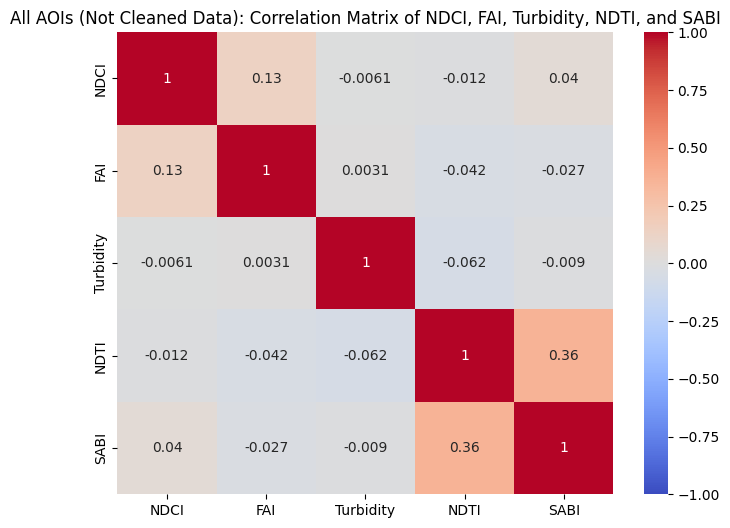

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000  0.132845  -0.006119 -0.011783  0.039753
FAI        0.132845  1.000000   0.003122 -0.042375 -0.027177
Turbidity -0.006119  0.003122   1.000000 -0.061980 -0.008966
NDTI      -0.011783 -0.042375  -0.061980  1.000000  0.359448
SABI       0.039753 -0.027177  -0.008966  0.359448  1.000000


<Figure size 640x480 with 0 Axes>

In [317]:
import seaborn as sns

#Import the daily cs csv as a df
daily_all_stations_df = pd.read_csv('HABProject/Combined_Shapefiles_Data.csv')

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_all_stations_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plotting Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('All AOIs (Not Cleaned Data): Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')
plt.show()

# Print Correlation Matrix
plt.savefig('HABProject/Heat_Map_Combined_Shapefiles_Data.png')  # Save the figure
print("Correlation Matrix:\n", corr_matrix)

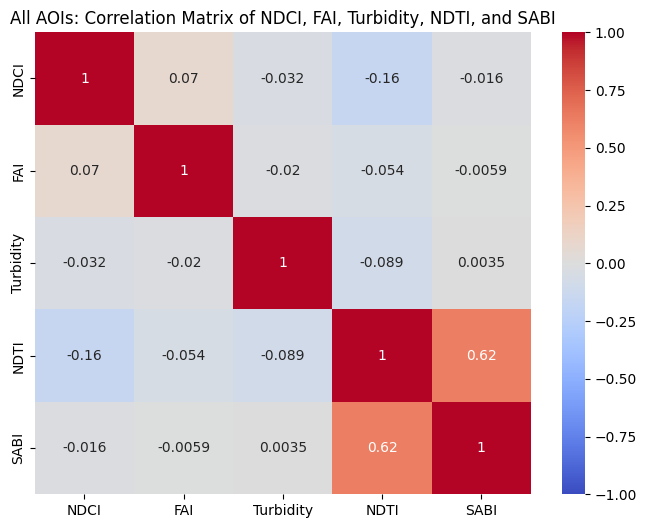

Correlation Matrix:
                NDCI       FAI  Turbidity      NDTI      SABI
NDCI       1.000000  0.070462  -0.031992 -0.158437 -0.016027
FAI        0.070462  1.000000  -0.020217 -0.054225 -0.005889
Turbidity -0.031992 -0.020217   1.000000 -0.088548  0.003529
NDTI      -0.158437 -0.054225  -0.088548  1.000000  0.622487
SABI      -0.016027 -0.005889   0.003529  0.622487  1.000000


<Figure size 640x480 with 0 Axes>

In [318]:
import seaborn as sns

#Import the daily cs csv as a df
daily_all_stations_df = pd.read_csv('HABProject/Aggregated_Shapefiles_Data_Cleaned.csv')

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_all_stations_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plotting Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('All AOIs: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')
plt.show()

# Print Correlation Matrix
plt.savefig('HABProject/Heat_Map_Aggregated_Shapefiles_Data_Cleaned.png')  # Save the figure
print("Correlation Matrix:\n", corr_matrix)

### Combining the aggregated data from each station into one

In [304]:
import pandas as pd
import glob

# Define the folder or pattern for your CSV files
csv_files = glob.glob("HABProject/Combined_Aggregated_Data*.csv")  # adjust the path accordingly

# Create a list to hold all DataFrames
dfs = []

# Loop through each CSV file, read it, and append to the list
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)
    print(f"Loaded {file}")

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Convert the 'date' column to datetime (adjust column name if needed)
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Set the index to the 'date' column
merged_df.set_index('date', inplace=True)

# Optional: sort the DataFrame by the date index if desired
merged_df.sort_index(inplace=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv("HABProject/Combined_Shapefiles_Data.csv")
print("Merged CSV file saved as 'Combined_Shapefiles_Data.csv'")


Loaded HABProject\Combined_Aggregated_Data_DHwy_to_OceanBlvd.csv
Loaded HABProject\Combined_Aggregated_Data_LakeO_NE.csv
Loaded HABProject\Combined_Aggregated_Data_LakeO_NW.csv
Loaded HABProject\Combined_Aggregated_Data_LakeO_SE.csv
Loaded HABProject\Combined_Aggregated_Data_LakeO_SW.csv
Loaded HABProject\Combined_Aggregated_Data_MDBBridge_to_DHwy_to_OtherInput.csv
Loaded HABProject\Combined_Aggregated_Data_OceanBlvd_to_Point.csv
Loaded HABProject\Combined_Aggregated_Data_S308C.csv
Loaded HABProject\Combined_Aggregated_Data_S80.csv
Merged CSV file saved as 'Combined_Shapefiles_Data.csv'


### Some stations had a lot of duplicated per date, reducing it based on mean values for each date and station so there is only one values for each index per date and station

In [306]:
import pandas as pd

# Load the Excel file
df = pd.read_csv('HABProject/Combined_Shapefiles_Data.csv')

# Optionally, inspect the columns to verify names
print("Columns:", df.columns)

# Ensure the date column is in datetime format. Replace 'date' with your actual date field if needed.
df['date'] = pd.to_datetime(df['date'])

# Group the data by 'date' and 'Shapefile' and calculate the mean for the selected columns
aggregated_df = df.groupby(['date', 'Shapefile'])[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].mean().reset_index()

# Optionally, inspect the aggregated data
print(aggregated_df.head())

# Save the aggregated DataFrame to a new Excel file (or CSV if you prefer)
aggregated_df.to_csv('HABProject/Aggregated_Shapefiles_Data_Cleaned.csv', index=False)
# Alternatively, to save as CSV:
# aggregated_df.to_csv('/mnt/data/Aggregated_Shapefiles_Data.csv', index=False)

print("Aggregation complete. Aggregated data saved to 'HABProject/Aggregated_Shapefiles_Data_Cleaned.csv'.")


Columns: Index(['date', 'NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI', 'Shapefile'], dtype='object')
        date          Shapefile      NDCI         FAI  Turbidity      NDTI  \
0 2020-01-01  DHwy_to_OceanBlvd -0.032147  -50.020739  66.707688  0.061349   
1 2020-01-01           LakeO_NE  0.050116 -114.197537  13.544004 -0.049402   
2 2020-01-01           LakeO_NW  0.088650 -107.077324   1.398058 -0.105717   
3 2020-01-01           LakeO_SE  0.053206  -92.016261  11.117780  0.009934   
4 2020-01-01           LakeO_SW  0.119329  -97.285019   1.701118 -0.146672   

       SABI  
0  0.870171  
1  0.386751  
2  0.303687  
3  0.547202  
4  0.280400  
Aggregation complete. Aggregated data saved to 'HABProject/Aggregated_Shapefiles_Data_Cleaned.csv'.


### Assigning Shapefile names to Stations

In [309]:
import geopandas as gpd
import pandas as pd
import glob
import os

# Step 1: Load the station CSV file and create a GeoDataFrame
stations_df = pd.read_csv('HABProject/REPORT_COMBINED_WITH_COORD.csv')  # Replace with your CSV filename
# Create points from the 'LONG' and 'LAT' columns; note that LONG is the x-coordinate and LAT is the y-coordinate.
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['LONG'], stations_df['LAT']),
    crs='EPSG:4269'  # NAD 1983
)

# Step 2: Read multiple shapefiles from a folder
# Adjust the path pattern to where your shapefiles are located.
shapefile_paths = glob.glob("D:/Classes/STPythonFinalProject/*.shp")
shapefile_gdfs = []

for shp in shapefile_paths:
    gdf = gpd.read_file(shp)
    # Ensure the shapefile is in the same CRS as the stations
    if gdf.crs != stations_gdf.crs:
        gdf = gdf.to_crs(stations_gdf.crs)
    # Extract the base name of the shapefile (without extension) and add it as a new column
    filename = os.path.splitext(os.path.basename(shp))[0]
    gdf['ShapefileName'] = filename
    shapefile_gdfs.append(gdf)

# Combine all shapefile GeoDataFrames into one
combined_shapes = pd.concat(shapefile_gdfs, ignore_index=True)

# Step 3: Perform the spatial join.
# This assigns, for each station point, the 'ShapefileName' of the polygon that it falls within.
# The 'predicate' parameter 'within' means the point must be fully inside the polygon.
stations_with_shape = gpd.sjoin(
    stations_gdf,
    combined_shapes[['ShapefileName', 'geometry']],
    how='left',
    predicate='within'
)

# Step 4: (Optional) Save the result to a CSV file.
# Drop the geometry column if you only need the attribute data.
stations_with_shape.drop(columns='geometry').to_csv("HABProject/Stations_with_Shapefile_Names.csv", index=False)

print("Spatial join complete. Output saved as 'Stations_with_Shapefile_Names.csv'.")


Spatial join complete. Output saved as 'Stations_with_Shapefile_Names.csv'.


### Going to index the Stations_with_Shapefiles_Name.csv with a new date field

In [316]:
import pandas as pd
import os

# Define the input file name
input_file = "HABProject/Stations_with_Shapefile_Names.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(input_file)

# Inspect the raw values in 'Collection Date' to determine their format
print("Raw 'Collection_Date' values:")
print(df["Collection_Date"].head(10))

# Attempt to convert 'Collection Date' using pandas' automatic inference
df["Collection_Date"] = pd.to_datetime(df["Collection_Date"], errors='coerce')

# Check the result of the conversion; if you see NaT values, the format might be different than expected
print("Converted 'Collection_Date' values:")
print(df["Collection_Date"].head(10))

# If many values are NaT, consider specifying the format explicitly.
# For example, if your dates look like "15-JAN-2020 10:06", the format would be: "%d-%b-%Y %H:%M"
# Uncomment the next two lines and comment out the above automatic conversion if needed:
# df["Collection Date"] = pd.to_datetime(df["Collection Date"], format="%d-%b-%Y %H:%M", errors='coerce')
# print("Converted 'Collection Date' values with explicit format:")
# print(df["Collection Date"].head(10))

# Create a new column 'date' that contains only the date portion
df["date"] = df["Collection_Date"].dt.date

# Set the new 'date' column as the DataFrame index
df.set_index("date", inplace=True)

# Construct the output filename by appending '_dateindexed' before the extension.
base, ext = os.path.splitext(input_file)
output_file = base + "_dateindexed" + ext

# Save the updated DataFrame to a new CSV file
df.to_csv(output_file, index=True)

print(f"Saved the updated CSV as {output_file}")



Raw 'Collection_Date' values:
0     1/2/2020 8:02
1     1/2/2020 8:02
2     1/2/2020 8:02
3     1/2/2020 8:02
4     1/2/2020 8:02
5     1/2/2020 8:02
6     1/2/2020 8:03
7     1/2/2020 8:03
8    1/9/2020 10:04
9    1/9/2020 10:04
Name: Collection_Date, dtype: object
Converted 'Collection_Date' values:
0   2020-01-02 08:02:00
1   2020-01-02 08:02:00
2   2020-01-02 08:02:00
3   2020-01-02 08:02:00
4   2020-01-02 08:02:00
5   2020-01-02 08:02:00
6   2020-01-02 08:03:00
7   2020-01-02 08:03:00
8   2020-01-09 10:04:00
9   2020-01-09 10:04:00
Name: Collection_Date, dtype: datetime64[ns]
Saved the updated CSV as HABProject/Stations_with_Shapefile_Names_dateindexed.csv


# Machine Learning

### Getting each unique test name from the in situ data

In [320]:
import pandas as pd

# Load your data file (adjust the filename and method if needed).
# For Excel:
df = pd.read_csv("HABProject/Stations_with_Shapefile_Names_dateindexed.csv")
# For CSV, use pd.read_csv("yourfilename.csv")

# Check if 'Test Name' exists in the columns
if 'Test Name' in df.columns:
    # List out each unique Test Name
    unique_test_names = df['Test Name'].unique()
    print("Unique 'Test Name' values:")
    for name in unique_test_names:
        print(name)
else:
    print("'Test Name' column not found in the dataframe.")


Unique 'Test Name' values:
TOTAL NITROGEN
PHOSPHATE, TOTAL AS P
Temperature
NITRATE+NITRITE-N
PH, FIELD
DISSOLVED OXYGEN
PHOSPHATE, ORTHO AS P
NITRITE-N
TURBIDITY
TOTAL SUSPENDED SOLIDS
CHLOROPHYLL-A(LC)
CHLOROPHYLL-B (LC)
MICROCYSTIN-LR (EQUIV)
VOLATILE SUSPENDED SOLIDS
SULFATE
MICROCYSTIN LF
MICROCYSTIN YR
MICROCYSTIN WR
MICROCYSTIN RR
MICROCYSTIN LW
MICROCYSTIN LR
MICROCYSTIN LA
MICROCYSTIN LY
MICROCYSTIN HTYR
MICROCYSTIN HILR
NITROGEN, TOTAL DISSOLVED
PHOSPHATE, DISSOLVED AS P
NITRATE-N
nan


### Renaming Shapefile to ShapefileName in the Shapefile index dataframe

In [323]:
import pandas as pd

# Load the CSV file
input_file = 'HABProject/Aggregated_Shapefiles_Data_Cleaned.csv'
df = pd.read_csv(input_file)

# Check if the 'Shapefile' column exists and rename it to 'ShapefileName'
if 'Shapefile' in df.columns:
    df.rename(columns={'Shapefile': 'ShapefileName'}, inplace=True)
    print("Column renamed successfully.")
else:
    print("The 'Shapefile' column was not found.")

# Save the updated DataFrame to a new CSV file
output_file = 'HABProject/Aggregated_Shapefiles_Data_Cleaned_renamed.csv'
df.to_csv(output_file, index=False)
print(f"Updated CSV file saved as {output_file}")


Column renamed successfully.
Updated CSV file saved as HABProject/Aggregated_Shapefiles_Data_Cleaned_renamed.csv


In [ ]:
### Changing name of S308C_to_S80 shapefile to S308C

In [336]:
import pandas as pd

# Load the CSV file
input_file = 'HABProject/Stations_with_Shapefile_Names_dateindexed.csv'
df = pd.read_csv(input_file)

# Update the 'ShapefileName' field: if it contains "S308C_to_S80", set it to "S308C"
df.loc[df['ShapefileName'].str.contains("S308C_to_S80", na=False), 'ShapefileName'] = 'S308C'

# Save the updated DataFrame to a new CSV file
output_file = 'HABProject/Stations_with_Shapefile_Names_dateindexed.csv'
df.to_csv(output_file, index=False)

print(f"Updated file saved as {output_file}")


Updated file saved as HABProject/Stations_with_Shapefile_Names_dateindexed.csv


In [327]:
import pandas as pd

# Assuming merged_df is already created from your merge:
print("Columns in merged DataFrame:")
print(merged_df.columns.tolist())

# Define the nutrient and spectral index column names you expect:
nutrient_cols = ['TOTAL NITROGEN', 'PHOSPHATE, TOTAL AS P', 'Temperature', 'NITRATE+NITRITE-N', 
                  'PH, FIELD', 'DISSOLVED OXYGEN', 'PHOSPHATE, ORTHO AS P', 'NITRITE-N', 
                  'TURBIDITY', 'TOTAL SUSPENDED SOLIDS', 'CHLOROPHYLL-A(LC)', 'CHLOROPHYLL-B (LC)', 
                  'MICROCYSTIN-LR (EQUIV)', 'VOLATILE SUSPENDED SOLIDS', 'SULFATE', 'MICROCYSTIN LF', 
                  'MICROCYSTIN YR', 'MICROCYSTIN WR', 'MICROCYSTIN RR', 'MICROCYSTIN LW', 
                  'MICROCYSTIN LR', 'MICROCYSTIN LA', 'MICROCYSTIN LY', 'MICROCYSTIN HTYR', 
                  'MICROCYSTIN HILR', 'NITROGEN, TOTAL DISSOLVED', 'PHOSPHATE, DISSOLVED AS P', 
                  'NITRATE-N']

spectral_cols = ['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']

# Check which expected columns are missing from the merged dataframe:
expected_cols = nutrient_cols + spectral_cols
missing_cols = [col for col in expected_cols if col not in merged_df.columns]
if missing_cols:
    print("Warning: The following expected columns are missing from merged_df:")
    print(missing_cols)
else:
    print("All expected columns are present.")

# Optionally, if you want to proceed with just the columns found in merged_df:
present_nutrient_cols = [col for col in nutrient_cols if col in merged_df.columns]
present_spectral_cols = [col for col in spectral_cols if col in merged_df.columns]

# Generate a summary of the columns that are present:
print("\nSummary of available nutrient and spectral columns:")
print(merged_df[present_nutrient_cols + present_spectral_cols].describe())


Columns in merged DataFrame:
['index_x', 'date', 'Station ID', 'Collection_Date', 'Measure Date', 'Test Name', 'Test Number', 'Value', 'Units', 'LAT', 'LONG', 'index_right', 'ShapefileName', 'index_y', 'NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']
['TOTAL NITROGEN', 'PHOSPHATE, TOTAL AS P', 'Temperature', 'NITRATE+NITRITE-N', 'PH, FIELD', 'DISSOLVED OXYGEN', 'PHOSPHATE, ORTHO AS P', 'NITRITE-N', 'TURBIDITY', 'TOTAL SUSPENDED SOLIDS', 'CHLOROPHYLL-A(LC)', 'CHLOROPHYLL-B (LC)', 'MICROCYSTIN-LR (EQUIV)', 'VOLATILE SUSPENDED SOLIDS', 'SULFATE', 'MICROCYSTIN LF', 'MICROCYSTIN YR', 'MICROCYSTIN WR', 'MICROCYSTIN RR', 'MICROCYSTIN LW', 'MICROCYSTIN LR', 'MICROCYSTIN LA', 'MICROCYSTIN LY', 'MICROCYSTIN HTYR', 'MICROCYSTIN HILR', 'NITROGEN, TOTAL DISSOLVED', 'PHOSPHATE, DISSOLVED AS P', 'NITRATE-N']

Summary of available nutrient and spectral columns:
              NDCI          FAI     Turbidity         NDTI         SABI
count  9707.000000  9707.000000   9707.000000  9707.000000  9707.000000
mea

In [ ]:
output_file = 'Stations_with_Shapefile_Names_dateindexed_updated.csv'
df.to_csv(output_file, index=False)

### Data seperating by Test Name

In [343]:
import pandas as pd

# Load the long-format data; adjust the file name and reading method as needed.
df_long = pd.read_csv("HABProject/Stations_with_Shapefile_Names_dateindexed.csv")

# Inspect the DataFrame to identify the columns
print("Original DataFrame columns:")
print(df_long.columns.tolist())

# Define the list of columns that will remain constant (the keys)
# Adjust the keys based on your dataset (e.g., Station ID, date, LAT, LONG, ShapefileName, etc.)
common_cols = ['Station ID', 'date', 'LAT', 'LONG', 'ShapefileName']

# Verify that these columns exist; if your date column is named differently (e.g., "Collection Date"),
# update the list accordingly.
for col in common_cols:
    if col not in df_long.columns:
        print(f"Warning: {col} not found in the DataFrame!")

# Pivot the data using pivot_table:
# - index: the columns that uniquely identify an observation (common_cols).
# - columns: the "Test Name" that we want to pivot into separate fields.
# - values: the columns we're interested in pivoting: here we do "Value" and "Units" together.
df_wide = df_long.pivot_table(
    index=common_cols,
    columns='Test Name',
    values=['Value', 'Units'],
    aggfunc='first'  # If multiple measurements exist, you can change this (e.g., to 'mean')
).reset_index()

# Flatten the hierarchical columns
df_wide.columns = [
    # If the column came from one of the common_cols, we only get a single-level column.
    # Otherwise, join the tuple (e.g., "Value" and the actual test name)
    '_'.join([str(part) for part in col if part]).strip()
    for col in df_wide.columns.values
]

# Optional: show the resulting DataFrame columns
print("Pivoted DataFrame columns:")
print(df_wide.columns.tolist())

# Save the pivoted/wide DataFrame to CSV for further analysis.
df_wide.to_csv("HABProject/Stations_with_Shapefile_Names_NutrientTests.csv", index=False)
print("Wide-format data saved as your_wide_format_data.csv")



Original DataFrame columns:
['date', 'Station ID', 'Collection_Date', 'Measure Date', 'Test Name', 'Test Number', 'Value', 'Units', 'LAT', 'LONG', 'index_right', 'ShapefileName']
Pivoted DataFrame columns:
['Station ID', 'date', 'LAT', 'LONG', 'ShapefileName', 'Units_CHLOROPHYLL-A(LC)', 'Units_CHLOROPHYLL-B (LC)', 'Units_DISSOLVED OXYGEN', 'Units_MICROCYSTIN HILR', 'Units_MICROCYSTIN HTYR', 'Units_MICROCYSTIN LA', 'Units_MICROCYSTIN LF', 'Units_MICROCYSTIN LR', 'Units_MICROCYSTIN LW', 'Units_MICROCYSTIN LY', 'Units_MICROCYSTIN RR', 'Units_MICROCYSTIN WR', 'Units_MICROCYSTIN YR', 'Units_MICROCYSTIN-LR (EQUIV)', 'Units_NITRATE+NITRITE-N', 'Units_NITRATE-N', 'Units_NITRITE-N', 'Units_NITROGEN, TOTAL DISSOLVED', 'Units_PHOSPHATE, DISSOLVED AS P', 'Units_PHOSPHATE, ORTHO AS P', 'Units_PHOSPHATE, TOTAL AS P', 'Units_SULFATE', 'Units_TOTAL NITROGEN', 'Units_TOTAL SUSPENDED SOLIDS', 'Units_TURBIDITY', 'Units_Temperature', 'Units_VOLATILE SUSPENDED SOLIDS', 'Value_CHLOROPHYLL-A(LC)', 'Value_CHL

### Merged data with close dates (3 day window)

In [351]:
import pandas as pd

# Load the field sampling data (with nutrient tests) and satellite data
df_field = pd.read_csv("HABProject/Stations_with_Shapefile_Names_NutrientTests.csv")
df_sat = pd.read_csv("HABProject/Aggregated_Shapefiles_Data_Cleaned_renamed.csv")

# Convert the 'date' columns to datetime in both dataframes
df_field["date"] = pd.to_datetime(df_field["date"], errors="coerce")
df_sat["date"] = pd.to_datetime(df_sat["date"], errors="coerce")

# Drop rows where 'date' or 'ShapefileName' are null, as merge_asof cannot work with null keys.
df_field = df_field.dropna(subset=["date", "ShapefileName"])
df_sat = df_sat.dropna(subset=["date", "ShapefileName"])

# Sort both DataFrames by the 'date' column (required by merge_asof)
df_field = df_field.sort_values("date")
df_sat = df_sat.sort_values("date")

# Merge using merge_asof within a 3-day window.
# The suffixes parameter ensures that if there are common column names between the datasets,
# both versions are kept (one with _field and one with _sat)
merged_df = pd.merge_asof(
    df_field,
    df_sat,
    on="date",
    by="ShapefileName",
    direction="nearest",
    tolerance=pd.Timedelta("7D"),
    suffixes=('_field', '_sat')
)

# Check the shape of the merged DataFrame
print("Merged DataFrame shape:", merged_df.shape)

# Save the merged DataFrame to a new CSV file
output_file = "HABProject/Merged_Nearest_Data_7D.csv"
merged_df.to_csv(output_file, index=False)
print(f"Merged DataFrame saved as '{output_file}'")




Merged DataFrame shape: (1865, 65)
Merged DataFrame saved as 'HABProject/Merged_Nearest_Data_7D.csv'


### Trying machine learning

In [348]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# ---------------------------
# 1. Load the Merged Dataset
# ---------------------------
# Replace "Merged_Nearest_Data.csv" with the path to your merged CSV file.
merged_df = pd.read_csv("HABProject/Merged_Nearest_Data_1D.csv")

# ---------------------------
# 2. Define Feature and Target Columns
# ---------------------------
# Update these lists to match your actual column names.
# 'nutrient_cols' should include the nutrient measurements that you want to use as features.
# 'spectral_cols' should include the spectral indices to be modeled.
nutrient_cols = [
    'Value_TOTAL NITROGEN',
    'Value_PHOSPHATE, TOTAL AS P',
    'Value_Temperature',
    'Value_NITRATE+NITRITE-N',
    'Value_PH, FIELD',
    'Value_DISSOLVED OXYGEN',
    'Value_PHOSPHATE, ORTHO AS P',
    'Value_NITRITE-N',
    'Value_TURBIDITY',
    'Value_TOTAL SUSPENDED SOLIDS'
]

spectral_cols = [
    'NDCI',
    'FAI',
    'Turbidity',
    'NDTI',
    'SABI'
]

# ---------------------------
# 3. Data Cleaning/Preparation
# ---------------------------
# For this example, drop any rows that have missing values in our selected columns.
data = merged_df[nutrient_cols + spectral_cols].dropna()

# Separate into features (X) and responses (y)
X = data[nutrient_cols]
y = data[spectral_cols]

# ---------------------------
# 4. Split Data for Training and Testing
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---------------------------
# 5. Train a Multi-Output Model
# ---------------------------
# We use a RandomForestRegressor wrapped in a MultiOutputRegressor to handle multiple response variables.
base_model = RandomForestRegressor(n_estimators=100, random_state=42)
multi_model = MultiOutputRegressor(base_model)
multi_model.fit(X_train, y_train)

# ---------------------------
# 6. Model Predictions and Evaluation
# ---------------------------
# Predict on the test data
y_pred = multi_model.predict(X_test)

# Compute evaluation metrics
# We calculate the R² score and RMSE for each spectral index.
r2_scores = r2_score(y_test, y_pred, multioutput='raw_values')
rmse_values = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))

print("Model Evaluation Metrics:")

print("\nR² Scores:")
for col, r2_val in zip(spectral_cols, r2_scores):
    print(f"  {col}: {r2_val:.4f}")

print("\nRMSE:")
for col, rmse_val in zip(spectral_cols, rmse_values):
    print(f"  {col}: {rmse_val:.4f}")


Model Evaluation Metrics:

R² Scores:
  NDCI: 0.1107
  FAI: -0.0362
  Turbidity: -1247.4226
  NDTI: 0.1884
  SABI: 0.1425

RMSE:
  NDCI: 0.1390
  FAI: 267.6942
  Turbidity: 612.0036
  NDTI: 0.1797
  SABI: 0.9735


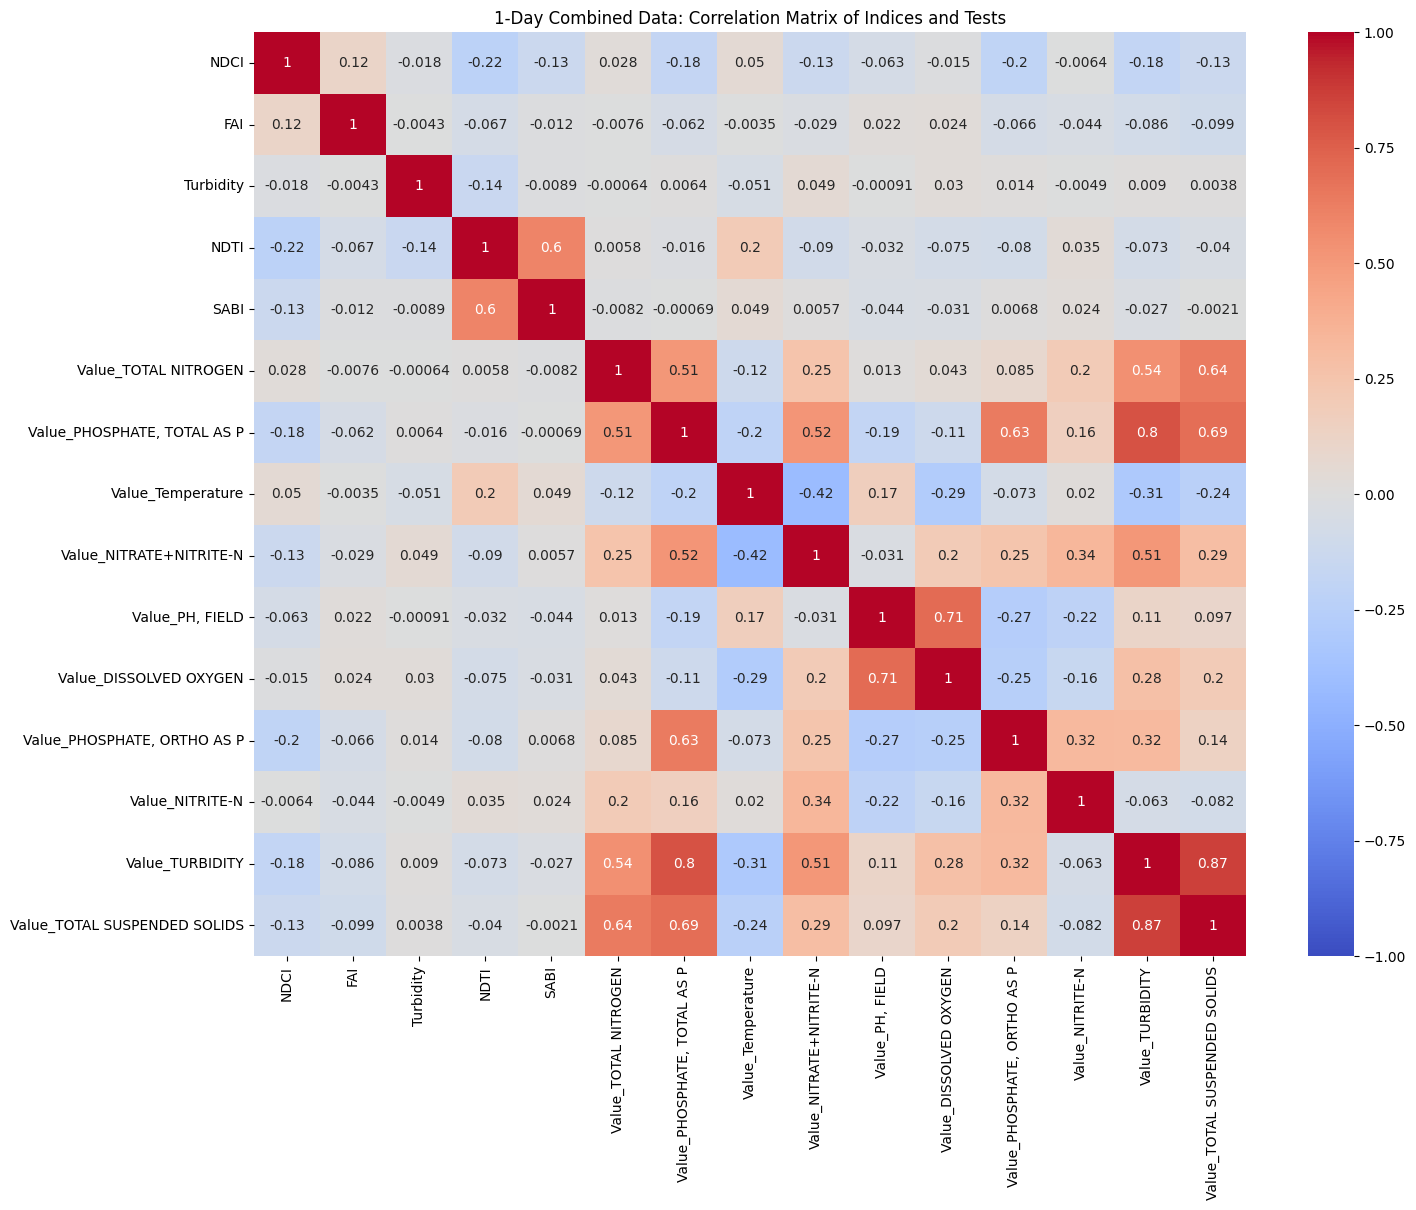

Correlation Matrix:
                                   NDCI       FAI  Turbidity      NDTI  \
NDCI                          1.000000  0.116878  -0.017804 -0.224668   
FAI                           0.116878  1.000000  -0.004321 -0.066896   
Turbidity                    -0.017804 -0.004321   1.000000 -0.141564   
NDTI                         -0.224668 -0.066896  -0.141564  1.000000   
SABI                         -0.129057 -0.011974  -0.008851  0.597689   
Value_TOTAL NITROGEN          0.028104 -0.007609  -0.000641  0.005753   
Value_PHOSPHATE, TOTAL AS P  -0.177640 -0.061642   0.006377 -0.015798   
Value_Temperature             0.050376 -0.003492  -0.050981  0.202084   
Value_NITRATE+NITRITE-N      -0.125431 -0.029073   0.049368 -0.090436   
Value_PH, FIELD              -0.062770  0.021896  -0.000908 -0.031604   
Value_DISSOLVED OXYGEN       -0.015249  0.023950   0.030341 -0.075288   
Value_PHOSPHATE, ORTHO AS P  -0.198888 -0.065888   0.014404 -0.080086   
Value_NITRITE-N              -

In [362]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# --- CORRELATION ANALYSIS AND HEATMAP PLOTTING ---

# Import the combined CSV as a DataFrame; ensure 'date' is read as the index
Merged_Data_1D_df = pd.read_csv('HABProject/Merged_Nearest_Data_1D.csv')

# Calculate the correlation matrix for the selected indices
corr_matrix_1D = Merged_Data_1D_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI', 'Value_TOTAL NITROGEN',
    'Value_PHOSPHATE, TOTAL AS P',
    'Value_Temperature',
    'Value_NITRATE+NITRITE-N',
    'Value_PH, FIELD',
    'Value_DISSOLVED OXYGEN',
    'Value_PHOSPHATE, ORTHO AS P',
    'Value_NITRITE-N',
    'Value_TURBIDITY',
    'Value_TOTAL SUSPENDED SOLIDS']].corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_1D, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('1-Day Combined Data: Correlation Matrix of Indices and Tests')

# Save the figure
plt.savefig('HABProject/1D_MergedData_HeatMap.png')
plt.show()

# Print the correlation matrix to the console
print("Correlation Matrix:\n", corr_matrix)

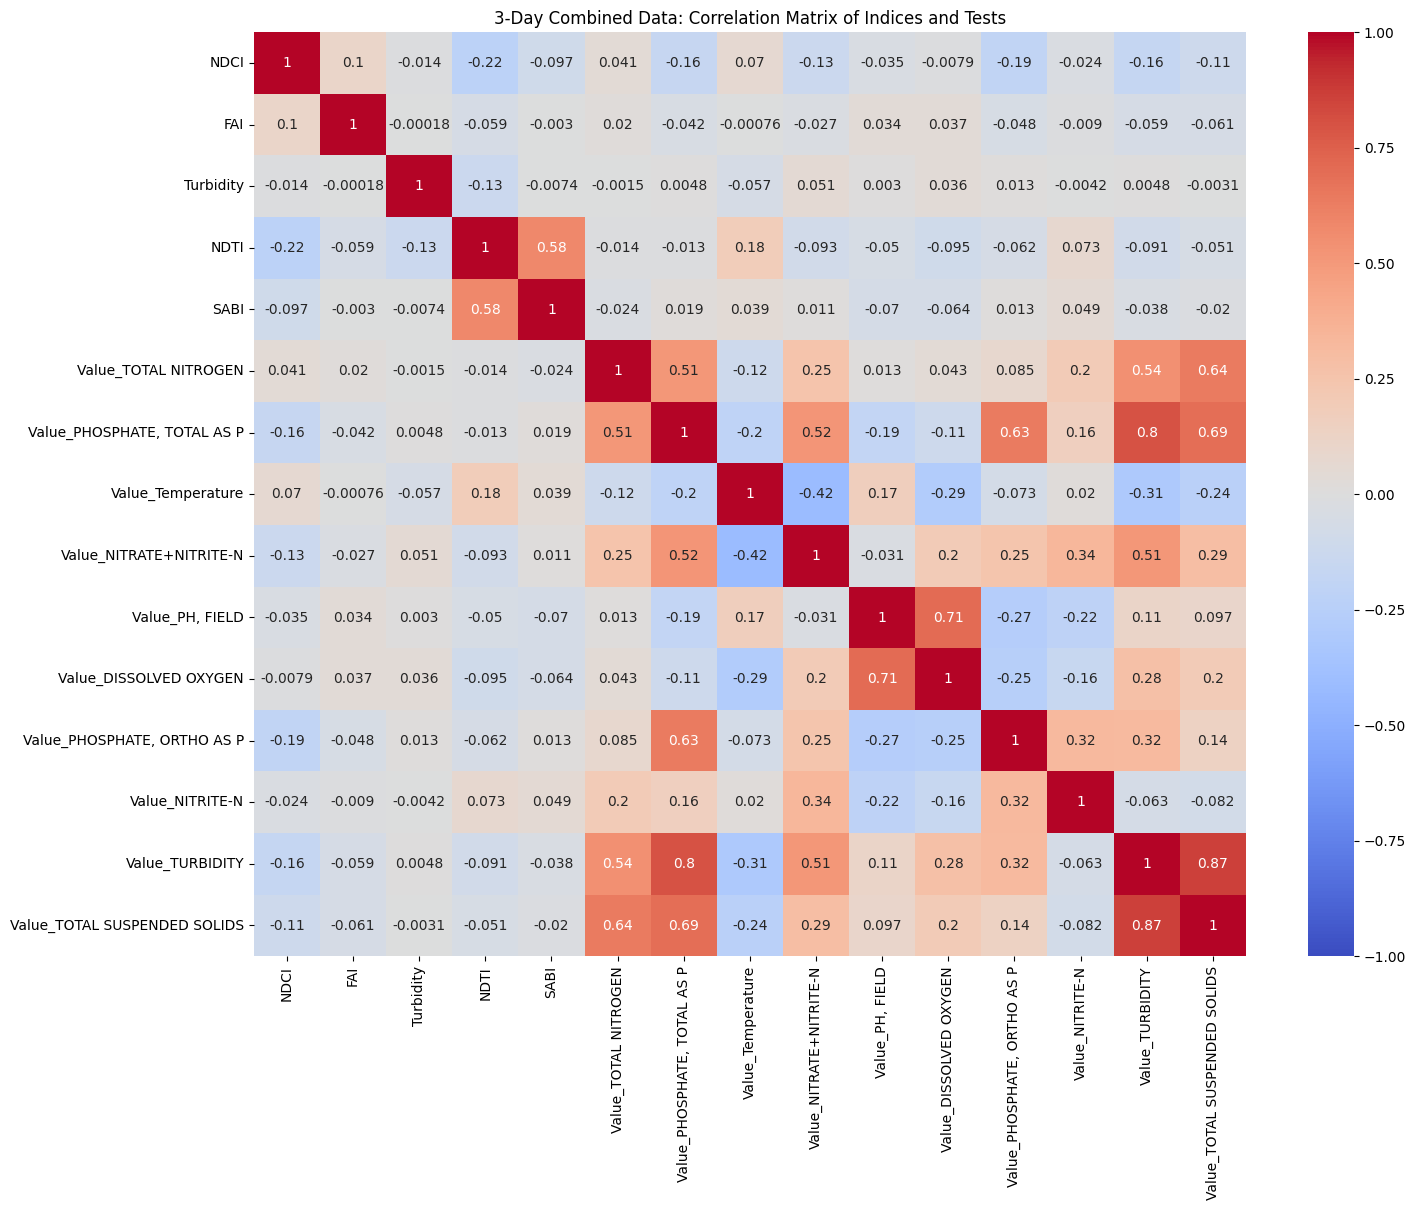

Correlation Matrix:
                                   NDCI       FAI  Turbidity      NDTI  \
NDCI                          1.000000  0.116878  -0.017804 -0.224668   
FAI                           0.116878  1.000000  -0.004321 -0.066896   
Turbidity                    -0.017804 -0.004321   1.000000 -0.141564   
NDTI                         -0.224668 -0.066896  -0.141564  1.000000   
SABI                         -0.129057 -0.011974  -0.008851  0.597689   
Value_TOTAL NITROGEN          0.028104 -0.007609  -0.000641  0.005753   
Value_PHOSPHATE, TOTAL AS P  -0.177640 -0.061642   0.006377 -0.015798   
Value_Temperature             0.050376 -0.003492  -0.050981  0.202084   
Value_NITRATE+NITRITE-N      -0.125431 -0.029073   0.049368 -0.090436   
Value_PH, FIELD              -0.062770  0.021896  -0.000908 -0.031604   
Value_DISSOLVED OXYGEN       -0.015249  0.023950   0.030341 -0.075288   
Value_PHOSPHATE, ORTHO AS P  -0.198888 -0.065888   0.014404 -0.080086   
Value_NITRITE-N              -

In [363]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# --- CORRELATION ANALYSIS AND HEATMAP PLOTTING ---

# Import the combined CSV as a DataFrame; ensure 'date' is read as the index
Merged_Data_3D_df = pd.read_csv('HABProject/Merged_Nearest_Data_3D.csv')

# Calculate the correlation matrix for the selected indices
corr_matrix_3D = Merged_Data_3D_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI', 'Value_TOTAL NITROGEN',
    'Value_PHOSPHATE, TOTAL AS P',
    'Value_Temperature',
    'Value_NITRATE+NITRITE-N',
    'Value_PH, FIELD',
    'Value_DISSOLVED OXYGEN',
    'Value_PHOSPHATE, ORTHO AS P',
    'Value_NITRITE-N',
    'Value_TURBIDITY',
    'Value_TOTAL SUSPENDED SOLIDS']].corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_3D, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('3-Day Combined Data: Correlation Matrix of Indices and Tests')

# Save the figure
plt.savefig('HABProject/3D_MergedData_HeatMap.png')
plt.show()

# Print the correlation matrix to the console
print("Correlation Matrix:\n", corr_matrix)

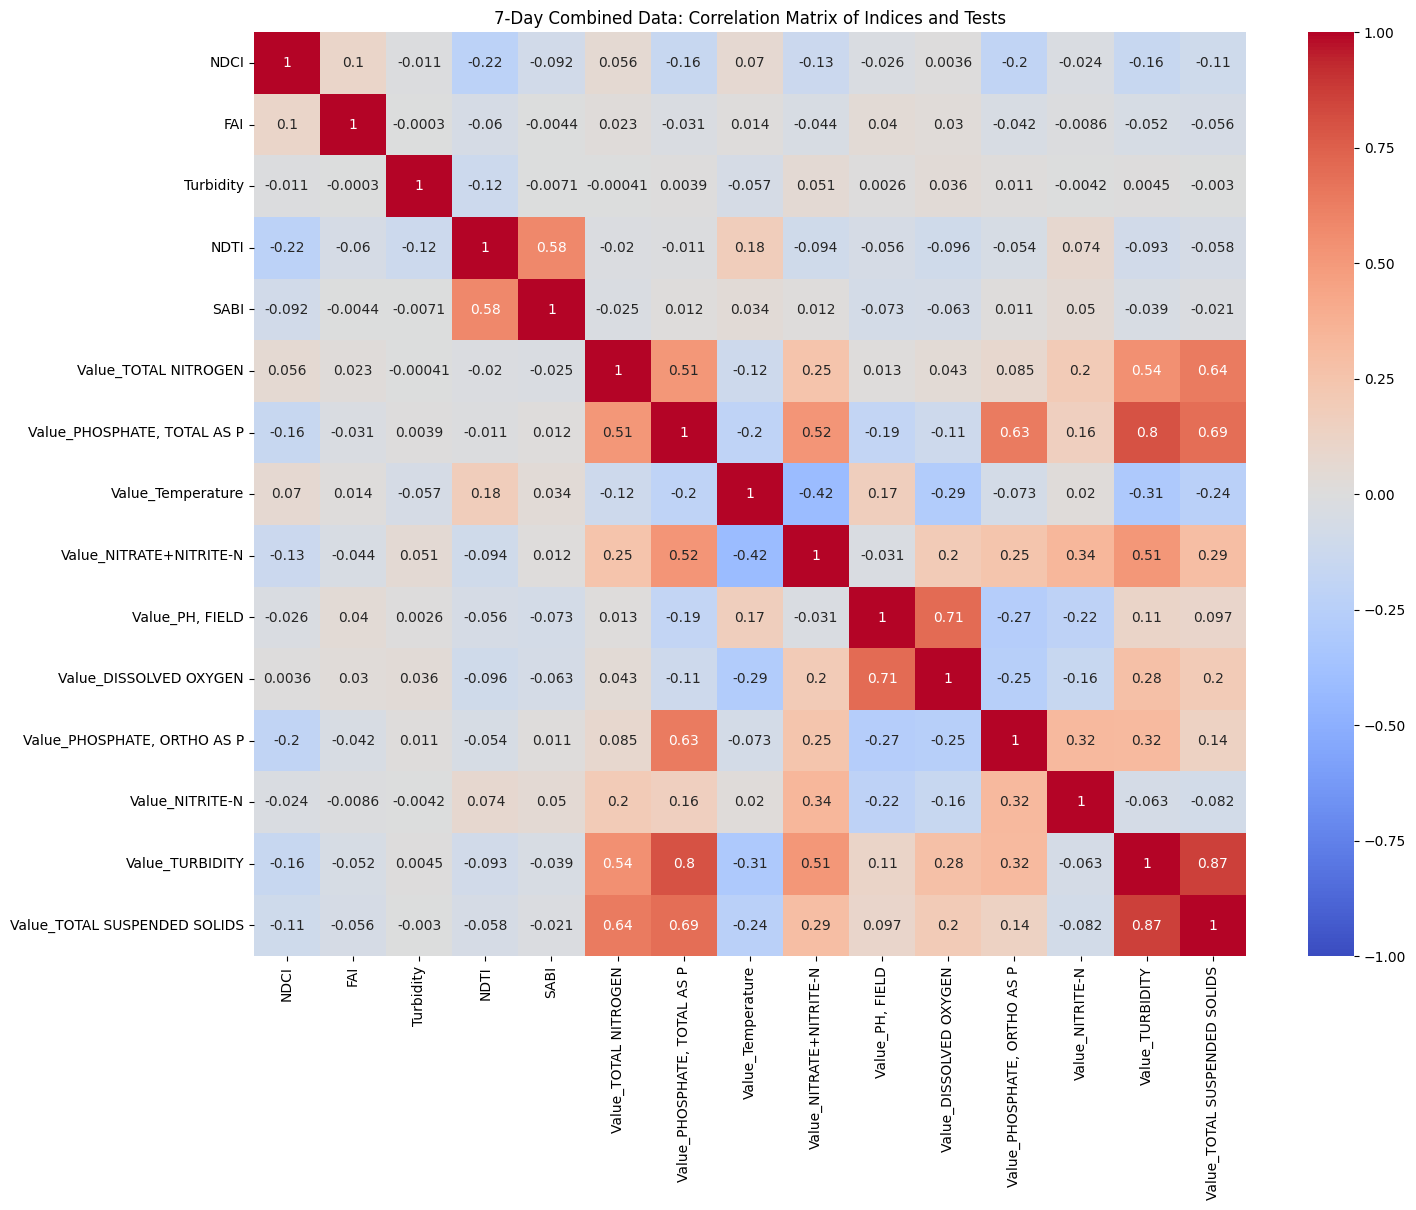

Correlation Matrix:
                                   NDCI       FAI  Turbidity      NDTI  \
NDCI                          1.000000  0.116878  -0.017804 -0.224668   
FAI                           0.116878  1.000000  -0.004321 -0.066896   
Turbidity                    -0.017804 -0.004321   1.000000 -0.141564   
NDTI                         -0.224668 -0.066896  -0.141564  1.000000   
SABI                         -0.129057 -0.011974  -0.008851  0.597689   
Value_TOTAL NITROGEN          0.028104 -0.007609  -0.000641  0.005753   
Value_PHOSPHATE, TOTAL AS P  -0.177640 -0.061642   0.006377 -0.015798   
Value_Temperature             0.050376 -0.003492  -0.050981  0.202084   
Value_NITRATE+NITRITE-N      -0.125431 -0.029073   0.049368 -0.090436   
Value_PH, FIELD              -0.062770  0.021896  -0.000908 -0.031604   
Value_DISSOLVED OXYGEN       -0.015249  0.023950   0.030341 -0.075288   
Value_PHOSPHATE, ORTHO AS P  -0.198888 -0.065888   0.014404 -0.080086   
Value_NITRITE-N              -

In [364]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# --- CORRELATION ANALYSIS AND HEATMAP PLOTTING ---

# Import the combined CSV as a DataFrame; ensure 'date' is read as the index
Merged_Data_7D_df = pd.read_csv('HABProject/Merged_Nearest_Data_7D.csv')

# Calculate the correlation matrix for the selected indices
corr_matrix_7D = Merged_Data_7D_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI', 'Value_TOTAL NITROGEN',
    'Value_PHOSPHATE, TOTAL AS P',
    'Value_Temperature',
    'Value_NITRATE+NITRITE-N',
    'Value_PH, FIELD',
    'Value_DISSOLVED OXYGEN',
    'Value_PHOSPHATE, ORTHO AS P',
    'Value_NITRITE-N',
    'Value_TURBIDITY',
    'Value_TOTAL SUSPENDED SOLIDS']].corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_7D, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('7-Day Combined Data: Correlation Matrix of Indices and Tests')

# Save the figure
plt.savefig('HABProject/7D_MergedData_HeatMap.png')
plt.show()

# Print the correlation matrix to the console
print("Correlation Matrix:\n", corr_matrix)

In [ ]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- MERGE CSV FILES ---

# Directory where CSV files are located
csv_dir = 'HABProject/OceanBlvd_to_Point_Shapefile/'

# Use glob to find only CSV files that contain the word 'merged'
csv_files = glob.glob(os.path.join(csv_dir, "*merged*.csv"))

# List to store DataFrames from each CSV file
dfs = []

# Loop through each CSV file, read it, and set 'date' as index
for file in csv_files:
    try:
        # Read CSV and parse 'date' as datetime
        df = pd.read_csv(file, parse_dates=["date"])
        # Set 'date' as index
        df.set_index("date", inplace=True)
        dfs.append(df)
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Concatenate all DataFrames if any were successfully loaded
if dfs:
    combined_df = pd.concat(dfs)
    # Sort by date index
    combined_df.sort_index(inplace=True)
    # Save the combined DataFrame to a new CSV file
    combined_csv_path = os.path.join(csv_dir, "Combined_Aggregated_Data.csv")
    combined_df.to_csv(combined_csv_path)
    print(f"Combined CSV saved to {combined_csv_path}")
else:
    print("No CSV files loaded. Please check your CSV files and the directory path.")

# --- CORRELATION ANALYSIS AND HEATMAP PLOTTING ---

# Import the combined CSV as a DataFrame; ensure 'date' is read as the index
daily_OceanBlvd_to_Point_df = pd.read_csv(
    combined_csv_path, index_col='date', parse_dates=['date']
)

# Calculate the correlation matrix for the selected indices
corr_matrix = daily_OceanBlvd_to_Point_df[['NDCI', 'FAI', 'Turbidity', 'NDTI', 'SABI']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('OceanBlvd to Point AOI: Correlation Matrix of NDCI, FAI, Turbidity, NDTI, and SABI')

# Save the figure
plt.savefig('HABProject/OceanBlvd_to_Point_Shapefile/Heat_Map_OceanBlvd_to_Point_Master.png')
plt.show()

# Print the correlation matrix to the console
print("Correlation Matrix:\n", corr_matrix)

# Code Snippet for Figure Creation

In [10]:
import pandas as pd
import ee
import geemap

# Initialize Earth Engine (if not already initialized)
ee.Initialize()

# Assume AOI is defined (replace with your actual AOI)
# Example AOI:


# Define cloud masking function using the QA60 band
def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask)

# Define processing function:
#  - Applies cloud mask.
#  - Computes an NDWI for water detection and applies a water mask.
#  - Computes NDCI, FAI, and Turbidity indices.
#  - Clips the image to the AOI.
def process_image(image):
    # Apply cloud mask
    image = maskS2clouds(image)
    
    # Compute NDWI (using green (B3) and NIR (B8)) to isolate water pixels.
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    water_mask = ndwi.gt(0.3)  # Adjust threshold as needed
    image = image.updateMask(water_mask)
    
    # Calculate NDCI (Normalized Difference Chlorophyll Index) using B5 (red edge) and B4 (red)
    ndci = image.normalizedDifference(['B5', 'B4']).rename('NDCI')
    
    # Calculate FAI (Floating Algae Index).
    # For Sentinel-2, one common approach is:
    #   FAI = B8 - (B5 + (B11 - B5) * (137/905))
    
    #fai = image.select('B8') \
     #   .subtract(image.select('B5') \
      #            .add(image.select('B11') \
       #                .subtract(image.select('B5')) \
        #               .multiply(137/905))) \
        #.rename('FAI')

    #Naming each band as a variable
    #FAI = (Rnir - Rred) = (((Rswir - Rred)*(wavelength_nir - wavelength_red)) / (wavelength_swir - wavelength_red)))
    #Equation based on Muzfoffar et al. 2023. DOI: https://doi.org/10.3390/rs15082039
    B8 = image.select('B8') # NIR Band
    B4 = image.select('B4') # Red band
    B11 = image.select('B11') # SWIR band

    #Making a variable for each part of the equation
    diff_NIR_Red = B8.subtract(B4)
    diff_SWIR_Red = B11.subtract(B4)
    diff_WL_NIR_Red = 842 - 665
    diff_WL_SWIR_Red = 1610 - 665

    #Dealing with the fraction order of operations
    top_fraction = diff_SWIR_Red.multiply(diff_WL_NIR_Red)
    whole_fraction = top_fraction.divide(diff_WL_SWIR_Red)

    #Last bit of equation
    fai = diff_NIR_Red.add(whole_fraction).rename('FAI')

    
    
    
    # Calculate Turbidity as an additional index (optional)
    # This is an example formula; adjust as appropriate for your study.
    turbidity = image.select('B3') \
        .divide(image.select('B1')) \
        .multiply(8.93) \
        .subtract(6.39) \
        .rename('Turbidity')

    #NDTI calculation
    ndti = image.normalizedDifference(['B4', 'B3']).rename('NDTI')

     #SABI (Surface algal bloom index) calculation
    #SABI = (Red - NIR) / (Blue + Green) OR SABI = (B4 - B8) / (B2 + B3)
    B2 = image.select('B2') #Blue band
    B3 = image.select('B3') #Green band

    sabi_top = B4.subtract(B8)
    sabi_bottom = B2.add(B3)
    sabi = sabi_top.divide(sabi_bottom).rename('SABI')
    
    # Add the new bands and clip the image to the S308C_to_S80_aoi
    return image.addBands([ndci, fai, turbidity, ndti, sabi]).clip(aoi)

# Define time frame for your analysis
start_date = '2020-01-01'
end_date   = '2023-12-31'

# Load Sentinel-2 image collection, filter by S308C_to_S80_aoi and date, and sort by cloud percentage
sentinel2 = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
             .filterBounds(aoi)
             .filterDate(start_date, end_date)
             .sort('CLOUDY_PIXEL_PERCENTAGE'))

# Process the image collection: apply cloud and water masks, calculate indices, and clip each image to aoi_cs
processed_images = sentinel2.map(process_image)

# --- Time Series Calculation ---
# Function to calculate mean index values over the S308C_to_S80_aoi for each image
def calculate_time_series(image_collection, index_name):
    def reduce_region(image):
        stats = image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=aoi,
            scale=10,         # 10 m resolution
            maxPixels=1e9
        )
        return ee.Feature(None, stats).set('date', image.date().format('YYYY-MM-dd'))
    time_series = image_collection.map(reduce_region)
    time_series_list = time_series.reduceColumns(
        ee.Reducer.toList(2),
        ['date', index_name]
    ).get('list').getInfo()
    return time_series_list
'''
# Calculate time series for each index
ndci_S308C_time_series      = calculate_time_series(processed_images, 'NDCI')
fai_S308C_time_series       = calculate_time_series(processed_images, 'FAI')
turbidity_S308C_time_series = calculate_time_series(processed_images, 'Turbidity')
ndti_S308C_time_series      = calculate_time_series(processed_images, 'NDTI')
sabi_S308C_time_series      = calculate_time_series(processed_images, 'SABI')

# Convert the time series lists to pandas DataFrames
def time_series_to_df(time_series, index_name):
    df = pd.DataFrame(time_series, columns=['date', index_name])
    df['date'] = pd.to_datetime(df['date'])
    return df

ndci_S308C_df      = time_series_to_df(ndci_S308C_time_series, 'NDCI')
fai_S308C_df       = time_series_to_df(fai_S308C_time_series, 'FAI')
turbidity_S308C_df = time_series_to_df(turbidity_S308C_time_series, 'Turbidity')
ndti_S308C_df      = time_series_to_df(ndti_S308C_time_series, 'NDTI')
sabi_S308C_df      = time_series_to_df(sabi_S308C_time_series, 'SABI')

# Merge the DataFrames for further analysis
merged_S308C_df = ndci_S308C_df.merge(fai_S308C_df, on='date').merge(turbidity_S308C_df, on='date').merge(ndti_S308C_df, on='date').merge(sabi_S308C_df, on='date')

# Save the time series data to CSV files
ndci_S308C_df.to_csv('HABProject/NDCI_TimeSeries_S308C_07012024_12312024.csv', index=False)
fai_S308C_df.to_csv('HABProject/FAI_TimeSeries_S308C_07012024_12312024.csv', index=False)
turbidity_S308C_df.to_csv('HABProject/Turbidity_TimeSeries_07012024_12312024.csv', index=False)
ndti_S308C_df.to_csv('HABProject/NDTI_TimeSeries_S308C_07012024_12312024.csv', index=False)
sabi_S308C_df.to_csv('HABProject/SABI_TimeSeries_S308C_07012024_12312024.csv', index=False)
merged_S308C_df.to_csv('HABProject/Merged_TimeSeries_07012024_12312024.csv', index=False)
'''
# --- Map Visualization ---
Map = geemap.Map(center=[27.75, -80.25], zoom=10)

# Display the FAI band (suitable for highlighting floating algae)
Map.addLayer(processed_images.first(), 
             {'bands': ['FAI'], 'min': -0.5, 'max': 0.5, 'palette': ['blue', 'white', 'green']}, 
             'FAI')

# Display the NDCI band (using a palette to highlight chlorophyll levels)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDCI'], 'min': -0.5, 'max': 0.5, 'palette': ['yellow', 'orange', 'red']}, 
             'NDCI')

# Display the Turbidity band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['Turbidity'], 'min': -2, 'max': 20, 'palette': ['white', 'blue', 'darkblue']}, 
             'Turbidity')

# Display the NDTI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['NDTI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'NDTI')

# Display the SABI band (using a palette to indicate variations in water clarity)
Map.addLayer(processed_images.first(), 
             {'bands': ['SABI'], 'min': -1, 'max': 1, 'palette': ['white', 'blue', 'darkblue']}, 
             'SABI')

# Add the S308C_to_S80_aoi boundary for reference
Map.addLayer(aoi, {}, 'aoi', True)

Map

Map(center=[27.75, -80.25], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataG…

In [15]:
import geemap
import ee

# Initialize Earth Engine
ee.Initialize()

# Create an appropriate geometry for the lake boundary
lake = ee.Geometry.Polygon([[[-80.547222, 27.020646], [-80.547222, 27.010616],  [-80.523404, 27.010616], [-80.523404, 27.020646]]])

# Load the Sentinel-2 image collection
# Make sure to filter the collection appropriately (e.g., by date)
s2 = ee.ImageCollection('COPERNICUS/S2').filterBounds(lake).first()  # Get the first image covering the lake

# Check if the image is valid
if s2 is not None:
    # Calculate NDCI
    B5 = s2.select('B5')  # Red Edge 1
    B4 = s2.select('B4')  # Red
    ndci = B5.subtract(B4).divide(B5.add(B4)).rename('NDCI').clip(lake)  # Clip the NDCI calculation to lake

    # Set visualization parameters
    ndci_vis = {'min': -0.2, 'max': 0.6, 'palette': ['blue', 'white', 'green']}

    # Create interactive map
    Map = geemap.Map(center=[27.0, -80.8], zoom=8)
    Map.addLayer(ndci, ndci_vis, 'NDCI over Lake Okeechobee')
    Map.addLayer(lake, {}, 'Lake Boundary')
    Map
else:
    print("No valid images found for the specified location.")

# Define a function to mask clouds using QA60
def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask).divide(10000)

# Optional: Create water mask using NDWI
def mask_non_water(image):
    ndwi = image.normalizedDifference(['B3', 'B8']).rename('NDWI')
    water_mask = ndwi.gt(0.3)  # adjust threshold as needed
    return image.updateMask(water_mask)

# Calculate NDCI: (B5 - B4) / (B5 + B4)
def compute_NDCI(image):
    ndci = image.normalizedDifference(['B5', 'B4']).rename('NDCI')
    return image.addBands(ndci)

# Filter Sentinel-2 imagery
s2 = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
      .filterBounds(lake)
      .filterDate('2022-06-01', '2022-08-31')
      .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))
      .map(maskS2clouds)
      .map(compute_NDCI)
      .map(mask_non_water)
      .median()
      .clip(lake))

# Visualize NDCI
ndci_vis = {
    'bands': ['NDCI'],
    'min': -0.5,
    'max': 0.5,
    'palette': ['blue', 'white', 'green']
}

# Create interactive map
Map = geemap.Map(center=[27.0, -80.8], zoom=8)
Map.addLayer(s2.select('NDCI'), ndci_vis, 'NDCI over Lake Okeechobee')
Map.addLayer(lake, {}, 'Lake Boundary')
Map


Map(center=[27.0, -80.8], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI…